# Astropilot

## Initialization

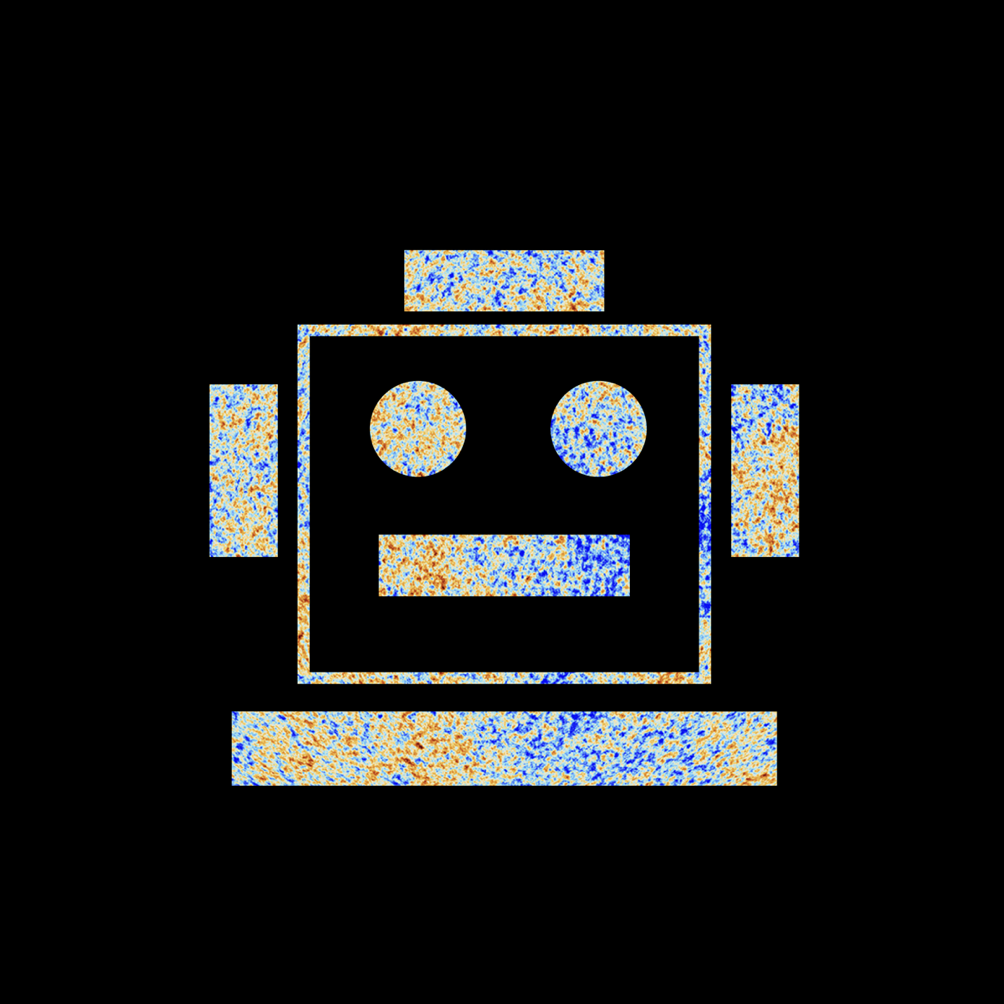


 _____ ___  _________  ___  _____  _____ _   _ _____ 
/  __ \|  \/  || ___ \/ _ \|  __ \|  ___| \ | |_   _|
| /  \/| .  . || |_/ / /_\ \ |  \/| |__ |  \| | | |  
| |    | |\/| || ___ \  _  | | __ |  __|| . ` | | |  
| \__/\| |  | || |_/ / | | | |_\ \| |___| |\  | | |  
\_____/\_|  |_/\____/\_| |_/\____/\____/\_| \_/ \_/  
    multi-agent systems for autonomous discovery    

Built with AG2
Version: Beta3
Last updated: 11/03/5202



In [1]:
import os
import re
from pydantic import BaseModel, Field
from typing import List

os.environ["CMBAGENT_DEBUG"] = "false"
os.environ["CMBAGENT_DISABLE_DISPLAY"] = "false"

from cmbagent import CMBAgent

## Astropilot Class

In [2]:
class AstroPilot:
    class Input(BaseModel):
        idea: str = Field(description="The idea of the project")
        methodology: str = Field(description="The methodology of the project")
        results: str = Field(description="The results of the project")
        plot_paths: List[str] = Field(description="The plot paths of the project")

    def __init__(self, input_data: 'AstroPilot.Input' = None):
        self.input = input_data



# astro_pilot = AstroPilot()

input_data = AstroPilot.Input(idea="Your idea here", 
                              methodology="Your methodology here", 
                              results="Your results here",
                              plot_paths=['/path/to/plot1.png', '/path/to/plot2.png']) 

astro_pilot = AstroPilot(input_data=input_data) 

print(astro_pilot.input.model_dump_json(indent=4))

{
    "idea": "Your idea here",
    "methodology": "Your methodology here",
    "results": "Your results here",
    "plot_paths": [
        "/path/to/plot1.png",
        "/path/to/plot2.png"
    ]
}


## Data Description

In [3]:
task = r"""
Here are two datasets. These datasets contain subhalo and group-level properties from two different CAMELS simulations (A and B). The goal is to compare the distributions of these properties across both datasets.

groups_and_subhalos_A_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl')
groups_and_subhalos_B_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl')

<Info on DATASET A>
output of groups_and_subhalos_A_df.describe().to_markdown():
\n
|       |      GroupSFR |   Group_R_Mean200 |   Group_M_Mean200 |   SubhaloGasMetallicity |   SubhaloMass |     SubhaloSFR |   SubhaloSpinMod |   SubhaloVmax |   SubhaloStellarPhotometrics_U |   SubhaloStellarPhotometrics_B |   SubhaloStellarPhotometrics_V |   SubhaloStellarPhotometrics_K |   SubhaloStellarPhotometrics_g |   SubhaloStellarPhotometrics_r |   SubhaloStellarPhotometrics_i |   SubhaloStellarPhotometrics_z |   SubhaloStarMetallicity |   SubhaloMassGAS |   SubhaloMassDM |   SubhaloMassSWP |   SubhaloMassBH |   SubhaloVelDisp |   SubhaloVmaxRad |\n|:------|--------------:|------------------:|------------------:|------------------------:|--------------:|---------------:|-----------------:|--------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------:|-----------------:|----------------:|-----------------:|----------------:|-----------------:|-----------------:|\n| count | 44288         |        44288      |      44288        |          20382          | 20382         | 20382          |      20382       |    20382      |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                     20382      |          20382           |     20382        |     20382       |  20382           |  20382          |      20382       |     20382        |\n| mean  |     0.0422433 |           69.2228 |         10.7355   |              0.00238127 |    19.4284    |     0.0914536  |        317.282   |       77.9824 |                      -14.1589  |                      -14.2142  |                      -14.791   |                      -16.8777  |                      -14.5569  |                      -15.0336  |                      -15.2562  |                       -15.3799 |              0.00303963  |         1.66305  |        17.5501  |      0.213218    |      0.00210229 |         40.5932  |        10.0095   |\n| std   |     0.428835  |           47.0012 |        177.375    |              0.00467102 |   210.281     |     0.513121   |       1001.08    |       43.9643 |                        2.56885 |                        2.57772 |                        2.56798 |                        2.75787 |                        2.57637 |                        2.56583 |                        2.57107 |                         2.5952 |              0.00530367  |        27.8483   |       181.509   |      1.52578     |      0.0160016  |         25.2385  |        15.2058   |\n| min   |     0         |           41.5453 |          0.500062 |              0          |     0.0159726 |     0          |          1.17564 |       10.2123 |                      -23.1801  |                      -23.5313  |                      -24.3584  |                      -27.1762  |                      -23.9709  |                      -24.6873  |                      -25.0282  |                       -25.2637 |              0           |         0        |         0       |      0.000163077 |      0          |          4.59465 |         0.307768 |\n| 25%   |     0         |           46.8837 |          0.718632 |              0          |     1.22453   |     0          |         46.2172  |       54.1398 |                      -15.7662  |                      -15.8733  |                      -16.4076  |                      -18.5786  |                      -16.2088  |                      -16.6382  |                      -16.8536  |                       -16.9868 |              0           |         0        |         1.16785 |      0.00134983  |      0          |         26.9895  |         5.01202  |\n| 50%   |     0         |           55.7362 |          1.2075   |              0          |     3.07819   |     0          |        121.712   |       65.6042 |                      -13.2776  |                      -13.3486  |                      -13.9556  |                      -15.9564  |                      -13.702   |                      -14.208   |                      -14.4271  |                       -14.5336 |              0.000480832 |         0.138162 |         2.9099  |      0.00356472  |      0          |         33.8581  |         7.39513  |\n| 75%   |     0         |           73.2698 |          2.74314  |              0.00229632 |     7.48532   |     0.00824189 |        290.865   |       85.6452 |                      -12.128   |                      -12.1513  |                      -12.7236  |                      -14.6586  |                      -12.4893  |                      -12.9648  |                      -13.1885  |                       -13.2945 |              0.00314217  |         0.45165  |         6.96169 |      0.0227119   |      0.00195949 |         45.4213  |        11.2365   |\n| max   |    37.2313    |         1428.54   |      20331.6      |              0.0432014  | 16541.6       |    36.6898     |      57571       |      868.704  |                       -9.49047 |                       -9.63056 |                      -10.3286  |                      -12.3199  |                      -10.0174  |                      -10.6145  |                      -10.8462  |                       -10.9588 |              0.0397323   |      2358.29     |     14083.7     |     98.1971      |      1.46984    |        482.48    |       605.262    |
\n
This gives you the mean, std, min and max of all features. 

output of groups_and_subhalos_A_df.info():
<class 'pandas.core.frame.DataFrame'>
Index: 63818 entries, 0 to 295566
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      43919 non-null  float32
 1   Group_R_Mean200               43919 non-null  float32
 2   Group_M_Mean200               43919 non-null  float32
 3   SubhaloGasMetallicity         19899 non-null  float32
 4   SubhaloMass                   19899 non-null  float32
 5   SubhaloSFR                    19899 non-null  float32
 6   SubhaloSpinMod                19899 non-null  float32
 7   SubhaloVmax                   19899 non-null  float32
 8   SubhaloStellarPhotometrics_U  19899 non-null  float32
 9   SubhaloStellarPhotometrics_B  19899 non-null  float32
 10  SubhaloStellarPhotometrics_V  19899 non-null  float32
 11  SubhaloStellarPhotometrics_K  19899 non-null  float32
 12  SubhaloStellarPhotometrics_g  19899 non-null  float32
 13  SubhaloStellarPhotometrics_r  19899 non-null  float32
 14  SubhaloStellarPhotometrics_i  19899 non-null  float32
 15  SubhaloStellarPhotometrics_z  19899 non-null  float32
 16  SubhaloStarMetallicity        19899 non-null  float32
 17  SubhaloMassGAS                19899 non-null  float32
 18  SubhaloMassDM                 19899 non-null  float32
 19  SubhaloMassSWP                19899 non-null  float32
 20  SubhaloMassBH                 19899 non-null  float32
 21  SubhaloVelDisp                19899 non-null  float32
 22  SubhaloVmaxRad                19899 non-null  float32
dtypes: float32(23)
memory usage: 6.1 MB
</Info on DATASET A>


<Info on DATASET B>
<class 'pandas.core.frame.DataFrame'>
Index: 64670 entries, 0 to 296683
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      44288 non-null  float32
 1   Group_R_Mean200               44288 non-null  float32
 2   Group_M_Mean200               44288 non-null  float32
 3   SubhaloGasMetallicity         20382 non-null  float32
 4   SubhaloMass                   20382 non-null  float32
 5   SubhaloSFR                    20382 non-null  float32
 6   SubhaloSpinMod                20382 non-null  float32
 7   SubhaloVmax                   20382 non-null  float32
 8   SubhaloStellarPhotometrics_U  20382 non-null  float32
 9   SubhaloStellarPhotometrics_B  20382 non-null  float32
 10  SubhaloStellarPhotometrics_V  20382 non-null  float32
 11  SubhaloStellarPhotometrics_K  20382 non-null  float32
 12  SubhaloStellarPhotometrics_g  20382 non-null  float32
 13  SubhaloStellarPhotometrics_r  20382 non-null  float32
 14  SubhaloStellarPhotometrics_i  20382 non-null  float32
 15  SubhaloStellarPhotometrics_z  20382 non-null  float32
 16  SubhaloStarMetallicity        20382 non-null  float32
 17  SubhaloMassGAS                20382 non-null  float32
 18  SubhaloMassDM                 20382 non-null  float32
 19  SubhaloMassSWP                20382 non-null  float32
 20  SubhaloMassBH                 20382 non-null  float32
 21  SubhaloVelDisp                20382 non-null  float32
 22  SubhaloVmaxRad                20382 non-null  float32
dtypes: float32(23)
memory usage: 6.2 MB
</Info on DATASET B>

Datasets A and B are catalogs of objects (groups and subhalos) that inherently depend the local primordial non-Gaussianity parameter values fNL=200 for A and fNL=-200 for B.


Deacription of the features: 
 0   GroupSFR                      Sum of the individual star formation rates of all gas cells in this group. In units of Msun/yr.
 1   Group_R_Mean200               Comoving Radius of a sphere centered at the GroupPos of this Group whose mean density is 200 times the mean density of the Universe, at the time the halo is considered. In units of ckpc/h.
 2   Group_M_Mean200               Total Mass of this group enclosed in a sphere whose mean density is 200 times the mean density of the Universe, at the time the halo is considered, in units of 1e10 Msun/h.
 3   SubhaloGasMetallicity         Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the gas cells bound to this Subhalo, but restricted to cells within twice the stellar half mass radius. 
 4   SubhaloMass                   Total mass of all member particle/cells which are bound to this Subhalo, of all types. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 5   SubhaloSFR                    Sum of the individual star formation rates of all gas cells in this subhalo. In units of Msun/yr.
 6   SubhaloSpinMod                Total 3D spin modulus, computed for each as the mass weighted sum of the relative coordinate times relative velocity of all member particles/cells. In units of (kpc/h)(km/s).
 7   SubhaloVmax                   Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation. In units of km/s.
 8   SubhaloStellarPhotometrics_U  Magnitude in U-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 9   SubhaloStellarPhotometrics_B  Magnitude in B-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 10  SubhaloStellarPhotometrics_V  Magnitude in V-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 11  SubhaloStellarPhotometrics_K  Magnitude in K-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 12  SubhaloStellarPhotometrics_g  Magnitude in g-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 13  SubhaloStellarPhotometrics_r  Magnitude in r-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 14  SubhaloStellarPhotometrics_i  Magnitude in i-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 15  SubhaloStellarPhotometrics_z  Magnitude in z-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 16  SubhaloStarMetallicity        Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the star particles bound to this Subhalo, but restricted to stars within twice the stellar half mass radius.
 17  SubhaloMassGAS                Gas mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 18  SubhaloMassDM                 Dark Matter mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 19  SubhaloMassSWP                Mass of Stars & Wind particles which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 20  SubhaloMassBH                 Black Hole mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 21  SubhaloVelDisp                One-dimensional velocity dispersion of all the member particles/cells (the 3D dispersion divided by sqrt(3))
 22  SubhaloVmaxRad                Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation.

Note that Subhalo features are not available for groups (set to NaN) and group features are not available for subhalos (set to NaN).
Groups and subhalos should be considered as separate objects (they dont have the same features). Within groups and within subhalos, there are no missing values.
"""

## Idea Generation

### Task-specific Instructions

In [4]:
### IDEA 

planner_append_instructions = r"""
Given these datasets, and information, make a plan according to the following instructions: 

- Ask idea_maker to generate 5 new research project ideas related to the datasets and primordial non-Gaussianity.
- Ask idea_hater to critique these ideas.
- Ask idea_maker to select and improve 2 out of the 5 research project ideas given the output of the idea_hater.
- Ask idea_hater to critique the 2 improved ideas. 
- Ask idea_maker to select the best idea out of the 2. 
- Ask idea_maker to report the best idea in the form of a scientific paper title with a 1 sentence description. 


   The plan must strictly involve only the following agents: 
   - idea_maker: to generate new ideas    .
   - idea_hater: to critique new ideas.

   You must not invoke any other agent than the ones listed above.


The goal of this task is to generate a research project idea based on the data of interest. Don't suggest to do EDA, code, or anything else than a research project idea

"""

plan_reviewer_append_instructions = r"""

    Check that the agents called in each sub-task only include, if needed: 
    - idea_maker: to generate new ideas.
    - idea_hater: to critique new ideas.

The goal of this task is to generate a research project idea based on the data of interest. Don't suggest to do EDA, code, or anything else than a research project idea

"""

### Cmbagent Run

In [5]:
cmbagent = CMBAgent(
agent_llm_configs = {
                    'engineer': {
                        "model": "o3-mini-2025-01-31",
                        "reasoning_effort": "medium",
                        "api_key": os.getenv("OPENAI_API_KEY"),
                        "api_type": "openai"},
                    'researcher': {
                        "model": "o3-mini-2025-01-31",
                        "reasoning_effort": "medium",
                        "api_key": os.getenv("OPENAI_API_KEY"),
                        "api_type": "openai"},
})
   

cmbagent.solve(task,
               max_rounds=500,
               initial_agent="planner",
               shared_context = {'feedback_left': 1,
                                 'maximum_number_of_steps_in_plan': 6,
                                 'planner_append_instructions': planner_append_instructions,
                                 'plan_reviewer_append_instructions': plan_reviewer_append_instructions}
              )

Message from admin:




Here are two datasets. These datasets contain subhalo and group-level properties from two different CAMELS simulations (A and B). The goal is to compare the distributions of these properties across both datasets.

groups_and_subhalos_A_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl')
groups_and_subhalos_B_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl')

<Info on DATASET A>
output of groups_and_subhalos_A_df.describe().to_markdown():
\n
|       |      GroupSFR |   Group_R_Mean200 |   Group_M_Mean200 |   SubhaloGasMetallicity |   SubhaloMass |     SubhaloSFR |   SubhaloSpinMod |   SubhaloVmax |   SubhaloStellarPhotometrics_U |   SubhaloStellarPhotometrics_B |   SubhaloStellarPhotometrics_V |   SubhaloStellarPhotometrics_K |   SubhaloStellarPhotometrics_g |   SubhaloStellarPhotometrics_r |   SubhaloStellarPhotometrics_i |   SubhaloStellarPhotometrics_z |   SubhaloStarMetallicity |   SubhaloMassGAS |   SubhaloMassDM |   SubhaloMassSWP |   SubhaloMassBH |   SubhaloVelDisp |   SubhaloVmaxRad |\n|:------|--------------:|------------------:|------------------:|------------------------:|--------------:|---------------:|-----------------:|--------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------:|-----------------:|----------------:|-----------------:|----------------:|-----------------:|-----------------:|\n| count | 44288         |        44288      |      44288        |          20382          | 20382         | 20382          |      20382       |    20382      |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                     20382      |          20382           |     20382        |     20382       |  20382           |  20382          |      20382       |     20382        |\n| mean  |     0.0422433 |           69.2228 |         10.7355   |              0.00238127 |    19.4284    |     0.0914536  |        317.282   |       77.9824 |                      -14.1589  |                      -14.2142  |                      -14.791   |                      -16.8777  |                      -14.5569  |                      -15.0336  |                      -15.2562  |                       -15.3799 |              0.00303963  |         1.66305  |        17.5501  |      0.213218    |      0.00210229 |         40.5932  |        10.0095   |\n| std   |     0.428835  |           47.0012 |        177.375    |              0.00467102 |   210.281     |     0.513121   |       1001.08    |       43.9643 |                        2.56885 |                        2.57772 |                        2.56798 |                        2.75787 |                        2.57637 |                        2.56583 |                        2.57107 |                         2.5952 |              0.00530367  |        27.8483   |       181.509   |      1.52578     |      0.0160016  |         25.2385  |        15.2058   |\n| min   |     0         |           41.5453 |          0.500062 |              0          |     0.0159726 |     0          |          1.17564 |       10.2123 |                      -23.1801  |                      -23.5313  |                      -24.3584  |                      -27.1762  |                      -23.9709  |                      -24.6873  |                      -25.0282  |                       -25.2637 |              0           |         0        |         0       |      0.000163077 |      0          |          4.59465 |         0.307768 |\n| 25%   |     0         |           46.8837 |          0.718632 |              0          |     1.22453   |     0          |         46.2172  |       54.1398 |                      -15.7662  |                      -15.8733  |                      -16.4076  |                      -18.5786  |                      -16.2088  |                      -16.6382  |                      -16.8536  |                       -16.9868 |              0           |         0        |         1.16785 |      0.00134983  |      0          |         26.9895  |         5.01202  |\n| 50%   |     0         |           55.7362 |          1.2075   |              0          |     3.07819   |     0          |        121.712   |       65.6042 |                      -13.2776  |                      -13.3486  |                      -13.9556  |                      -15.9564  |                      -13.702   |                      -14.208   |                      -14.4271  |                       -14.5336 |              0.000480832 |         0.138162 |         2.9099  |      0.00356472  |      0          |         33.8581  |         7.39513  |\n| 75%   |     0         |           73.2698 |          2.74314  |              0.00229632 |     7.48532   |     0.00824189 |        290.865   |       85.6452 |                      -12.128   |                      -12.1513  |                      -12.7236  |                      -14.6586  |                      -12.4893  |                      -12.9648  |                      -13.1885  |                       -13.2945 |              0.00314217  |         0.45165  |         6.96169 |      0.0227119   |      0.00195949 |         45.4213  |        11.2365   |\n| max   |    37.2313    |         1428.54   |      20331.6      |              0.0432014  | 16541.6       |    36.6898     |      57571       |      868.704  |                       -9.49047 |                       -9.63056 |                      -10.3286  |                      -12.3199  |                      -10.0174  |                      -10.6145  |                      -10.8462  |                       -10.9588 |              0.0397323   |      2358.29     |     14083.7     |     98.1971      |      1.46984    |        482.48    |       605.262    |
\n
This gives you the mean, std, min and max of all features. 

output of groups_and_subhalos_A_df.info():
<class 'pandas.core.frame.DataFrame'>
Index: 63818 entries, 0 to 295566
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      43919 non-null  float32
 1   Group_R_Mean200               43919 non-null  float32
 2   Group_M_Mean200               43919 non-null  float32
 3   SubhaloGasMetallicity         19899 non-null  float32
 4   SubhaloMass                   19899 non-null  float32
 5   SubhaloSFR                    19899 non-null  float32
 6   SubhaloSpinMod                19899 non-null  float32
 7   SubhaloVmax                   19899 non-null  float32
 8   SubhaloStellarPhotometrics_U  19899 non-null  float32
 9   SubhaloStellarPhotometrics_B  19899 non-null  float32
 10  SubhaloStellarPhotometrics_V  19899 non-null  float32
 11  SubhaloStellarPhotometrics_K  19899 non-null  float32
 12  SubhaloStellarPhotometrics_g  19899 non-null  float32
 13  SubhaloStellarPhotometrics_r  19899 non-null  float32
 14  SubhaloStellarPhotometrics_i  19899 non-null  float32
 15  SubhaloStellarPhotometrics_z  19899 non-null  float32
 16  SubhaloStarMetallicity        19899 non-null  float32
 17  SubhaloMassGAS                19899 non-null  float32
 18  SubhaloMassDM                 19899 non-null  float32
 19  SubhaloMassSWP                19899 non-null  float32
 20  SubhaloMassBH                 19899 non-null  float32
 21  SubhaloVelDisp                19899 non-null  float32
 22  SubhaloVmaxRad                19899 non-null  float32
dtypes: float32(23)
memory usage: 6.1 MB
</Info on DATASET A>


<Info on DATASET B>
<class 'pandas.core.frame.DataFrame'>
Index: 64670 entries, 0 to 296683
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      44288 non-null  float32
 1   Group_R_Mean200               44288 non-null  float32
 2   Group_M_Mean200               44288 non-null  float32
 3   SubhaloGasMetallicity         20382 non-null  float32
 4   SubhaloMass                   20382 non-null  float32
 5   SubhaloSFR                    20382 non-null  float32
 6   SubhaloSpinMod                20382 non-null  float32
 7   SubhaloVmax                   20382 non-null  float32
 8   SubhaloStellarPhotometrics_U  20382 non-null  float32
 9   SubhaloStellarPhotometrics_B  20382 non-null  float32
 10  SubhaloStellarPhotometrics_V  20382 non-null  float32
 11  SubhaloStellarPhotometrics_K  20382 non-null  float32
 12  SubhaloStellarPhotometrics_g  20382 non-null  float32
 13  SubhaloStellarPhotometrics_r  20382 non-null  float32
 14  SubhaloStellarPhotometrics_i  20382 non-null  float32
 15  SubhaloStellarPhotometrics_z  20382 non-null  float32
 16  SubhaloStarMetallicity        20382 non-null  float32
 17  SubhaloMassGAS                20382 non-null  float32
 18  SubhaloMassDM                 20382 non-null  float32
 19  SubhaloMassSWP                20382 non-null  float32
 20  SubhaloMassBH                 20382 non-null  float32
 21  SubhaloVelDisp                20382 non-null  float32
 22  SubhaloVmaxRad                20382 non-null  float32
dtypes: float32(23)
memory usage: 6.2 MB
</Info on DATASET B>

Datasets A and B are catalogs of objects (groups and subhalos) that inherently depend the local primordial non-Gaussianity parameter values fNL=200 for A and fNL=-200 for B.


Deacription of the features: 
 0   GroupSFR                      Sum of the individual star formation rates of all gas cells in this group. In units of Msun/yr.
 1   Group_R_Mean200               Comoving Radius of a sphere centered at the GroupPos of this Group whose mean density is 200 times the mean density of the Universe, at the time the halo is considered. In units of ckpc/h.
 2   Group_M_Mean200               Total Mass of this group enclosed in a sphere whose mean density is 200 times the mean density of the Universe, at the time the halo is considered, in units of 1e10 Msun/h.
 3   SubhaloGasMetallicity         Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the gas cells bound to this Subhalo, but restricted to cells within twice the stellar half mass radius. 
 4   SubhaloMass                   Total mass of all member particle/cells which are bound to this Subhalo, of all types. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 5   SubhaloSFR                    Sum of the individual star formation rates of all gas cells in this subhalo. In units of Msun/yr.
 6   SubhaloSpinMod                Total 3D spin modulus, computed for each as the mass weighted sum of the relative coordinate times relative velocity of all member particles/cells. In units of (kpc/h)(km/s).
 7   SubhaloVmax                   Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation. In units of km/s.
 8   SubhaloStellarPhotometrics_U  Magnitude in U-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 9   SubhaloStellarPhotometrics_B  Magnitude in B-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 10  SubhaloStellarPhotometrics_V  Magnitude in V-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 11  SubhaloStellarPhotometrics_K  Magnitude in K-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 12  SubhaloStellarPhotometrics_g  Magnitude in g-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 13  SubhaloStellarPhotometrics_r  Magnitude in r-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 14  SubhaloStellarPhotometrics_i  Magnitude in i-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 15  SubhaloStellarPhotometrics_z  Magnitude in z-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 16  SubhaloStarMetallicity        Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the star particles bound to this Subhalo, but restricted to stars within twice the stellar half mass radius.
 17  SubhaloMassGAS                Gas mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 18  SubhaloMassDM                 Dark Matter mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 19  SubhaloMassSWP                Mass of Stars & Wind particles which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 20  SubhaloMassBH                 Black Hole mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 21  SubhaloVelDisp                One-dimensional velocity dispersion of all the member particles/cells (the 3D dispersion divided by sqrt(3))
 22  SubhaloVmaxRad                Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation.

Note that Subhalo features are not available for groups (set to NaN) and group features are not available for subhalos (set to NaN).
Groups and subhalos should be considered as separate objects (they dont have the same features). Within groups and within subhalos, there are no missing values.



Calling planner...



Message from planner:




Forwarding content...



Calling planner_response_formatter...



Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Generate 5 new research project ideas related to the datasets and primordial non-Gaussianity.
	* agent in charge: idea_maker

	* instructions:
		- Focus on leveraging the unique features of datasets A and B.
		- Ensure ideas are centered around the impact of primordial non-Gaussianity (fNL=200 and fNL=-200).
		- Explore both group-level and subhalo-level properties for potential insights.

- Step 2:
	* sub-task: Critique the 5 research project ideas generated in Step 1.
	* agent in charge: idea_hater

	* instructions:
		- Evaluate the feasibility of each idea.
		- Identify potential weaknesses or gaps in the ideas.
		- Suggest improvements or alternative directions for each idea.

- Step 3:
	* sub-task: Select and improve 2 out of the 5 research project ideas based on the critiques from Step 2.
	* agent in charge: idea_maker

	* instructions:
		- Choose the two most promising ideas.
		- Address the critiques and refine the ideas for better clarity and feasibility.
		- Ensure the improved ideas align with the datasets and the goal of studying primordial non-Gaussianity.

- Step 4:
	* sub-task: Critique the 2 improved research project ideas from Step 3.
	* agent in charge: idea_hater

	* instructions:
		- Assess the improvements made to the ideas.
		- Highlight any remaining issues or areas for further refinement.
		- Provide a final evaluation of the two ideas.

- Step 5:
	* sub-task: Select the best research project idea out of the 2 improved ideas.
	* agent in charge: idea_maker

	* instructions:
		- Choose the idea with the highest potential for impactful research.
		- Ensure the selected idea is well-defined and feasible.

- Step 6:
	* sub-task: Report the best research project idea in the form of a scientific paper title with a 1-sentence description.
	* agent in charge: idea_maker

	* instructions:
		- Create a concise and compelling title for the research project.
		- Write a 1-sentence description summarizing the research focus and its significance.

        


Calling plan_recorder...



Message from plan_recorder:



Plan has been logged.


Calling plan_reviewer...



Message from plan_reviewer:




Forwarding content...



Calling reviewer_response_formatter...



Message from reviewer_response_formatter:




**Recommendations:**

In Step 1, enhance the instructions for idea_maker by adding: 'Consider specific astrophysical mechanisms through which primordial non-Gaussianity might affect galaxy and halo formation, particularly focusing on star formation rates, metallicity distributions, and mass assembly histories.'

In Step 2, expand the instructions for idea_hater by adding: 'Evaluate each idea's potential for producing statistically significant results given the sample sizes in datasets A and B, and assess whether the proposed comparisons would effectively isolate the effects of primordial non-Gaussianity from other astrophysical processes.'

In Step 3, modify the instructions for idea_maker by adding: 'For each of the two selected ideas, outline specific testable hypotheses and suggest key features from the datasets that would be most relevant for testing these hypotheses.'

In Step 4, enhance the instructions for idea_hater by adding: 'Assess whether the refined ideas adequately address how to disentangle the effects of primordial non-Gaussianity from other cosmological parameters that might influence the observed properties.'

In Step 5, strengthen the instructions for idea_maker by adding: 'Explain why the selected idea is particularly well-suited for studying primordial non-Gaussianity using these specific datasets, and identify which specific features will be most informative for the research.'

In Step 6, modify the instructions for idea_maker by adding: 'Include in the description how this research would contribute to our understanding of early universe physics and structure formation, and why the findings would be significant to the broader cosmological community.'


            


Calling review_recorder...



Message from review_recorder:




Recommendations have been logged.  
Number of feedback rounds left: 0. 
Now, update the plan accordingly, planner!


Calling planner...



Message from planner:




Forwarding content...



Calling planner_response_formatter...



Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Generate 5 new research project ideas related to the datasets and primordial non-Gaussianity.
	* agent in charge: idea_maker

	* instructions:
		- Focus on leveraging the unique features of datasets A and B.
		- Ensure ideas are centered around the impact of primordial non-Gaussianity (fNL=200 and fNL=-200).
		- Explore both group-level and subhalo-level properties for potential insights.
		- Consider specific astrophysical mechanisms through which primordial non-Gaussianity might affect galaxy and halo formation, particularly focusing on star formation rates, metallicity distributions, and mass assembly histories.

- Step 2:
	* sub-task: Critique the 5 research project ideas generated in Step 1.
	* agent in charge: idea_hater

	* instructions:
		- Evaluate the feasibility of each idea.
		- Identify potential weaknesses or gaps in the ideas.
		- Suggest improvements or alternative directions for each idea.
		- Evaluate each idea's potential for producing statistically significant results given the sample sizes in datasets A and B.
		- Assess whether the proposed comparisons would effectively isolate the effects of primordial non-Gaussianity from other astrophysical processes.

- Step 3:
	* sub-task: Select and improve 2 out of the 5 research project ideas based on the critiques from Step 2.
	* agent in charge: idea_maker

	* instructions:
		- Choose the two most promising ideas.
		- Address the critiques and refine the ideas for better clarity and feasibility.
		- Ensure the improved ideas align with the datasets and the goal of studying primordial non-Gaussianity.
		- For each of the two selected ideas, outline specific testable hypotheses and suggest key features from the datasets that would be most relevant for testing these hypotheses.

- Step 4:
	* sub-task: Critique the 2 improved research project ideas from Step 3.
	* agent in charge: idea_hater

	* instructions:
		- Assess the improvements made to the ideas.
		- Highlight any remaining issues or areas for further refinement.
		- Provide a final evaluation of the two ideas.
		- Assess whether the refined ideas adequately address how to disentangle the effects of primordial non-Gaussianity from other cosmological parameters that might influence the observed properties.

- Step 5:
	* sub-task: Select the best research project idea out of the 2 improved ideas.
	* agent in charge: idea_maker

	* instructions:
		- Choose the idea with the highest potential for impactful research.
		- Ensure the selected idea is well-defined and feasible.
		- Explain why the selected idea is particularly well-suited for studying primordial non-Gaussianity using these specific datasets.
		- Identify which specific features will be most informative for the research.

- Step 6:
	* sub-task: Report the best research project idea in the form of a scientific paper title with a 1-sentence description.
	* agent in charge: idea_maker

	* instructions:
		- Create a concise and compelling title for the research project.
		- Write a 1-sentence description summarizing the research focus and its significance.
		- Include in the description how this research would contribute to our understanding of early universe physics and structure formation.
		- Explain why the findings would be significant to the broader cosmological community.

        


Calling plan_recorder...



Message from plan_recorder:



Planning stage complete. Switching to control.


Calling control...



Message from control:




**Step number:** 1 out of 6.
 
**Sub-task:** Generate 5 new research project ideas related to the datasets and primordial non-Gaussianity.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Focus on leveraging the unique features of datasets A and B.
- Ensure ideas are centered around the impact of primordial non-Gaussianity (fNL=200 and fNL=-200).
- Explore both group-level and subhalo-level properties for potential insights.
- Consider specific astrophysical mechanisms through which primordial non-Gaussianity might affect galaxy and halo formation, particularly focusing on star formation rates, metallicity distributions, and mass assembly histories.
 
**Status:** in progress ⏳
    


Calling idea_maker...



Message from idea_maker:

**Ideas:**

- **Idea 1:**
   * Description: Investigate the impact of primordial non-Gaussianity on the star formation rates (SFR) of groups and subhalos.
   * Bullet points:
      - Compare the distributions of GroupSFR and SubhaloSFR between datasets A and B.
      - Analyze how fNL=200 and fNL=-200 influence the star formation efficiency in different mass ranges.
      - Explore correlations between SFR and other properties like SubhaloMass and Group_M_Mean200 to identify trends.

- **Idea 2:**
   * Description: Study the metallicity distributions in subhalos to understand the role of primordial non-Gaussianity in chemical enrichment.
   * Bullet points:
      - Compare SubhaloGasMetallicity and SubhaloStarMetallicity between datasets A and B.
      - Investigate whether fNL=200 leads to higher or lower metallicity in subhalos of similar mass.
      - Examine the relationship between metallicity and SubhaloSFR to assess feedback processes.

- **Idea 3:**
  

Message from idea_maker_response_formatter:


**Ideas**

- Idea 1:
	* Investigate the impact of primordial non-Gaussianity on the star formation rates (SFR) of groups and subhalos.
		- Compare the distributions of GroupSFR and SubhaloSFR between datasets A and B.
		- Analyze how fNL=200 and fNL=-200 influence the star formation efficiency in different mass ranges.
		- Explore correlations between SFR and other properties like SubhaloMass and Group_M_Mean200 to identify trends.

- Idea 2:
	* Study the metallicity distributions in subhalos to understand the role of primordial non-Gaussianity in chemical enrichment.
		- Compare SubhaloGasMetallicity and SubhaloStarMetallicity between datasets A and B.
		- Investigate whether fNL=200 leads to higher or lower metallicity in subhalos of similar mass.
		- Examine the relationship between metallicity and SubhaloSFR to assess feedback processes.

- Idea 3:
	* Analyze the mass assembly histories of groups and subhalos under different primordial 

Message from control:




**Step number:** 1 out of 6.
 
**Sub-task:** Generate 5 new research project ideas related to the datasets and primordial non-Gaussianity.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Focus on leveraging the unique features of datasets A and B.
- Ensure ideas are centered around the impact of primordial non-Gaussianity (fNL=200 and fNL=-200).
- Explore both group-level and subhalo-level properties for potential insights.
- Consider specific astrophysical mechanisms through which primordial non-Gaussianity might affect galaxy and halo formation, particularly focusing on star formation rates, metallicity distributions, and mass assembly histories.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 2 out of 6.
 
**Sub-task:** Critique the 5 research project ideas generated in Step 1.
 
**Agent in charge of sub-task:** `idea_hater`
 
**Instructions:**
 
- Evaluate the feasibility of each idea.
- Identify potential weaknesses or gaps in the ideas.
- Suggest improvements or alternative directions for each idea.
- Evaluate each idea's potential for producing statistically significant results given the sample sizes in datasets A and B.
- Assess whether the proposed comparisons would effectively isolate the effects of primordial non-Gaussianity from other astrophysical processes.
 
**Status:** in progress ⏳
    


Calling idea_hater...



Message from idea_hater:

**Thoughts on Ideas:**

- **Idea 1: Impact of primordial non-Gaussianity on star formation rates**
   * Description: Investigate the impact of primordial non-Gaussianity on the star formation rates (SFR) of groups and subhalos.
   * Critique:
     - The sample sizes (44,288 groups and 20,382 subhalos) are substantial enough to detect statistical differences in SFR distributions.
     - However, the median GroupSFR is 0, with 75% of groups showing no star formation. This severely limits the analysis to only the most active groups.
     - Similarly, the median SubhaloSFR is also 0, indicating many subhalos have no ongoing star formation.
     - The idea doesn't address how to isolate the effects of primordial non-Gaussianity from other factors that influence star formation (e.g., environment, merger history).
     - No consideration of potential selection effects or biases in the datasets.
     - Improvement suggestion: Focus on the high-SFR tail of the distribu

Message from idea_hater_response_formatter:


**IDEA CRITIQUE**

- Idea 1:
	* description: Investigate the impact of primordial non-Gaussianity on the star formation rates (SFR) of groups and subhalos.
		- The sample sizes are sufficient to detect statistical differences in SFR distributions.
		- The median SFR values being zero for a majority of groups and subhalos limits the analysis.
		- The idea does not address isolating the effects of primordial non-Gaussianity from other factors.
		- Suggestion: Focus on the high-SFR tail of the distribution and control for mass dependence.

- Idea 2:
	* description: Study the metallicity distributions in subhalos to understand the role of primordial non-Gaussianity in chemical enrichment.
		- The median SubhaloGasMetallicity being zero limits the analysis.
		- The connection between primordial non-Gaussianity and metallicity is indirect.
		- Suggestion: Stratify the analysis by subhalo mass and focus on metallicity gradients.

- Idea 3:
	* desc

Message from control:




**Step number:** 2 out of 6.
 
**Sub-task:** Critique the 5 research project ideas generated in Step 1.
 
**Agent in charge of sub-task:** `idea_hater`
 
**Instructions:**
 
- Evaluate the feasibility of each idea.
- Identify potential weaknesses or gaps in the ideas.
- Suggest improvements or alternative directions for each idea.
- Evaluate each idea's potential for producing statistically significant results given the sample sizes in datasets A and B.
- Assess whether the proposed comparisons would effectively isolate the effects of primordial non-Gaussianity from other astrophysical processes.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 3 out of 6.
 
**Sub-task:** Select and improve 2 out of the 5 research project ideas based on the critiques from Step 2.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Choose the two most promising ideas.
- Address the critiques and refine the ideas for better clarity and feasibility.
- Ensure the improved ideas align with the datasets and the goal of studying primordial non-Gaussianity.
- For each of the two selected ideas, outline specific testable hypotheses and suggest key features from the datasets that would be most relevant for testing these hypotheses.
 
**Status:** in progress ⏳
    


Calling idea_maker...



Message from idea_maker:

**Ideas:**

- **Idea 1: Impact of primordial non-Gaussianity on star formation rates (SFR)**
   * Description: Refined investigation into the high-SFR tail of groups and subhalos to understand the influence of primordial non-Gaussianity on star formation efficiency.
   * Improvements:
      - Focus on the high-SFR tail of the distribution where differences between fNL=200 and fNL=-200 might be more pronounced.
      - Control for mass dependence by stratifying the analysis into different mass bins (e.g., low, medium, high mass).
      - Develop a methodology to isolate the effects of primordial non-Gaussianity by comparing SFR trends across mass bins and environments.
   * Testable Hypotheses:
      - Groups and subhalos in dataset A (fNL=200) will exhibit a higher fraction of high-SFR objects compared to dataset B (fNL=-200).
      - The correlation between SFR and SubhaloMass will differ between datasets A and B, reflecting the impact of primordial non-Gauss

Message from idea_maker_response_formatter:


**Ideas**

- Idea 1:
	* Impact of primordial non-Gaussianity on star formation rates (SFR)
		- Refined investigation into the high-SFR tail of groups and subhalos to understand the influence of primordial non-Gaussianity on star formation efficiency.
		- Focus on the high-SFR tail of the distribution where differences between fNL=200 and fNL=-200 might be more pronounced.
		- Control for mass dependence by stratifying the analysis into different mass bins (e.g., low, medium, high mass).
		- Develop a methodology to isolate the effects of primordial non-Gaussianity by comparing SFR trends across mass bins and environments.
		- Testable Hypotheses: Groups and subhalos in dataset A (fNL=200) will exhibit a higher fraction of high-SFR objects compared to dataset B (fNL=-200).
		- The correlation between SFR and SubhaloMass will differ between datasets A and B, reflecting the impact of primordial non-Gaussianity.
		- Key Features: GroupSFR, Subh

Message from control:




**Step number:** 3 out of 6.
 
**Sub-task:** Select and improve 2 out of the 5 research project ideas based on the critiques from Step 2.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Choose the two most promising ideas.
- Address the critiques and refine the ideas for better clarity and feasibility.
- Ensure the improved ideas align with the datasets and the goal of studying primordial non-Gaussianity.
- For each of the two selected ideas, outline specific testable hypotheses and suggest key features from the datasets that would be most relevant for testing these hypotheses.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 4 out of 6.
 
**Sub-task:** Critique the 2 improved research project ideas from Step 3.
 
**Agent in charge of sub-task:** `idea_hater`
 
**Instructions:**
 
- Assess the improvements made to the ideas.
- Highlight any remaining issues or areas for further refinement.
- Provide a final evaluation of the two ideas.
- Assess whether the refined ideas adequately address how to disentangle the effects of primordial non-Gaussianity from other cosmological parameters that might influence the observed properties.
 
**Status:** in progress ⏳
    


Calling idea_hater...



Message from idea_hater:

**Thoughts on Ideas:**

- **Idea 1: Impact of primordial non-Gaussianity on star formation rates (SFR)**
   * Description: Refined investigation into the high-SFR tail of groups and subhalos to understand the influence of primordial non-Gaussianity on star formation efficiency.
   * Assessment of improvements:
     - The focus on the high-SFR tail is a significant improvement, addressing the zero-SFR issue in the majority of objects.
     - Stratifying by mass bins helps control for the strong mass-SFR correlation, making it easier to isolate primordial non-Gaussianity effects.
     - The proposed methodology to compare SFR trends across mass bins is more robust than simple distribution comparisons.
   * Remaining issues:
     - The idea still doesn't fully address how to disentangle primordial non-Gaussianity effects from other cosmological parameters (e.g., σ8, Ωm) that also influence star formation.
     - No clear methodology is proposed for defining "high

Message from idea_hater_response_formatter:


**IDEA CRITIQUE**

- Idea 1:
	* description: Impact of primordial non-Gaussianity on star formation rates (SFR)
		- The focus on the high-SFR tail is a significant improvement, addressing the zero-SFR issue in the majority of objects.
		- Stratifying by mass bins helps control for the strong mass-SFR correlation, making it easier to isolate primordial non-Gaussianity effects.
		- The proposed methodology to compare SFR trends across mass bins is more robust than simple distribution comparisons.
		- The idea still doesn't fully address how to disentangle primordial non-Gaussianity effects from other cosmological parameters (e.g., σ8, Ωm) that also influence star formation.
		- No clear methodology is proposed for defining 'high-SFR' objects - this needs quantitative thresholds.
		- The analysis might be biased toward the most massive objects, which naturally have higher SFRs.
		- The hypothesis that fNL=200 will lead to higher SFR needs theo

Message from control:




**Step number:** 4 out of 6.
 
**Sub-task:** Critique the 2 improved research project ideas from Step 3.
 
**Agent in charge of sub-task:** `idea_hater`
 
**Instructions:**
 
- Assess the improvements made to the ideas.
- Highlight any remaining issues or areas for further refinement.
- Provide a final evaluation of the two ideas.
- Assess whether the refined ideas adequately address how to disentangle the effects of primordial non-Gaussianity from other cosmological parameters that might influence the observed properties.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 5 out of 6.
 
**Sub-task:** Select the best research project idea out of the 2 improved ideas.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Choose the idea with the highest potential for impactful research.
- Ensure the selected idea is well-defined and feasible.
- Explain why the selected idea is particularly well-suited for studying primordial non-Gaussianity using these specific datasets.
- Identify which specific features will be most informative for the research.
 
**Status:** in progress ⏳
    


Calling idea_maker...



Message from idea_maker:

**Selected Idea:**

- **Idea 2: Mass assembly histories under different primordial non-Gaussianity conditions**
   * Description: Refined analysis of mass ratios and component distributions to infer the impact of primordial non-Gaussianity on mass assembly processes.
   * Justification for Selection:
      - This idea has a stronger theoretical connection to structure formation processes influenced by primordial non-Gaussianity compared to the SFR-focused idea.
      - The focus on mass ratios (e.g., gas-to-dark matter, stellar-to-dark matter) provides a more direct and interpretable measure of the effects of primordial non-Gaussianity.
      - The proposed stratification by environment density and the use of mass ratios reduce the impact of variability and confounding factors, making the analysis more robust.
      - The idea aligns well with the available data, leveraging key features like SubhaloMassGAS, SubhaloMassDM, and SubhaloMassSWP.
      - The statis

Message from idea_maker_response_formatter:


**Ideas**

- Idea 1:
	* Mass assembly histories under different primordial non-Gaussianity conditions
		- Refined analysis of mass ratios and component distributions to infer the impact of primordial non-Gaussianity on mass assembly processes.
		- This idea has a stronger theoretical connection to structure formation processes influenced by primordial non-Gaussianity compared to the SFR-focused idea.
		- The focus on mass ratios (e.g., gas-to-dark matter, stellar-to-dark matter) provides a more direct and interpretable measure of the effects of primordial non-Gaussianity.
		- The proposed stratification by environment density and the use of mass ratios reduce the impact of variability and confounding factors, making the analysis more robust.
		- The idea aligns well with the available data, leveraging key features like SubhaloMassGAS, SubhaloMassDM, and SubhaloMassSWP.
		- The statistical power is sufficient given the sample sizes, and the 

Message from control:




**Step number:** 5 out of 6.
 
**Sub-task:** Select the best research project idea out of the 2 improved ideas.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Choose the idea with the highest potential for impactful research.
- Ensure the selected idea is well-defined and feasible.
- Explain why the selected idea is particularly well-suited for studying primordial non-Gaussianity using these specific datasets.
- Identify which specific features will be most informative for the research.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 6 out of 6.
 
**Sub-task:** Report the best research project idea in the form of a scientific paper title with a 1-sentence description.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Create a concise and compelling title for the research project.
- Write a 1-sentence description summarizing the research focus and its significance.
- Include in the description how this research would contribute to our understanding of early universe physics and structure formation.
- Explain why the findings would be significant to the broader cosmological community.
 
**Status:** in progress ⏳
    


Calling idea_maker...



Message from idea_maker:

**Ideas:**

- **Title:** "Decoding Primordial Non-Gaussianity: Insights from Mass Ratios in Halo and Subhalo Assembly Histories"
   * Description: This research investigates the impact of primordial non-Gaussianity on the mass assembly processes of halos and subhalos by analyzing mass ratios of gas, dark matter, and stars in two distinct cosmological simulations (fNL=200 and fNL=-200). By isolating the effects of primordial non-Gaussianity from other cosmological parameters, this study aims to enhance our understanding of how early universe conditions shaped the formation and evolution of cosmic structures, providing critical insights into the physics of the early universe and its influence on large-scale structure formation.

Calling idea_maker_response_formatter...



Message from idea_maker_response_formatter:


**Ideas**

- Idea 1:
	* Decoding Primordial Non-Gaussianity: Insights from Mass Ratios in Halo and Subhalo Assembly Histories
		- This research investigates the impact of primordial non-Gaussianity on the mass assembly processes of halos and subhalos by analyzing mass ratios of gas, dark matter, and stars in two distinct cosmological simulations (fNL=200 and fNL=-200).
		- By isolating the effects of primordial non-Gaussianity from other cosmological parameters, this study aims to enhance our understanding of how early universe conditions shaped the formation and evolution of cosmic structures.
		- Providing critical insights into the physics of the early universe and its influence on large-scale structure formation.

        

Calling control...



Message from control:




**Step number:** 6 out of 6.
 
**Sub-task:** Report the best research project idea in the form of a scientific paper title with a 1-sentence description.
 
**Agent in charge of sub-task:** `idea_maker`
 
**Instructions:**
 
- Create a concise and compelling title for the research project.
- Write a 1-sentence description summarizing the research focus and its significance.
- Include in the description how this research would contribute to our understanding of early universe physics and structure formation.
- Explain why the findings would be significant to the broader cosmological community.
 
**Status:** completed ✅
    


Calling terminator...



Message from terminator:



Session terminated.

### Result Collection

In [6]:
try:
    for obj in cmbagent.chat_result.chat_history[::-1]:
        if obj['name'] == 'idea_maker_response_formatter':
            result = obj['content']
            break
    cmbagent.task_result = result
except:
    cmbagent.task_result = None


pattern = r'\*\*Ideas\*\*\s*\n- Idea 1:'
replacement = "Project Idea:"
cmbagent.task_result = re.sub(pattern, replacement, cmbagent.task_result)

astro_pilot.input.idea = cmbagent.task_result

print(astro_pilot.input.idea)


Project Idea:
	* Decoding Primordial Non-Gaussianity: Insights from Mass Ratios in Halo and Subhalo Assembly Histories
		- This research investigates the impact of primordial non-Gaussianity on the mass assembly processes of halos and subhalos by analyzing mass ratios of gas, dark matter, and stars in two distinct cosmological simulations (fNL=200 and fNL=-200).
		- By isolating the effects of primordial non-Gaussianity from other cosmological parameters, this study aims to enhance our understanding of how early universe conditions shaped the formation and evolution of cosmic structures.
		- Providing critical insights into the physics of the early universe and its influence on large-scale structure formation.

        


## Methodology Generation

### Task-specific Instructions

In [7]:
#### METHODOLOGY

planner_append_instructions = rf"""

{astro_pilot.input.idea}

Instruction for planning:

Given these datasets, and information on the features and project idea, we want to design a methodology to implement this idea.
The goal of the task is to write a plan that will be used to generate a detailed description of the methodology that will be used to perform the project analysis.

1. **Elicit Project-Specific Reasoning:**
   - Ask the *researcher* to provide reasoning for the exploratory data analysis (EDA) tasks relevant to the given project idea.
   - Clarify the specific hypotheses, assumptions, or questions the EDA should help investigate.

2. **Conduct Exploratory Data Analysis:**
   - Collaborate with the *engineer* to perform the EDA on the provided datasets.
   - Ensure the analysis is comprehensive, covering distributions, correlations, missing data patterns, outliers, and relevant domain-specific features.

3. **Synthesize EDA Insights:**
   - Analyze the EDA results with the *researcher*.
   - Focus on understanding how the findings inform modeling choices, preprocessing needs, or feature selection.

4. **Write the Methodology description:**
   - With the *researcher*, write a **detailed description (approximately 500 words)** describing the methodology that will be used to perform the project analysis.
   - The description should clearly outline the steps, techniques, and rationale derived from the exploratory data analysis.
   - Include relevant results from the EDA in the form of key statistics or tables (do not include references to plots, or generated files here).
   - The focus should be strictly on the methods and workflow for this specific project to be performed. **do not include** any discussion of future directions, future work, project extensions, or limitations.
   - The description should be written as if it were a senior researcher explaining to her research assistant how to perform the research necessary for this project.

The plan must end with the Methodology description generated by the researcher. It is in 4 steps with:
researcher->engineer->researcher->researcher


   The plan must strictly involve only the following agents: 

   - engineer: an expert Python coder who writes entire Python pipelines ready to be executed. It does not aim to discuss the results of the code, only to write the best possible code.
   - researcher: an expert researcher that produces reasoning. This agents also discusses results and provides methodology. 

   You must not invoke any other agent than the ones listed above.
"""

plan_reviewer_append_instructions = rf"""
    {astro_pilot.input.idea}

    Check that the agents called in each sub-task only include, if needed: 
    - engineer: an expert Python coder who writes entire Python pipelines ready to be executed. It does not aim to discuss the results of the code, only to write the code.
    - researcher: an expert researcher that produces reasoning. This agents also discusses results. 

"""

engineer_append_instructions = rf"""

{astro_pilot.input.idea}

Given these datasets, and information on the features and project idea, we want to design a methodology to implement this idea.
The goal of the task is to generate a detailed description of the methodology that will be used to carry out the research project.

Warnings: 
Some feature columns have around 40k non-null entries. Although vectorized operations (like np.percentile, np.concatenate) are efficient, they do take longer on larger arrays. 
You must make sure the code is well optimized for operations on large arrays. 

For plots involving features: 
- making sure dynamical ranges are well captured (carefully adjust the binning, and log or linear axes scales, for each feature).
For histograms (if needed):
-Use log-scale for features with values spanning several orders of magnitudes. 
-Use linear scale for Photometrics feature, but **in general log-log in both x and y axes will be useful!**
-Don't include null or nan values in the histogram counts, nonetheless, although the NaN entries are useless, it might be useful to keep track of the zero counts for some features.

"""


researcher_append_instructions = rf"""
{astro_pilot.input.idea}

Given these datasets, and information on the features and project idea, we want to design a methodology to implement this idea.
The goal of the task is to write a detailed description of the methodology that will be used to carry out the research project.

- When asked about Elicit Project-Specific Reasoning, your goal is to clarify the specific hypotheses, assumptions, or questions the EDA should help investigate.
- When asked about Synthesize EDA Insights, your goal is to focus on understanding how the findings inform modeling choices, preprocessing needs, or feature selection.
- When asked about generating the Methodology description, your focus should be strictly on the statistical and machine learning methods for this specific project to be performed. **Do not include** any discussion of future directions, future work, project extensions, or limitations.
the methodology description should be written as if it were a senior researcher explaining to her research assistant how to perform the project. 

"""

### Cmbagent Run

Message from admin:




Here are two datasets. These datasets contain subhalo and group-level properties from two different CAMELS simulations (A and B). The goal is to compare the distributions of these properties across both datasets.

groups_and_subhalos_A_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl')
groups_and_subhalos_B_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl')

<Info on DATASET A>
output of groups_and_subhalos_A_df.describe().to_markdown():
\n
|       |      GroupSFR |   Group_R_Mean200 |   Group_M_Mean200 |   SubhaloGasMetallicity |   SubhaloMass |     SubhaloSFR |   SubhaloSpinMod |   SubhaloVmax |   SubhaloStellarPhotometrics_U |   SubhaloStellarPhotometrics_B |   SubhaloStellarPhotometrics_V |   SubhaloStellarPhotometrics_K |   SubhaloStellarPhotometrics_g |   SubhaloStellarPhotometrics_r |   SubhaloStellarPhotometrics_i |   SubhaloStellarPhotometrics_z |   SubhaloStarMetallicity |   SubhaloMassGAS |   SubhaloMassDM |   SubhaloMassSWP |   SubhaloMassBH |   SubhaloVelDisp |   SubhaloVmaxRad |\n|:------|--------------:|------------------:|------------------:|------------------------:|--------------:|---------------:|-----------------:|--------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------:|-----------------:|----------------:|-----------------:|----------------:|-----------------:|-----------------:|\n| count | 44288         |        44288      |      44288        |          20382          | 20382         | 20382          |      20382       |    20382      |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                     20382      |          20382           |     20382        |     20382       |  20382           |  20382          |      20382       |     20382        |\n| mean  |     0.0422433 |           69.2228 |         10.7355   |              0.00238127 |    19.4284    |     0.0914536  |        317.282   |       77.9824 |                      -14.1589  |                      -14.2142  |                      -14.791   |                      -16.8777  |                      -14.5569  |                      -15.0336  |                      -15.2562  |                       -15.3799 |              0.00303963  |         1.66305  |        17.5501  |      0.213218    |      0.00210229 |         40.5932  |        10.0095   |\n| std   |     0.428835  |           47.0012 |        177.375    |              0.00467102 |   210.281     |     0.513121   |       1001.08    |       43.9643 |                        2.56885 |                        2.57772 |                        2.56798 |                        2.75787 |                        2.57637 |                        2.56583 |                        2.57107 |                         2.5952 |              0.00530367  |        27.8483   |       181.509   |      1.52578     |      0.0160016  |         25.2385  |        15.2058   |\n| min   |     0         |           41.5453 |          0.500062 |              0          |     0.0159726 |     0          |          1.17564 |       10.2123 |                      -23.1801  |                      -23.5313  |                      -24.3584  |                      -27.1762  |                      -23.9709  |                      -24.6873  |                      -25.0282  |                       -25.2637 |              0           |         0        |         0       |      0.000163077 |      0          |          4.59465 |         0.307768 |\n| 25%   |     0         |           46.8837 |          0.718632 |              0          |     1.22453   |     0          |         46.2172  |       54.1398 |                      -15.7662  |                      -15.8733  |                      -16.4076  |                      -18.5786  |                      -16.2088  |                      -16.6382  |                      -16.8536  |                       -16.9868 |              0           |         0        |         1.16785 |      0.00134983  |      0          |         26.9895  |         5.01202  |\n| 50%   |     0         |           55.7362 |          1.2075   |              0          |     3.07819   |     0          |        121.712   |       65.6042 |                      -13.2776  |                      -13.3486  |                      -13.9556  |                      -15.9564  |                      -13.702   |                      -14.208   |                      -14.4271  |                       -14.5336 |              0.000480832 |         0.138162 |         2.9099  |      0.00356472  |      0          |         33.8581  |         7.39513  |\n| 75%   |     0         |           73.2698 |          2.74314  |              0.00229632 |     7.48532   |     0.00824189 |        290.865   |       85.6452 |                      -12.128   |                      -12.1513  |                      -12.7236  |                      -14.6586  |                      -12.4893  |                      -12.9648  |                      -13.1885  |                       -13.2945 |              0.00314217  |         0.45165  |         6.96169 |      0.0227119   |      0.00195949 |         45.4213  |        11.2365   |\n| max   |    37.2313    |         1428.54   |      20331.6      |              0.0432014  | 16541.6       |    36.6898     |      57571       |      868.704  |                       -9.49047 |                       -9.63056 |                      -10.3286  |                      -12.3199  |                      -10.0174  |                      -10.6145  |                      -10.8462  |                       -10.9588 |              0.0397323   |      2358.29     |     14083.7     |     98.1971      |      1.46984    |        482.48    |       605.262    |
\n
This gives you the mean, std, min and max of all features. 

output of groups_and_subhalos_A_df.info():
<class 'pandas.core.frame.DataFrame'>
Index: 63818 entries, 0 to 295566
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      43919 non-null  float32
 1   Group_R_Mean200               43919 non-null  float32
 2   Group_M_Mean200               43919 non-null  float32
 3   SubhaloGasMetallicity         19899 non-null  float32
 4   SubhaloMass                   19899 non-null  float32
 5   SubhaloSFR                    19899 non-null  float32
 6   SubhaloSpinMod                19899 non-null  float32
 7   SubhaloVmax                   19899 non-null  float32
 8   SubhaloStellarPhotometrics_U  19899 non-null  float32
 9   SubhaloStellarPhotometrics_B  19899 non-null  float32
 10  SubhaloStellarPhotometrics_V  19899 non-null  float32
 11  SubhaloStellarPhotometrics_K  19899 non-null  float32
 12  SubhaloStellarPhotometrics_g  19899 non-null  float32
 13  SubhaloStellarPhotometrics_r  19899 non-null  float32
 14  SubhaloStellarPhotometrics_i  19899 non-null  float32
 15  SubhaloStellarPhotometrics_z  19899 non-null  float32
 16  SubhaloStarMetallicity        19899 non-null  float32
 17  SubhaloMassGAS                19899 non-null  float32
 18  SubhaloMassDM                 19899 non-null  float32
 19  SubhaloMassSWP                19899 non-null  float32
 20  SubhaloMassBH                 19899 non-null  float32
 21  SubhaloVelDisp                19899 non-null  float32
 22  SubhaloVmaxRad                19899 non-null  float32
dtypes: float32(23)
memory usage: 6.1 MB
</Info on DATASET A>


<Info on DATASET B>
<class 'pandas.core.frame.DataFrame'>
Index: 64670 entries, 0 to 296683
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      44288 non-null  float32
 1   Group_R_Mean200               44288 non-null  float32
 2   Group_M_Mean200               44288 non-null  float32
 3   SubhaloGasMetallicity         20382 non-null  float32
 4   SubhaloMass                   20382 non-null  float32
 5   SubhaloSFR                    20382 non-null  float32
 6   SubhaloSpinMod                20382 non-null  float32
 7   SubhaloVmax                   20382 non-null  float32
 8   SubhaloStellarPhotometrics_U  20382 non-null  float32
 9   SubhaloStellarPhotometrics_B  20382 non-null  float32
 10  SubhaloStellarPhotometrics_V  20382 non-null  float32
 11  SubhaloStellarPhotometrics_K  20382 non-null  float32
 12  SubhaloStellarPhotometrics_g  20382 non-null  float32
 13  SubhaloStellarPhotometrics_r  20382 non-null  float32
 14  SubhaloStellarPhotometrics_i  20382 non-null  float32
 15  SubhaloStellarPhotometrics_z  20382 non-null  float32
 16  SubhaloStarMetallicity        20382 non-null  float32
 17  SubhaloMassGAS                20382 non-null  float32
 18  SubhaloMassDM                 20382 non-null  float32
 19  SubhaloMassSWP                20382 non-null  float32
 20  SubhaloMassBH                 20382 non-null  float32
 21  SubhaloVelDisp                20382 non-null  float32
 22  SubhaloVmaxRad                20382 non-null  float32
dtypes: float32(23)
memory usage: 6.2 MB
</Info on DATASET B>

Datasets A and B are catalogs of objects (groups and subhalos) that inherently depend the local primordial non-Gaussianity parameter values fNL=200 for A and fNL=-200 for B.


Deacription of the features: 
 0   GroupSFR                      Sum of the individual star formation rates of all gas cells in this group. In units of Msun/yr.
 1   Group_R_Mean200               Comoving Radius of a sphere centered at the GroupPos of this Group whose mean density is 200 times the mean density of the Universe, at the time the halo is considered. In units of ckpc/h.
 2   Group_M_Mean200               Total Mass of this group enclosed in a sphere whose mean density is 200 times the mean density of the Universe, at the time the halo is considered, in units of 1e10 Msun/h.
 3   SubhaloGasMetallicity         Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the gas cells bound to this Subhalo, but restricted to cells within twice the stellar half mass radius. 
 4   SubhaloMass                   Total mass of all member particle/cells which are bound to this Subhalo, of all types. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 5   SubhaloSFR                    Sum of the individual star formation rates of all gas cells in this subhalo. In units of Msun/yr.
 6   SubhaloSpinMod                Total 3D spin modulus, computed for each as the mass weighted sum of the relative coordinate times relative velocity of all member particles/cells. In units of (kpc/h)(km/s).
 7   SubhaloVmax                   Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation. In units of km/s.
 8   SubhaloStellarPhotometrics_U  Magnitude in U-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 9   SubhaloStellarPhotometrics_B  Magnitude in B-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 10  SubhaloStellarPhotometrics_V  Magnitude in V-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 11  SubhaloStellarPhotometrics_K  Magnitude in K-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 12  SubhaloStellarPhotometrics_g  Magnitude in g-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 13  SubhaloStellarPhotometrics_r  Magnitude in r-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 14  SubhaloStellarPhotometrics_i  Magnitude in i-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 15  SubhaloStellarPhotometrics_z  Magnitude in z-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 16  SubhaloStarMetallicity        Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the star particles bound to this Subhalo, but restricted to stars within twice the stellar half mass radius.
 17  SubhaloMassGAS                Gas mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 18  SubhaloMassDM                 Dark Matter mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 19  SubhaloMassSWP                Mass of Stars & Wind particles which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 20  SubhaloMassBH                 Black Hole mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 21  SubhaloVelDisp                One-dimensional velocity dispersion of all the member particles/cells (the 3D dispersion divided by sqrt(3))
 22  SubhaloVmaxRad                Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation.

Note that Subhalo features are not available for groups (set to NaN) and group features are not available for subhalos (set to NaN).
Groups and subhalos should be considered as separate objects (they dont have the same features). Within groups and within subhalos, there are no missing values.



Calling planner...



Message from planner:




Forwarding content...



Calling planner_response_formatter...



Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Elicit project-specific reasoning for exploratory data analysis (EDA).
	* agent in charge: researcher

	* instructions:
		- Define the specific hypotheses or questions that the EDA should address in the context of the project idea.
		- Clarify the role of mass ratios (gas, dark matter, stars) in understanding the impact of primordial non-Gaussianity on halo and subhalo assembly.
		- Identify the key features and relationships to focus on during the EDA.
		- Discuss any assumptions or domain-specific considerations that should guide the analysis.

- Step 2:
	* sub-task: Conduct exploratory data analysis (EDA) on the datasets.
	* agent in charge: engineer

	* instructions:
		- Analyze the distributions of key features (e.g., Group_M_Mean200, SubhaloMass, SubhaloMassGAS, SubhaloMassDM, SubhaloMassSWP) for both datasets A and B.
		- Investigate the relationships between mass components (e.g., gas, dark matter, stars) and other relevant features (e.g., SubhaloSpinMod, SubhaloVmax).
		- Examine the differences in feature distributions between datasets A and B to identify the impact of fNL values.
		- Handle missing data appropriately, ensuring that group and subhalo features are analyzed separately.
		- Provide summary statistics, correlations, and any notable patterns or anomalies.

- Step 3:
	* sub-task: Synthesize insights from the EDA.
	* agent in charge: researcher

	* instructions:
		- Interpret the EDA results in the context of the project idea.
		- Highlight key findings that inform the methodology, such as significant differences between datasets A and B or notable relationships between features.
		- Identify any preprocessing steps or feature engineering tasks needed for the analysis.
		- Discuss how the EDA results shape the approach to analyzing mass ratios and their dependence on fNL values.

- Step 4:
	* sub-task: Write the detailed methodology description.
	* agent in charge: researcher

	* instructions:
		- Provide a step-by-step explanation of the methodology for analyzing the impact of primordial non-Gaussianity on mass assembly processes.
		- Include the rationale for each step, based on the EDA findings.
		- Describe the techniques and workflows to be used, such as statistical comparisons, feature engineering, or modeling approaches.
		- Ensure the description is clear, concise, and focused on the specific goals of the project.

        


Calling plan_recorder...



Message from plan_recorder:



Plan has been logged.


Calling plan_reviewer...



Message from plan_reviewer:




Forwarding content...



Calling reviewer_response_formatter...



Message from reviewer_response_formatter:




**Recommendations:**

Modify Step 2 to include specific code implementation instructions for the engineer, as currently it only describes what analysis to perform but not how to implement it. Add bullet points instructing the engineer to create visualizations (histograms, scatter plots, etc.) and calculate specific statistical measures for comparing the two datasets.

Revise Step 3 to ensure the researcher provides actionable insights rather than just general observations. Add bullet points directing the researcher to quantify the differences between datasets and prioritize which mass ratio relationships show the strongest dependence on fNL values.

Modify Step 4 to have the engineer implement the actual analysis code based on the methodology developed by the researcher in Step 3, rather than having the researcher write a methodology description. This ensures the plan concludes with executable code that addresses the project goals.

Add specific instructions in Step 2 for the engineer to calculate and analyze mass ratios (gas-to-total, DM-to-total, stars-to-total) which are central to the project idea but not explicitly mentioned in the current instructions.


            


Calling review_recorder...



Message from review_recorder:




Recommendations have been logged.  
Number of feedback rounds left: 0. 
Now, update the plan accordingly, planner!


Calling planner...



Message from planner:




Forwarding content...



Calling planner_response_formatter...



Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Elicit project-specific reasoning for exploratory data analysis (EDA).
	* agent in charge: researcher

	* instructions:
		- Define the specific hypotheses or questions that the EDA should address in the context of the project idea.
		- Clarify the role of mass ratios (gas, dark matter, stars) in understanding the impact of primordial non-Gaussianity on halo and subhalo assembly.
		- Identify the key features and relationships to focus on during the EDA.
		- Discuss any assumptions or domain-specific considerations that should guide the analysis.

- Step 2:
	* sub-task: Conduct exploratory data analysis (EDA) on the datasets.
	* agent in charge: engineer

	* instructions:
		- Analyze the distributions of key features (e.g., Group_M_Mean200, SubhaloMass, SubhaloMassGAS, SubhaloMassDM, SubhaloMassSWP) for both datasets A and B.
		- Calculate and analyze mass ratios (gas-to-total, DM-to-total, stars-to-total) for subhalos in both datasets.
		- Create visualizations such as histograms, scatter plots, and box plots to compare the distributions of features and mass ratios between datasets A and B.
		- Investigate the relationships between mass components (e.g., gas, dark matter, stars) and other relevant features (e.g., SubhaloSpinMod, SubhaloVmax).
		- Examine the differences in feature distributions between datasets A and B to identify the impact of fNL values.
		- Handle missing data appropriately, ensuring that group and subhalo features are analyzed separately.
		- Provide summary statistics, correlations, and any notable patterns or anomalies.

- Step 3:
	* sub-task: Synthesize insights from the EDA.
	* agent in charge: researcher

	* instructions:
		- Interpret the EDA results in the context of the project idea.
		- Quantify the differences between datasets A and B, focusing on mass ratios and their dependence on fNL values.
		- Highlight key findings that inform the methodology, such as significant differences between datasets A and B or notable relationships between features.
		- Prioritize which mass ratio relationships show the strongest dependence on fNL values.
		- Identify any preprocessing steps or feature engineering tasks needed for the analysis.

- Step 4:
	* sub-task: Implement the analysis code based on the methodology developed in Step 3.
	* agent in charge: engineer

	* instructions:
		- Write Python code to perform the analysis of mass ratios and their dependence on fNL values.
		- Implement statistical comparisons and feature engineering tasks as identified in Step 3.
		- Ensure the code is modular and well-documented, with clear outputs that address the project goals.
		- Provide a summary of the results in the form of key statistics and tables.

        


Calling plan_recorder...



Message from plan_recorder:



Planning stage complete. Switching to control.


Calling control...



Message from control:




**Step number:** 1 out of 4.
 
**Sub-task:** Elicit project-specific reasoning for exploratory data analysis (EDA).
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Define the specific hypotheses or questions that the EDA should address in the context of the project idea.
- Clarify the role of mass ratios (gas, dark matter, stars) in understanding the impact of primordial non-Gaussianity on halo and subhalo assembly.
- Identify the key features and relationships to focus on during the EDA.
- Discuss any assumptions or domain-specific considerations that should guide the analysis.
 
**Status:** in progress ⏳
    


Calling researcher...



Message from researcher:




Forwarding content...



Calling researcher_response_formatter...



Message from researcher_response_formatter:

**Markdown:**

```markdown
<!-- filename: eda_project_reasoning.md -->
### Project-Specific Reasoning for EDA

#### Specific Hypotheses and Questions

- **Differences in Mass Ratios:**
  - Hypothesis: The mass assembly of haloes and subhalos will differ between the two simulations (fNL = 200 and fNL = -200).
  - Questions:
    - Does the fNL value impact the balance between gas, dark matter, and stellar components?
    - Are there significant shifts in the distribution of these mass ratios that could be directly associated with primordial non-Gaussianity?

- **Dynamical and Structural Differences:**
  - Questions:
    - Is there a correlation between mass ratios and rotational properties or maximum circular velocities?
    - Do these dynamical features vary between the two simulations, hinting at different assembly histories?

#### Role of Mass Ratios

- **Probing Assembly Histories:**
  - Gas-to-total mass ratio: Baryonic accretion efficien

Message from control:




**Step number:** 1 out of 4.
 
**Sub-task:** Elicit project-specific reasoning for exploratory data analysis (EDA).
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Define the specific hypotheses or questions that the EDA should address in the context of the project idea.
- Clarify the role of mass ratios (gas, dark matter, stars) in understanding the impact of primordial non-Gaussianity on halo and subhalo assembly.
- Identify the key features and relationships to focus on during the EDA.
- Discuss any assumptions or domain-specific considerations that should guide the analysis.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 2 out of 4.
 
**Sub-task:** Conduct exploratory data analysis (EDA) on the datasets.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Analyze the distributions of key features (e.g., Group_M_Mean200, SubhaloMass, SubhaloMassGAS, SubhaloMassDM, SubhaloMassSWP) for both datasets A and B.
- Calculate and analyze mass ratios (gas-to-total, DM-to-total, stars-to-total) for subhalos in both datasets.
- Create visualizations such as histograms, scatter plots, and box plots to compare the distributions of features and mass ratios between datasets A and B.
- Investigate the relationships between mass components (e.g., gas, dark matter, stars) and other relevant features (e.g., SubhaloSpinMod, SubhaloVmax).
- Examine the differences in feature distributions between datasets A and B to identify the impact of fNL values.
- Handle missing data appropriately, ensuring that group and subhalo features are analyzed separately.
- Provide summary statistics, correlations, and any notable patterns or anomalies.
 
**Status:** in progress ⏳
    


Calling engineer...



Message from engineer:




Forwarding content...



Calling engineer_response_formatter...



Message from engineer_response_formatter:



**Code Explanation:**

This script performs exploratory data analysis (EDA) on two CAMELS simulation datasets, focusing on subhalo and group properties. It computes mass ratios, generates summary statistics, and creates visualizations to compare distributions and relationships between features in the datasets.

**Modifications:**

The code was structured to ensure efficient handling of large datasets and clear separation of subhalo and group analyses.

**Python Code:**

```python
# filename: codebase/eda_camels_analysis.py
#!/usr/bin/env python3
"""
This script conducts exploratory data analysis (EDA) on the CAMELS simulation datasets.
It loads two datasets (fNL=200 and fNL=-200), filters subhalos and groups, computes key mass ratios,
generates summary statistics, correlation matrices, and creates visualizations (histograms and scatter plots)
to compare distributions of features and mass ratios between the two datasets.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime

# Enable LaTeX for all labels
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

def timestamp():
    r"""
    Returns:
        str: A timestamp string formatted as YYYYMMDD_HHMMSS.
    """
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def save_plot(fig, plot_name: str, plot_number: int, file_format='png'):
    r"""
    Saves the plot with a specified naming format under the 'data/' folder.

    Args:
        fig (matplotlib.figure.Figure): The figure to save.
        plot_name (str): The base name of the plot.
        plot_number (int): The sequential number of the plot.
        file_format (str): File format to save the figure.
    """
    folder = "data"
    os.makedirs(folder, exist_ok=True)
    file_name = f"{plot_name}_{plot_number}_{timestamp()}.{file_format}"
    file_path = os.path.join(folder, file_name)
    fig.savefig(file_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved: {file_path}")

def compute_mass_ratios(df: pd.DataFrame) -> pd.DataFrame:
    r"""
    Computes mass ratios (gas-to-total, DM-to-total, stars-to-total) for subhalos.

    Args:
        df (pd.DataFrame): Dataframe containing subhalo mass features.

    Returns:
        pd.DataFrame: Dataframe with additional columns for mass ratios.
    """
    # Avoid division by zero
    df = df.copy()
    mask = (df["SubhaloMass"] > 0)
    df = df[mask]
    df["gas_ratio"] = df["SubhaloMassGAS"] / df["SubhaloMass"]
    df["dm_ratio"] = df["SubhaloMassDM"] / df["SubhaloMass"]
    df["stars_ratio"] = df["SubhaloMassSWP"] / df["SubhaloMass"]
    return df

def plot_histogram(data: np.ndarray, xlabel: str, title: str, log_scale: bool = True, plot_num: int = 1):
    r"""
    Plots and saves a histogram of the input data.

    Args:
        data (np.ndarray): Numerical data to histogram.
        xlabel (str): Label for the x-axis.
        title (str): Title of the histogram.
        log_scale (bool): Whether to display x-axis on log scale.
        plot_num (int): Plot sequence number.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    # Remove nan and infinities
    data = data[np.isfinite(data)]
    if log_scale:
        # Remove zeros for log-scale
        data = data[data > 0]
        bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 50)
        ax.hist(data, bins=bins, color='blue', alpha=0.7)
        ax.set_xscale('log')
    else:
        bins = 50
        ax.hist(data, bins=bins, color='green', alpha=0.7)
    ax.set_xlabel(rf"${xlabel}$", fontsize=12)
    ax.set_ylabel(r"$\mathrm{Count}$", fontsize=12)
    ax.set_title(rf"${title}$", fontsize=14)
    ax.grid(True, which="both", ls="--", alpha=0.6)
    ax.relim()
    ax.autoscale_view()
    save_plot(fig, title.replace(" ", "_"), plot_num)
    plt.close(fig)

def plot_scatter(x: np.ndarray, y: np.ndarray, xlabel: str, ylabel: str, title: str, plot_num: int = 1):
    r"""
    Plots and saves a scatter plot.

    Args:
        x (np.ndarray): Data for x-axis.
        y (np.ndarray): Data for y-axis.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title for the scatter plot.
        plot_num (int): Plot sequence number.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    # Remove nan values
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]
    ax.scatter(x, y, s=10, alpha=0.6, c='red')
    ax.set_xlabel(rf"${xlabel}$", fontsize=12)
    ax.set_ylabel(rf"${ylabel}$", fontsize=12)
    ax.set_title(rf"${title}$", fontsize=14)
    ax.grid(True, which="both", ls="--", alpha=0.6)
    ax.relim()
    ax.autoscale_view()
    save_plot(fig, title.replace(" ", "_"), plot_num)
    plt.close(fig)

def main():
    r"""
    Main function to load data, compute statistics, mass ratios, generate plots, and print summary.
    """
    # File paths for datasets
    file_A = '/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl'
    file_B = '/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl'
    
    try:
        df_A = pd.read_pickle(file_A)
        df_B = pd.read_pickle(file_B)
    except Exception as e:
        print("Error loading data:", e)
        return

    print("Datasets loaded successfully.")
    
    # Separate groups and subhalos based on available features
    # Subhalos: rows where 'SubhaloMass' is not null
    subhalos_A = df_A[pd.notnull(df_A["SubhaloMass"])].copy()
    subhalos_B = df_B[pd.notnull(df_B["SubhaloMass"])].copy()

    # Groups: rows where 'Group_M_Mean200' is not null
    groups_A = df_A[pd.notnull(df_A["Group_M_Mean200"])].copy()
    groups_B = df_B[pd.notnull(df_B["Group_M_Mean200"])].copy()

    print(f"Dataset A: {len(subhalos_A)} subhalos, {len(groups_A)} groups.")
    print(f"Dataset B: {len(subhalos_B)} subhalos, {len(groups_B)} groups.")

    # Compute summary statistics for key features (for subhalos)
    features = ["SubhaloMass", "SubhaloMassGAS", "SubhaloMassDM", "SubhaloMassSWP", "SubhaloSpinMod", "SubhaloVmax"]
    print("\nSummary statistics for subhalo features in Dataset A:")
    print(subhalos_A[features].describe())
    print("\nSummary statistics for subhalo features in Dataset B:")
    print(subhalos_B[features].describe())
    
    # Compute mass ratios (only for subhalos)
    subhalos_A = compute_mass_ratios(subhalos_A)
    subhalos_B = compute_mass_ratios(subhalos_B)
    
    # Print summary statistics of mass ratios:
    ratio_features = ["gas_ratio", "dm_ratio", "stars_ratio"]
    print("\nMass ratio summary for Dataset A:")
    print(subhalos_A[ratio_features].describe())
    print("\nMass ratio summary for Dataset B:")
    print(subhalos_B[ratio_features].describe())
    
    # Compute correlations for subhalo mass ratios with physical properties (e.g., SubhaloSpinMod, SubhaloVmax)
    corr_features = ratio_features + ["SubhaloSpinMod", "SubhaloVmax"]
    print("\nCorrelation matrix for Dataset A (subhalos):")
    print(subhalos_A[corr_features].corr())
    print("\nCorrelation matrix for Dataset B (subhalos):")
    print(subhalos_B[corr_features].corr())
    
    # Visualization: Histograms for key features in subhalos (using log-scale due to wide dynamical ranges)
    plot_num = 1
    for feature in features:
        # For subhalo mass features, use logarithmic scale (skip if negative/zero)
        data_A = subhalos_A[feature].values
        data_B = subhalos_B[feature].values
        # Plot for Dataset A
        plot_histogram(data_A, xlabel=feature, title=f"Histogram_of_{feature}_Dataset_A", log_scale=True, plot_num=plot_num)
        plot_num += 1
        # Plot for Dataset B
        plot_histogram(data_B, xlabel=feature, title=f"Histogram_of_{feature}_Dataset_B", log_scale=True, plot_num=plot_num)
        plot_num += 1

    # Visualization: Histograms for mass ratios (use log scale for x-axis if ratios are >0)
    for ratio in ratio_features:
        data_A = subhalos_A[ratio].values
        data_B = subhalos_B[ratio].values
        plot_histogram(data_A, xlabel=ratio, title=f"Histogram_of_{ratio}_Dataset_A", log_scale=False, plot_num=plot_num)
        plot_num += 1
        plot_histogram(data_B, xlabel=ratio, title=f"Histogram_of_{ratio}_Dataset_B", log_scale=False, plot_num=plot_num)
        plot_num += 1

    # Visualization: Scatter plots to explore relationships between mass ratios and other features
    # Example: Scatter plot of SubhaloVmax vs dm_ratio for each dataset
    plot_scatter(subhalos_A["SubhaloVmax"].values, subhalos_A["dm_ratio"].values,
                 xlabel="SubhaloVmax (km/s)", ylabel="DM-to-total mass ratio", 
                 title="Scatter_SubhaloVmax_vs_dm_ratio_Dataset_A", plot_num=plot_num)
    plot_num += 1
    plot_scatter(subhalos_B["SubhaloVmax"].values, subhalos_B["dm_ratio"].values,
                 xlabel="SubhaloVmax (km/s)", ylabel="DM-to-total mass ratio", 
                 title="Scatter_SubhaloVmax_vs_dm_ratio_Dataset_B", plot_num=plot_num)
    plot_num += 1

    # Example: Scatter plot of SubhaloSpinMod vs gas_ratio
    plot_scatter(subhalos_A["SubhaloSpinMod"].values, subhalos_A["gas_ratio"].values,
                 xlabel="SubhaloSpinMod ((kpc/h)*(km/s))", ylabel="Gas-to-total mass ratio",
                 title="Scatter_SubhaloSpinMod_vs_gas_ratio_Dataset_A", plot_num=plot_num)
    plot_num += 1
    plot_scatter(subhalos_B["SubhaloSpinMod"].values, subhalos_B["gas_ratio"].values,
                 xlabel="SubhaloSpinMod ((kpc/h)*(km/s))", ylabel="Gas-to-total mass ratio",
                 title="Scatter_SubhaloSpinMod_vs_gas_ratio_Dataset_B", plot_num=plot_num)
    plot_num += 1

if __name__ == "__main__":
    main()
```


Calling executor...

Message from executor:

execution results:
Execution output: Datasets loaded successfully.
Dataset A: 19899 subhalos, 43919 groups.
Dataset B: 20382 subhalos, 44288 groups.

Summary statistics for subhalo features in Dataset A:
        SubhaloMass  SubhaloMassGAS  ...  SubhaloSpinMod   SubhaloVmax
count  19899.000000    19899.000000  ...    19899.000000  19899.000000
mean      19.799515        1.683791  ...      316.390930     78.980034
std      214.922226       28.552996  ...      985.501038     44.880970
min        0.015274        0.000000  ...        0.632567     14.642601
25%        1.234727        0.000000  ...       46.168943     54.693583
50%        3.085214        0.137651  ...      121.216515     66.298790
75%        7.491994        0.448655  ...      287.393295     86.632488
max    16390.265625     2306.387939  ...    52957.187500    891.599182

[8 rows x 6 columns]

Summary statistics for subhalo features in Dataset B:
        SubhaloMass  SubhaloMassGA

Message from control:



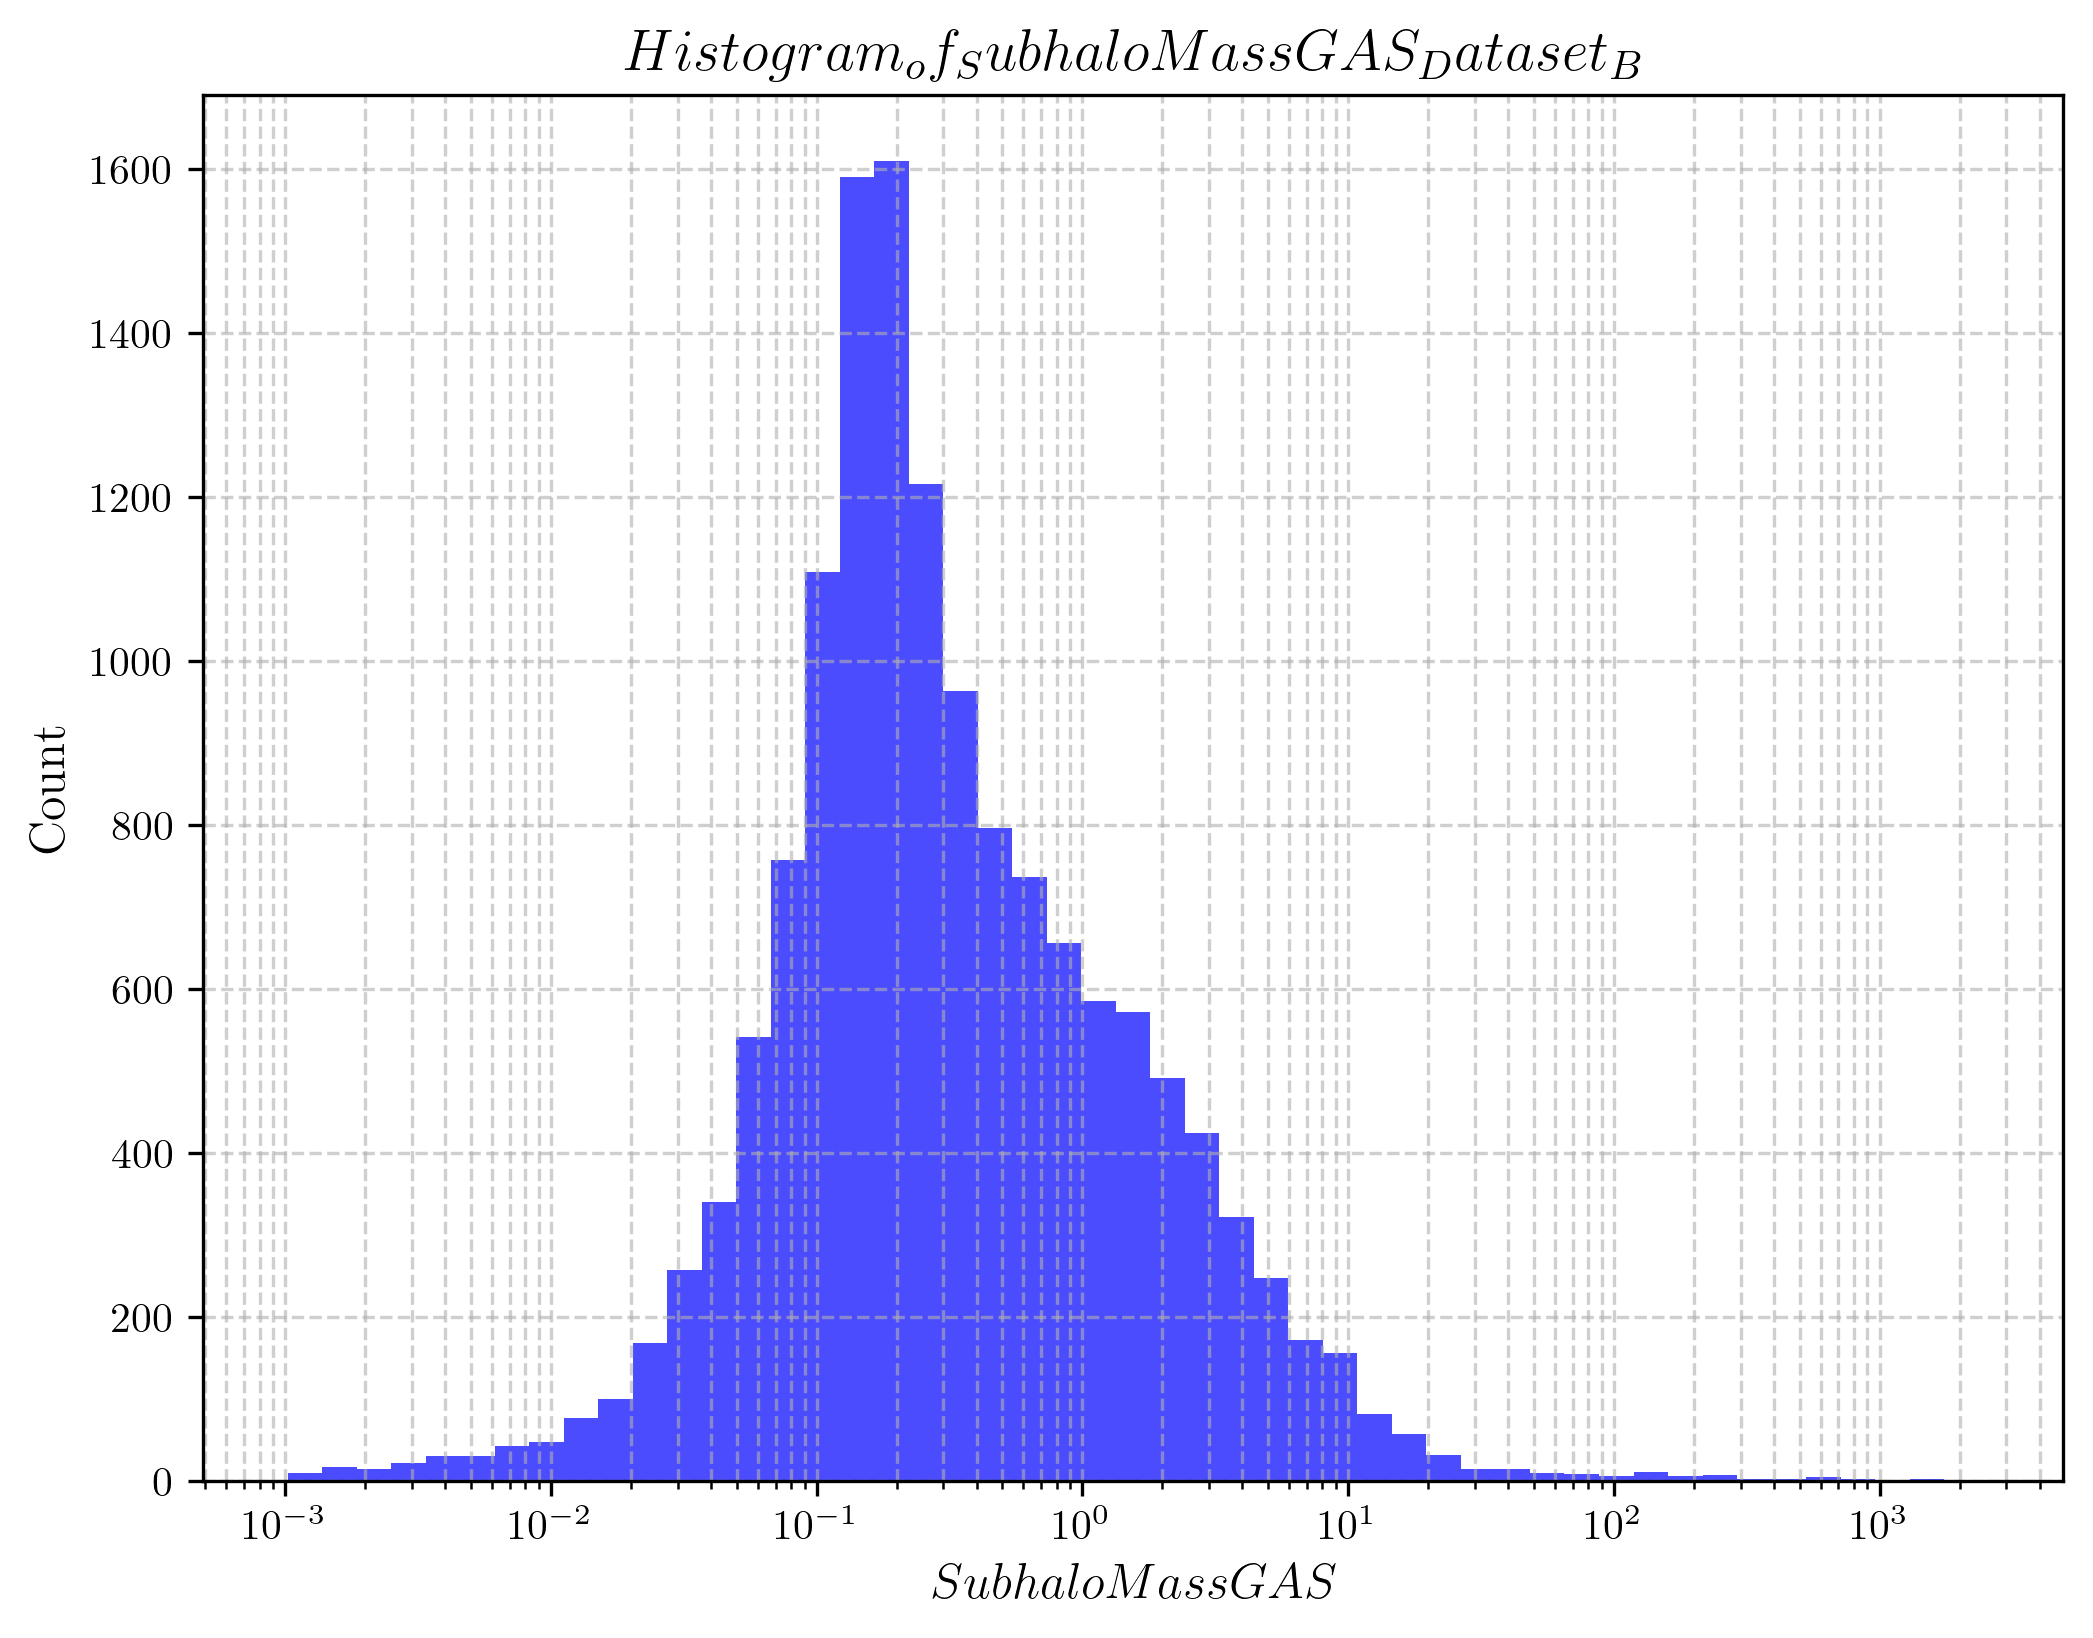

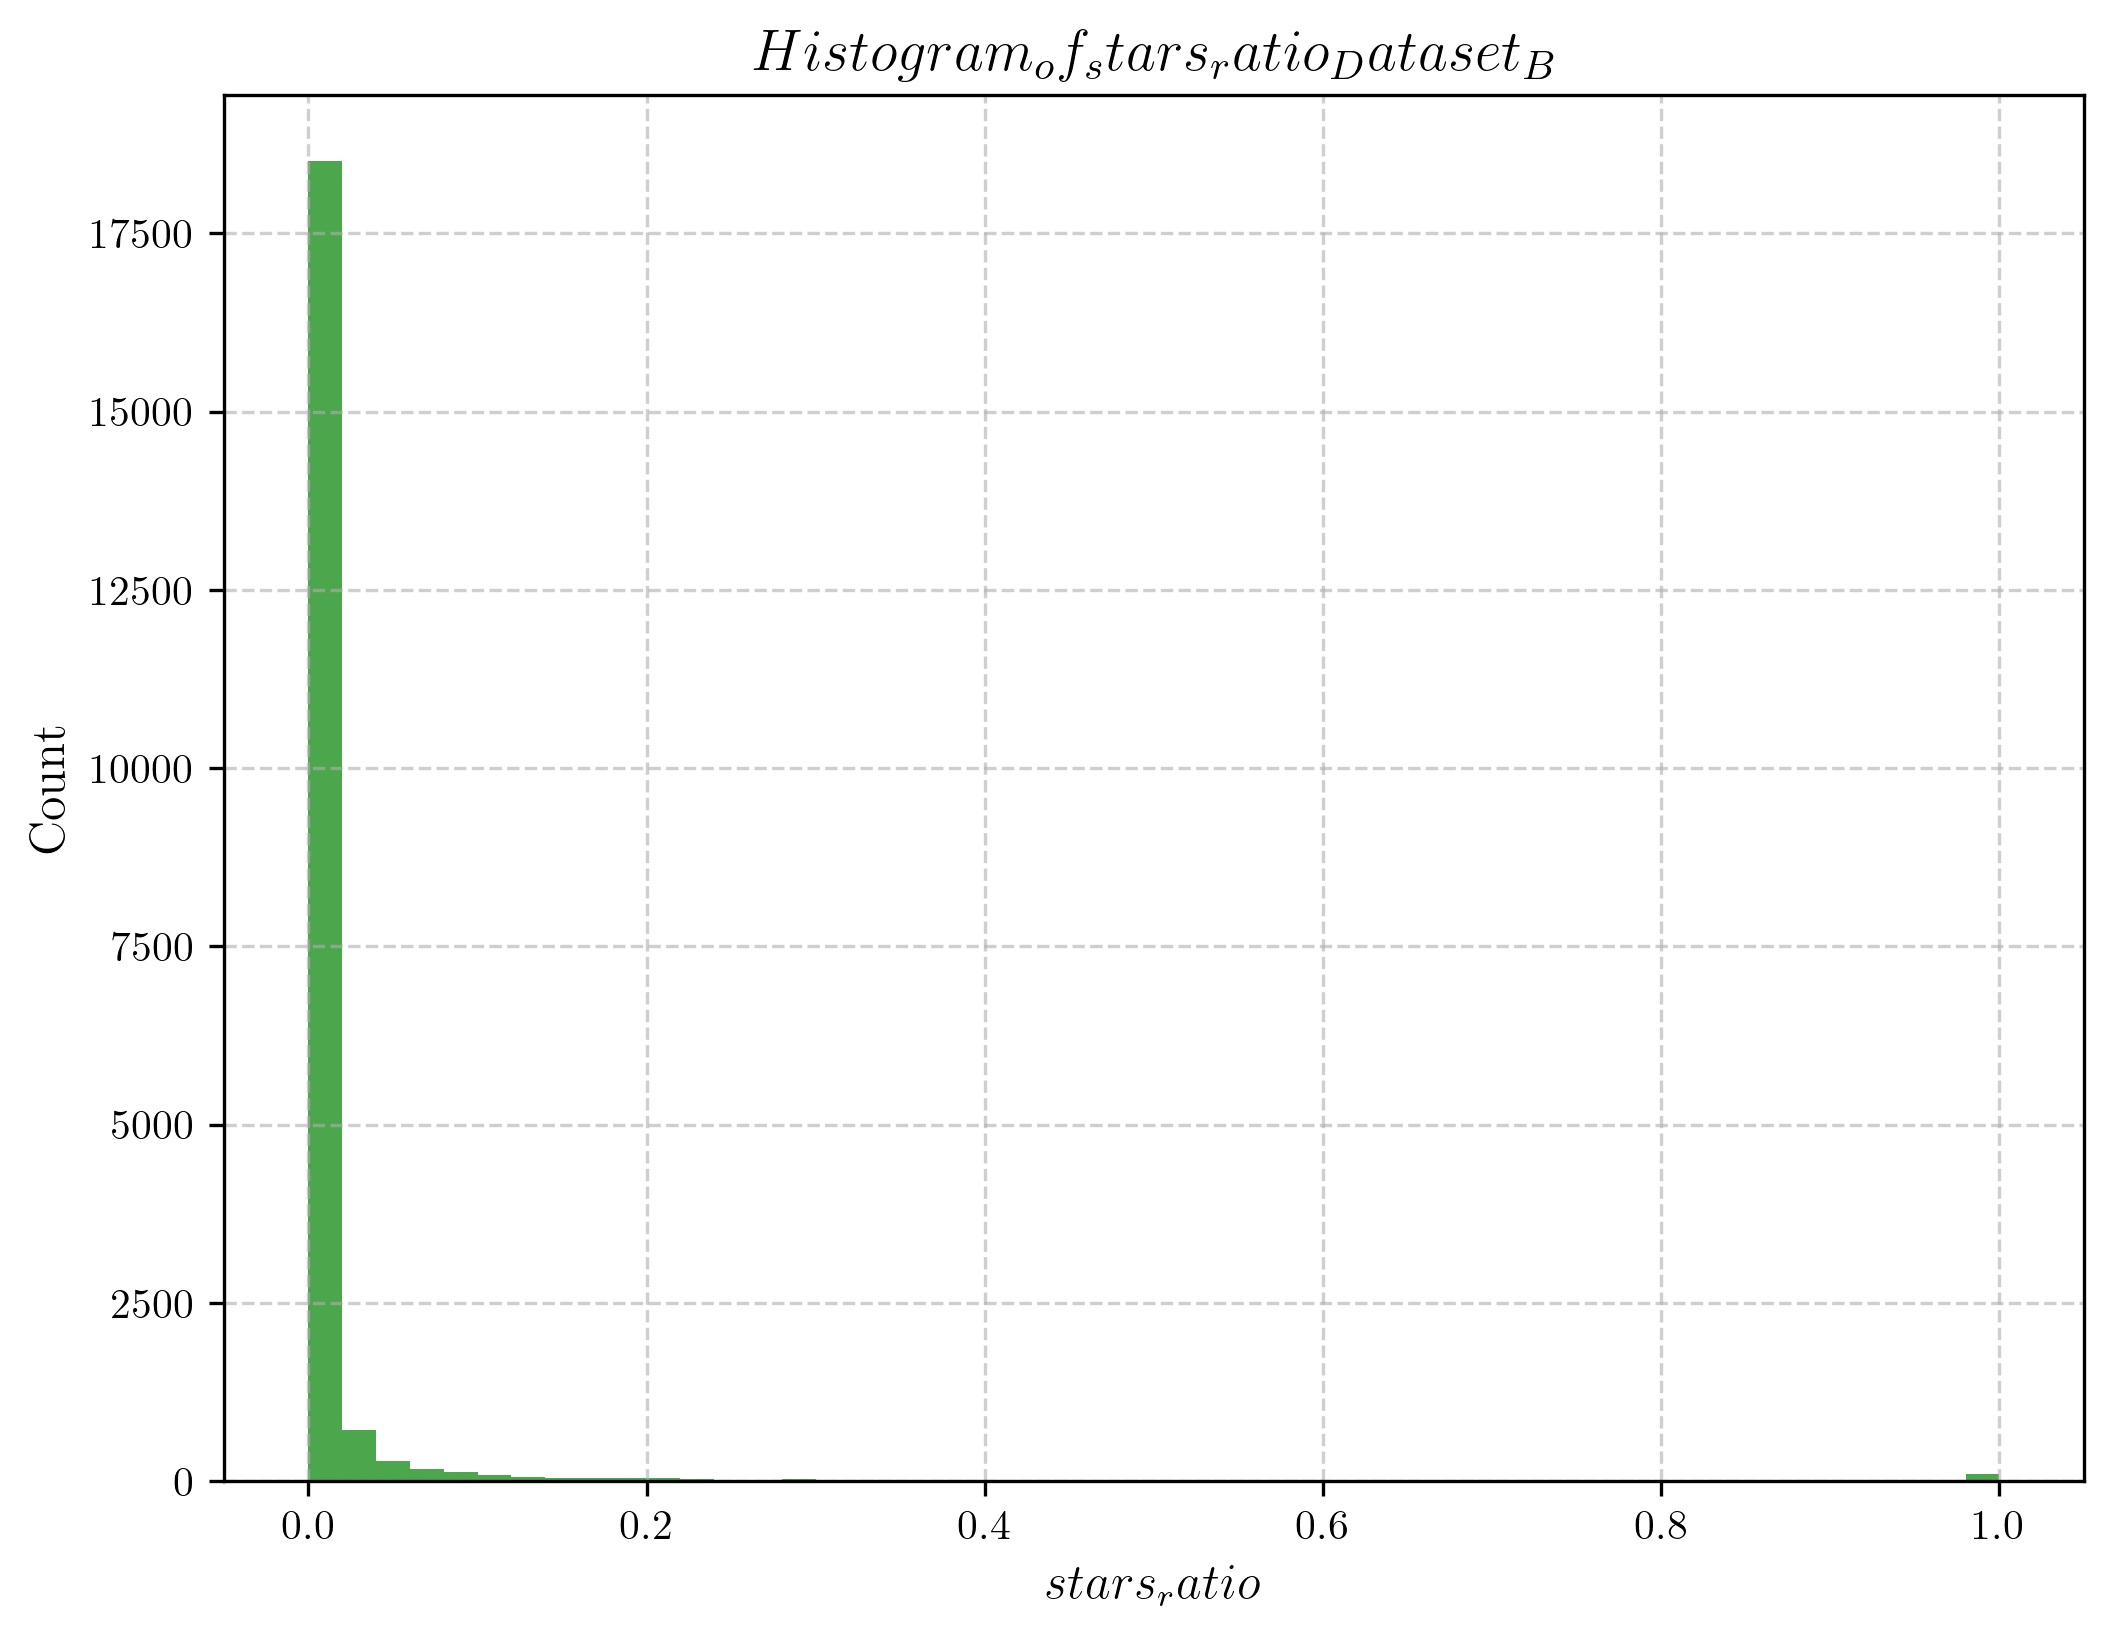

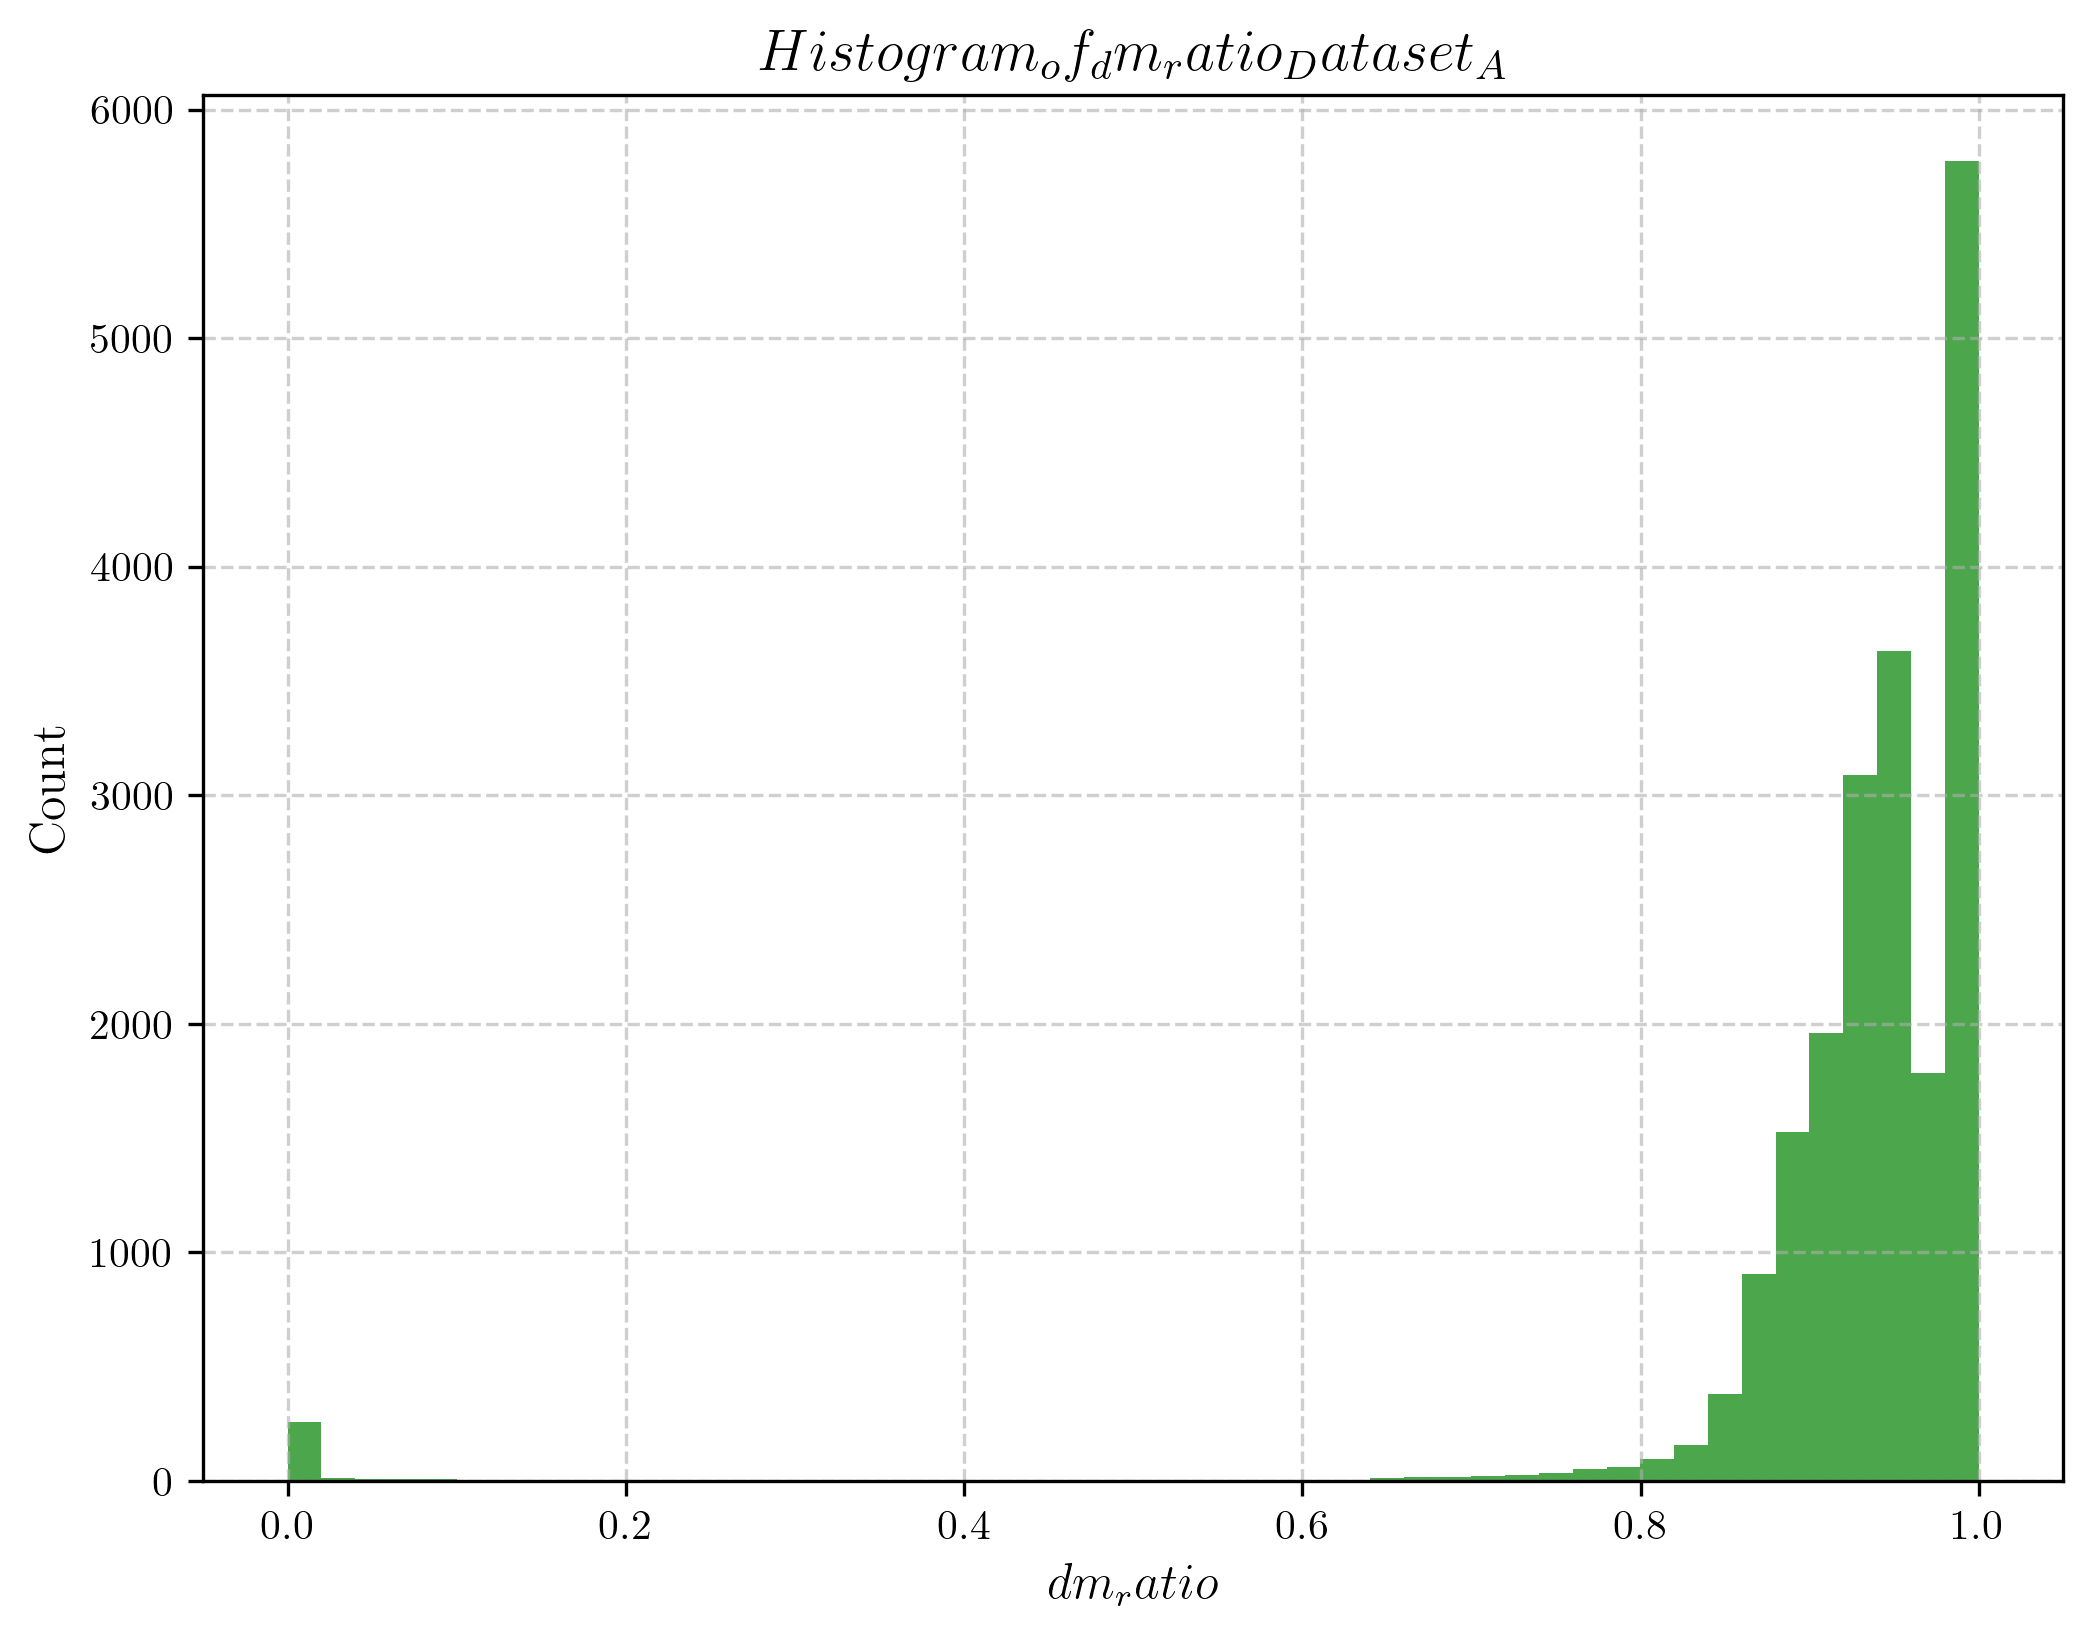

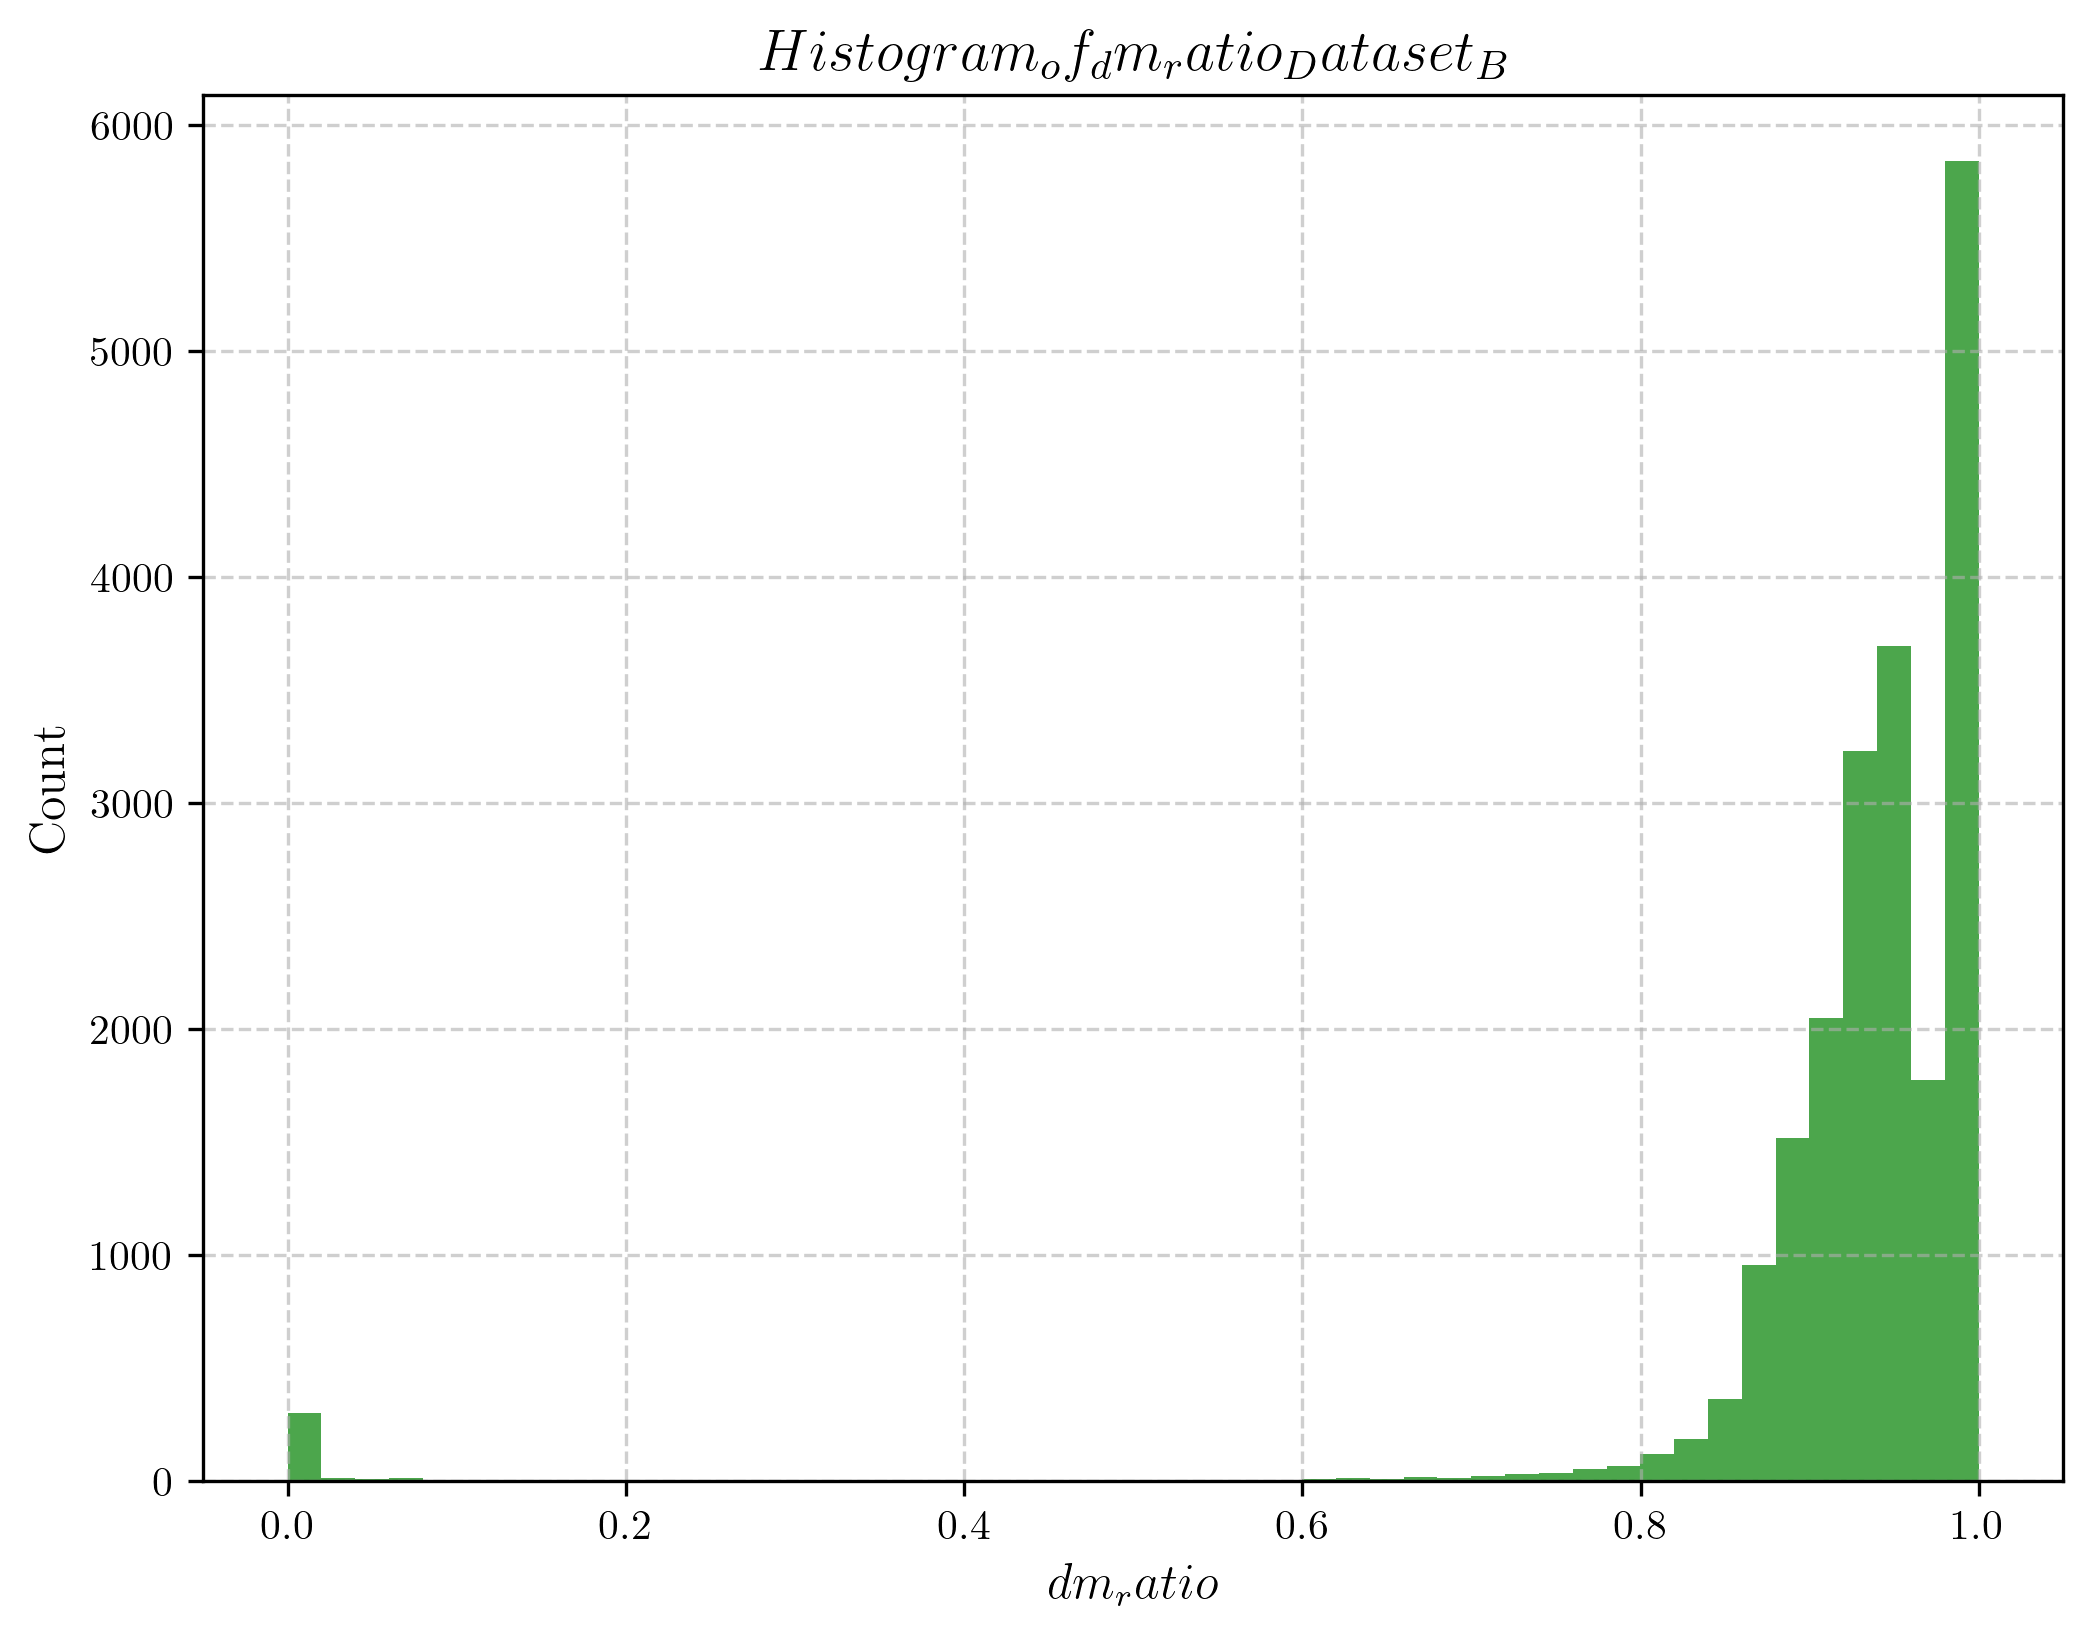

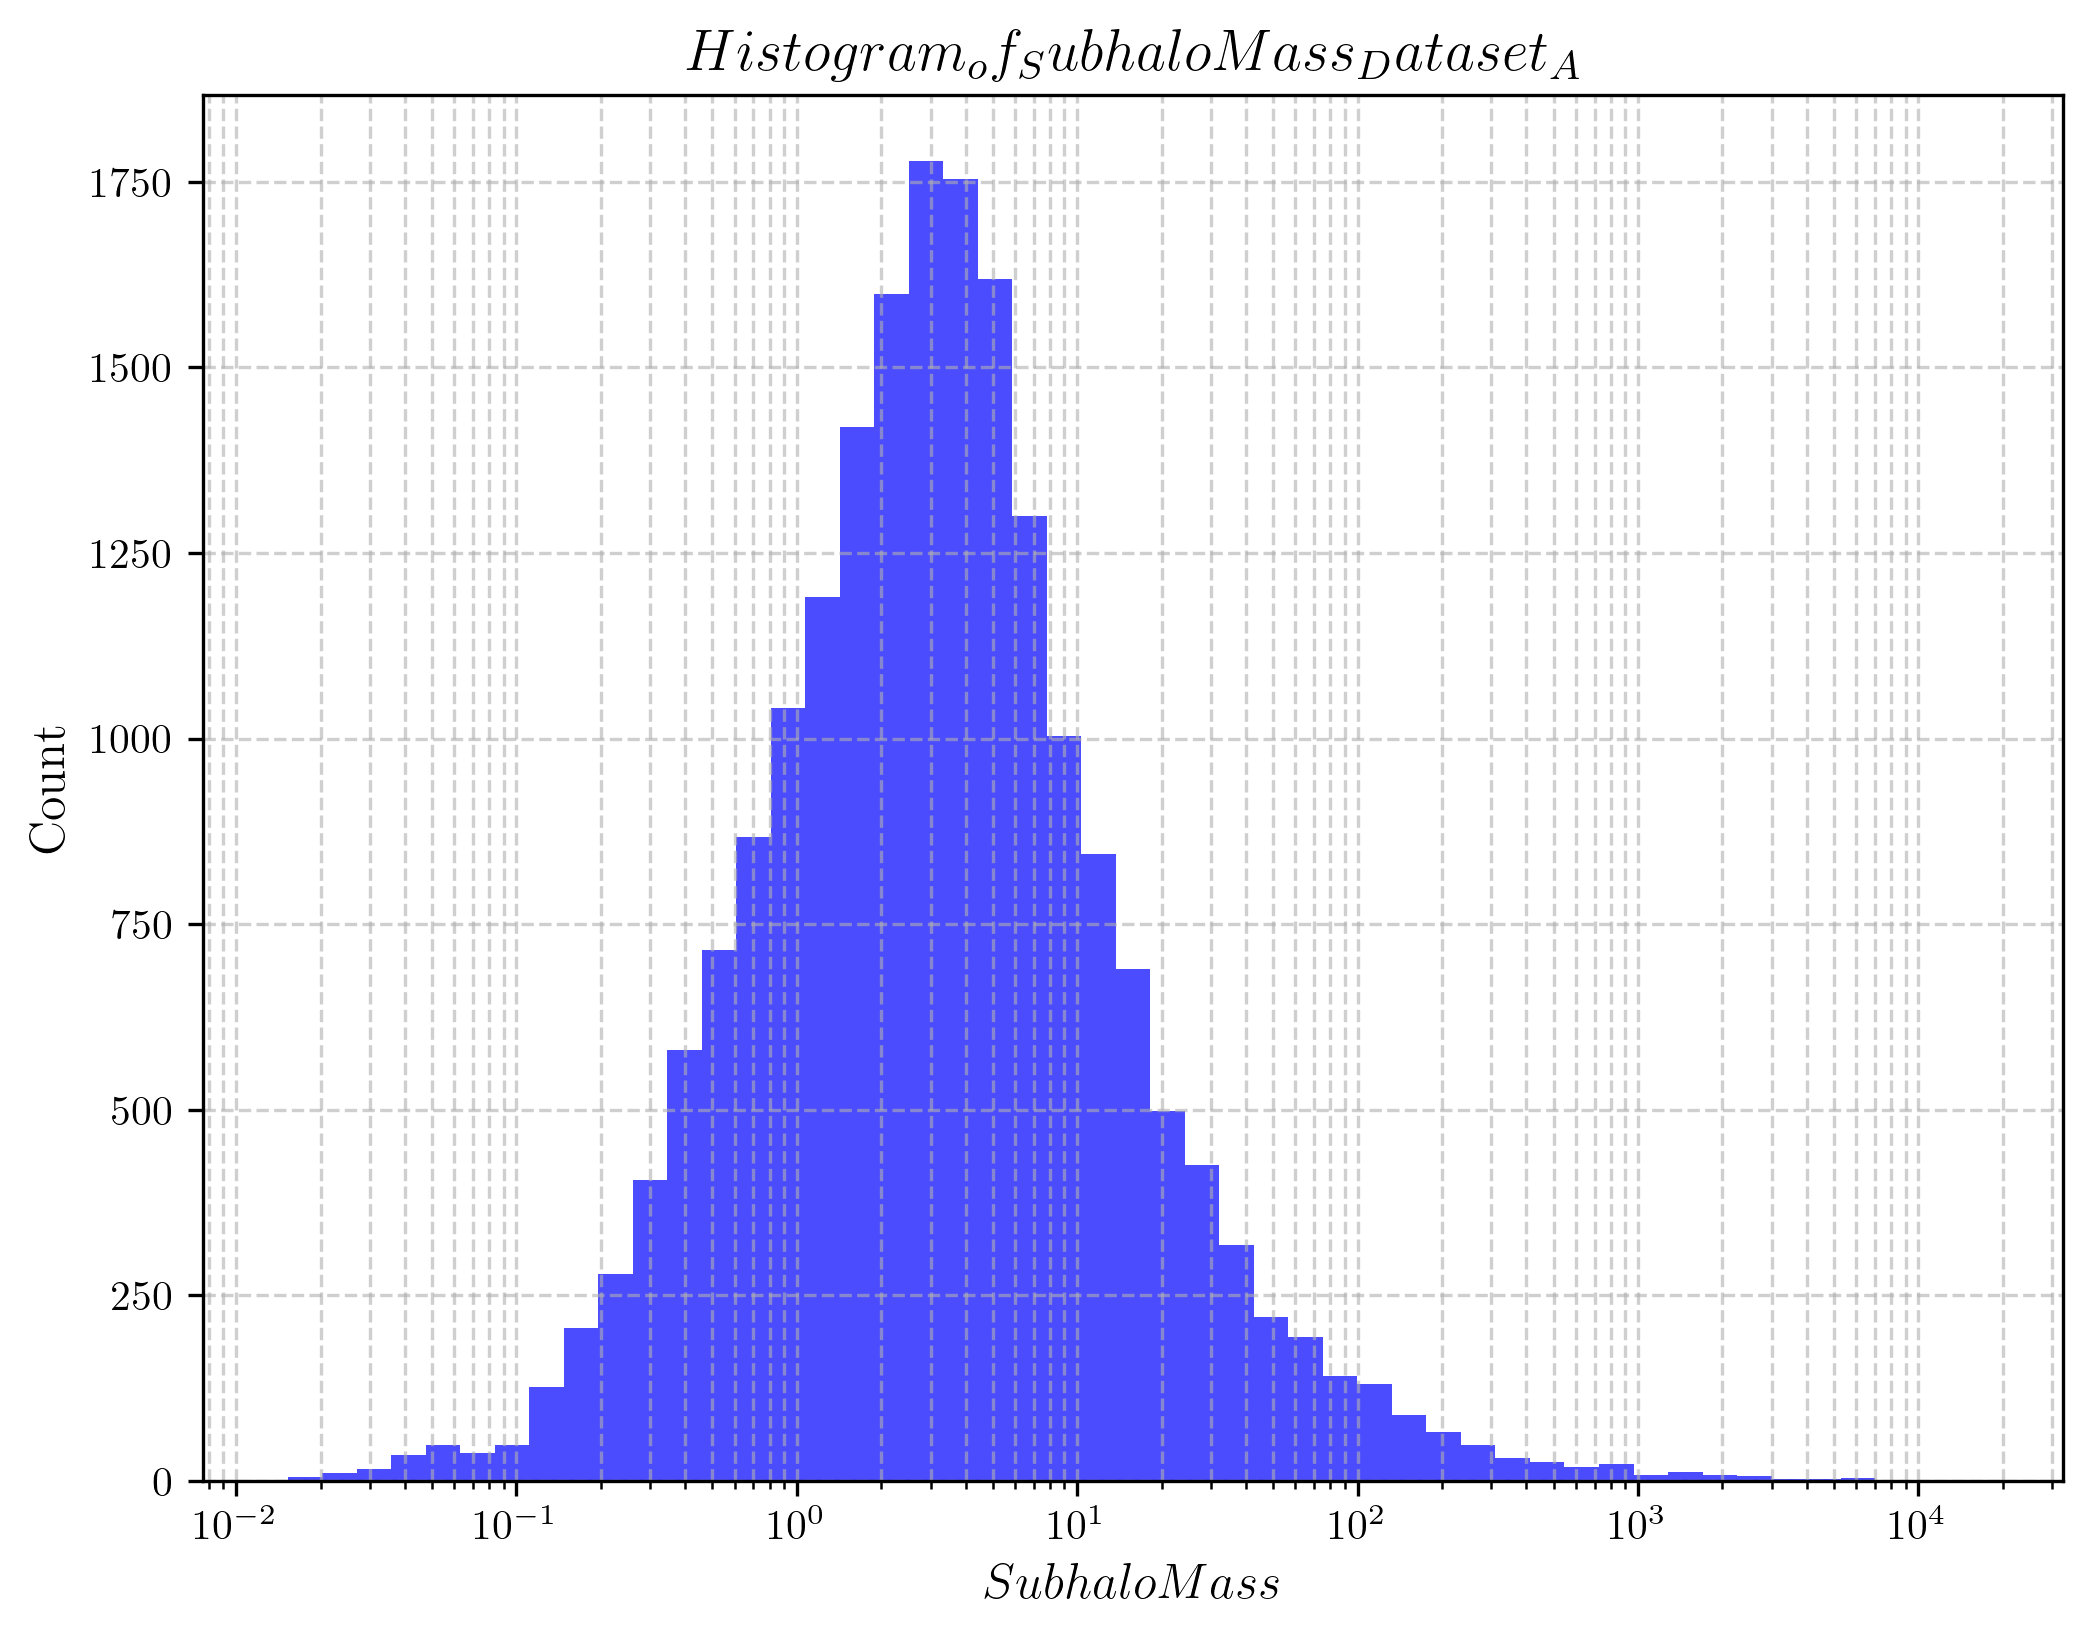

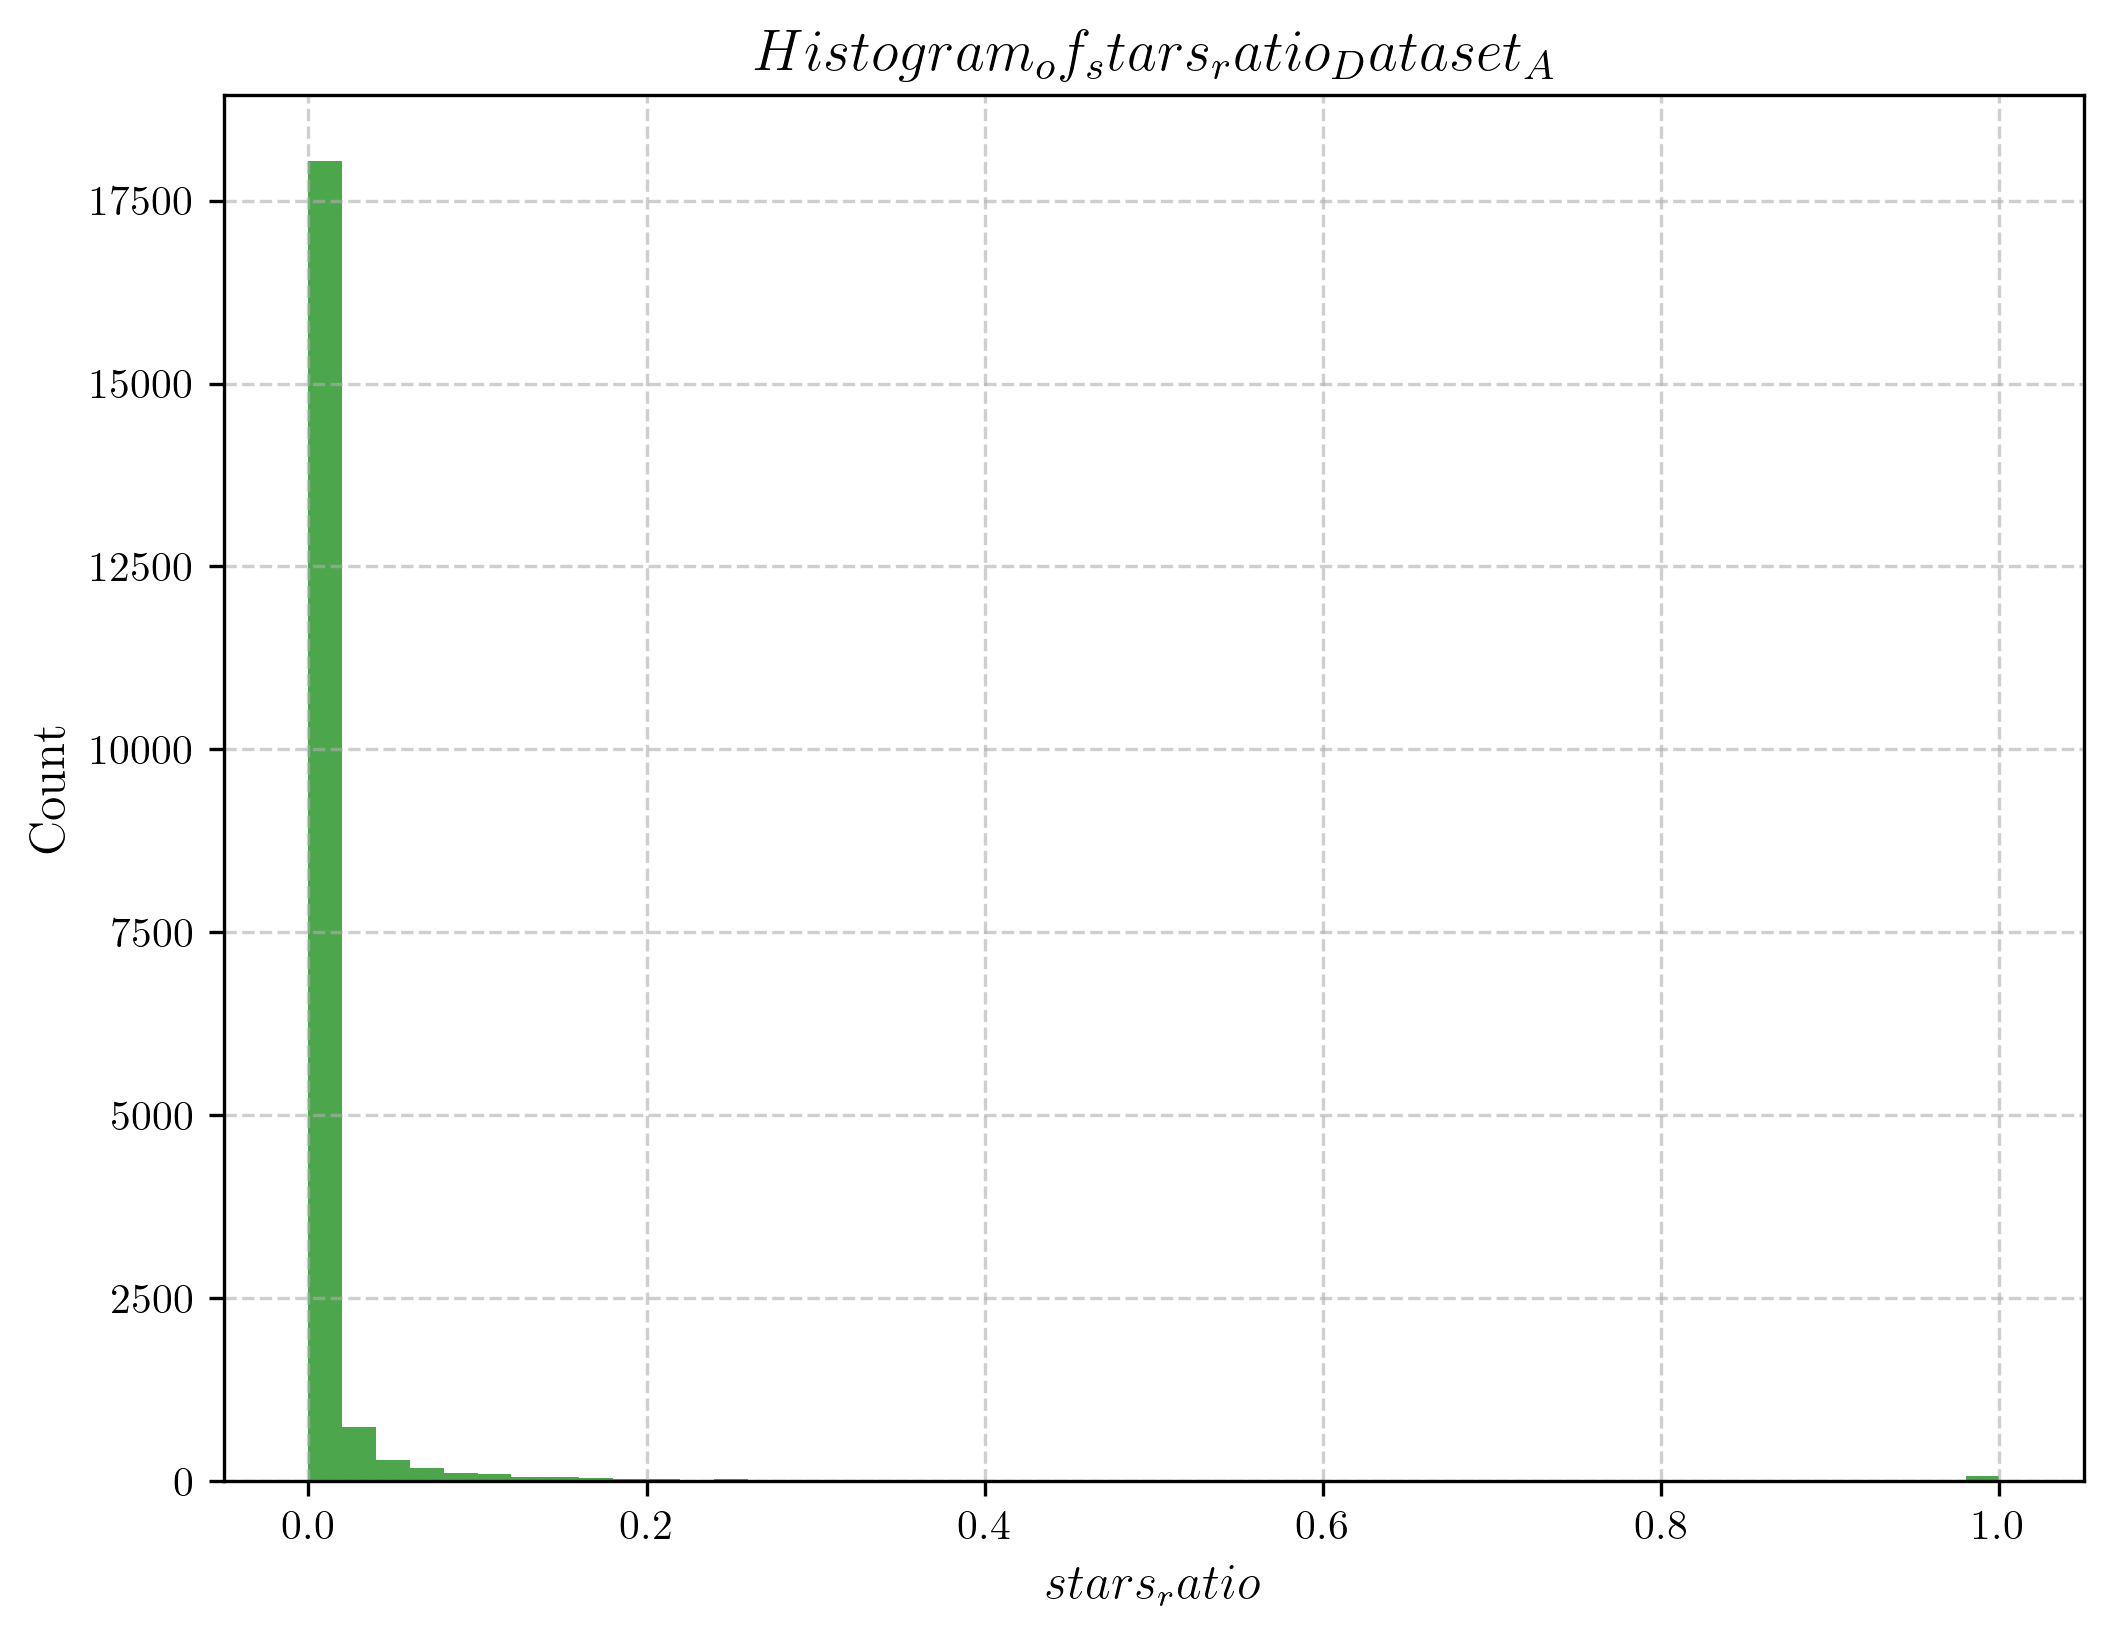

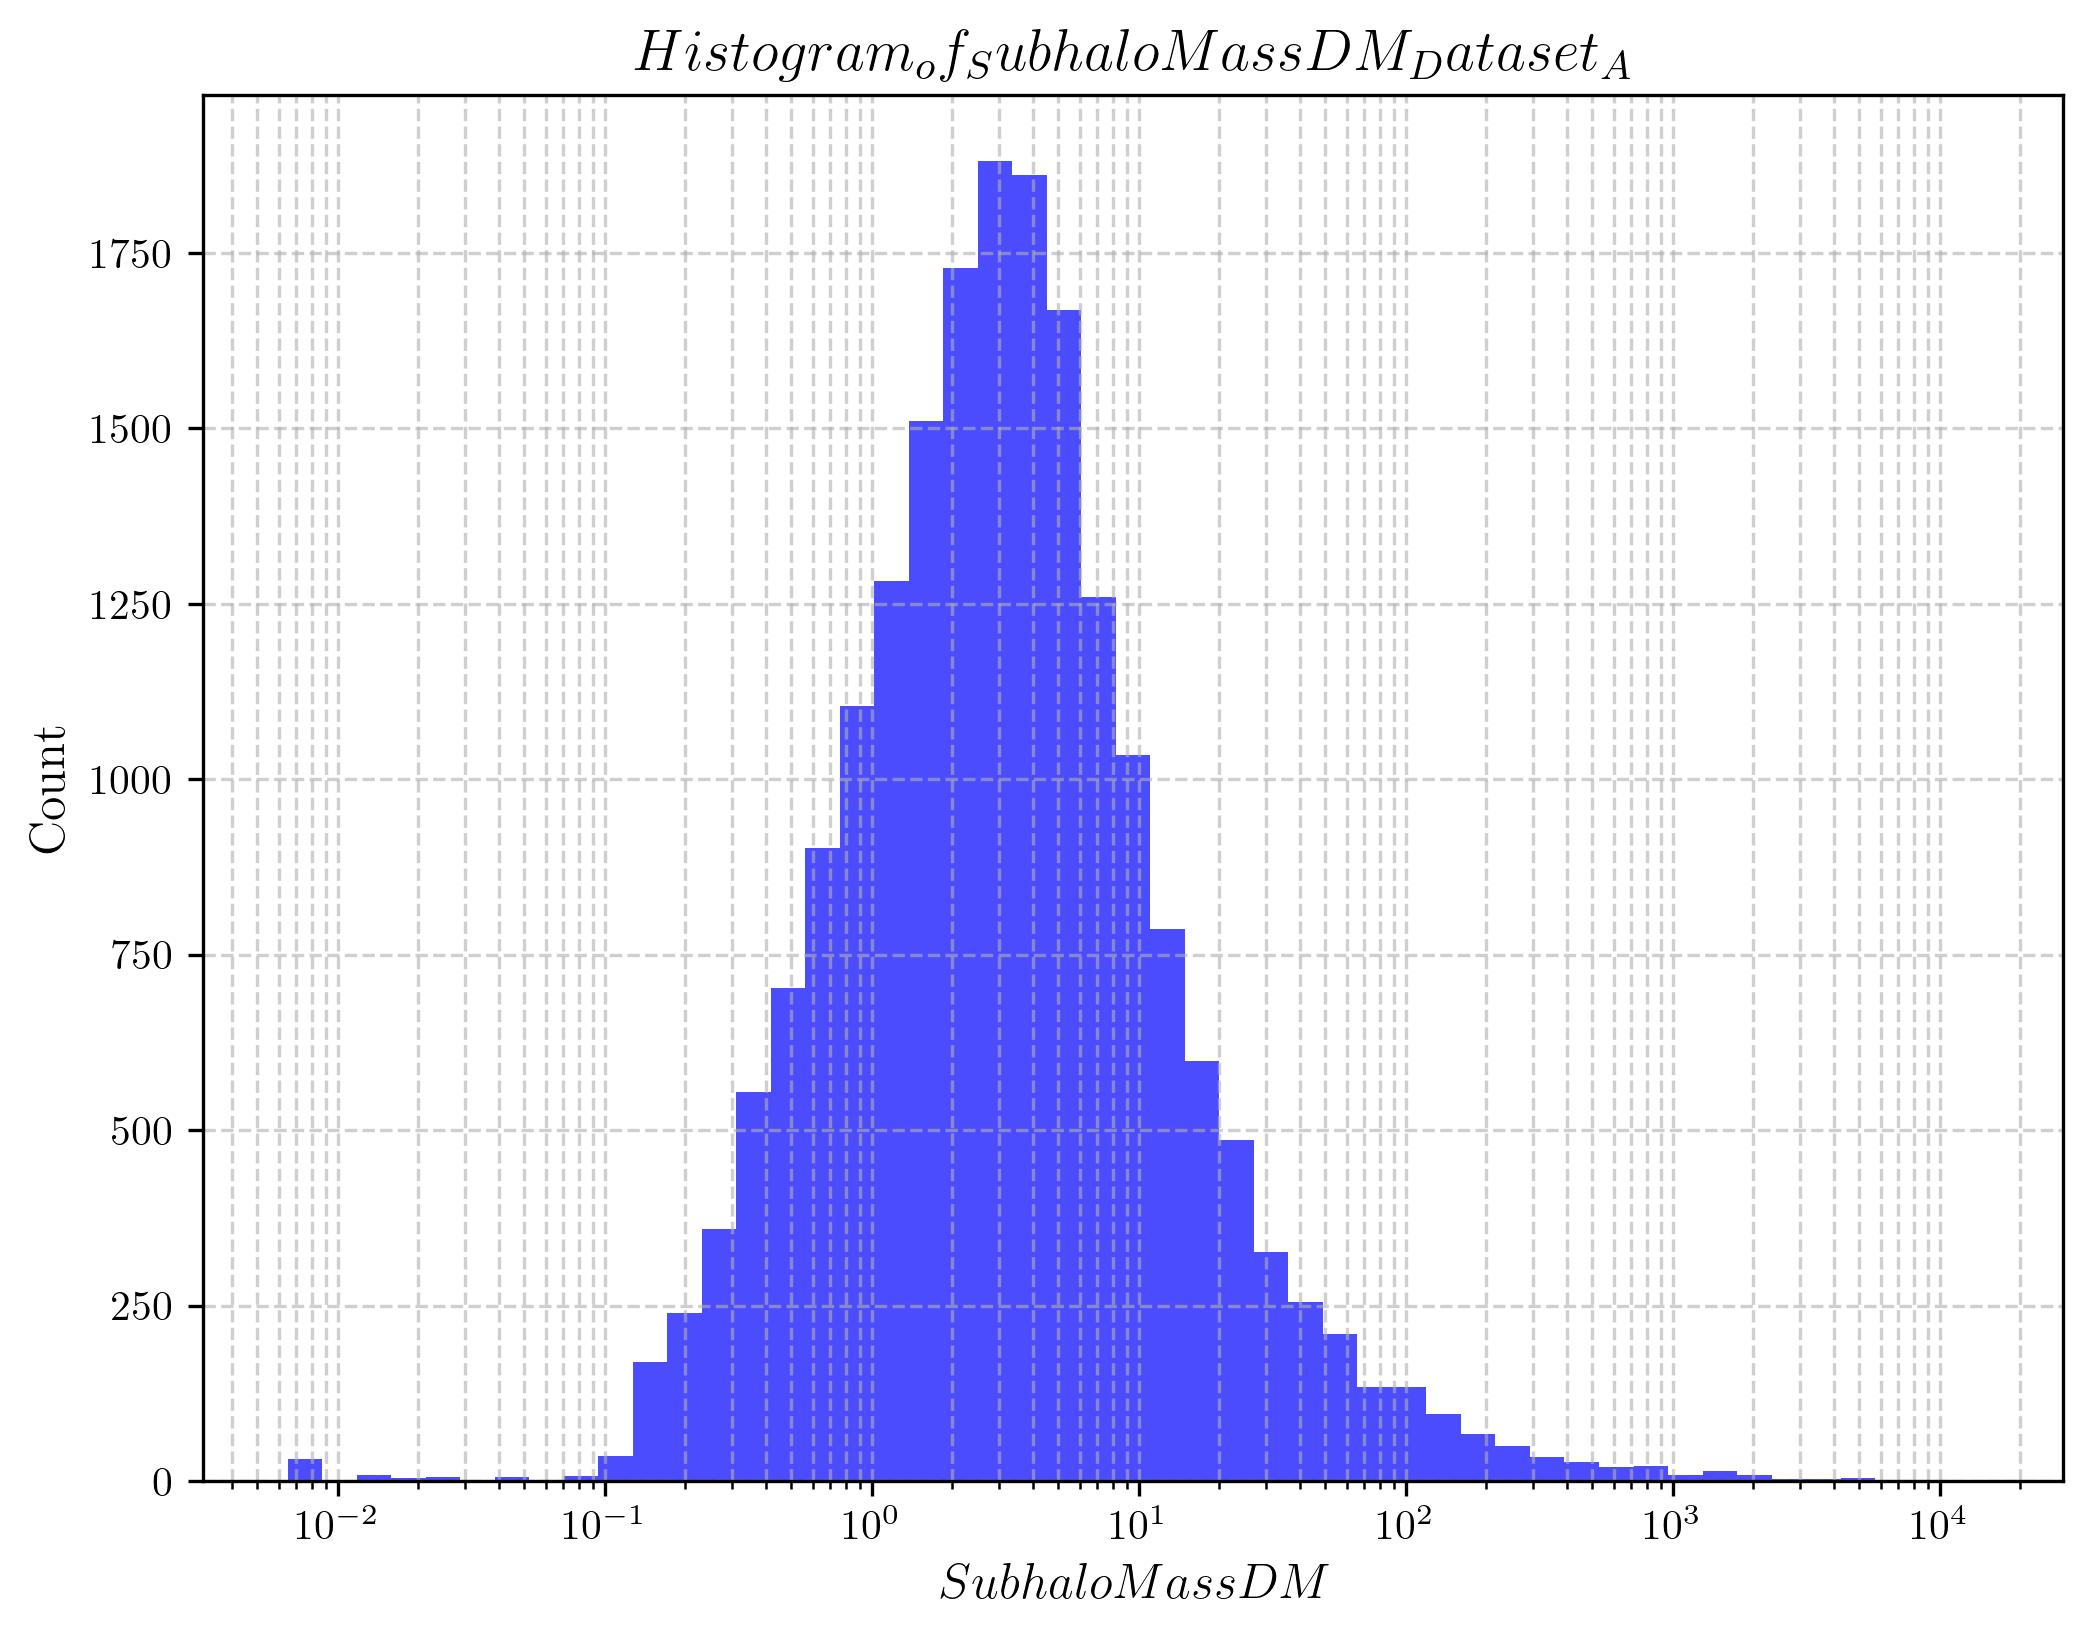

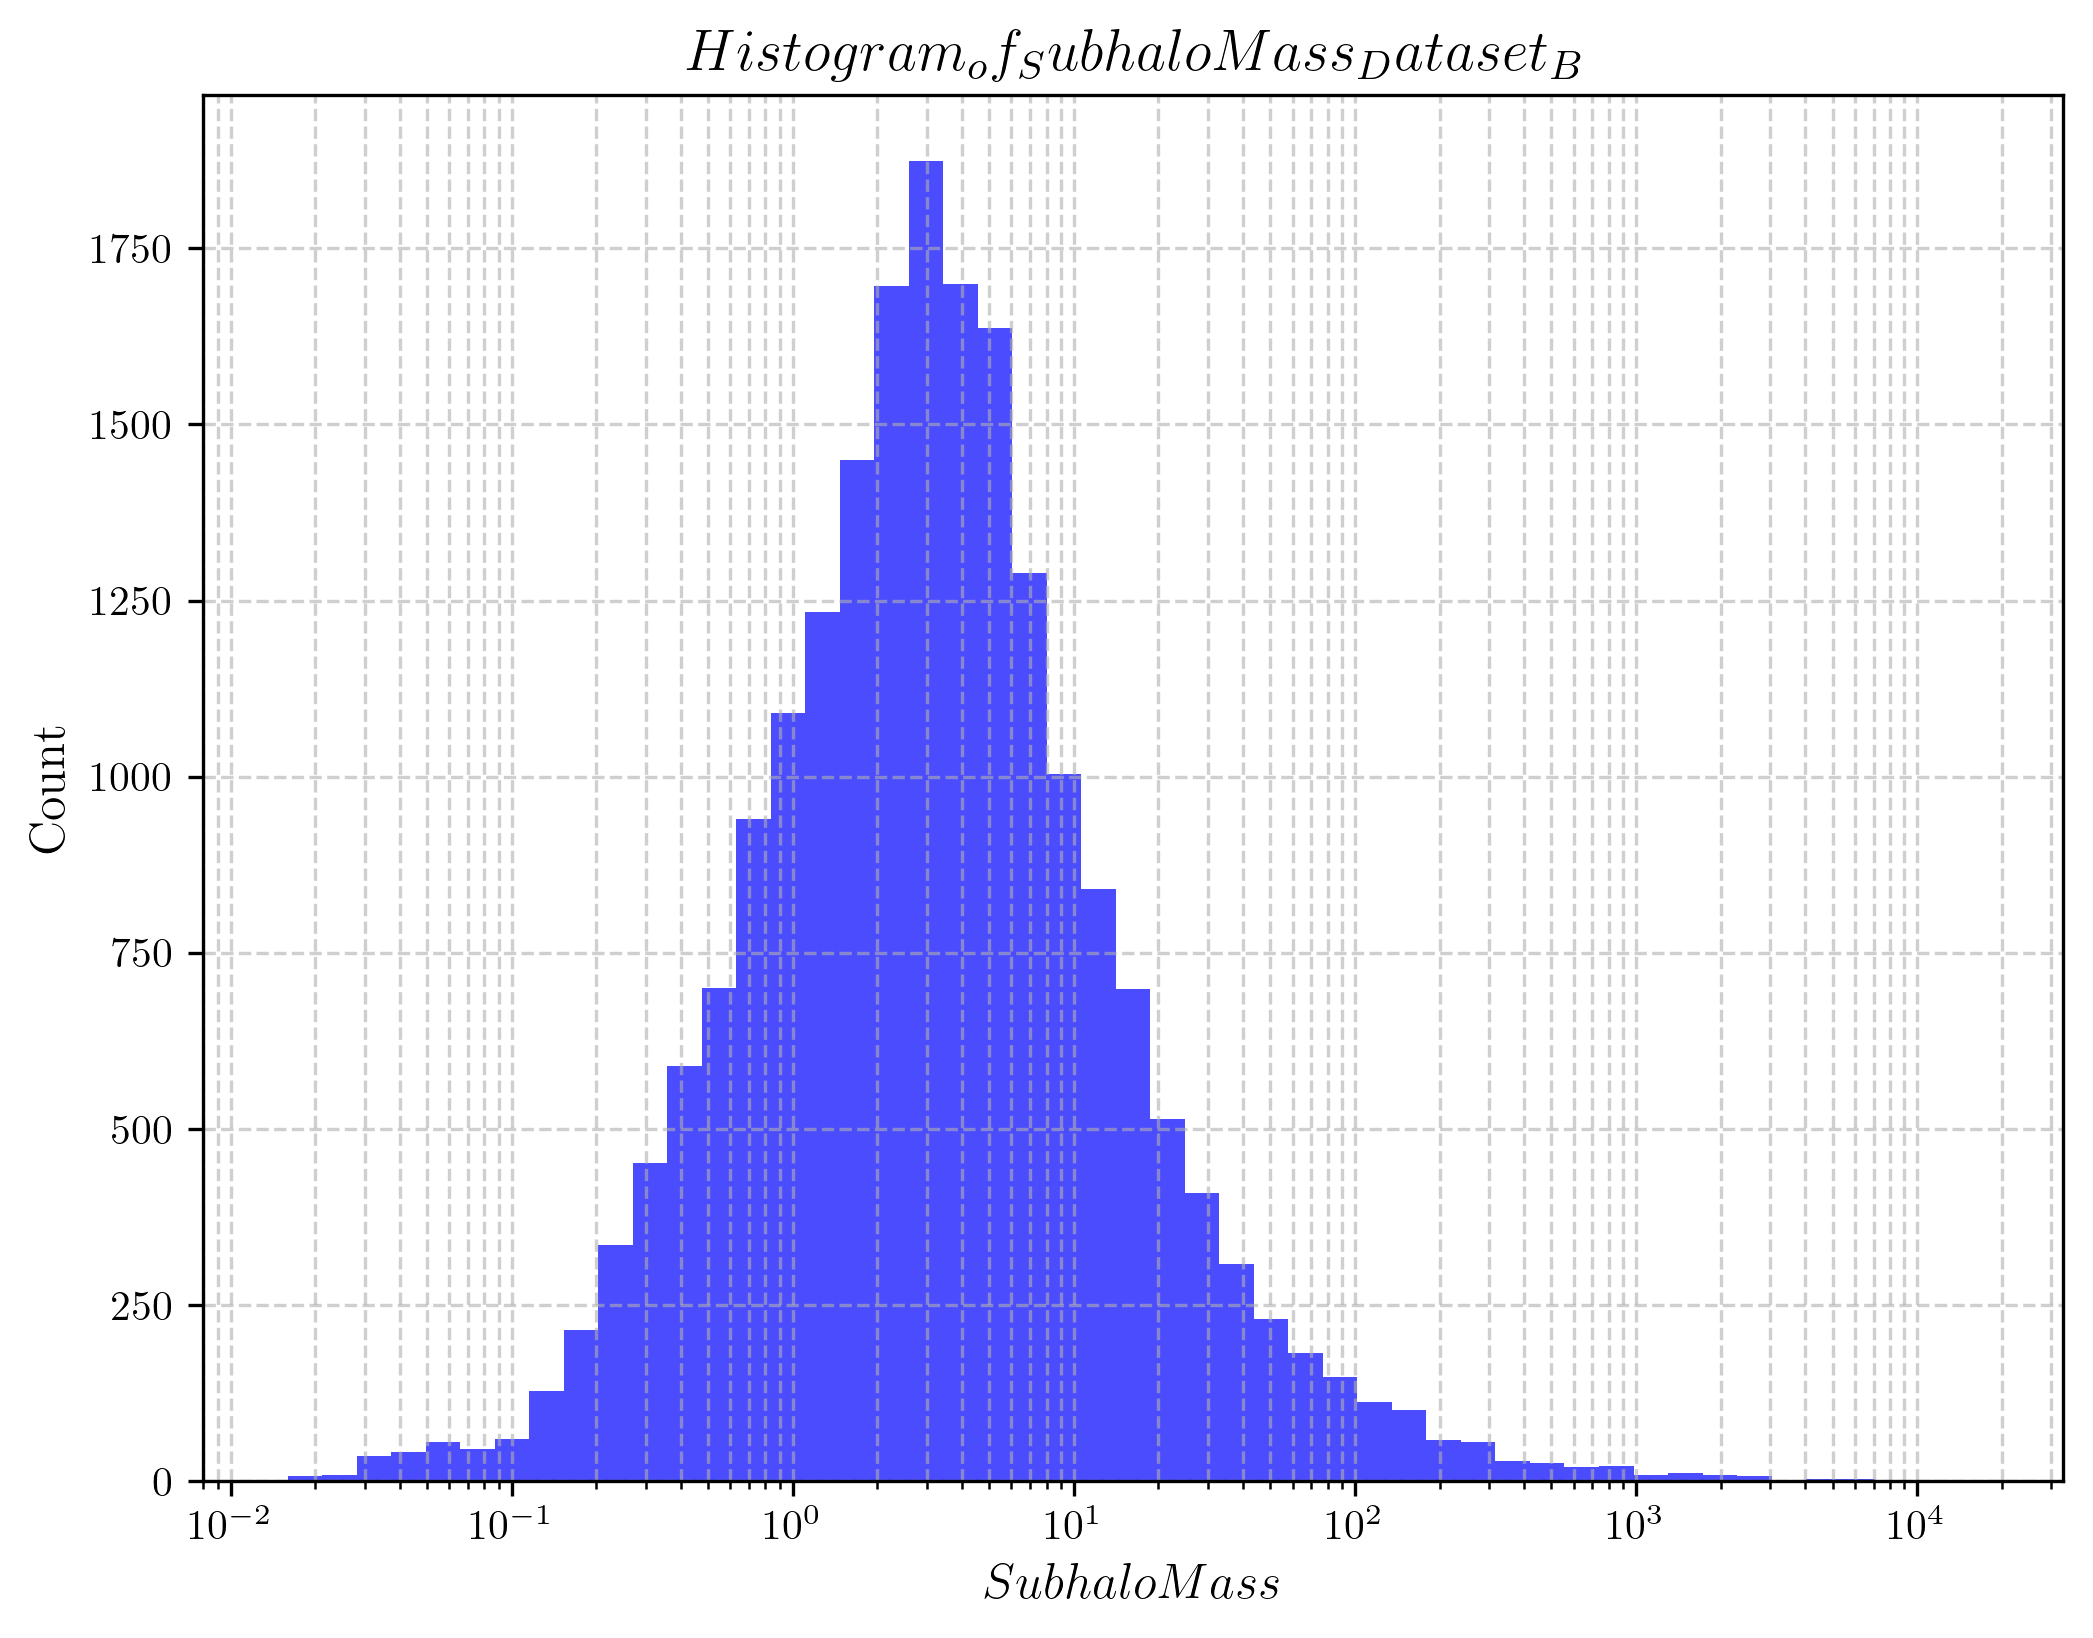

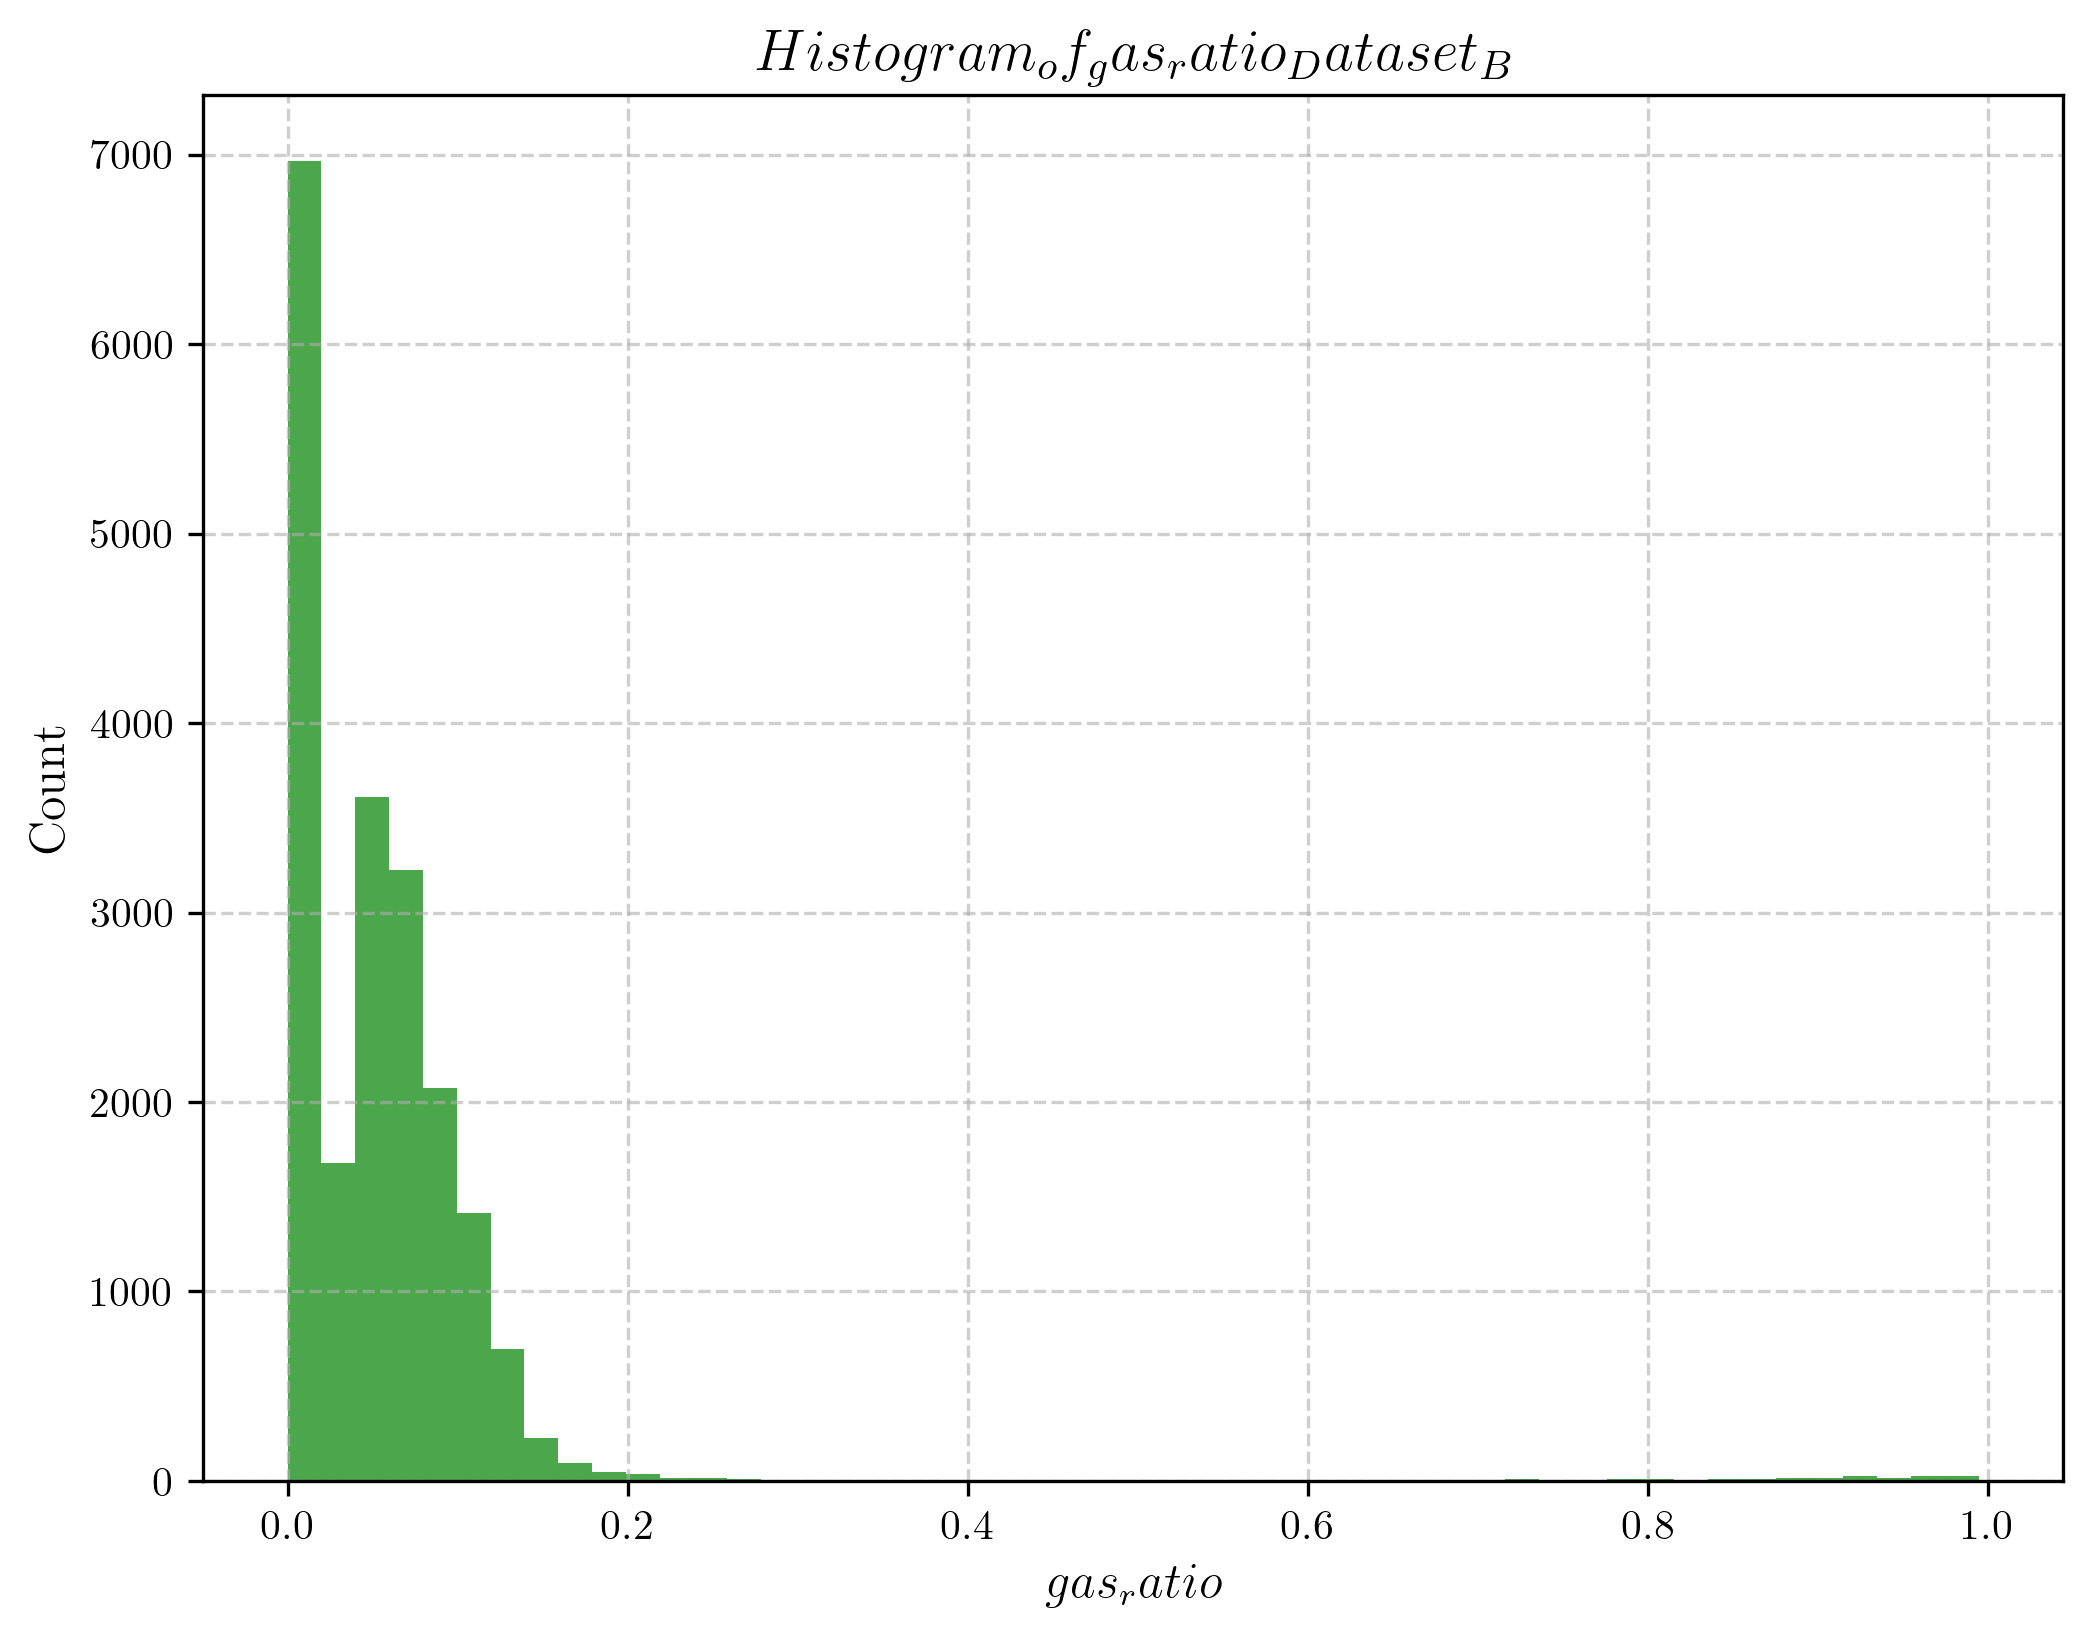

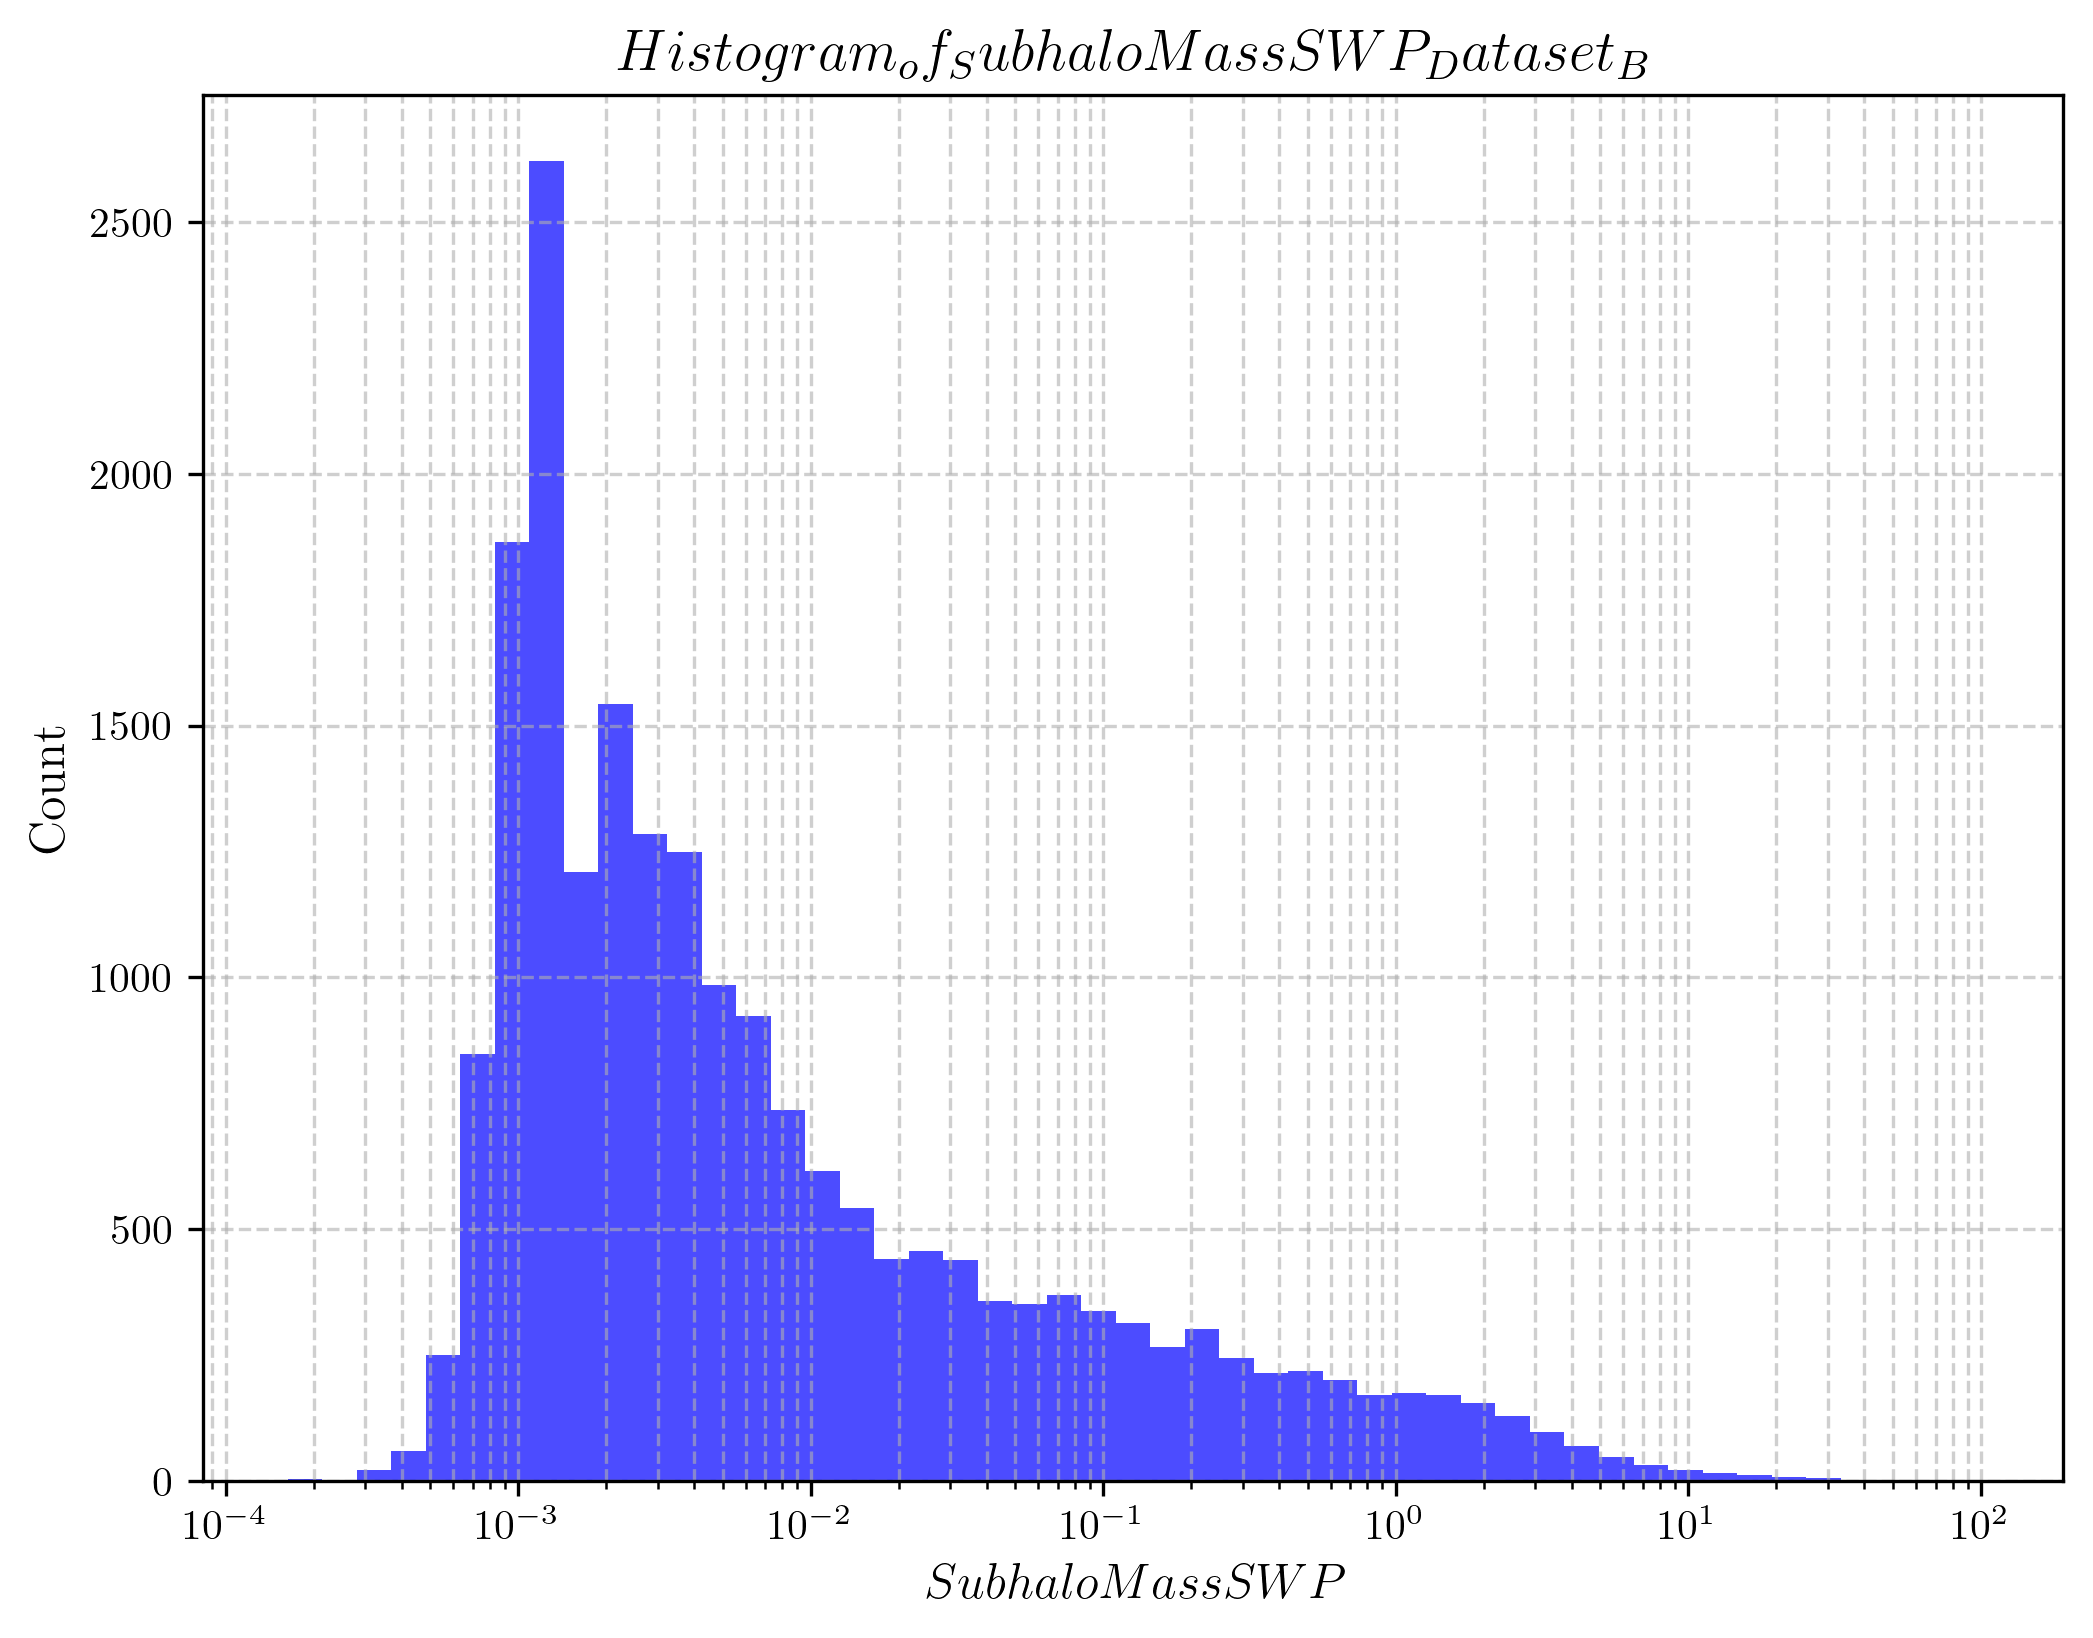

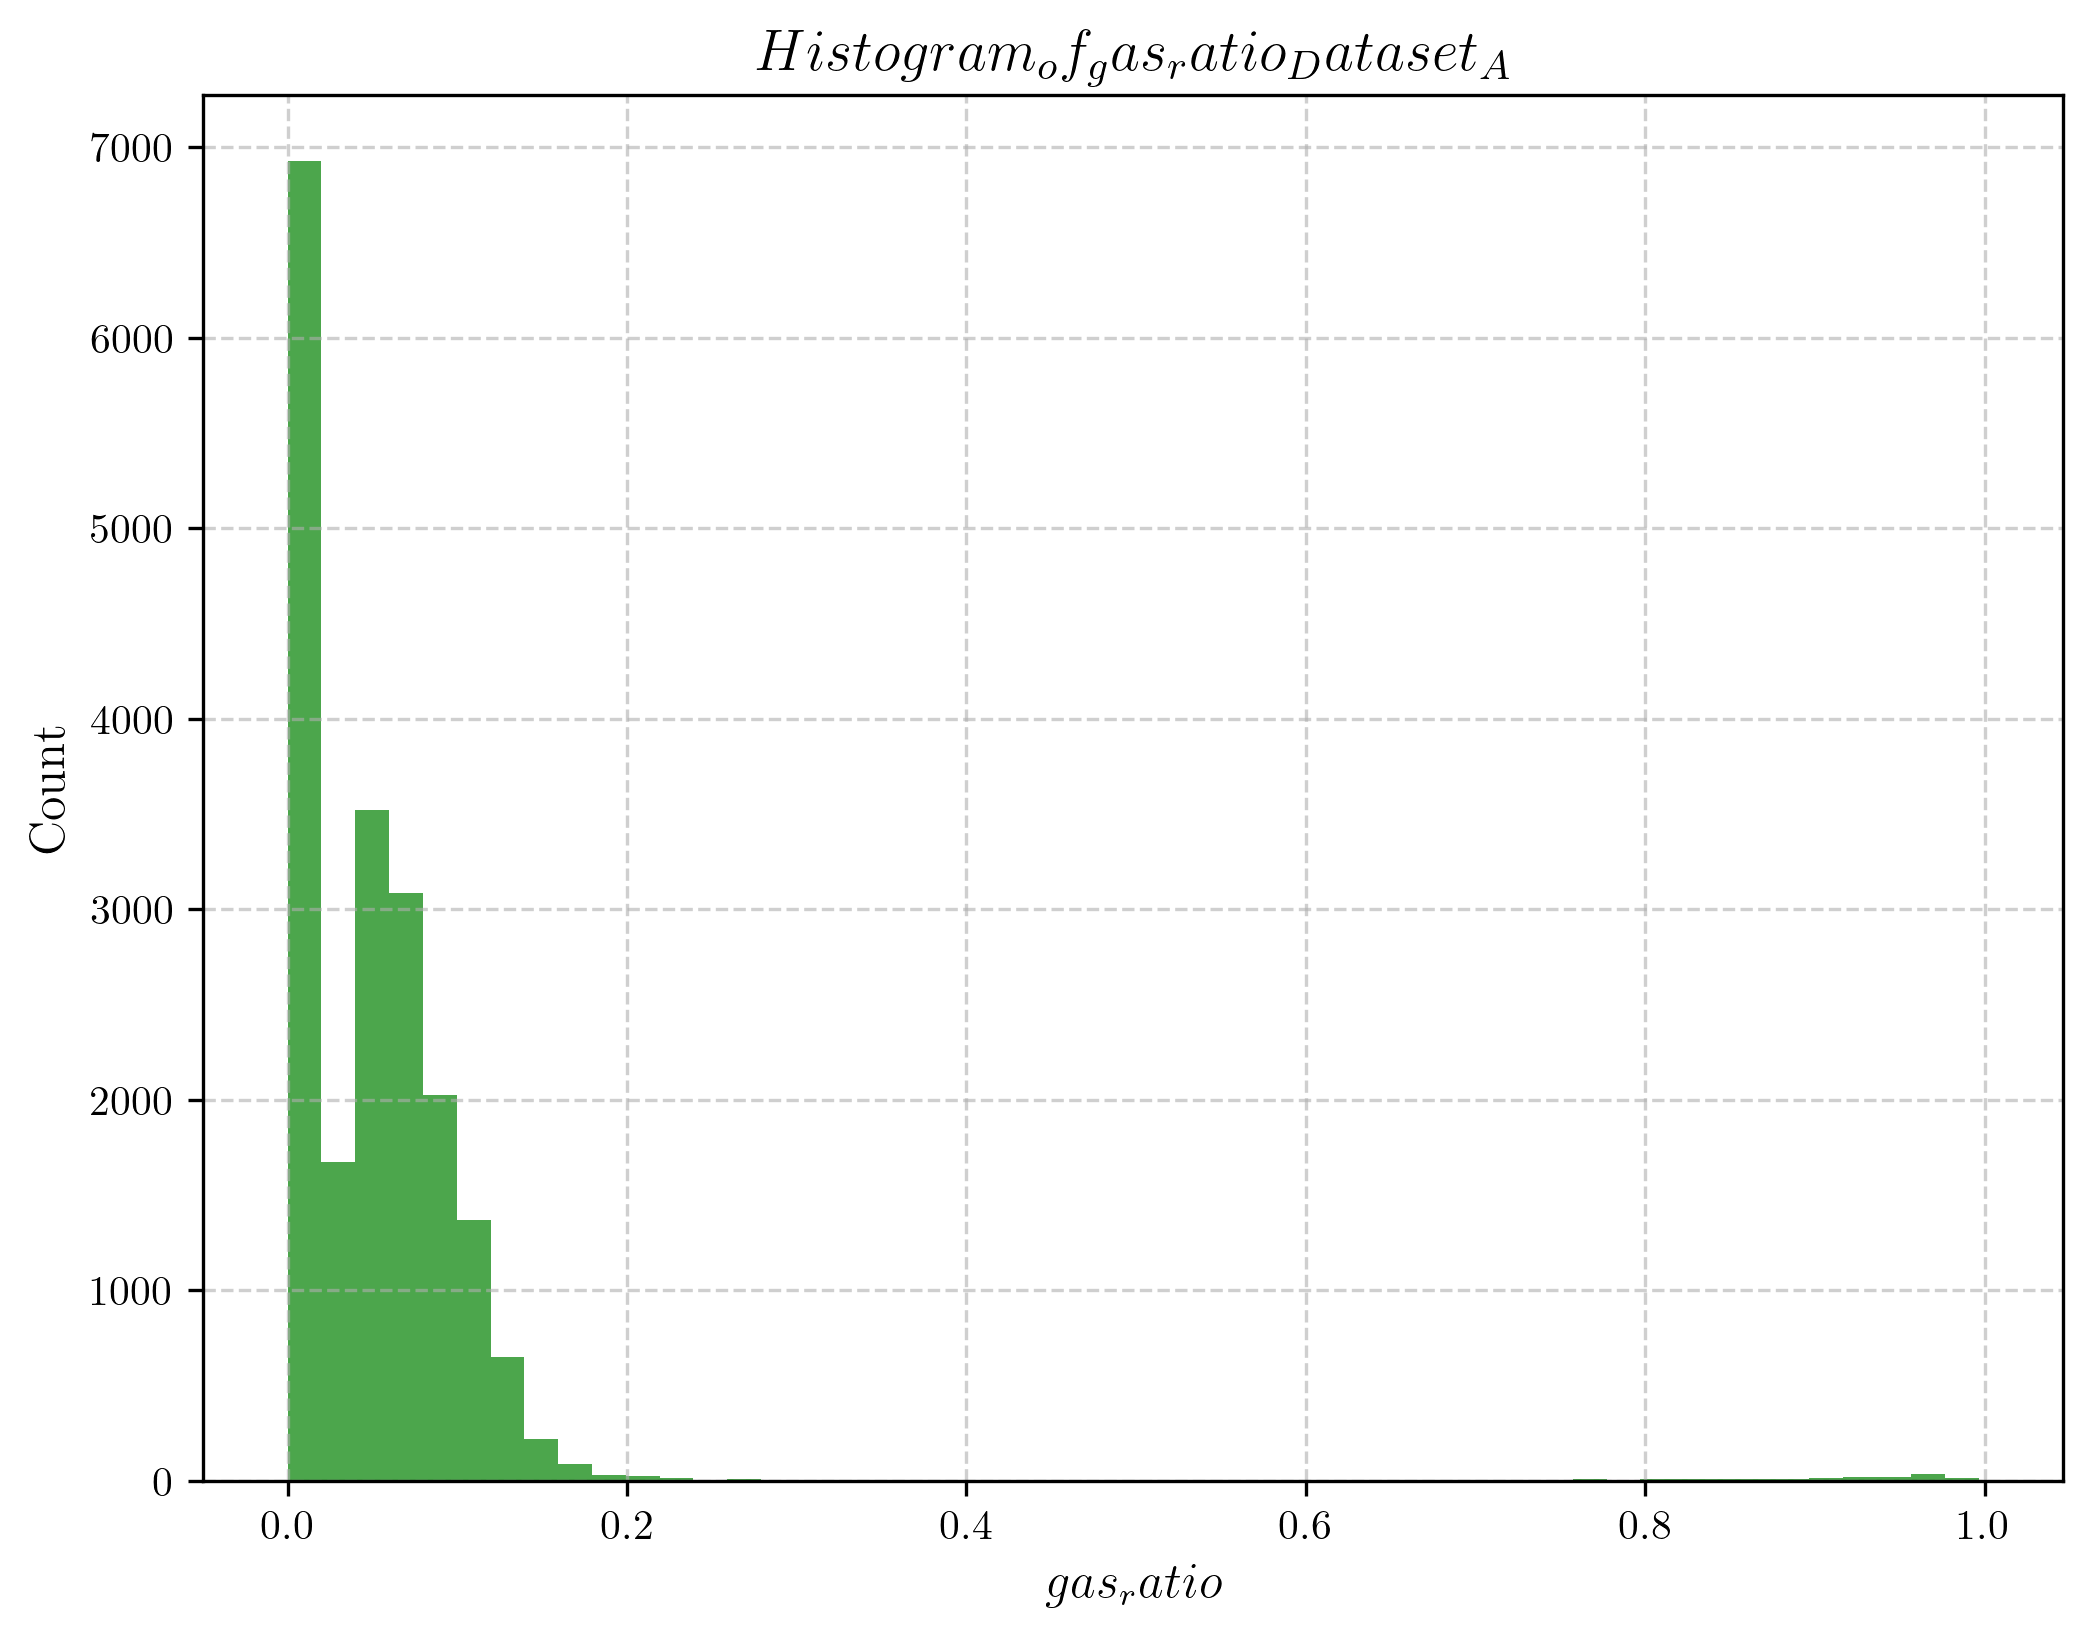

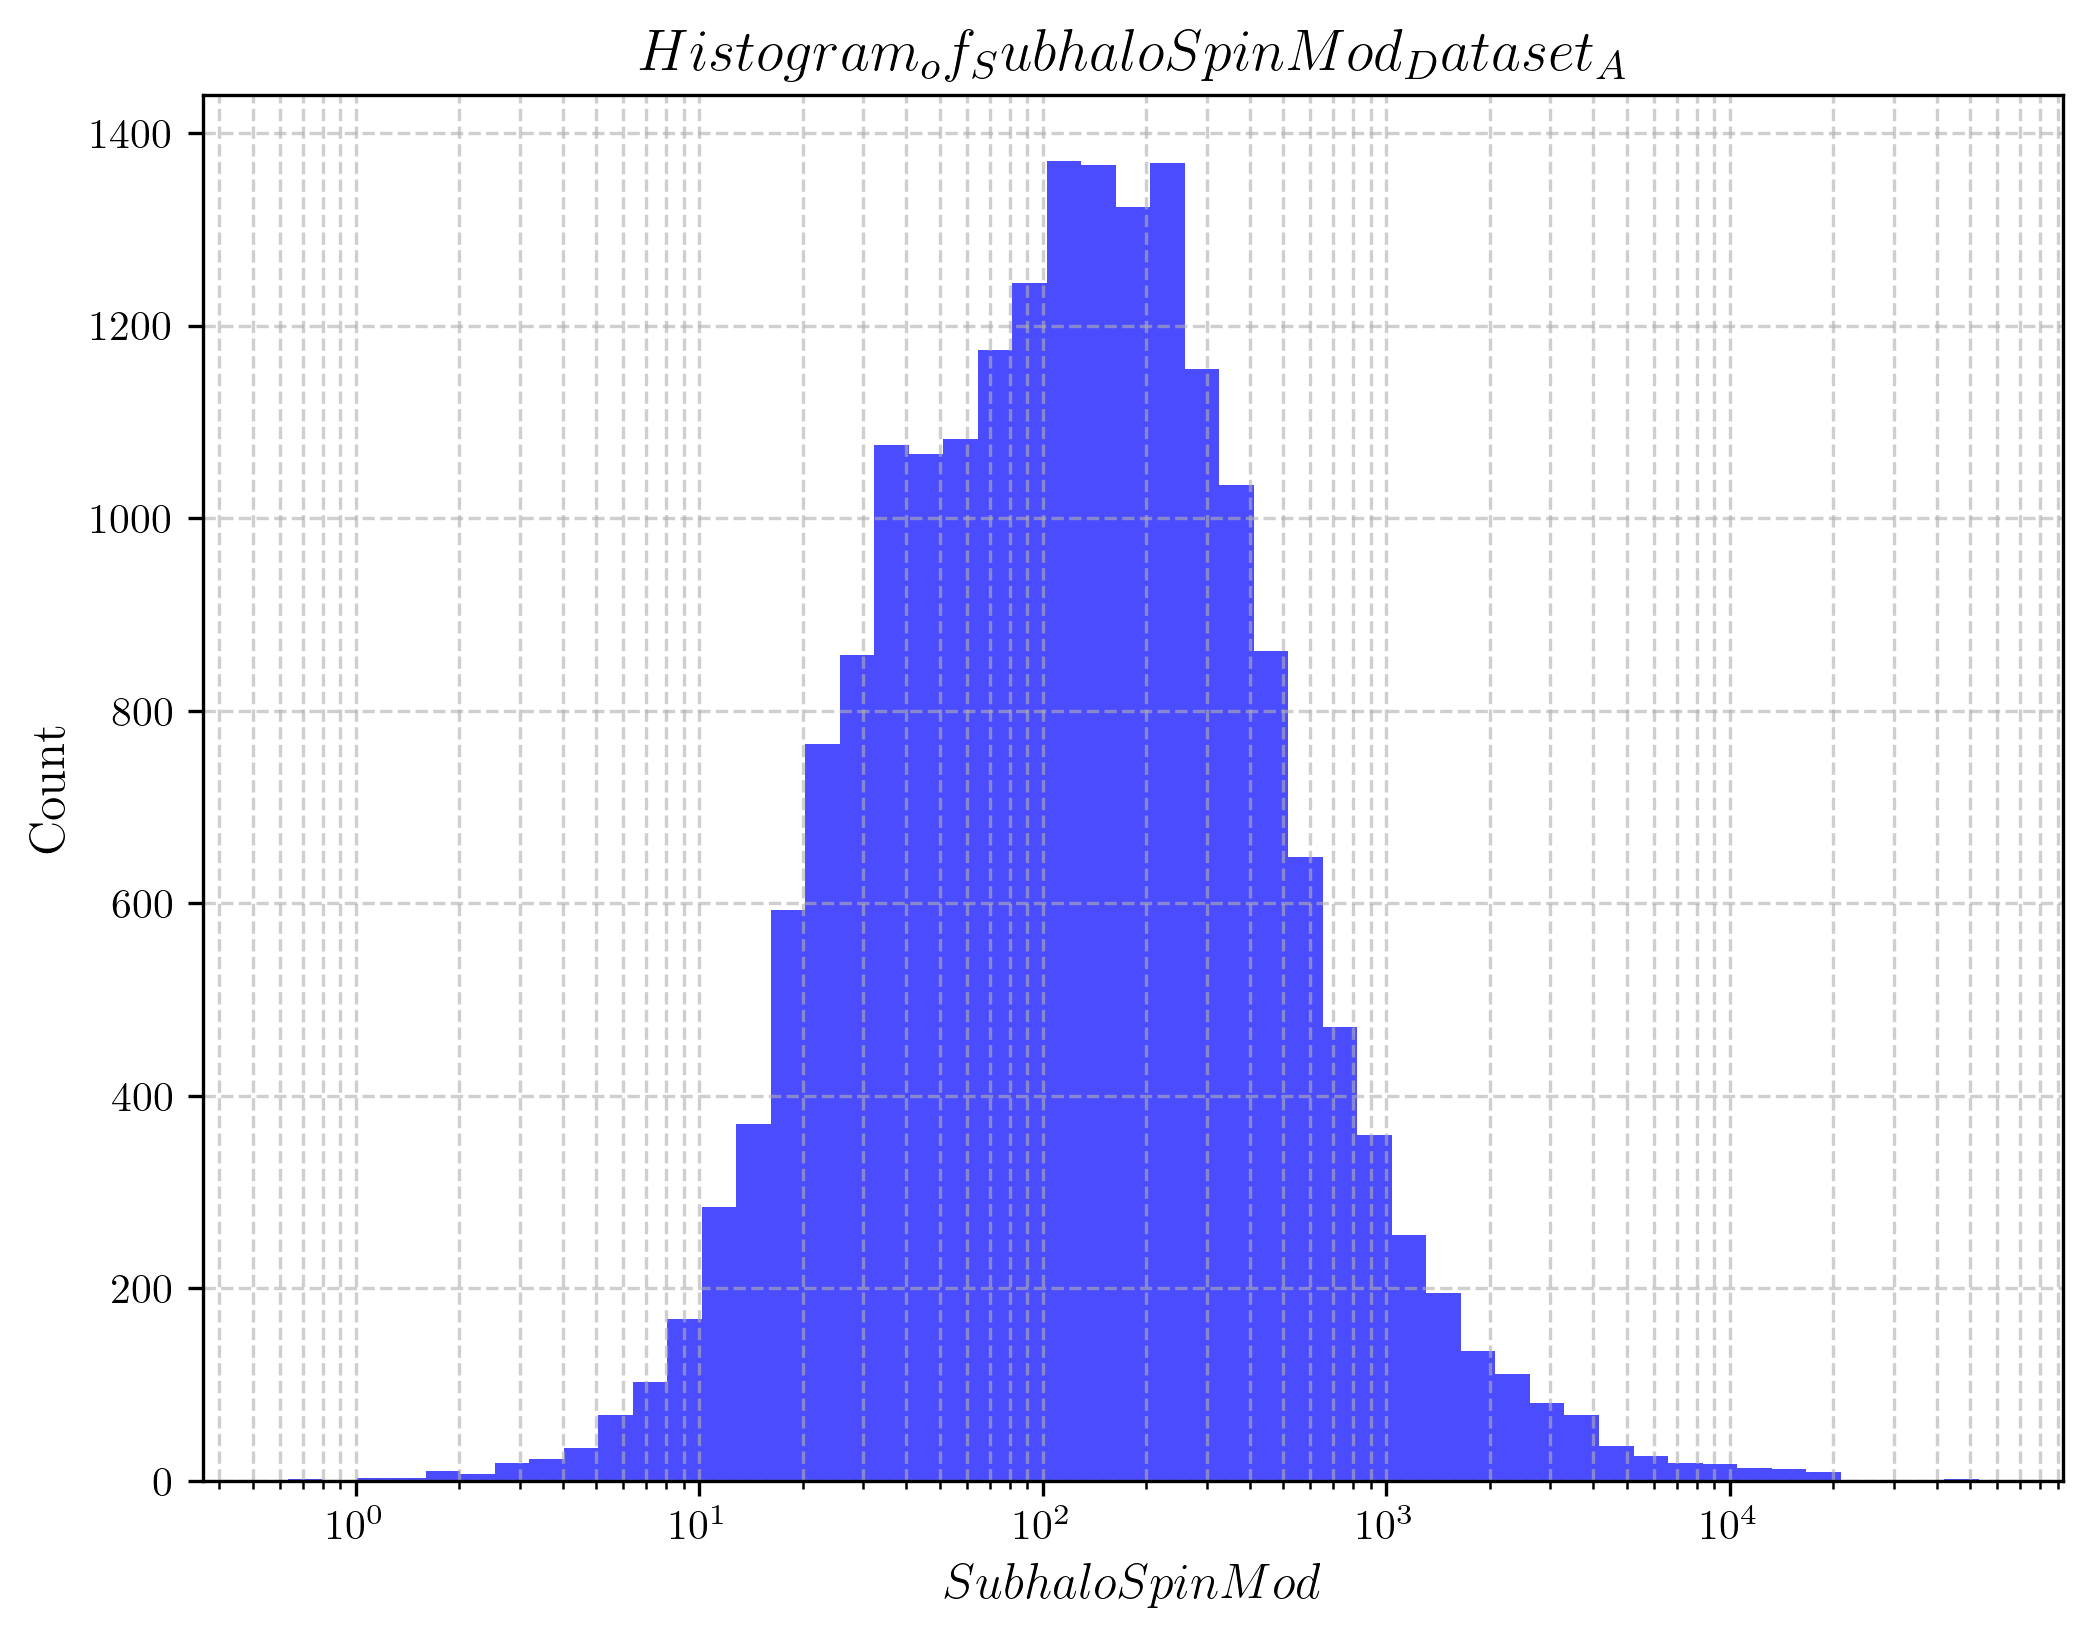

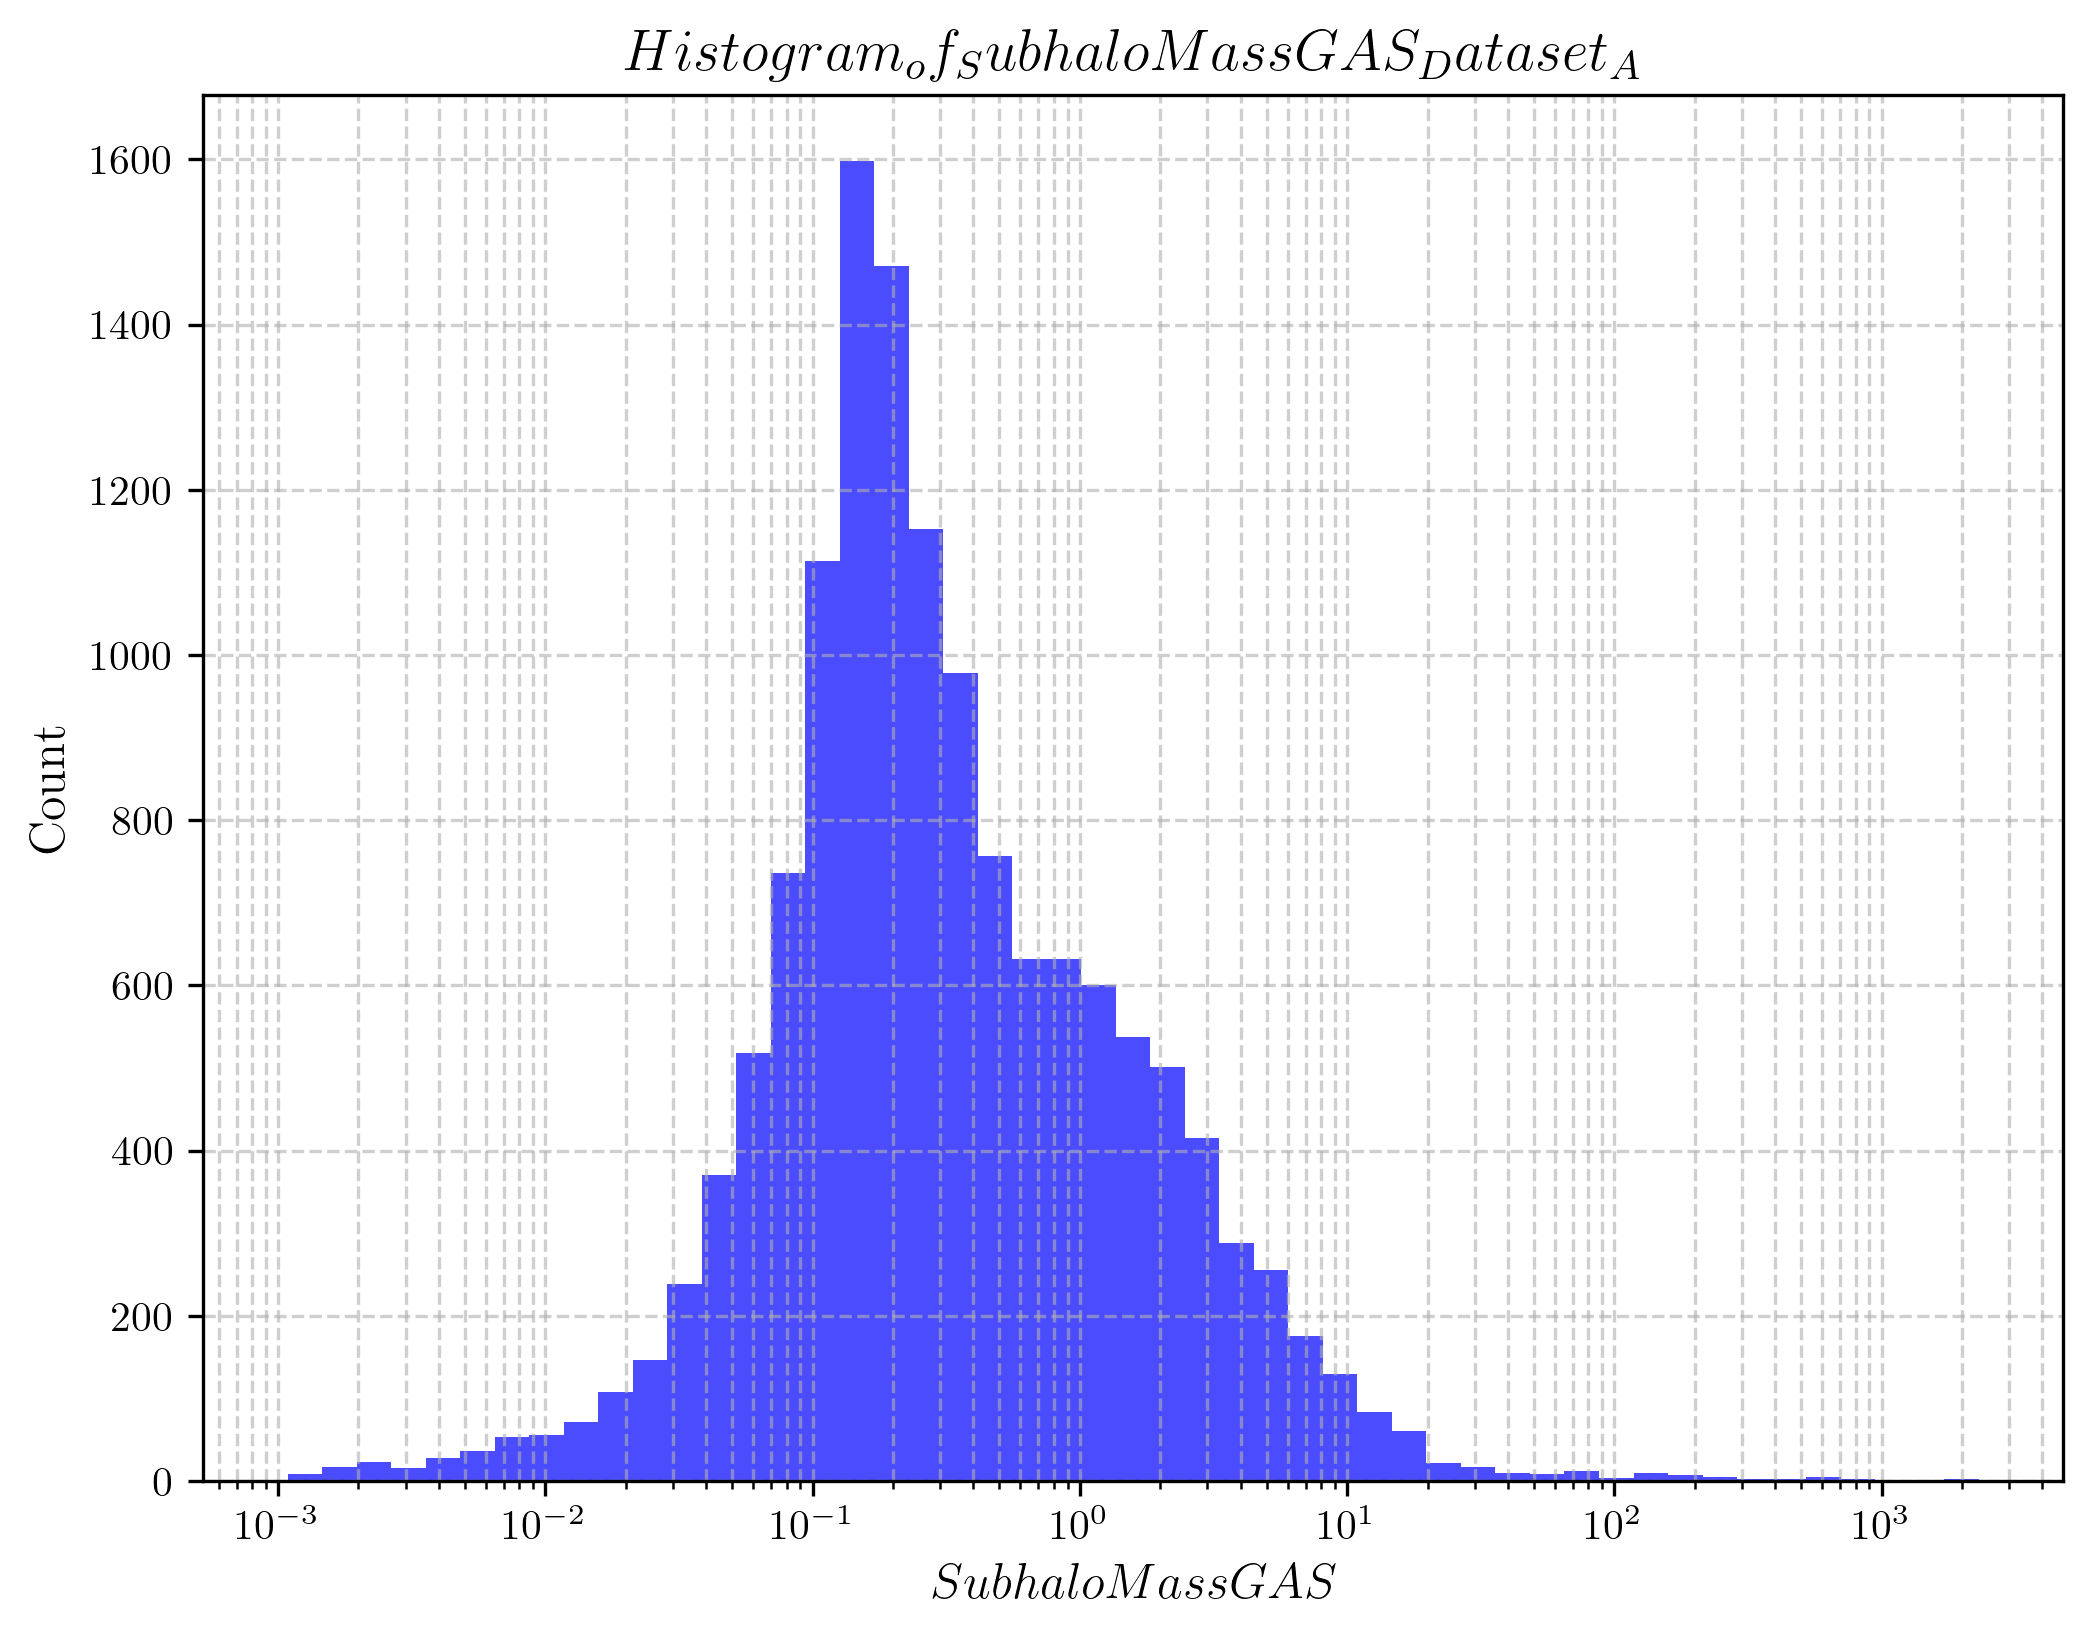

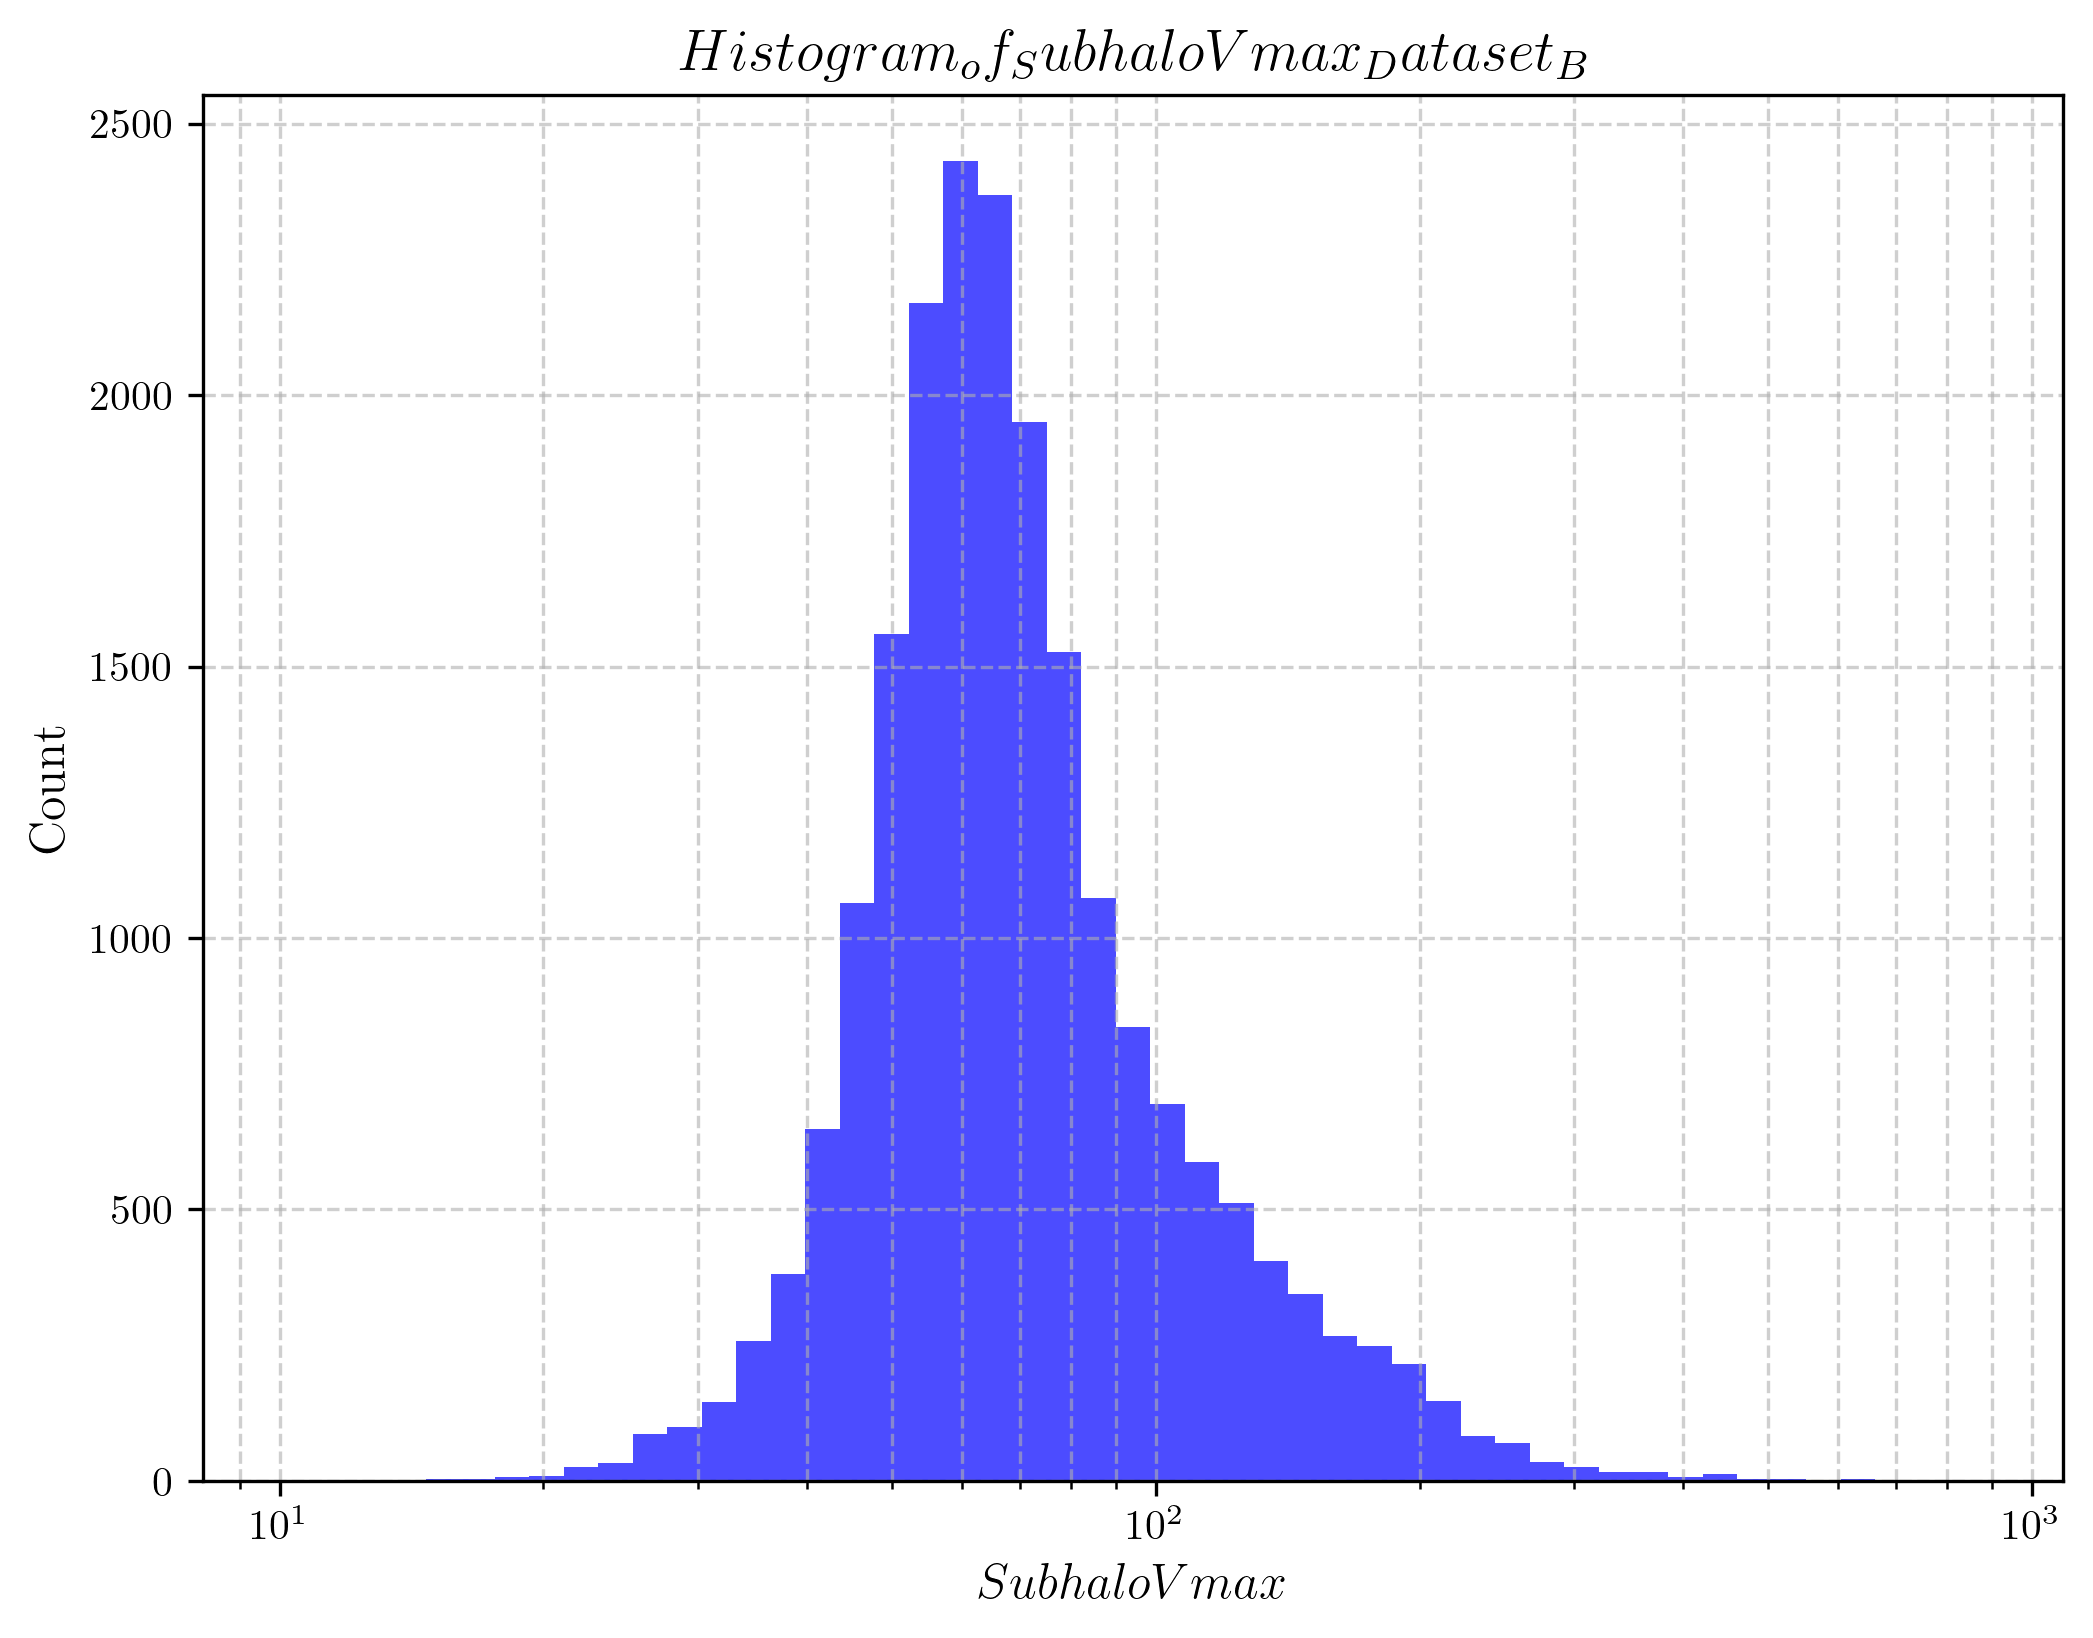

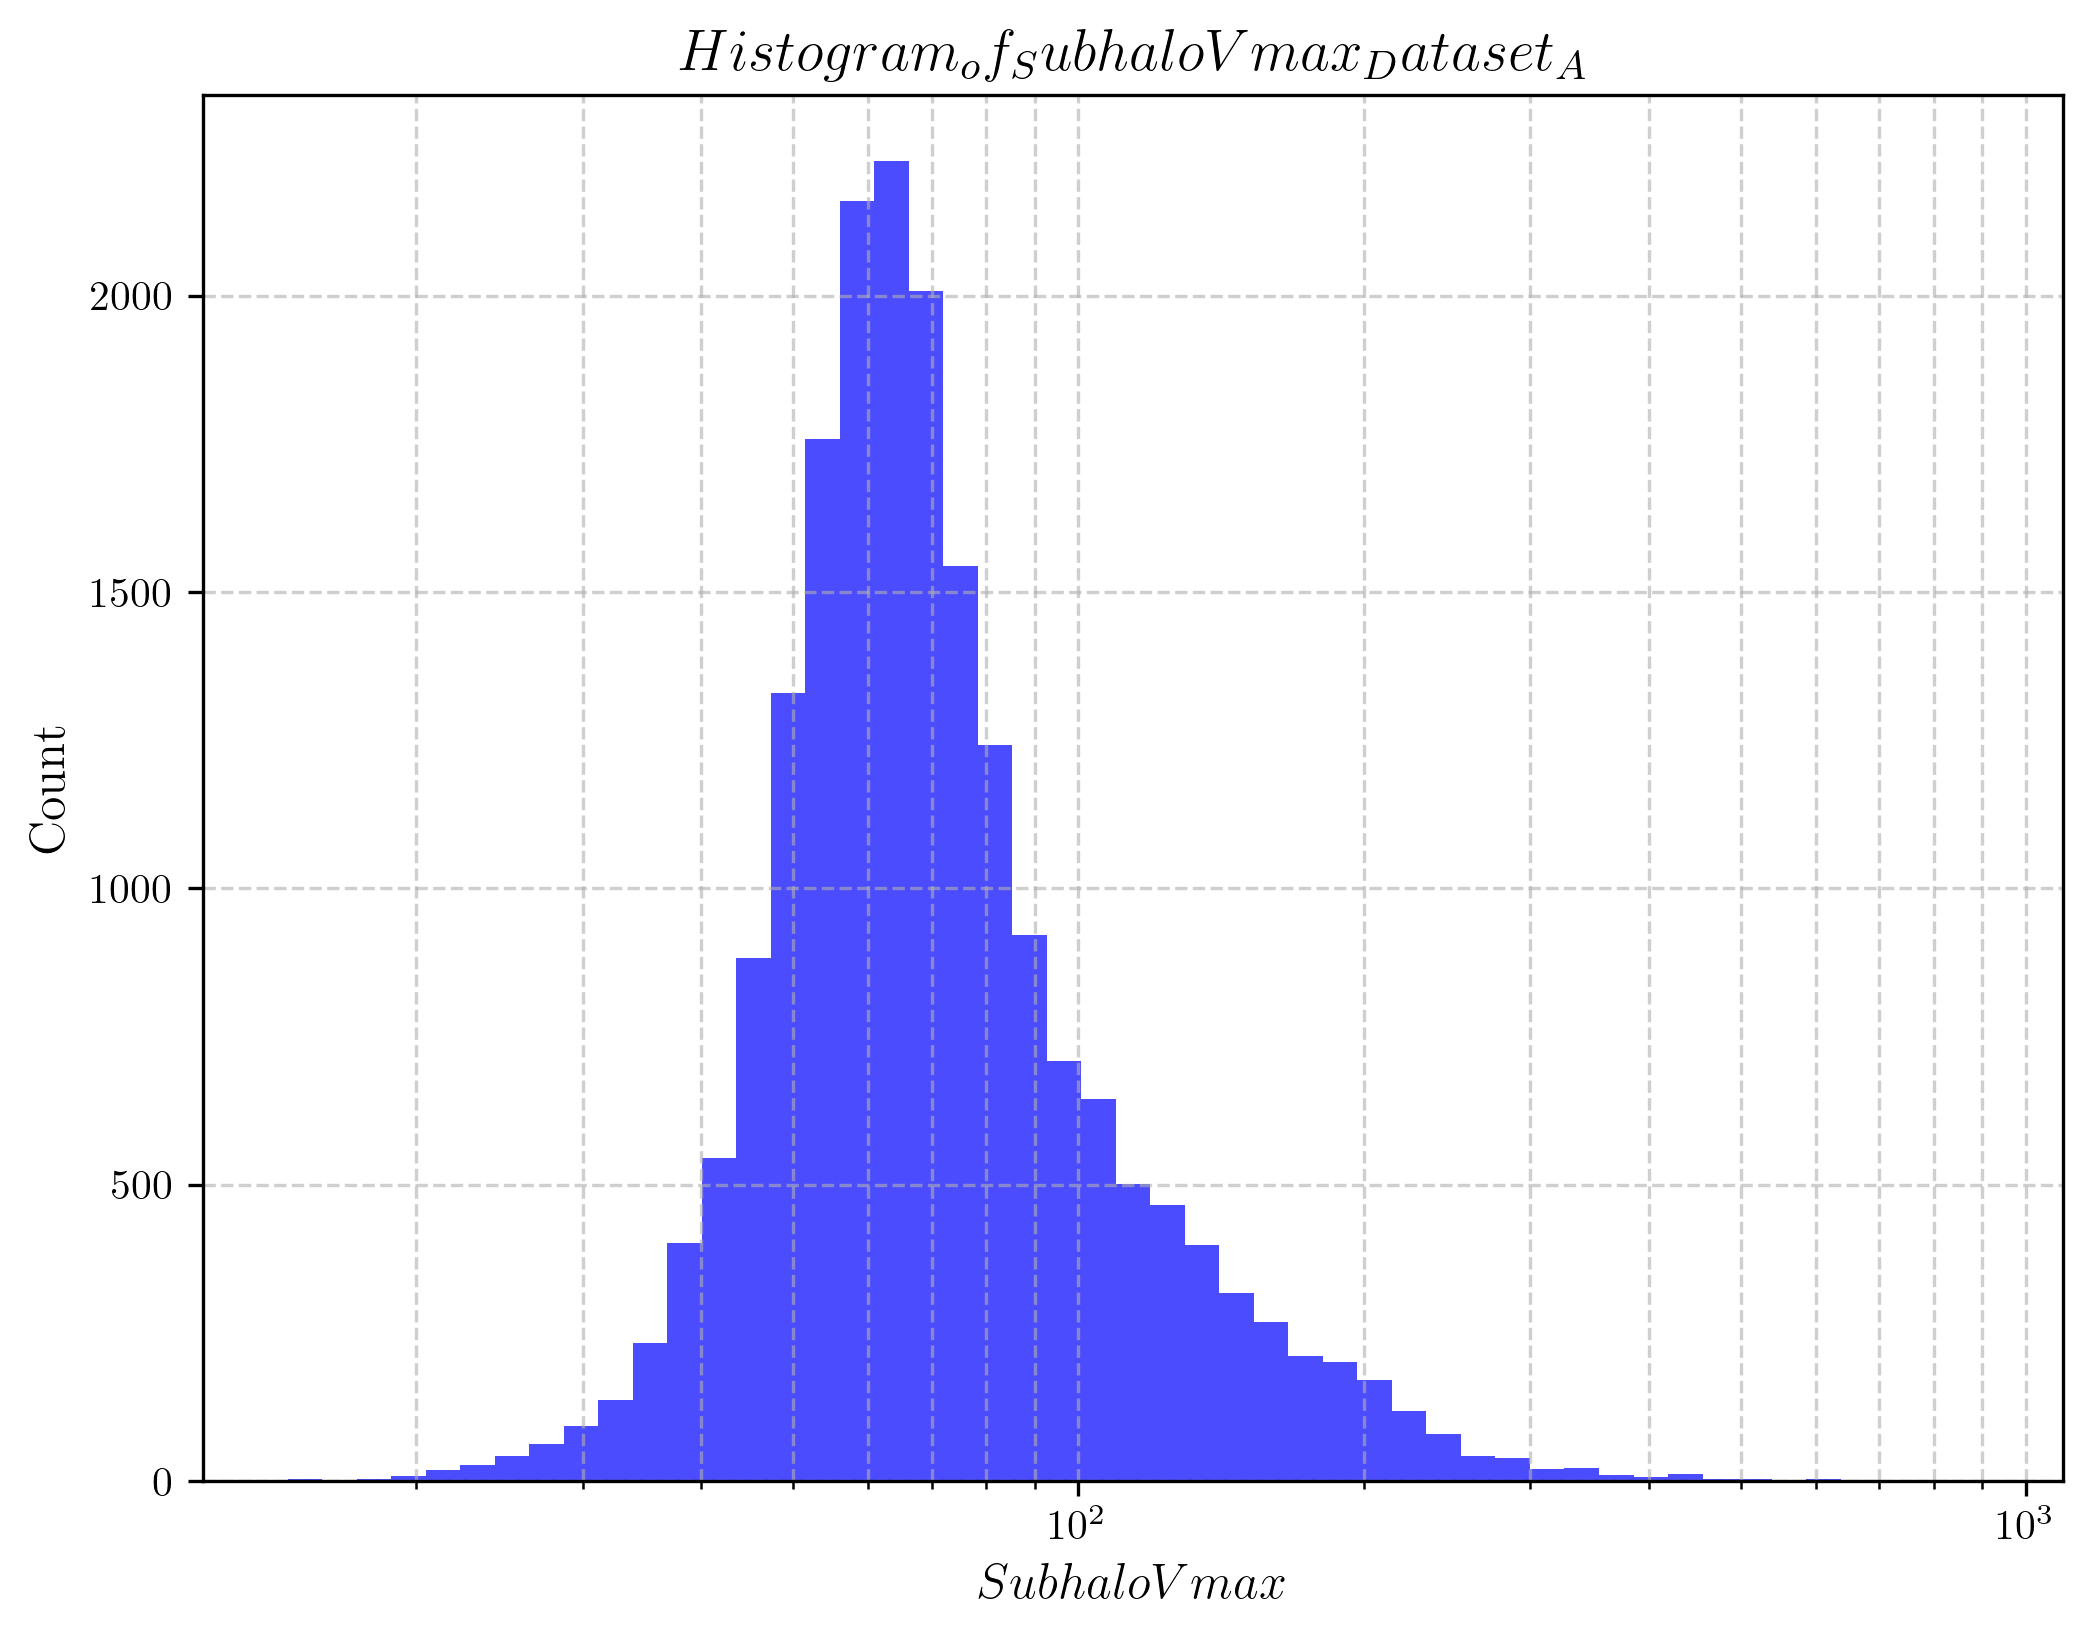

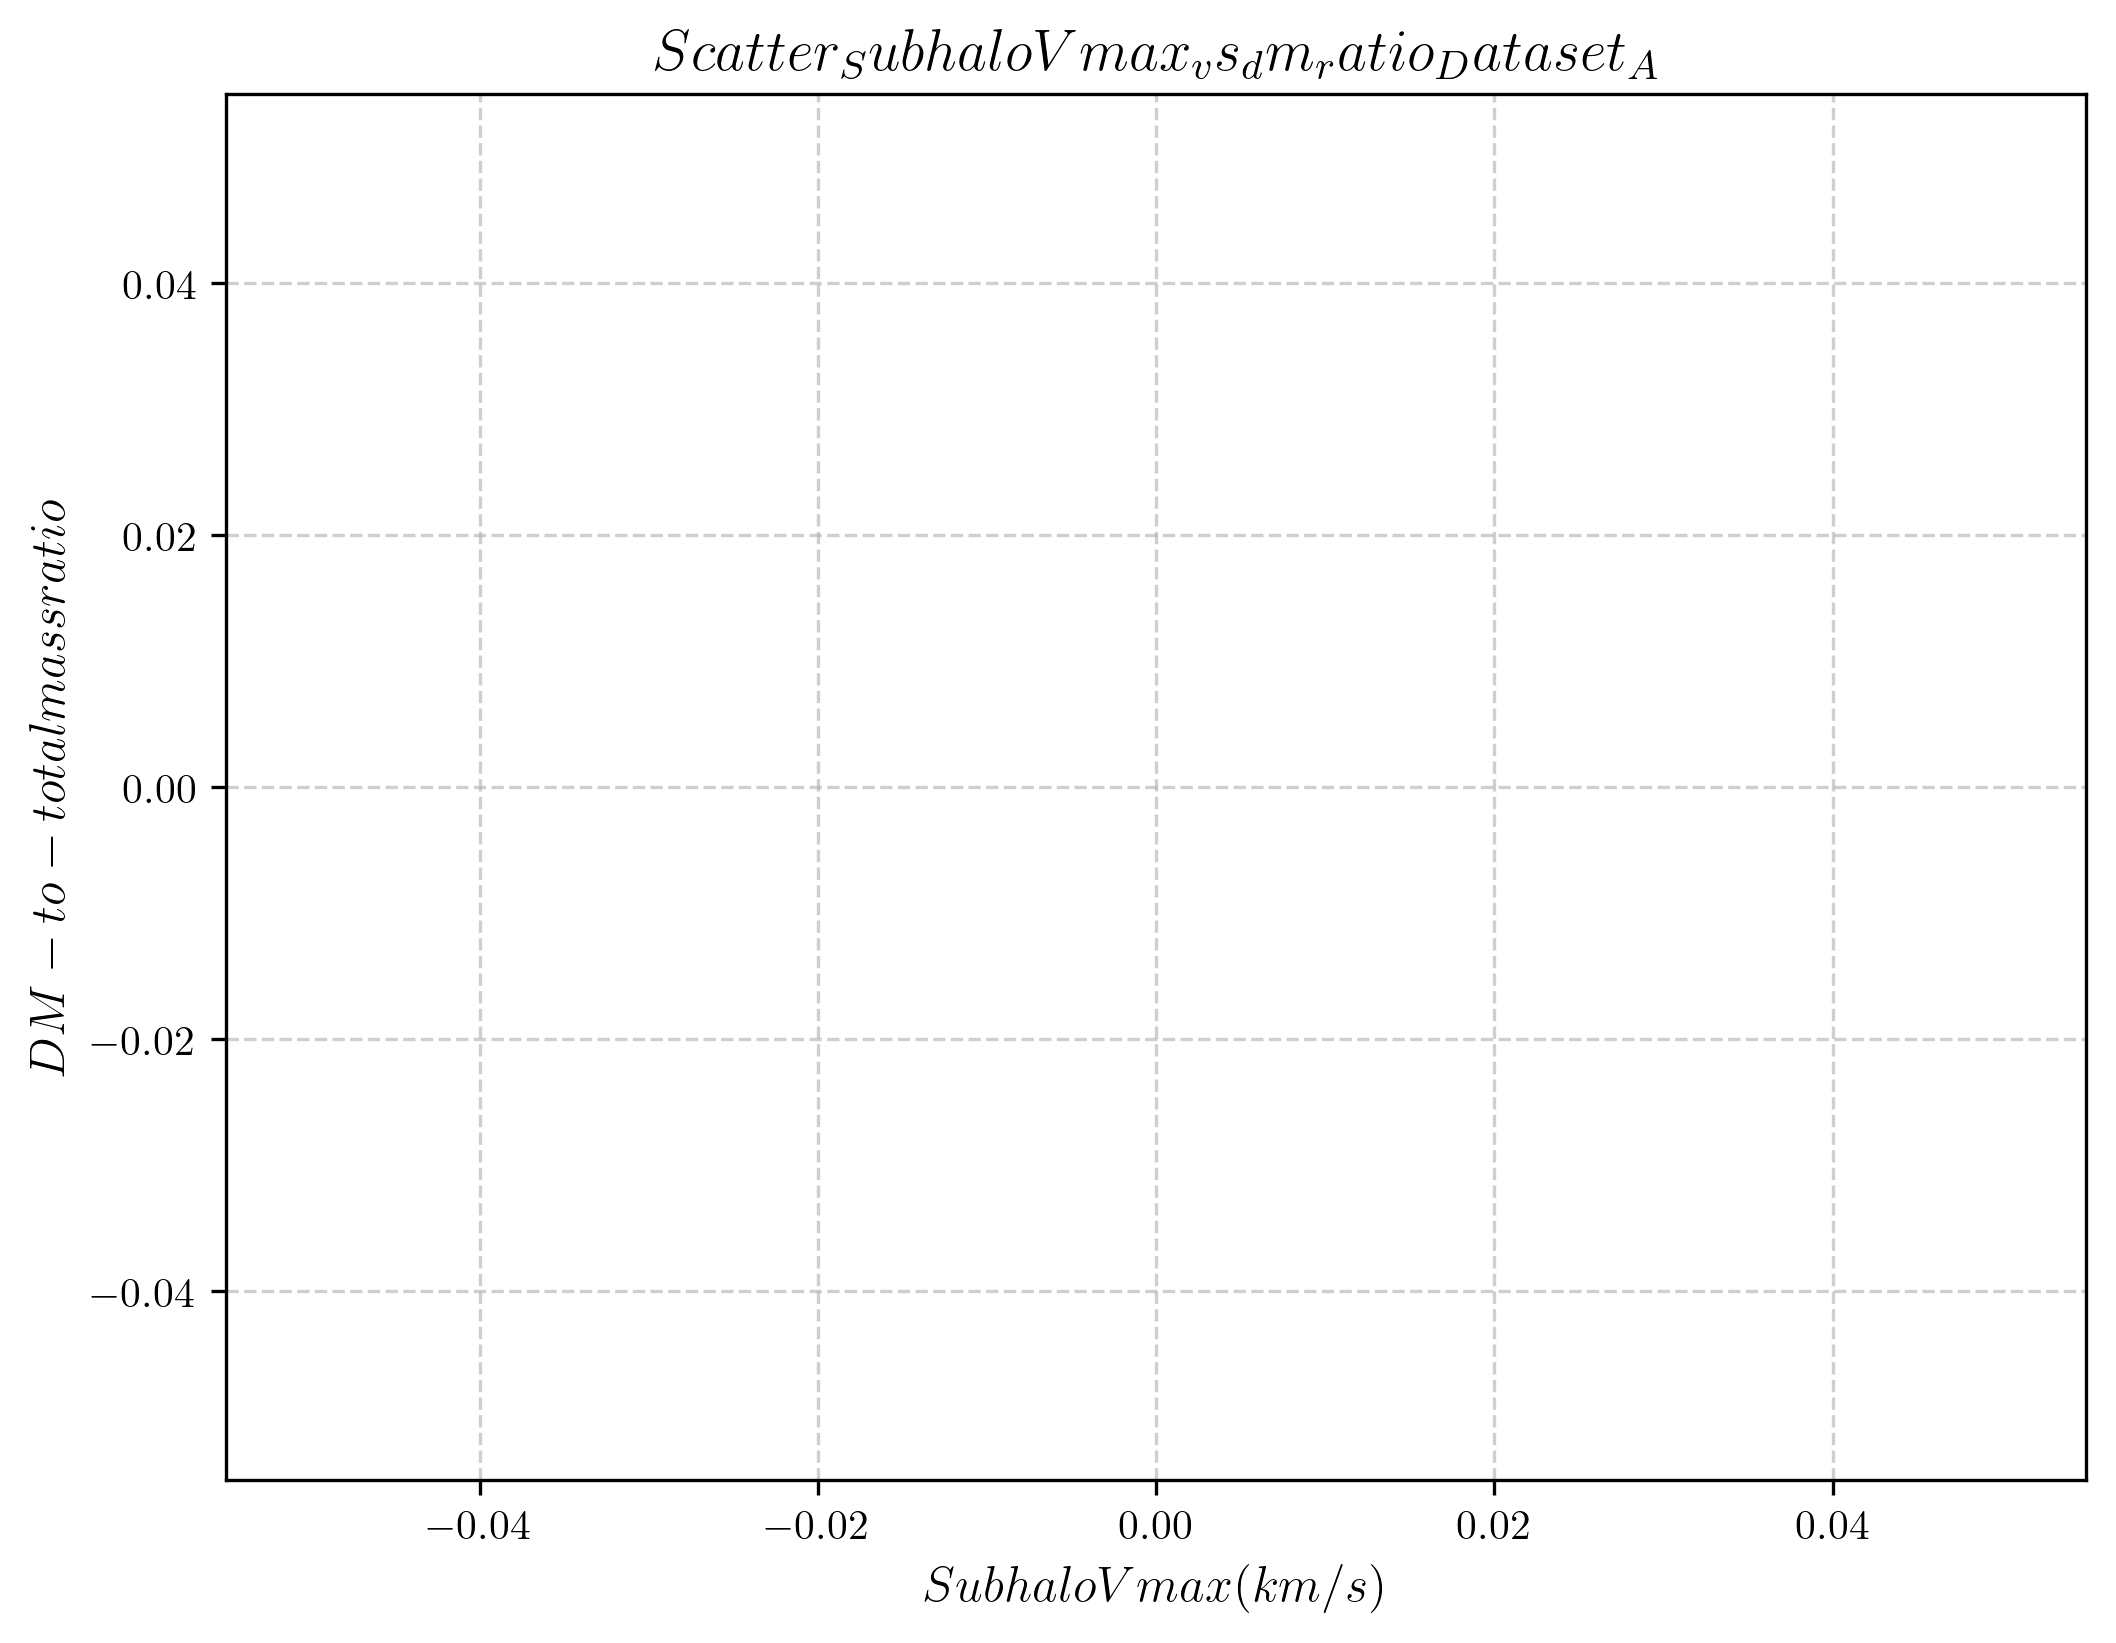

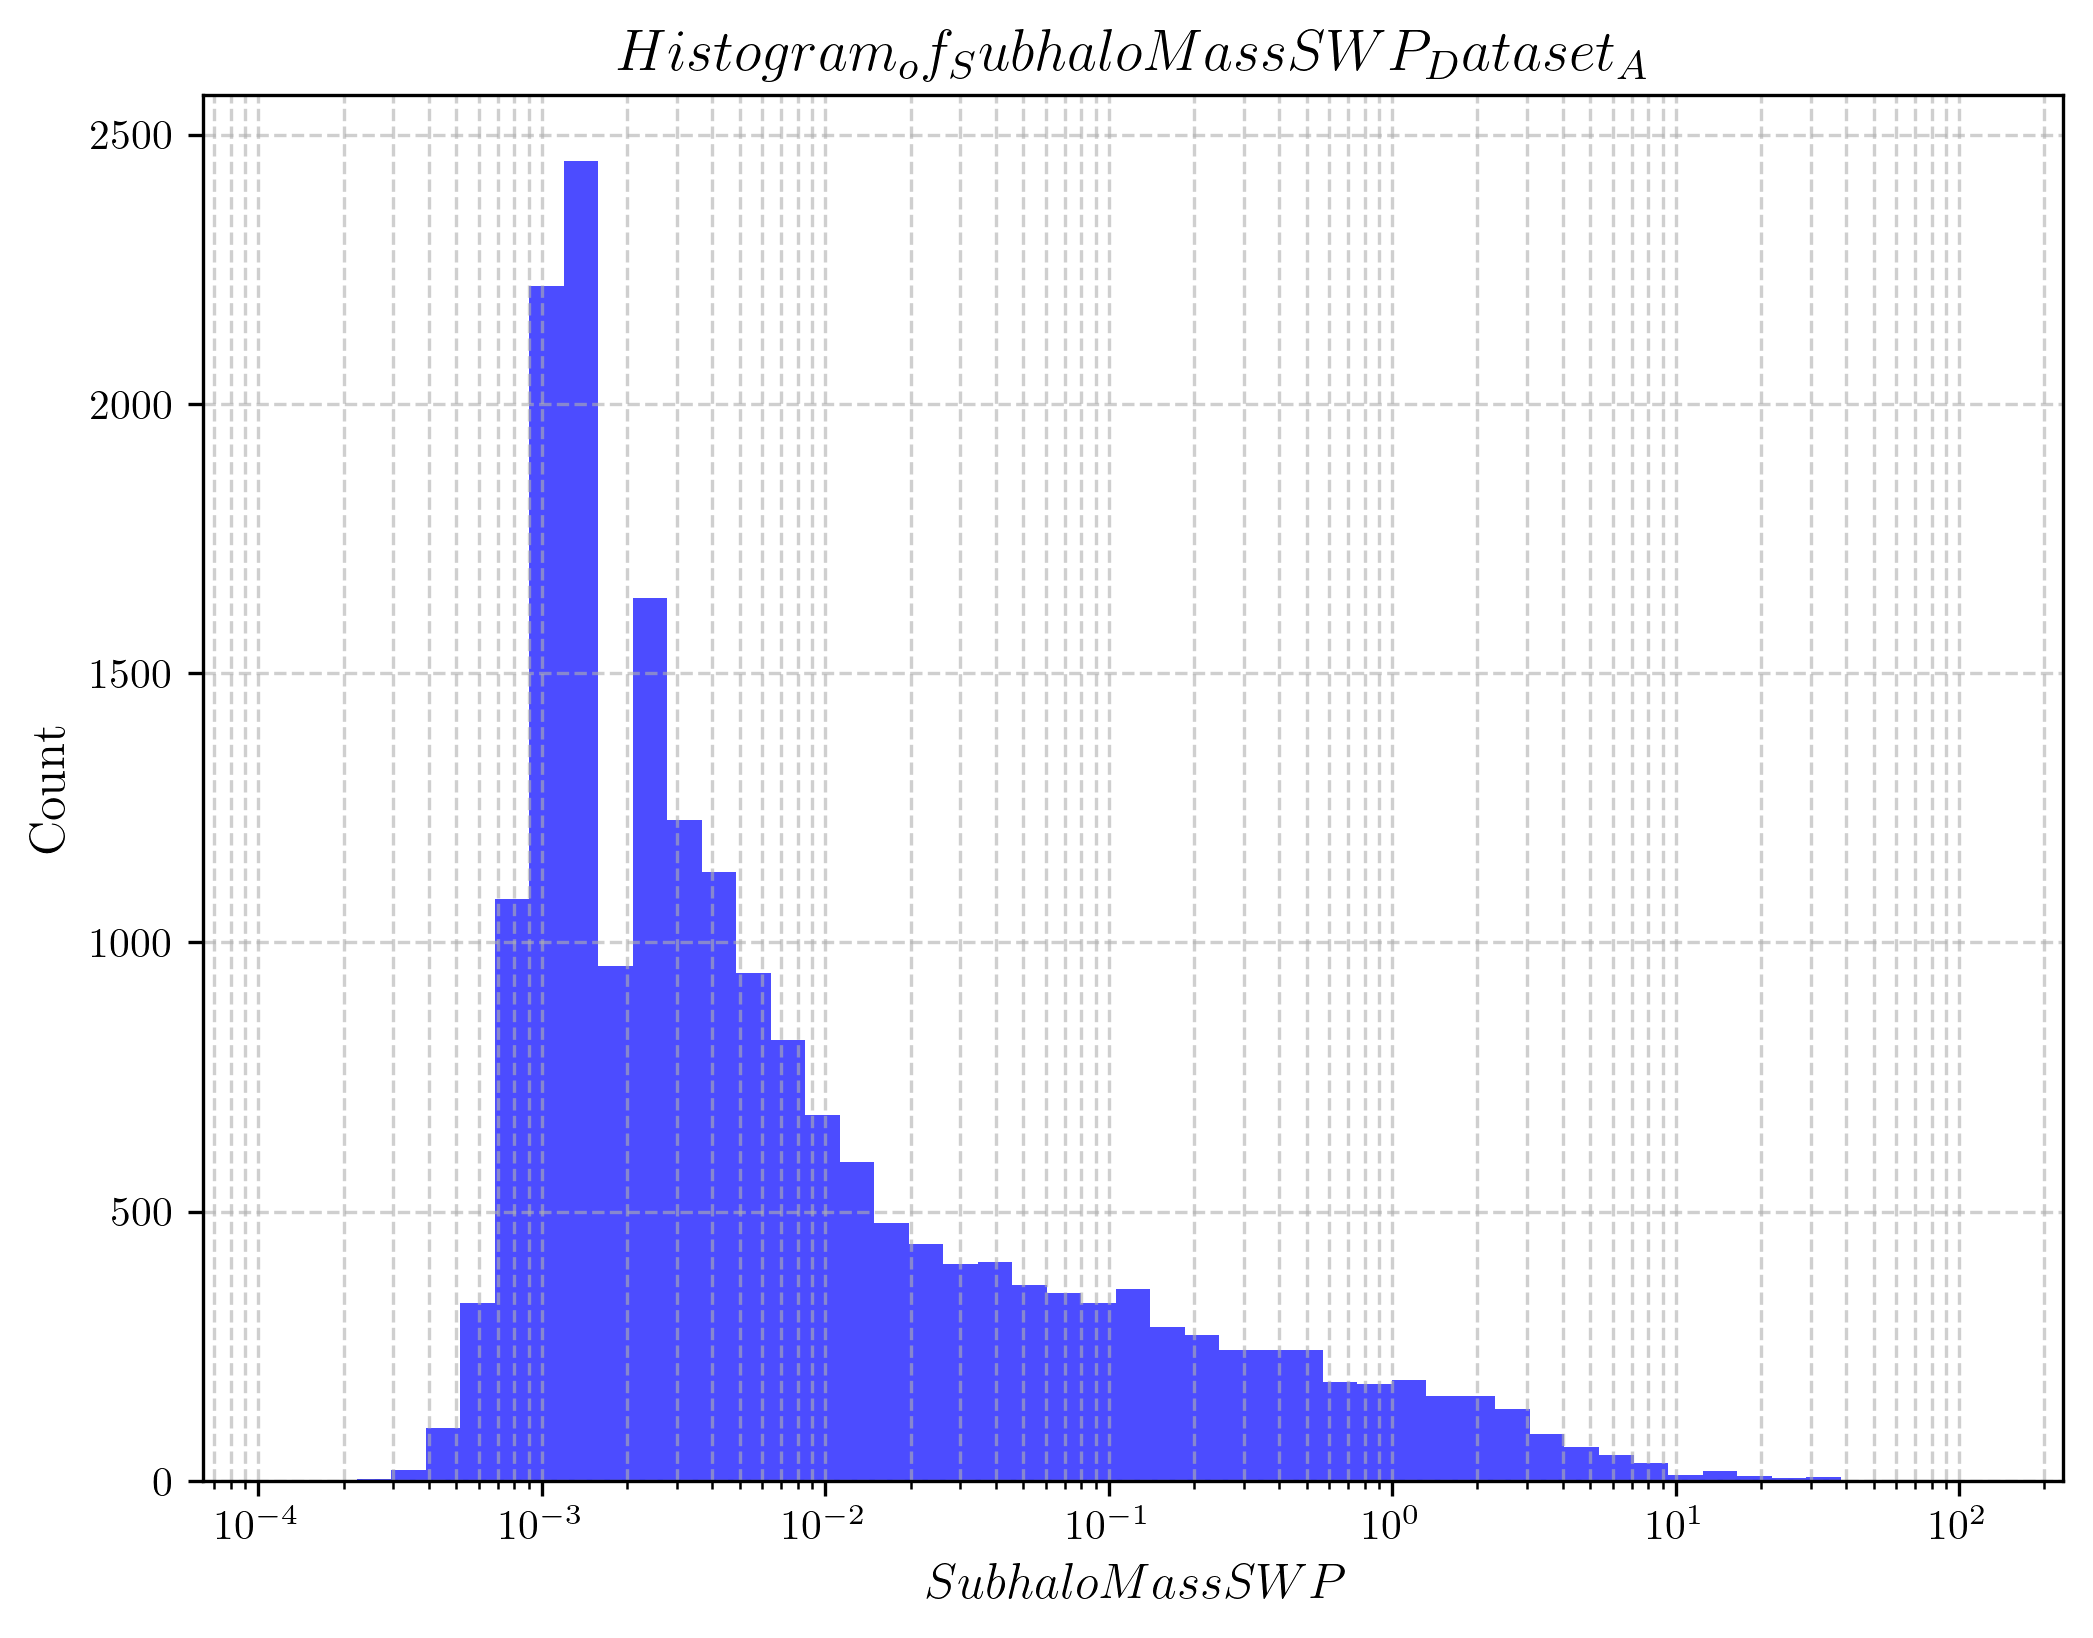

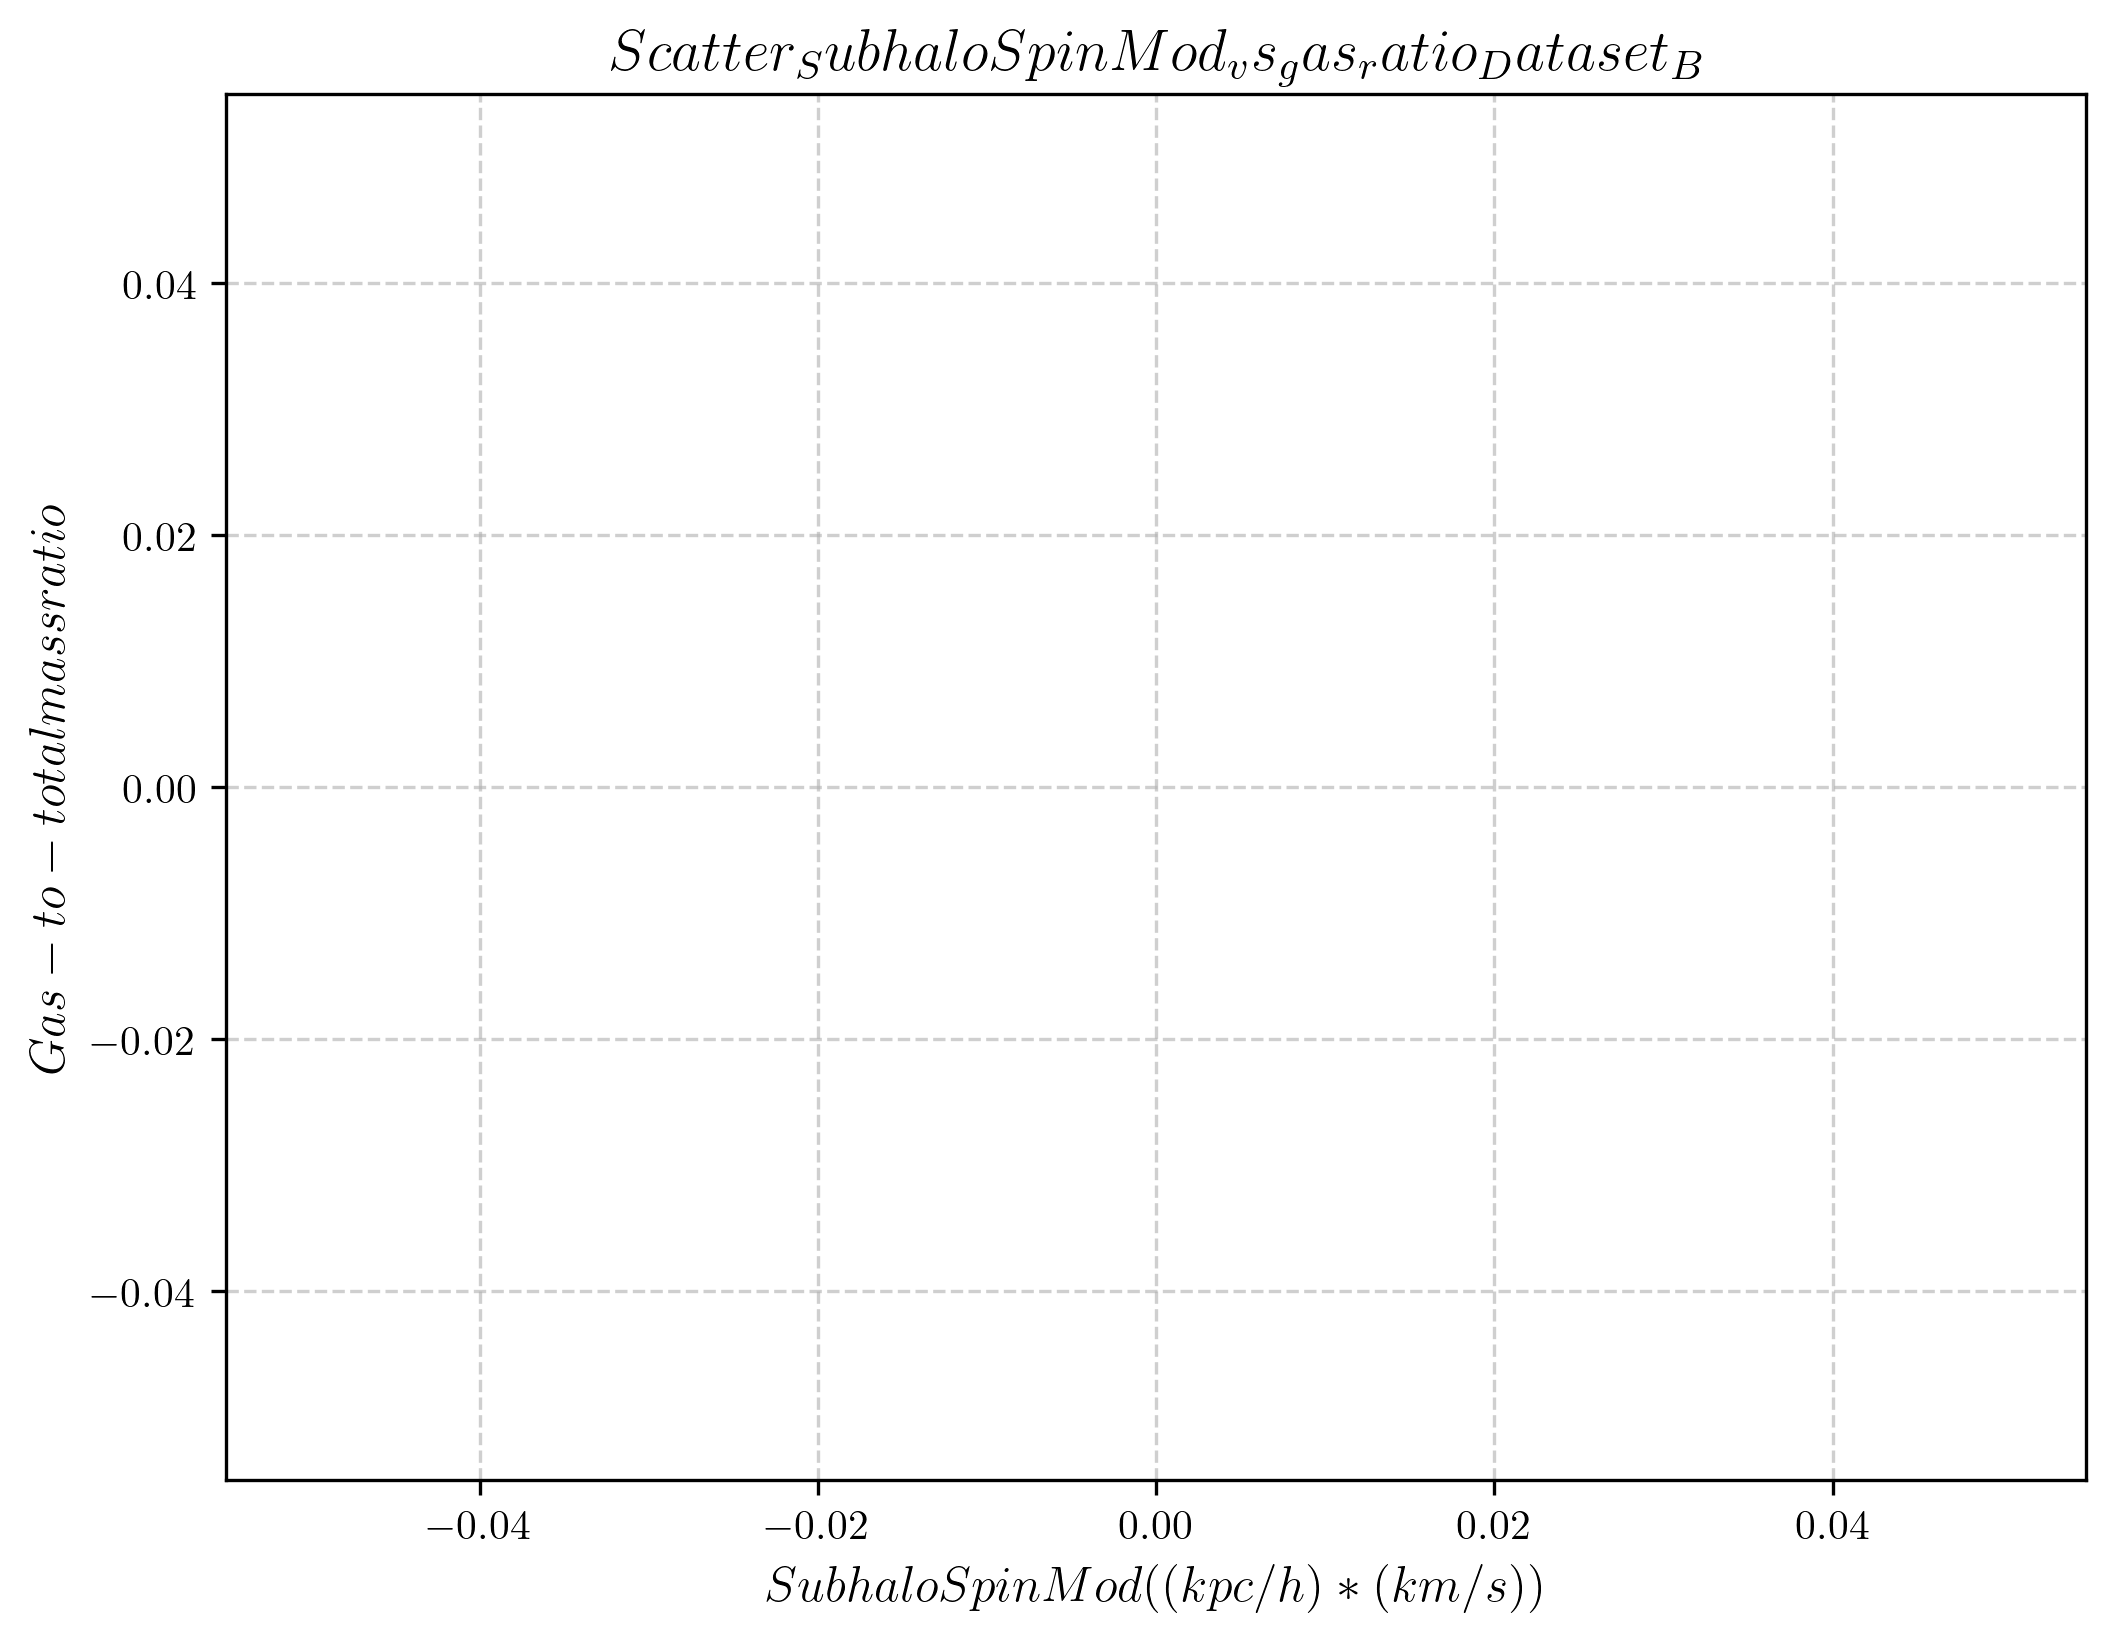

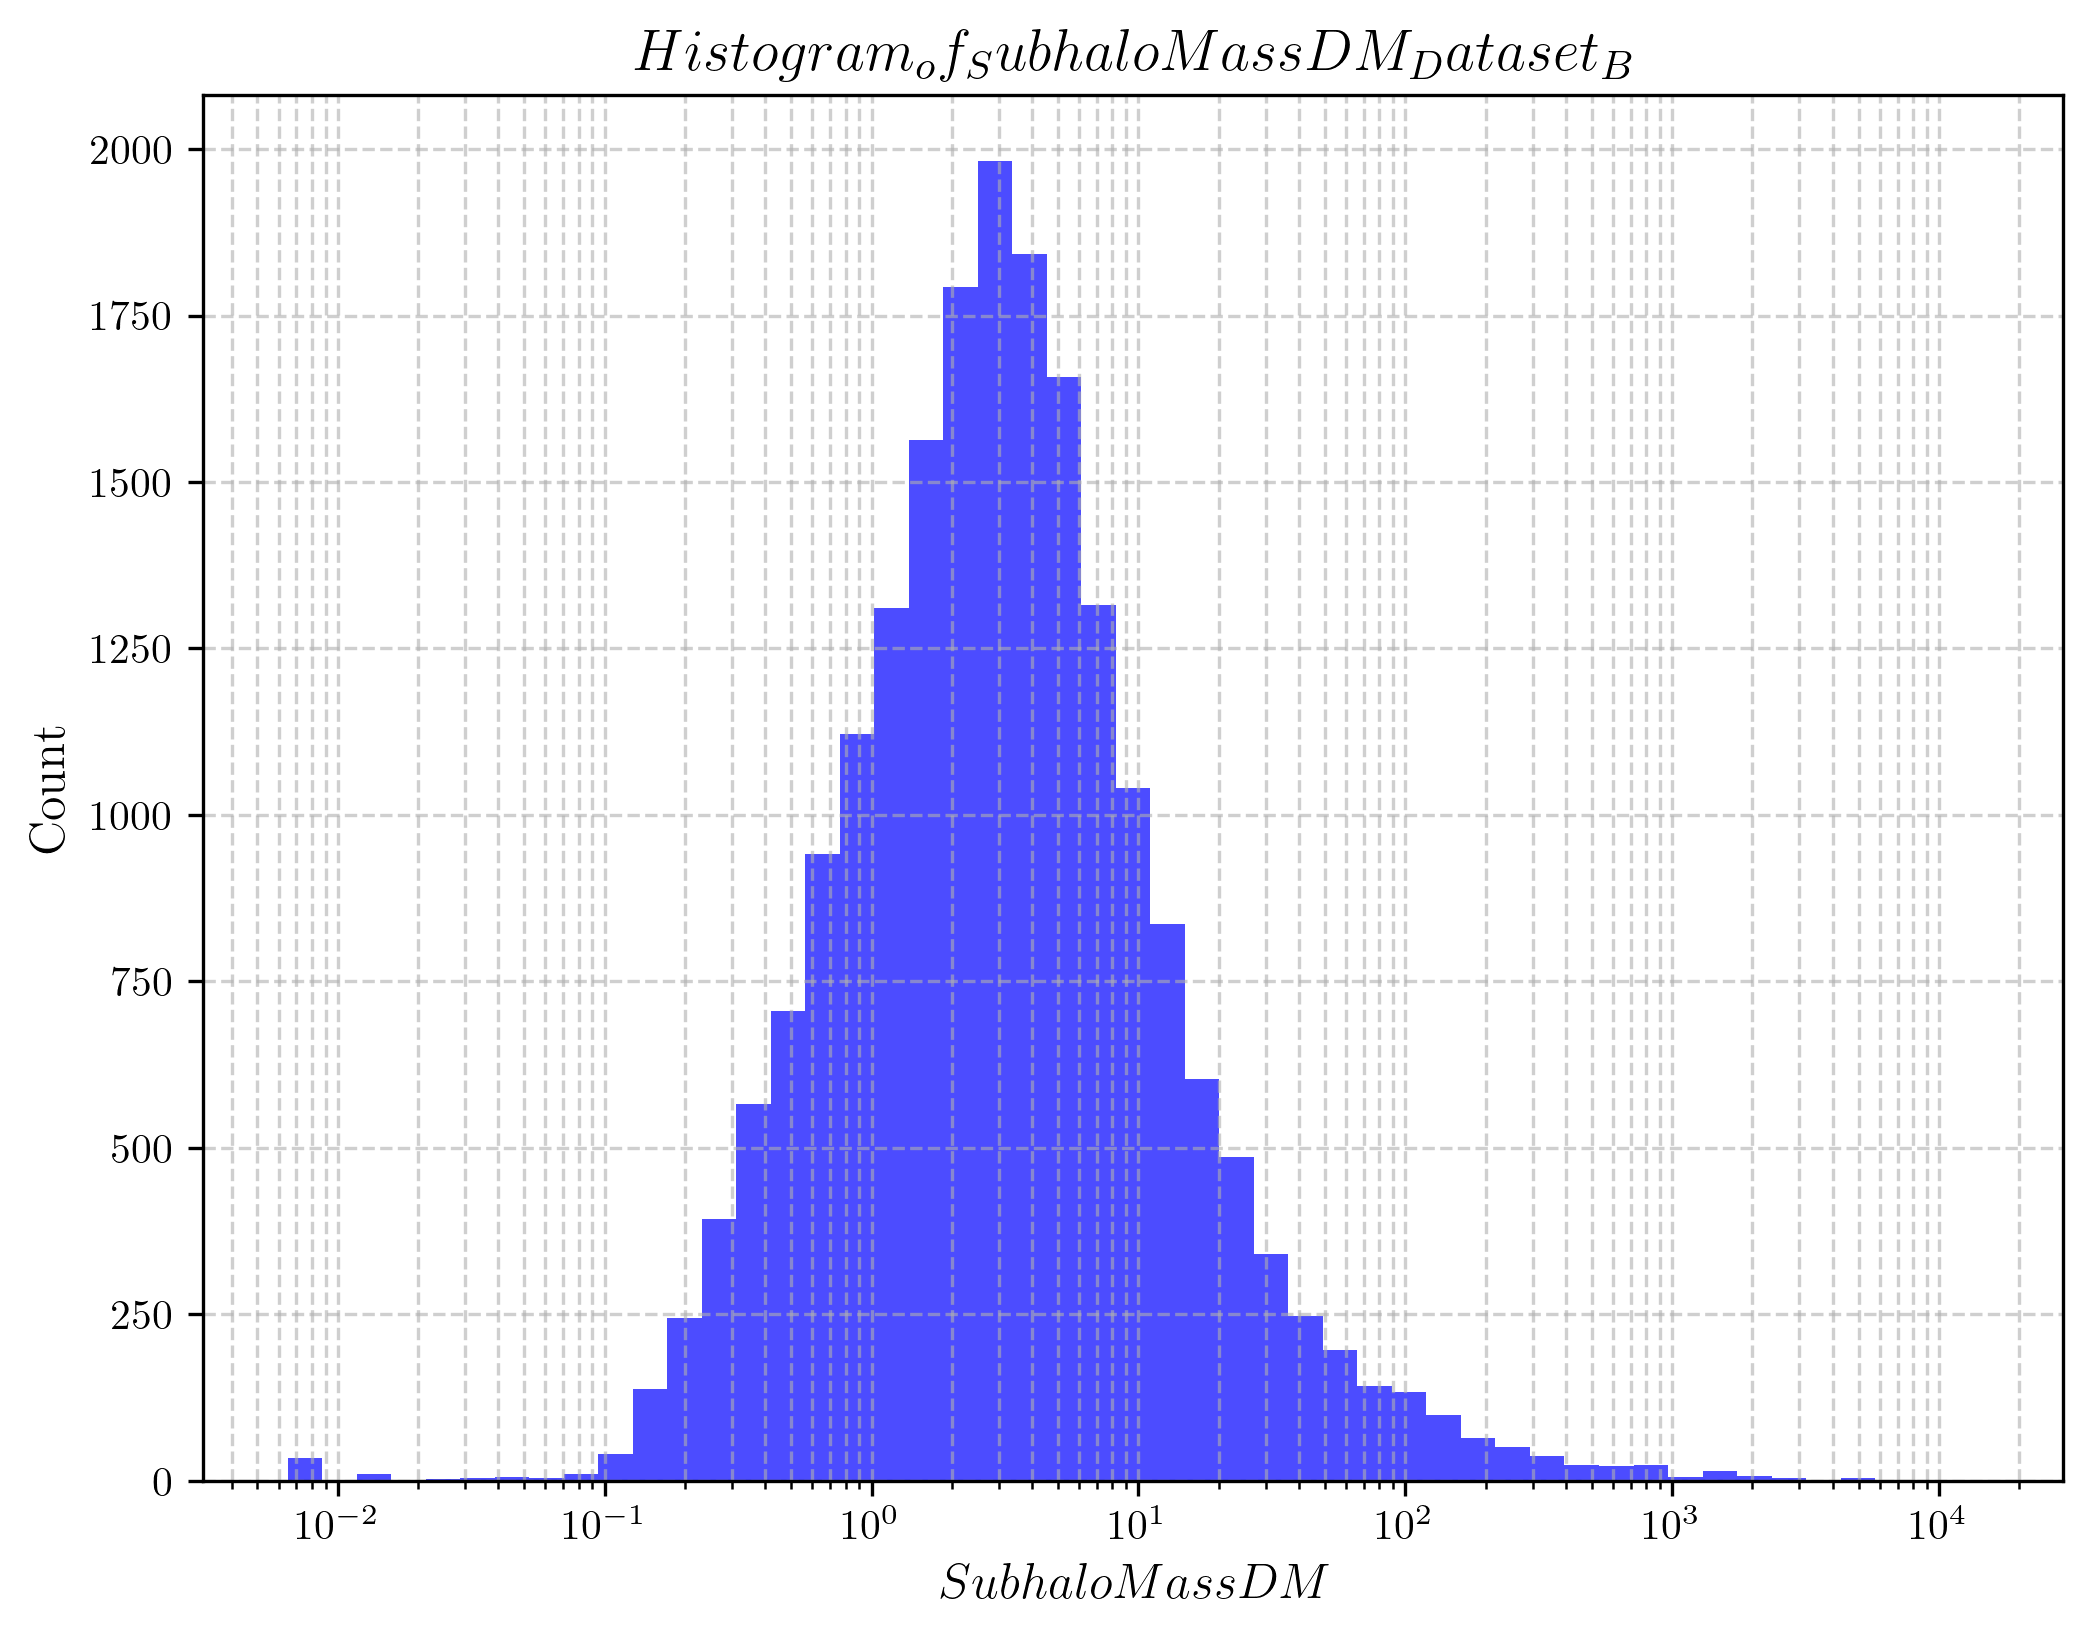

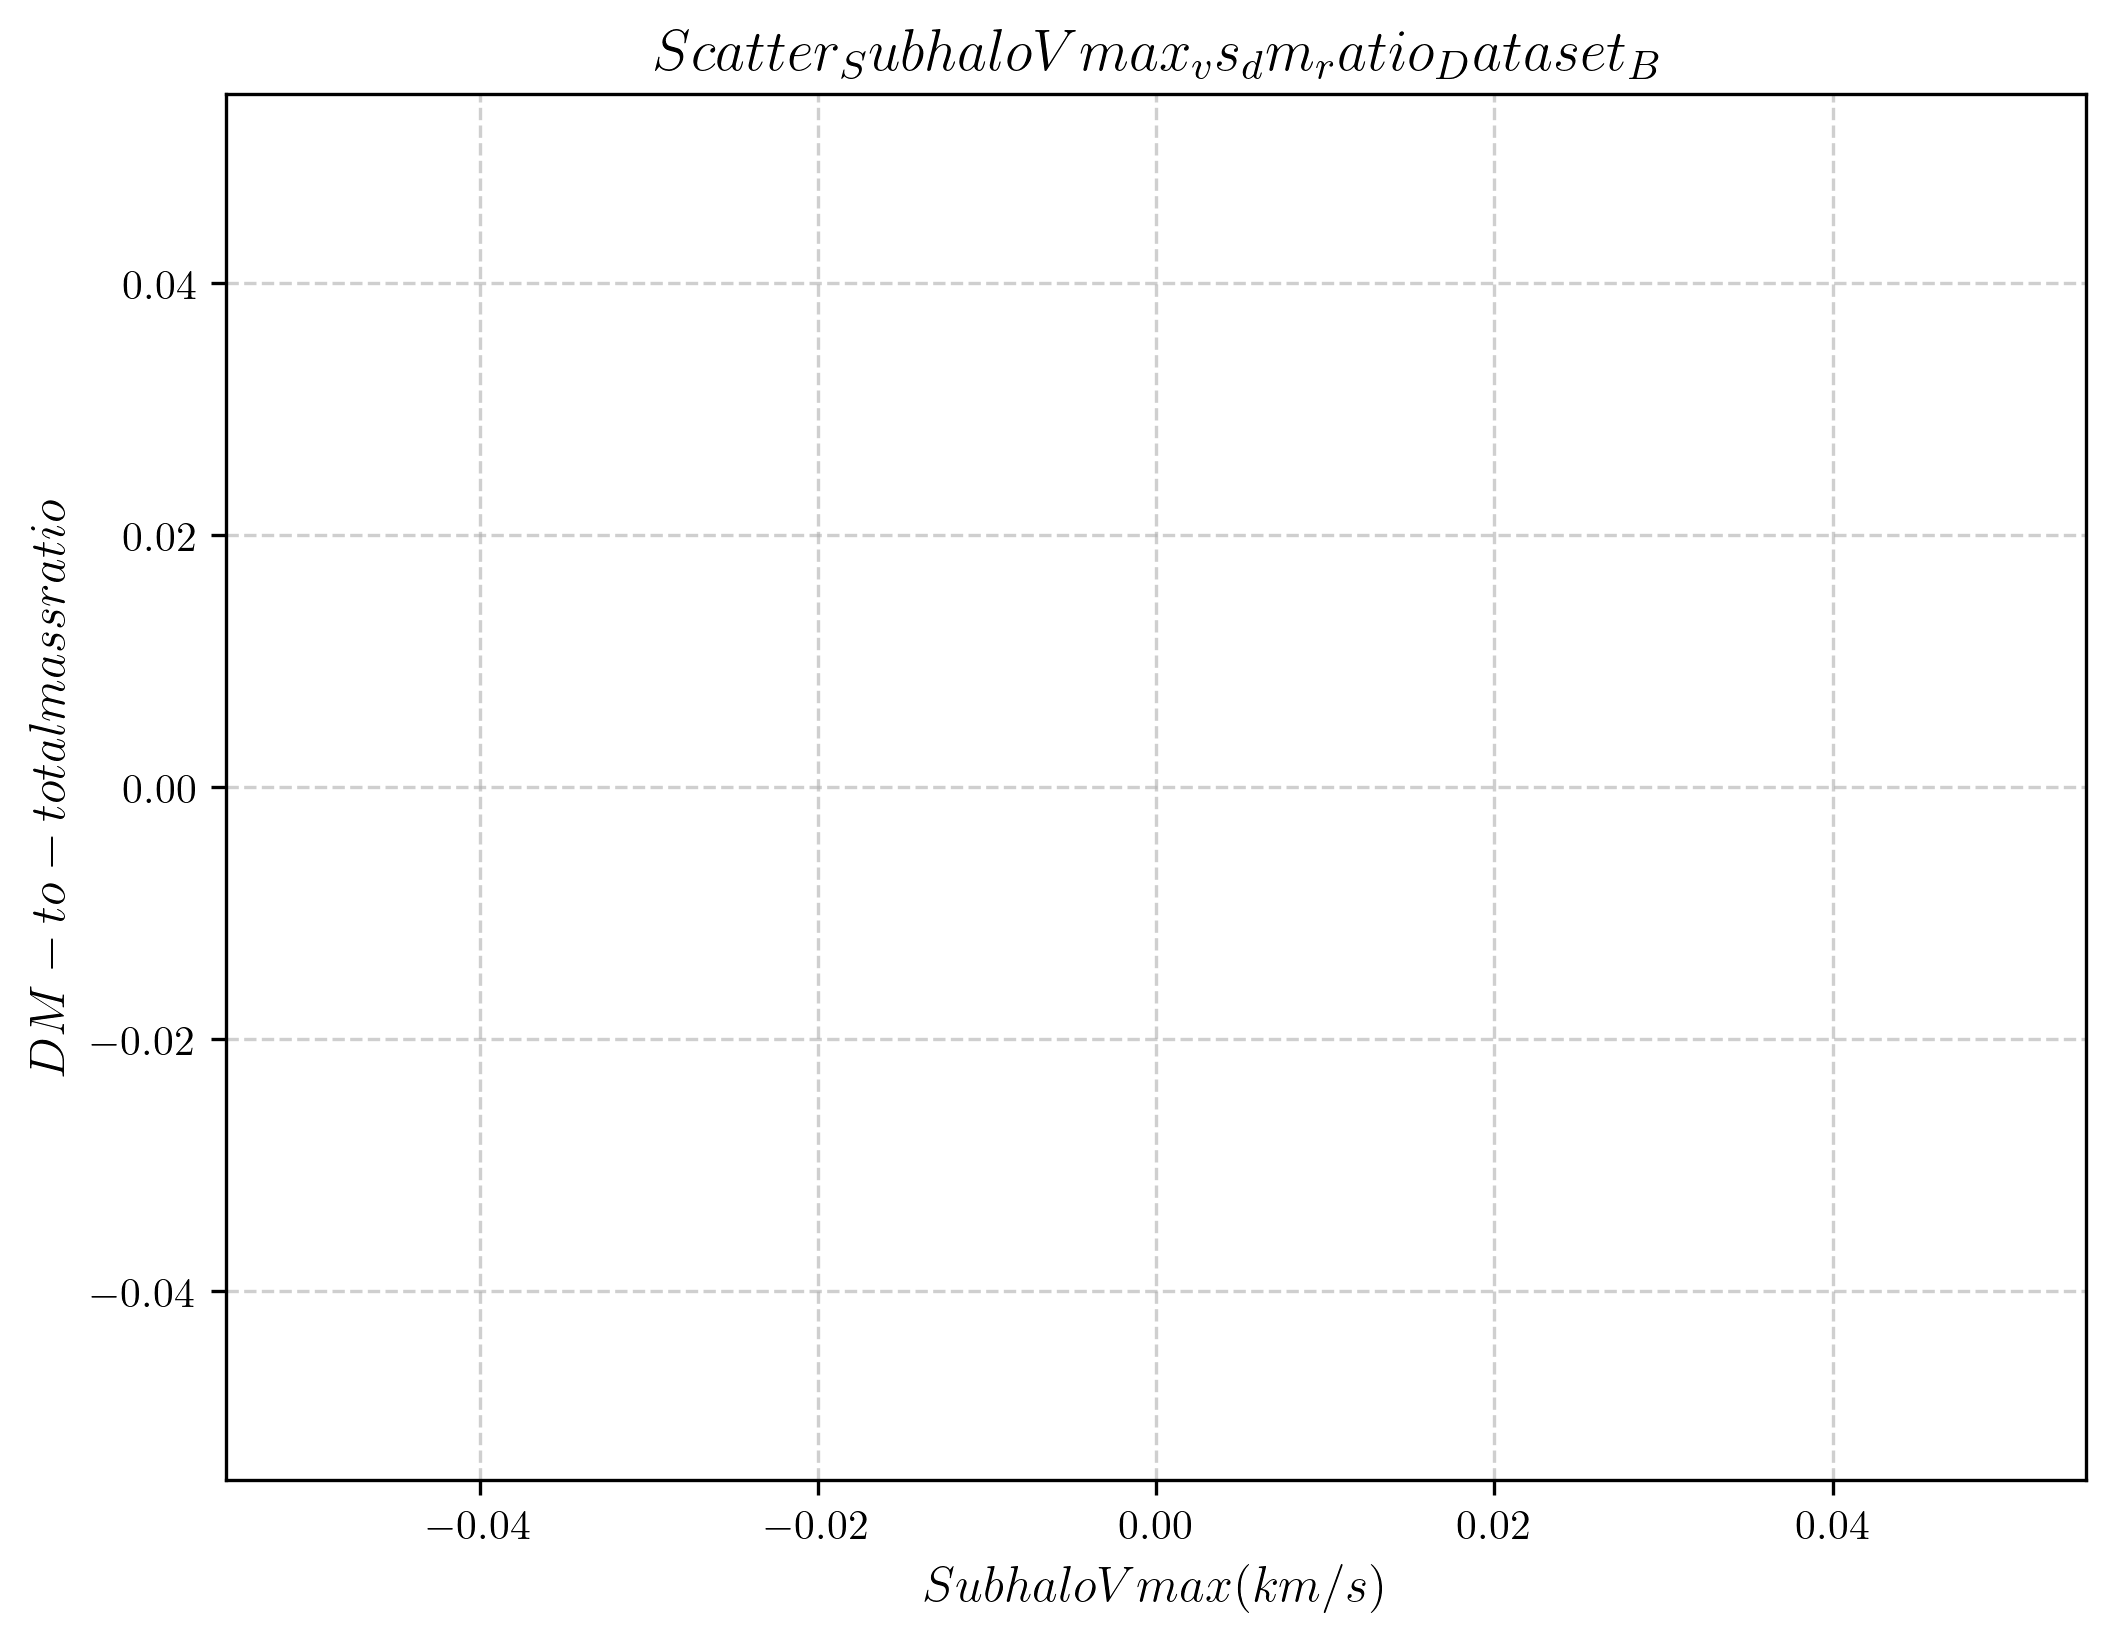

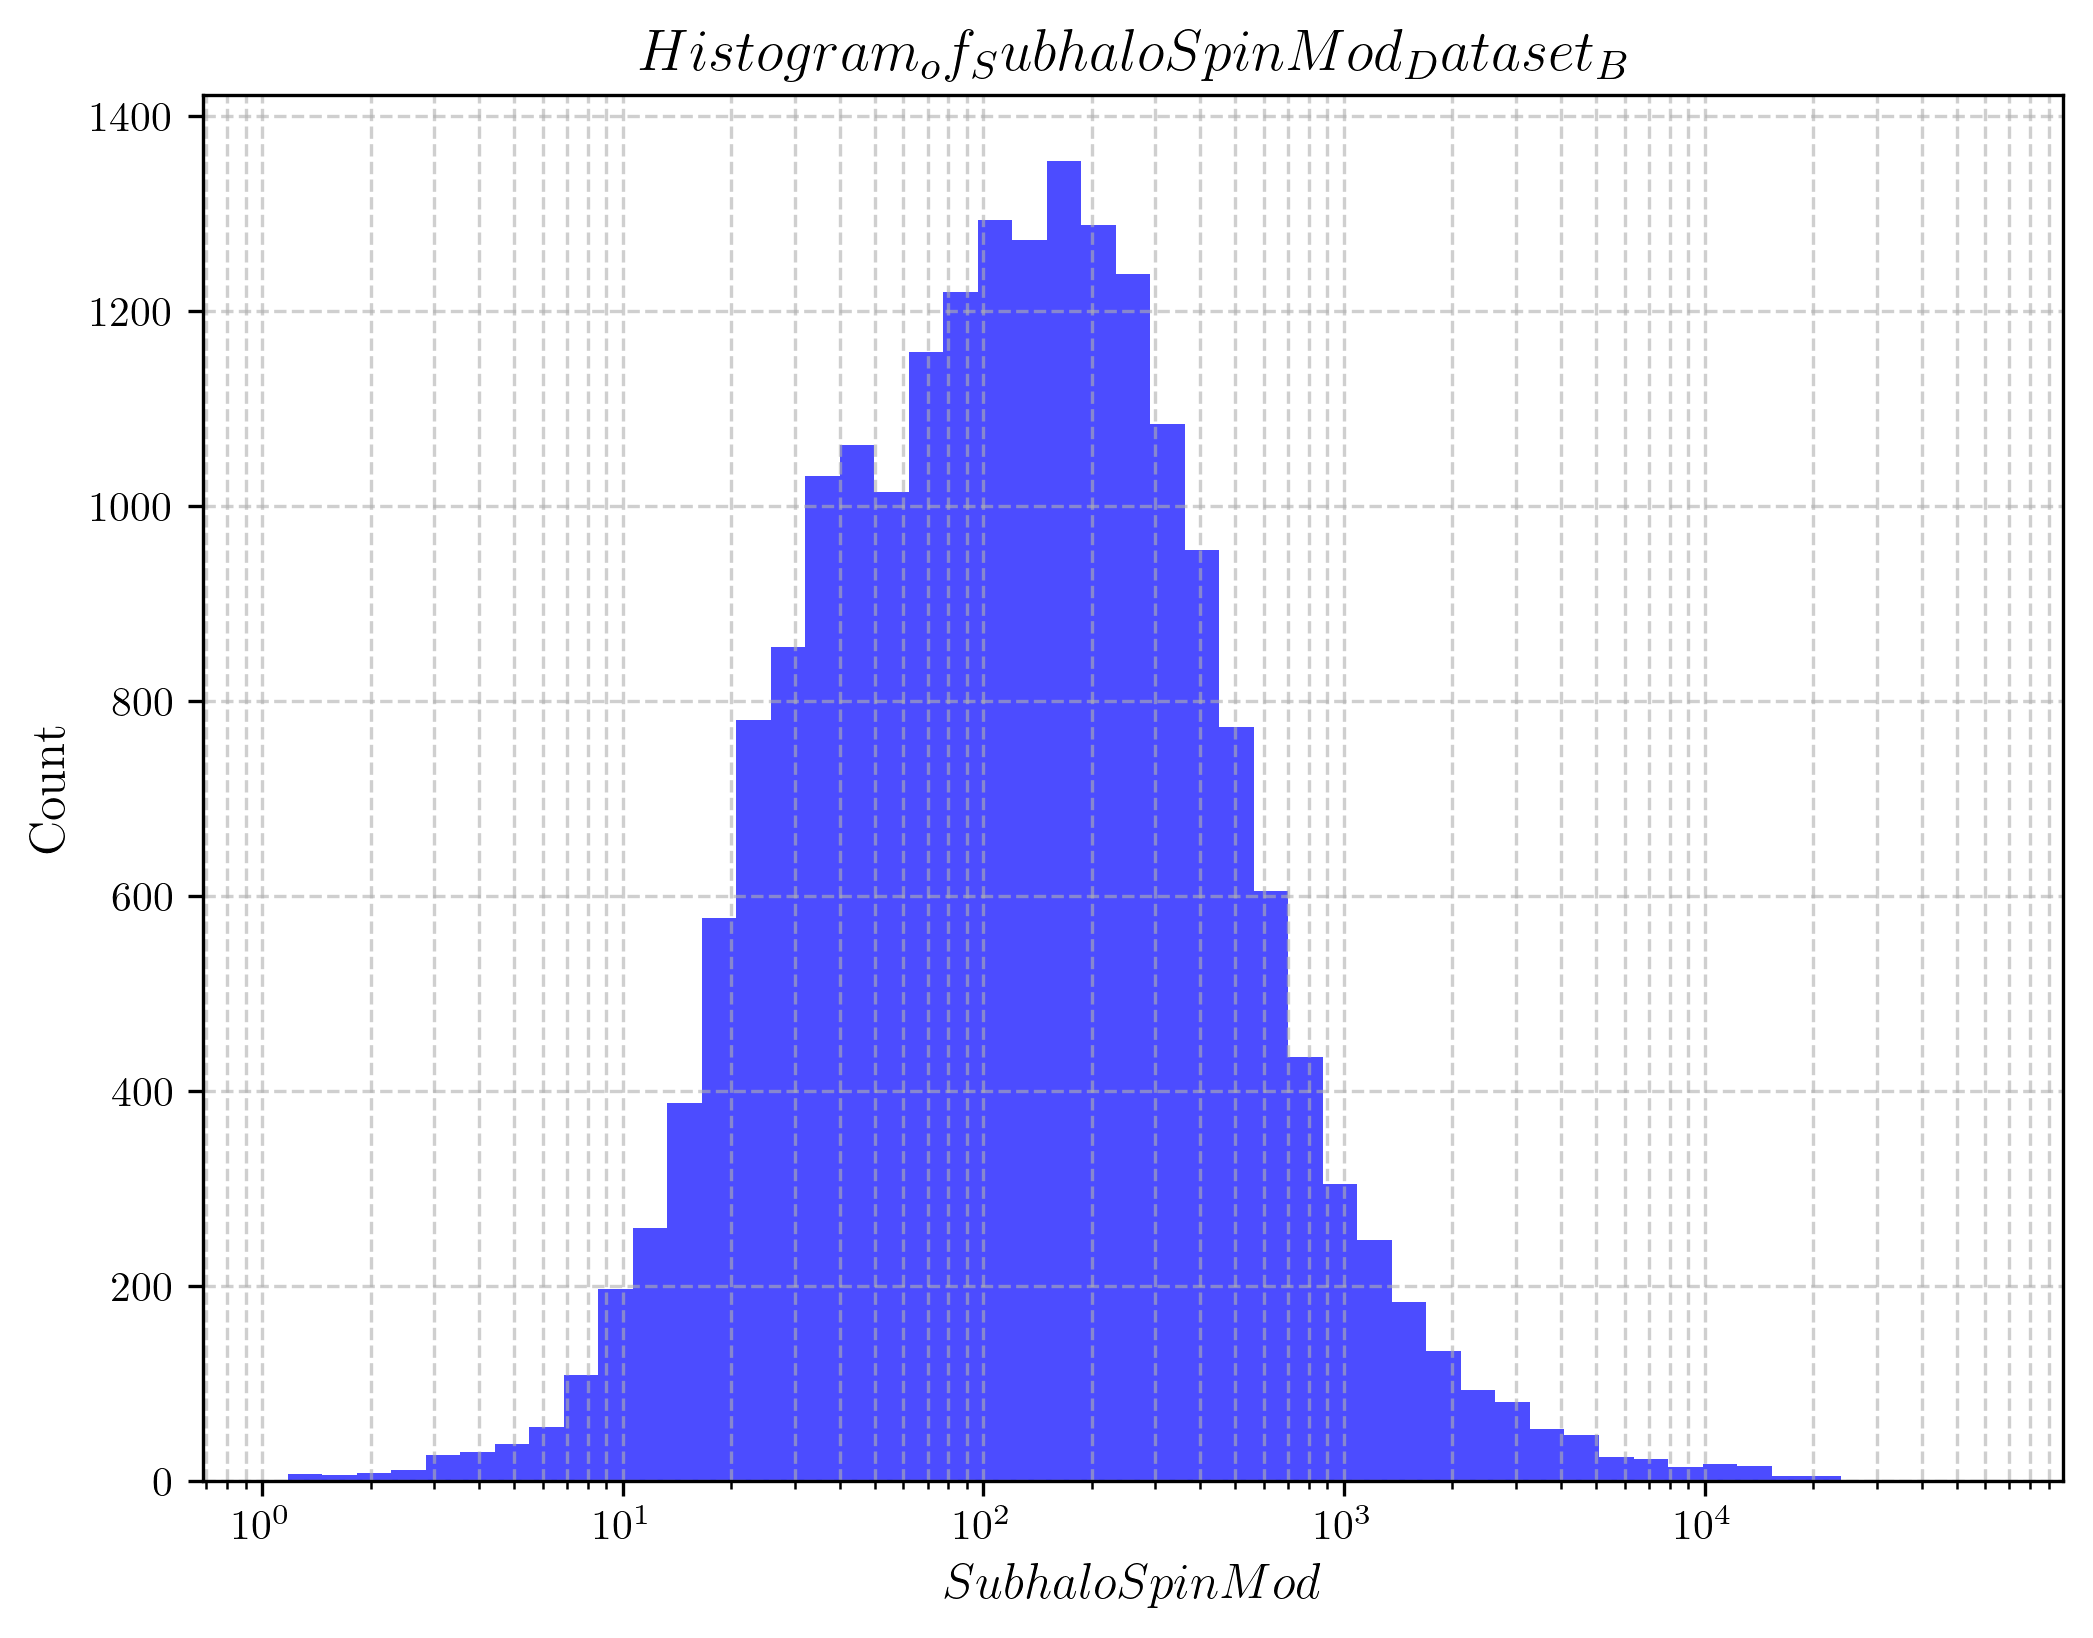

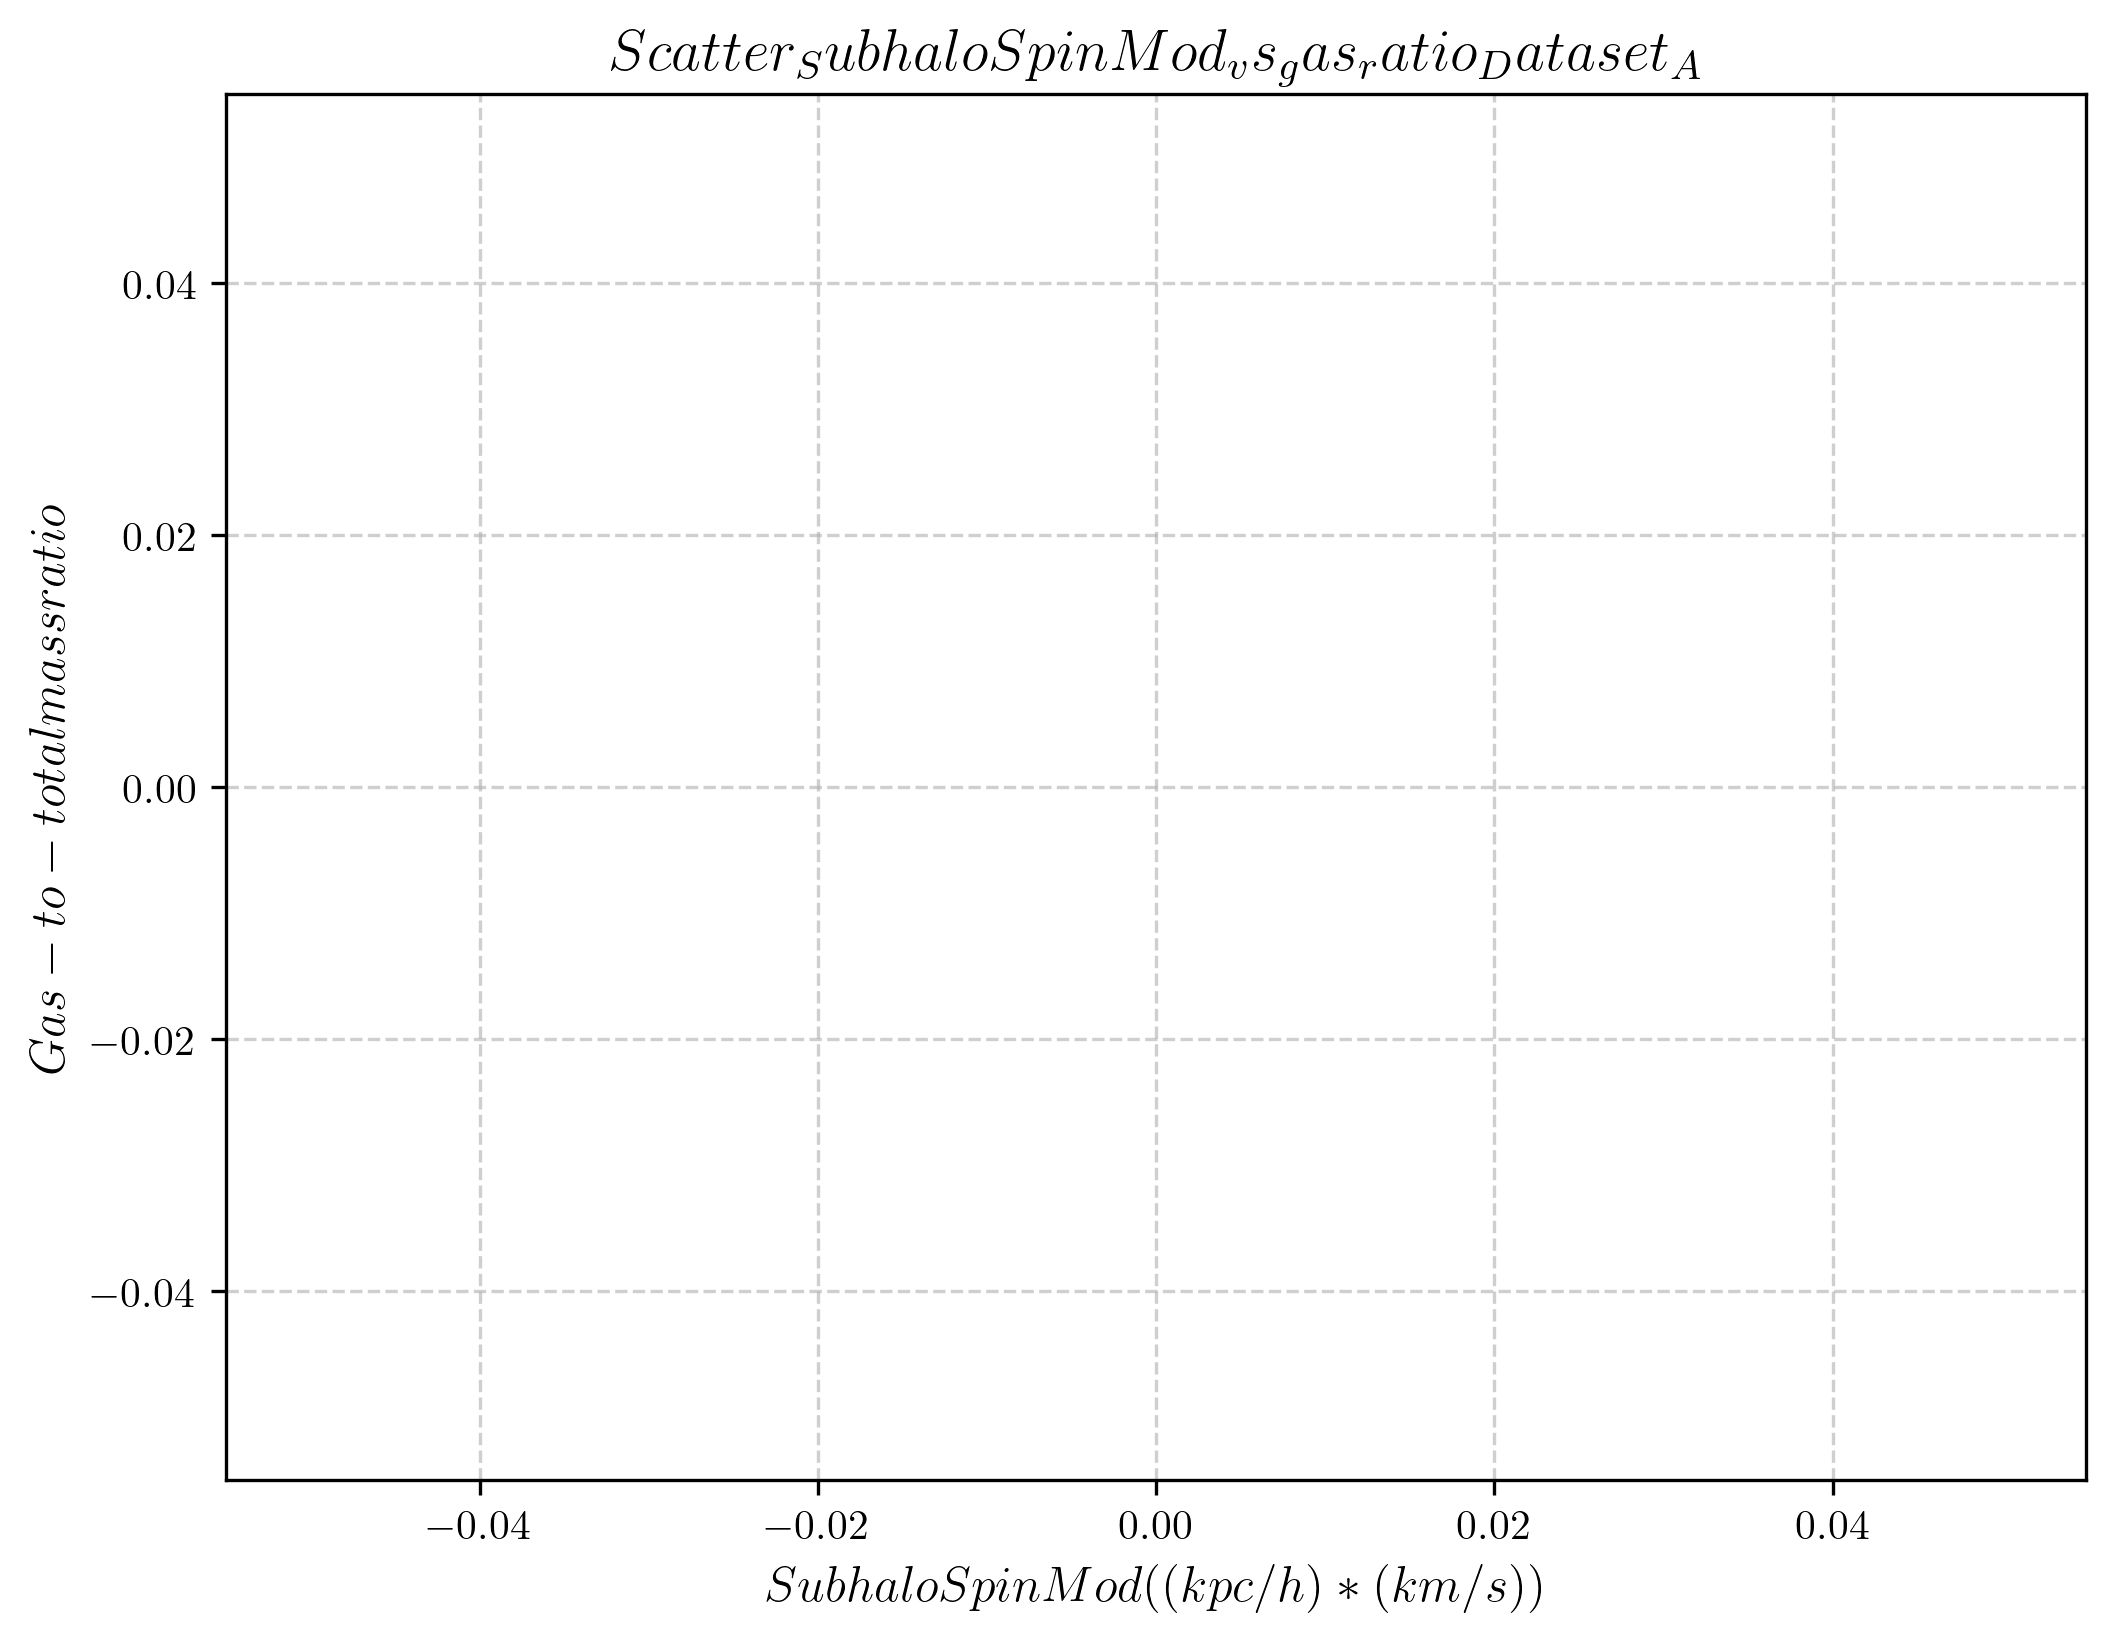


**Step number:** 2 out of 4.
 
**Sub-task:** Conduct exploratory data analysis (EDA) on the datasets.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Analyze the distributions of key features (e.g., Group_M_Mean200, SubhaloMass, SubhaloMassGAS, SubhaloMassDM, SubhaloMassSWP) for both datasets A and B.
- Calculate and analyze mass ratios (gas-to-total, DM-to-total, stars-to-total) for subhalos in both datasets.
- Create visualizations such as histograms, scatter plots, and box plots to compare the distributions of features and mass ratios between datasets A and B.
- Investigate the relationships between mass components (e.g., gas, dark matter, stars) and other relevant features (e.g., SubhaloSpinMod, SubhaloVmax).
- Examine the differences in feature distributions between datasets A and B to identify the impact of fNL values.
- Handle missing data appropriately, ensuring that group and subhalo features are analyzed separately.
- Provide summary statistics, correlations, and any notable patterns or anomalies.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 3 out of 4.
 
**Sub-task:** Synthesize insights from the EDA.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Interpret the EDA results in the context of the project idea.
- Quantify the differences between datasets A and B, focusing on mass ratios and their dependence on fNL values.
- Highlight key findings that inform the methodology, such as significant differences between datasets A and B or notable relationships between features.
- Prioritize which mass ratio relationships show the strongest dependence on fNL values.
- Identify any preprocessing steps or feature engineering tasks needed for the analysis.
 
**Status:** in progress ⏳
    


Calling researcher...



Message from researcher:




Forwarding content...



Calling researcher_response_formatter...



Message from researcher_response_formatter:

**Markdown:**

```markdown
<!-- filename: eda_synthesized_insights.md -->
### Synthesized Insights from the EDA

#### Quantifying Differences Between Datasets

- **Mass Ratios Overview:**
  - **Gas-to-Total Mass Ratio:**
    - Dataset A: Mean ≈ 0.0566
    - Dataset B: Mean ≈ 0.0581
    - Although the absolute difference is small, the slight increase in Dataset B suggests a marginal enhancement in gas retention (or possibly the impact of fNL = –200 on gas accretion processes).
  
  - **DM-to-Total Mass Ratio:**
    - Dataset A: Mean ≈ 0.9283
    - Dataset B: Mean ≈ 0.9259
    - The marginally lower value in Dataset B may indicate a subtle shift in the dominance of dark matter in mass assembly when fNL = –200, with slight changes in dynamical assembly.
  
  - **Stars-to-Total Mass Ratio:**
    - Dataset A: Mean ≈ 0.0149
    - Dataset B: Mean ≈ 0.0158
    - The slightly higher stellar contribution in Dataset B may reflect feedback or star forma

Message from control:




**Step number:** 3 out of 4.
 
**Sub-task:** Synthesize insights from the EDA.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Interpret the EDA results in the context of the project idea.
- Quantify the differences between datasets A and B, focusing on mass ratios and their dependence on fNL values.
- Highlight key findings that inform the methodology, such as significant differences between datasets A and B or notable relationships between features.
- Prioritize which mass ratio relationships show the strongest dependence on fNL values.
- Identify any preprocessing steps or feature engineering tasks needed for the analysis.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 4 out of 4.
 
**Sub-task:** Implement the analysis code based on the methodology developed in Step 3.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Write Python code to perform the analysis of mass ratios and their dependence on fNL values.
- Implement statistical comparisons and feature engineering tasks as identified in Step 3.
- Ensure the code is modular and well-documented, with clear outputs that address the project goals.
- Provide a summary of the results in the form of key statistics and tables.
 
**Status:** in progress ⏳
    


Calling engineer...



Message from engineer:




Forwarding content...



Calling engineer_response_formatter...



Message from engineer_response_formatter:



**Code Explanation:**

This script analyzes the mass ratios of subhalos in two CAMELS datasets, comparing their distributions and dependencies on the fNL parameter. It computes statistical tests (t-test and Mann-Whitney U test) to identify significant differences between the datasets and saves the results as a summary table.

**Modifications:**

The script was developed to include statistical tests and save results in a structured format.

**Python Code:**

```python
# filename: codebase/analysis_mass_ratios.py
#!/usr/bin/env python3
"""
This script performs the analysis of mass ratios and their dependence on fNL values
using the CAMELS simulation datasets. It leverages previously implemented EDA functions 
from the codebase module to compute mass ratios for subhalos, and then conducts statistical 
comparisons (using t-test and Mann–Whitney U test) to quantify differences between the datasets.
The results (key statistics and test outcomes) are printed and saved as CSV files.
"""

import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

# Import functions from eda_camels_analysis module
from codebase.eda_camels_analysis import compute_mass_ratios, timestamp, save_plot, plot_histogram, plot_scatter

def perform_statistical_tests(data_A: np.ndarray, data_B: np.ndarray, ratio_name: str) -> pd.Series:
    r"""
    Performs statistical tests (independent t-test and Mann–Whitney U test) to compare the distributions
    of a mass ratio between Dataset A and Dataset B.

    Args:
        data_A (np.ndarray): Array of mass ratio values from Dataset A.
        data_B (np.ndarray): Array of mass ratio values from Dataset B.
        ratio_name (str): Name of the mass ratio being compared.

    Returns:
        pd.Series: A pandas Series containing the mean values, t-test statistic, p-value,
                   Mann–Whitney U statistic, and corresponding p-value for the ratio.
    """
    # Remove non-finite values and zeros if needed for log tests
    data_A = data_A[np.isfinite(data_A)]
    data_B = data_B[np.isfinite(data_B)]
    
    # Compute mean values
    mean_A = np.mean(data_A)
    mean_B = np.mean(data_B)
    
    # Perform independent t-test
    t_stat, p_ttest = stats.ttest_ind(data_A, data_B, equal_var=False)
    
    # Perform Mann-Whitney U test (non-parametric)
    u_stat, p_mwu = stats.mannwhitneyu(data_A, data_B, alternative='two-sided')
    
    result = pd.Series({
        "Mean_Dataset_A": mean_A,
        "Mean_Dataset_B": mean_B,
        "T-test_Statistic": t_stat,
        "T-test_p_value": p_ttest,
        "MannWhitney_U_Statistic": u_stat,
        "MannWhitney_p_value": p_mwu
    }, name=ratio_name)
    return result

def save_summary_table(summary_df: pd.DataFrame, filename: str):
    r"""
    Saves the DataFrame summary table as a CSV file in the 'data/' folder.

    Args:
        summary_df (pd.DataFrame): DataFrame containing summary statistics.
        filename (str): Base filename for the CSV file.
    """
    folder = "data"
    os.makedirs(folder, exist_ok=True)
    file_path = os.path.join(folder, f"{filename}_{timestamp()}.csv")
    summary_df.to_csv(file_path, index=True)
    print(f"Summary table saved: {file_path}")

def main():
    r"""
    Main function to perform the analysis on mass ratios between datasets.
    It loads datasets, computes mass ratios, performs statistical comparisons,
    and saves a summary of key statistics and test outcomes.
    """
    # File paths for datasets
    file_A = '/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl'
    file_B = '/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl'
    
    try:
        df_A = pd.read_pickle(file_A)
        df_B = pd.read_pickle(file_B)
    except Exception as e:
        print("Error loading data:", e)
        return

    print("Datasets loaded successfully for analysis.")

    # Filter subhalos (rows with non-null SubhaloMass)
    subhalos_A = df_A[pd.notnull(df_A["SubhaloMass"])].copy()
    subhalos_B = df_B[pd.notnull(df_B["SubhaloMass"])].copy()
    
    print(f"Dataset A: {len(subhalos_A)} subhalos; Dataset B: {len(subhalos_B)} subhalos.")
    
    # Compute mass ratios using the imported function (mask ensures SubhaloMass > 0)
    subhalos_A = compute_mass_ratios(subhalos_A)
    subhalos_B = compute_mass_ratios(subhalos_B)

    # List of mass ratio columns
    ratio_columns = ["gas_ratio", "dm_ratio", "stars_ratio"]
    summary_results = []
    
    # Loop over each ratio and perform statistical tests
    for ratio in ratio_columns:
        data_A = subhalos_A[ratio].values
        data_B = subhalos_B[ratio].values
        result_series = perform_statistical_tests(data_A, data_B, ratio)
        summary_results.append(result_series)
        # Print detailed outcome for current ratio
        print(f"\nStatistical comparison for {ratio}:")
        print(result_series.to_string())

    # Create summary DataFrame
    summary_df = pd.DataFrame(summary_results)
    print("\nFinal Summary Statistics and Test Outcomes:")
    print(summary_df)
    
    # Save summary table to CSV in data/ folder
    save_summary_table(summary_df, "mass_ratios_summary")
    
    # (Optional) Additional feature engineering: normalized mass ratios relative to group masses 
    # can be implemented here if group-subhalo linking is desired.
    
    # For example, if both subhalo and group data are available, one could compute:
    # normalized_dm_ratio = SubhaloMassDM / Group_M_Mean200 for matched groups.
    # This sample code is omitted as it requires proper linking of subhalos to their groups.
    
if __name__ == "__main__":
    main()
```


Calling executor...

Message from executor:

execution results:
Execution output: Datasets loaded successfully for analysis.
Dataset A: 19899 subhalos; Dataset B: 20382 subhalos.

Statistical comparison for gas_ratio:
Mean_Dataset_A             5.664260e-02
Mean_Dataset_B             5.813438e-02
T-test_Statistic          -1.541205e+00
T-test_p_value             1.232749e-01
MannWhitney_U_Statistic    2.010071e+08
MannWhitney_p_value        1.213379e-01

Statistical comparison for dm_ratio:
Mean_Dataset_A             9.283081e-01
Mean_Dataset_B             9.258925e-01
T-test_Statistic           1.881039e+00
T-test_p_value             5.997384e-02
MannWhitney_U_Statistic    2.043172e+08
MannWhitney_p_value        1.907833e-01

Statistical comparison for stars_ratio:
Mean_Dataset_A             1.489249e-02
Mean_Dataset_B             1.580393e-02
T-test_Statistic          -1.203830e+00
T-test_p_value             2.286622e-01
MannWhitney_U_Statistic    2.037826e+08
MannWhitney_p_value   

Message from control:




**Step number:** 4 out of 4.
 
**Sub-task:** Implement the analysis code based on the methodology developed in Step 3.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Write Python code to perform the analysis of mass ratios and their dependence on fNL values.
- Implement statistical comparisons and feature engineering tasks as identified in Step 3.
- Ensure the code is modular and well-documented, with clear outputs that address the project goals.
- Provide a summary of the results in the form of key statistics and tables.
 
**Status:** completed ✅
    


Calling terminator...



Message from terminator:



Session terminated.

In [8]:
cmbagent = CMBAgent(
agent_llm_configs = {
                    'engineer': {
                        "model": "o3-mini-2025-01-31",
                        "reasoning_effort": "medium",
                        "api_key": os.getenv("OPENAI_API_KEY"),
                        "api_type": "openai"},
                    'researcher': {
                        "model": "o3-mini-2025-01-31",
                        "reasoning_effort": "medium",
                        "api_key": os.getenv("OPENAI_API_KEY"),
                        "api_type": "openai"},
})
   


cmbagent.solve(task,
               max_rounds=500,
               initial_agent="planner",
            #    initial_agent="researcher",
            #    mode="one_shot"
               shared_context = {'feedback_left': 1,
                                 'maximum_number_of_steps_in_plan': 4,
                                 'planner_append_instructions': planner_append_instructions,
                                 'engineer_append_instructions': engineer_append_instructions,
                                 'researcher_append_instructions': researcher_append_instructions,
                                 'plan_reviewer_append_instructions': plan_reviewer_append_instructions}
              )

### Result Collection

In [9]:
# template for one-shot eval
# Extract the task result from the chat history, assuming we are interested in the executor's output
try:
    for obj in cmbagent.chat_result.chat_history[::-1]:
        if obj['name'] == 'researcher_response_formatter':
            result = obj['content']
            break
    cmbagent.task_result = result
except:
    cmbagent.task_result = None
MD_CODE_BLOCK_PATTERN = r"```[ \t]*(?:markdown)[ \t]*\r?\n(.*)\r?\n[ \t]*```"
extracted_methodology = re.findall(MD_CODE_BLOCK_PATTERN, cmbagent.task_result, flags=re.DOTALL)[0]
clean_methodology = re.sub(r'^<!--.*?-->\s*\n', '', extracted_methodology)
astro_pilot.input.methodology = clean_methodology
print(astro_pilot.input.methodology)

### Synthesized Insights from the EDA

#### Quantifying Differences Between Datasets

- **Mass Ratios Overview:**
  - **Gas-to-Total Mass Ratio:**
    - Dataset A: Mean ≈ 0.0566
    - Dataset B: Mean ≈ 0.0581
    - Although the absolute difference is small, the slight increase in Dataset B suggests a marginal enhancement in gas retention (or possibly the impact of fNL = –200 on gas accretion processes).
  
  - **DM-to-Total Mass Ratio:**
    - Dataset A: Mean ≈ 0.9283
    - Dataset B: Mean ≈ 0.9259
    - The marginally lower value in Dataset B may indicate a subtle shift in the dominance of dark matter in mass assembly when fNL = –200, with slight changes in dynamical assembly.
  
  - **Stars-to-Total Mass Ratio:**
    - Dataset A: Mean ≈ 0.0149
    - Dataset B: Mean ≈ 0.0158
    - The slightly higher stellar contribution in Dataset B may reflect feedback or star formation efficiency differences possibly tied to the initial non-Gaussian conditions.

#### Key Findings on Mass Ratio Rela

## Results Generation

### Task-specific Instructions

In [10]:
planner_append_instructions = rf"""

{astro_pilot.input.idea}

{astro_pilot.input.methodology}

Given these datasets, and information on the features and project idea and methodology, we want to perform the project analysis and generate the results, plots and insights.
The goal is to perform the in-depth research and analysis. 

   The plan must strictly involve only the following agents: 

   - engineer: an expert Python coder who writes entire Python pipelines ready to be executed, and generates results, plots and key statistics. It does not aim to discuss the results of the code, only to write the code.
   - researcher: an expert researcher that produces reasoning but does not run code. This agent also discusses and interprets results. 

   You must not invoke any other agent than the ones listed above.

   The plan must end with the insights generated by the researcher, including discussion of quantitative results and plots previously generated. 

"""

plan_reviewer_append_instructions = rf"""
    {astro_pilot.input.idea}

    {astro_pilot.input.methodology}

    Check that the agents called in each sub-task only include, if needed: 
    - engineer: an expert Python coder who writes entire Python pipelines ready to be executed, and generates results, plots and key statistics. It does not aim to discuss the results of the code, only to write the code.
    - researcher: an expert researcher that produces reasoning but does not run code. This agent also discusses and interprets results. 

    The plan must end with the insights generated by the researcher, including discussion of quantitative results and plots previously generated. 

"""

engineer_append_instructions = rf"""
{astro_pilot.input.idea}

{astro_pilot.input.methodology}

Given these datasets, and information on the features and project idea and methodology, we want to perform the project analysis and generate the results, plots and key statistics.
The goal is to perform the in-depth research and analysis. This means that you must generate the results, plots and key statistics.

Warnings for computing and plotting: 
Some feature columns have around 40k non-null entries. Although vectorized operations (like np.percentile, np.concatenate) are efficient, they do take longer on larger arrays. 
You must make sure the code is well optimized for operations on large arrays. 

For plots involving features: 
- make sure dynamical ranges are well captured (carefully adjust the binning, and log or linear axes scales, for each feature).

For histograms (if needed):
-Use log-scale for features with values spanning several orders of magnitudes. 
-If photometric fatures are needed, use linear scale for Photometrics feature, but in general **log-log in both x and y axes will be useful!**
-Don't include null or nan values in the histogram counts, nonetheless, although the NaN entries are useless, it might be useful to keep track of the zero counts for some features.

"""


researcher_append_instruction =  rf"""
{astro_pilot.input.idea}

{astro_pilot.input.methodology}

Given the results, plots and key statistics generated by the engineer, your task is to generate a detailed **discussion** and **interpretation** of the results, plots and key statistics, including reporting meaningful quantitative results, tables and references to the plots previously generated in the session.
At the end the goal is to generate the in-depth research report based on the results, plots and key statistics provided by the engineer.
"""

### Cmbagent run

Message from admin:




Here are two datasets. These datasets contain subhalo and group-level properties from two different CAMELS simulations (A and B). The goal is to compare the distributions of these properties across both datasets.

groups_and_subhalos_A_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl')
groups_and_subhalos_B_df = pd.read_pickle('/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl')

<Info on DATASET A>
output of groups_and_subhalos_A_df.describe().to_markdown():
\n
|       |      GroupSFR |   Group_R_Mean200 |   Group_M_Mean200 |   SubhaloGasMetallicity |   SubhaloMass |     SubhaloSFR |   SubhaloSpinMod |   SubhaloVmax |   SubhaloStellarPhotometrics_U |   SubhaloStellarPhotometrics_B |   SubhaloStellarPhotometrics_V |   SubhaloStellarPhotometrics_K |   SubhaloStellarPhotometrics_g |   SubhaloStellarPhotometrics_r |   SubhaloStellarPhotometrics_i |   SubhaloStellarPhotometrics_z |   SubhaloStarMetallicity |   SubhaloMassGAS |   SubhaloMassDM |   SubhaloMassSWP |   SubhaloMassBH |   SubhaloVelDisp |   SubhaloVmaxRad |\n|:------|--------------:|------------------:|------------------:|------------------------:|--------------:|---------------:|-----------------:|--------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------------:|-------------------------:|-----------------:|----------------:|-----------------:|----------------:|-----------------:|-----------------:|\n| count | 44288         |        44288      |      44288        |          20382          | 20382         | 20382          |      20382       |    20382      |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                    20382       |                     20382      |          20382           |     20382        |     20382       |  20382           |  20382          |      20382       |     20382        |\n| mean  |     0.0422433 |           69.2228 |         10.7355   |              0.00238127 |    19.4284    |     0.0914536  |        317.282   |       77.9824 |                      -14.1589  |                      -14.2142  |                      -14.791   |                      -16.8777  |                      -14.5569  |                      -15.0336  |                      -15.2562  |                       -15.3799 |              0.00303963  |         1.66305  |        17.5501  |      0.213218    |      0.00210229 |         40.5932  |        10.0095   |\n| std   |     0.428835  |           47.0012 |        177.375    |              0.00467102 |   210.281     |     0.513121   |       1001.08    |       43.9643 |                        2.56885 |                        2.57772 |                        2.56798 |                        2.75787 |                        2.57637 |                        2.56583 |                        2.57107 |                         2.5952 |              0.00530367  |        27.8483   |       181.509   |      1.52578     |      0.0160016  |         25.2385  |        15.2058   |\n| min   |     0         |           41.5453 |          0.500062 |              0          |     0.0159726 |     0          |          1.17564 |       10.2123 |                      -23.1801  |                      -23.5313  |                      -24.3584  |                      -27.1762  |                      -23.9709  |                      -24.6873  |                      -25.0282  |                       -25.2637 |              0           |         0        |         0       |      0.000163077 |      0          |          4.59465 |         0.307768 |\n| 25%   |     0         |           46.8837 |          0.718632 |              0          |     1.22453   |     0          |         46.2172  |       54.1398 |                      -15.7662  |                      -15.8733  |                      -16.4076  |                      -18.5786  |                      -16.2088  |                      -16.6382  |                      -16.8536  |                       -16.9868 |              0           |         0        |         1.16785 |      0.00134983  |      0          |         26.9895  |         5.01202  |\n| 50%   |     0         |           55.7362 |          1.2075   |              0          |     3.07819   |     0          |        121.712   |       65.6042 |                      -13.2776  |                      -13.3486  |                      -13.9556  |                      -15.9564  |                      -13.702   |                      -14.208   |                      -14.4271  |                       -14.5336 |              0.000480832 |         0.138162 |         2.9099  |      0.00356472  |      0          |         33.8581  |         7.39513  |\n| 75%   |     0         |           73.2698 |          2.74314  |              0.00229632 |     7.48532   |     0.00824189 |        290.865   |       85.6452 |                      -12.128   |                      -12.1513  |                      -12.7236  |                      -14.6586  |                      -12.4893  |                      -12.9648  |                      -13.1885  |                       -13.2945 |              0.00314217  |         0.45165  |         6.96169 |      0.0227119   |      0.00195949 |         45.4213  |        11.2365   |\n| max   |    37.2313    |         1428.54   |      20331.6      |              0.0432014  | 16541.6       |    36.6898     |      57571       |      868.704  |                       -9.49047 |                       -9.63056 |                      -10.3286  |                      -12.3199  |                      -10.0174  |                      -10.6145  |                      -10.8462  |                       -10.9588 |              0.0397323   |      2358.29     |     14083.7     |     98.1971      |      1.46984    |        482.48    |       605.262    |
\n
This gives you the mean, std, min and max of all features. 

output of groups_and_subhalos_A_df.info():
<class 'pandas.core.frame.DataFrame'>
Index: 63818 entries, 0 to 295566
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      43919 non-null  float32
 1   Group_R_Mean200               43919 non-null  float32
 2   Group_M_Mean200               43919 non-null  float32
 3   SubhaloGasMetallicity         19899 non-null  float32
 4   SubhaloMass                   19899 non-null  float32
 5   SubhaloSFR                    19899 non-null  float32
 6   SubhaloSpinMod                19899 non-null  float32
 7   SubhaloVmax                   19899 non-null  float32
 8   SubhaloStellarPhotometrics_U  19899 non-null  float32
 9   SubhaloStellarPhotometrics_B  19899 non-null  float32
 10  SubhaloStellarPhotometrics_V  19899 non-null  float32
 11  SubhaloStellarPhotometrics_K  19899 non-null  float32
 12  SubhaloStellarPhotometrics_g  19899 non-null  float32
 13  SubhaloStellarPhotometrics_r  19899 non-null  float32
 14  SubhaloStellarPhotometrics_i  19899 non-null  float32
 15  SubhaloStellarPhotometrics_z  19899 non-null  float32
 16  SubhaloStarMetallicity        19899 non-null  float32
 17  SubhaloMassGAS                19899 non-null  float32
 18  SubhaloMassDM                 19899 non-null  float32
 19  SubhaloMassSWP                19899 non-null  float32
 20  SubhaloMassBH                 19899 non-null  float32
 21  SubhaloVelDisp                19899 non-null  float32
 22  SubhaloVmaxRad                19899 non-null  float32
dtypes: float32(23)
memory usage: 6.1 MB
</Info on DATASET A>


<Info on DATASET B>
<class 'pandas.core.frame.DataFrame'>
Index: 64670 entries, 0 to 296683
Data columns (total 23 columns):
 x   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GroupSFR                      44288 non-null  float32
 1   Group_R_Mean200               44288 non-null  float32
 2   Group_M_Mean200               44288 non-null  float32
 3   SubhaloGasMetallicity         20382 non-null  float32
 4   SubhaloMass                   20382 non-null  float32
 5   SubhaloSFR                    20382 non-null  float32
 6   SubhaloSpinMod                20382 non-null  float32
 7   SubhaloVmax                   20382 non-null  float32
 8   SubhaloStellarPhotometrics_U  20382 non-null  float32
 9   SubhaloStellarPhotometrics_B  20382 non-null  float32
 10  SubhaloStellarPhotometrics_V  20382 non-null  float32
 11  SubhaloStellarPhotometrics_K  20382 non-null  float32
 12  SubhaloStellarPhotometrics_g  20382 non-null  float32
 13  SubhaloStellarPhotometrics_r  20382 non-null  float32
 14  SubhaloStellarPhotometrics_i  20382 non-null  float32
 15  SubhaloStellarPhotometrics_z  20382 non-null  float32
 16  SubhaloStarMetallicity        20382 non-null  float32
 17  SubhaloMassGAS                20382 non-null  float32
 18  SubhaloMassDM                 20382 non-null  float32
 19  SubhaloMassSWP                20382 non-null  float32
 20  SubhaloMassBH                 20382 non-null  float32
 21  SubhaloVelDisp                20382 non-null  float32
 22  SubhaloVmaxRad                20382 non-null  float32
dtypes: float32(23)
memory usage: 6.2 MB
</Info on DATASET B>

Datasets A and B are catalogs of objects (groups and subhalos) that inherently depend the local primordial non-Gaussianity parameter values fNL=200 for A and fNL=-200 for B.


Deacription of the features: 
 0   GroupSFR                      Sum of the individual star formation rates of all gas cells in this group. In units of Msun/yr.
 1   Group_R_Mean200               Comoving Radius of a sphere centered at the GroupPos of this Group whose mean density is 200 times the mean density of the Universe, at the time the halo is considered. In units of ckpc/h.
 2   Group_M_Mean200               Total Mass of this group enclosed in a sphere whose mean density is 200 times the mean density of the Universe, at the time the halo is considered, in units of 1e10 Msun/h.
 3   SubhaloGasMetallicity         Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the gas cells bound to this Subhalo, but restricted to cells within twice the stellar half mass radius. 
 4   SubhaloMass                   Total mass of all member particle/cells which are bound to this Subhalo, of all types. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 5   SubhaloSFR                    Sum of the individual star formation rates of all gas cells in this subhalo. In units of Msun/yr.
 6   SubhaloSpinMod                Total 3D spin modulus, computed for each as the mass weighted sum of the relative coordinate times relative velocity of all member particles/cells. In units of (kpc/h)(km/s).
 7   SubhaloVmax                   Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation. In units of km/s.
 8   SubhaloStellarPhotometrics_U  Magnitude in U-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 9   SubhaloStellarPhotometrics_B  Magnitude in B-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 10  SubhaloStellarPhotometrics_V  Magnitude in V-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 11  SubhaloStellarPhotometrics_K  Magnitude in K-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 12  SubhaloStellarPhotometrics_g  Magnitude in g-band based on the summed-up luminosities of all the stellar particles of the group. In mag units. 
 13  SubhaloStellarPhotometrics_r  Magnitude in r-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 14  SubhaloStellarPhotometrics_i  Magnitude in i-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 15  SubhaloStellarPhotometrics_z  Magnitude in z-band based on the summed-up luminosities of all the stellar particles of the group. In mag units.
 16  SubhaloStarMetallicity        Mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the star particles bound to this Subhalo, but restricted to stars within twice the stellar half mass radius.
 17  SubhaloMassGAS                Gas mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 18  SubhaloMassDM                 Dark Matter mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 19  SubhaloMassSWP                Mass of Stars & Wind particles which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 20  SubhaloMassBH                 Black Hole mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. In units of 1e10 Msun/h.
 21  SubhaloVelDisp                One-dimensional velocity dispersion of all the member particles/cells (the 3D dispersion divided by sqrt(3))
 22  SubhaloVmaxRad                Maximum value of the spherically-averaged rotation curve. All available particle types (e.g. gas, stars, DM, and SMBHs) are included in this calculation.

Note that Subhalo features are not available for groups (set to NaN) and group features are not available for subhalos (set to NaN).
Groups and subhalos should be considered as separate objects (they dont have the same features). Within groups and within subhalos, there are no missing values.



Calling planner...



Message from planner:




Forwarding content...



Calling planner_response_formatter...



Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Preprocess the datasets and compute mass ratios for gas, dark matter, and stars.
	* agent in charge: engineer

	* instructions:
		- Load the datasets `groups_and_subhalos_A_df` and `groups_and_subhalos_B_df`.
		- Separate the data into groups and subhalos based on the presence of NaN values in group or subhalo-specific features.
		- Compute the mass ratios for gas (`SubhaloMassGAS / SubhaloMass`), dark matter (`SubhaloMassDM / SubhaloMass`), and stars (`SubhaloMassSWP / SubhaloMass`) for subhalos in both datasets.
		- Handle any zero or extreme values in the denominator to avoid division errors.
		- Save the processed datasets with the computed mass ratios for further analysis.

- Step 2:
	* sub-task: Perform statistical analysis and visualize the distributions of mass ratios.
	* agent in charge: engineer

	* instructions:
		- Generate histograms and kernel density estimates (KDEs) for the gas, dark matter, and star mass ratios for both datasets.
		- Compute and display summary statistics (mean, median, standard deviation) for the mass ratios in both datasets.
		- Create scatter plots to explore relationships between mass ratios and other features like `SubhaloSpinMod` and `SubhaloVmax`.
		- Save all plots and statistical summaries for interpretation.

- Step 3:
	* sub-task: Analyze the differences in mass ratios and their relationships with other features.
	* agent in charge: researcher

	* instructions:
		- Compare the distributions of gas, dark matter, and star mass ratios between datasets A and B.
		- Interpret the statistical differences in the mass ratios and their implications for the impact of primordial non-Gaussianity (fNL=200 vs. fNL=-200).
		- Discuss the trends observed in scatter plots, particularly the relationships between mass ratios and features like `SubhaloSpinMod` and `SubhaloVmax`.
		- Highlight any significant findings or anomalies.

- Step 4:
	* sub-task: Investigate the correlation structure of mass ratios and other features.
	* agent in charge: engineer

	* instructions:
		- Compute correlation matrices for the mass ratios and other subhalo features (e.g., `SubhaloSpinMod`, `SubhaloVmax`, `SubhaloVelDisp`).
		- Visualize the correlations using heatmaps for both datasets.
		- Identify and highlight strong correlations or notable differences between datasets A and B.
		- Save the correlation matrices and heatmaps for interpretation.

- Step 5:
	* sub-task: Interpret the correlation results and their implications for mass assembly processes.
	* agent in charge: researcher

	* instructions:
		- Analyze the correlation matrices and heatmaps to identify key relationships between mass ratios and other features.
		- Discuss how the observed correlations differ between datasets A and B and what this reveals about the influence of primordial non-Gaussianity.
		- Relate the findings to the broader context of mass assembly processes in halos and subhalos.
		- Summarize the key insights and their implications for the project goals.

- Step 6:
	* sub-task: Synthesize all findings and provide a comprehensive discussion.
	* agent in charge: researcher

	* instructions:
		- Combine the insights from the statistical analysis, visualizations, and correlation studies.
		- Discuss the overall impact of primordial non-Gaussianity on mass ratios and assembly processes.
		- Highlight the most significant differences between datasets A and B and their potential astrophysical implications.
		- Provide recommendations for future research or additional analyses based on the findings.

        


Calling plan_recorder...



Message from plan_recorder:



Plan has been logged.


Calling plan_reviewer...



Message from plan_reviewer:




Forwarding content...



Calling reviewer_response_formatter...



Message from reviewer_response_formatter:




**Recommendations:**

In Step 1, add instructions for the engineer to create additional derived features beyond just mass ratios, such as calculating the total baryonic mass (gas + stars) and the baryonic-to-total mass ratio, which would provide a more comprehensive view of mass distribution.

In Step 2, expand the instructions to include comparative visualizations that directly show the differences between datasets A and B (such as overlaid histograms or KDEs), rather than just generating separate plots for each dataset.

In Step 3, add specific instructions for the researcher to analyze the statistical significance of the differences observed between datasets A and B, possibly suggesting statistical tests (like Kolmogorov-Smirnov) that could quantify these differences.

In Step 4, modify the instructions to include analysis of how mass ratios correlate with metallicity features (SubhaloGasMetallicity and SubhaloStarMetallicity), as these could provide insights into the chemical evolution influenced by primordial non-Gaussianity.

In Step 5, add instructions for the researcher to specifically examine how the correlations between mass ratios and dynamical properties (like SubhaloVmax and SubhaloSpinMod) might reveal mechanisms through which primordial non-Gaussianity affects structure formation.

In Step 6, add instructions for the researcher to discuss potential observational signatures that could be used to distinguish between different primordial non-Gaussianity scenarios based on the findings from this analysis.


            


Calling review_recorder...



Message from review_recorder:




Recommendations have been logged.  
Number of feedback rounds left: 0. 
Now, update the plan accordingly, planner!


Calling planner...



Message from planner:




Forwarding content...



Calling planner_response_formatter...



Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Preprocess the datasets and compute derived features, including mass ratios and baryonic properties.
	* agent in charge: engineer

	* instructions:
		- Load the datasets `groups_and_subhalos_A_df` and `groups_and_subhalos_B_df`.
		- Separate the data into groups and subhalos based on the presence of NaN values in group or subhalo-specific features.
		- Compute the mass ratios for gas (`SubhaloMassGAS / SubhaloMass`), dark matter (`SubhaloMassDM / SubhaloMass`), and stars (`SubhaloMassSWP / SubhaloMass`) for subhalos in both datasets.
		- Calculate additional derived features: Total baryonic mass (`SubhaloMassGAS + SubhaloMassSWP`) and Baryonic-to-total mass ratio (`(SubhaloMassGAS + SubhaloMassSWP) / SubhaloMass`).
		- Handle any zero or extreme values in the denominator to avoid division errors.
		- Save the processed datasets with the computed mass ratios and derived features for further analysis.

- Step 2:
	* sub-task: Perform statistical analysis and visualize the distributions of mass ratios and baryonic properties.
	* agent in charge: engineer

	* instructions:
		- Generate histograms and kernel density estimates (KDEs) for the gas, dark matter, and star mass ratios, as well as the baryonic-to-total mass ratio, for both datasets.
		- Overlay the histograms or KDEs for datasets A and B to directly compare their distributions.
		- Compute and display summary statistics (mean, median, standard deviation) for the mass ratios and baryonic properties in both datasets.
		- Create scatter plots to explore relationships between mass ratios, baryonic properties, and other features like `SubhaloSpinMod` and `SubhaloVmax`.
		- Save all plots and statistical summaries for interpretation.

- Step 3:
	* sub-task: Analyze the differences in mass ratios, baryonic properties, and their relationships with other features.
	* agent in charge: researcher

	* instructions:
		- Compare the distributions of gas, dark matter, and star mass ratios, as well as baryonic-to-total mass ratios, between datasets A and B.
		- Analyze the statistical significance of the differences observed between datasets A and B using appropriate statistical tests (e.g., Kolmogorov-Smirnov test).
		- Interpret the statistical differences in the mass ratios and baryonic properties, and their implications for the impact of primordial non-Gaussianity (fNL=200 vs. fNL=-200).
		- Discuss the trends observed in scatter plots, particularly the relationships between mass ratios, baryonic properties, and features like `SubhaloSpinMod` and `SubhaloVmax`.
		- Highlight any significant findings or anomalies.

- Step 4:
	* sub-task: Investigate the correlation structure of mass ratios, baryonic properties, and other features, including metallicity.
	* agent in charge: engineer

	* instructions:
		- Compute correlation matrices for the mass ratios, baryonic properties, and other subhalo features (e.g., `SubhaloSpinMod`, `SubhaloVmax`, `SubhaloVelDisp`, `SubhaloGasMetallicity`, `SubhaloStarMetallicity`).
		- Visualize the correlations using heatmaps for both datasets.
		- Identify and highlight strong correlations or notable differences between datasets A and B.
		- Save the correlation matrices and heatmaps for interpretation.

- Step 5:
	* sub-task: Interpret the correlation results and their implications for mass assembly processes and structure formation.
	* agent in charge: researcher

	* instructions:
		- Analyze the correlation matrices and heatmaps to identify key relationships between mass ratios, baryonic properties, metallicity features, and other subhalo properties.
		- Discuss how the observed correlations differ between datasets A and B and what this reveals about the influence of primordial non-Gaussianity.
		- Examine how the correlations between mass ratios and dynamical properties (like `SubhaloVmax` and `SubhaloSpinMod`) might reveal mechanisms through which primordial non-Gaussianity affects structure formation.
		- Relate the findings to the broader context of mass assembly processes in halos and subhalos.
		- Summarize the key insights and their implications for the project goals.

- Step 6:
	* sub-task: Synthesize all findings and discuss potential observational signatures.
	* agent in charge: researcher

	* instructions:
		- Combine the insights from the statistical analysis, visualizations, and correlation studies.
		- Discuss the overall impact of primordial non-Gaussianity on mass ratios, baryonic properties, and assembly processes.
		- Highlight the most significant differences between datasets A and B and their potential astrophysical implications.
		- Discuss potential observational signatures that could be used to distinguish between different primordial non-Gaussianity scenarios based on the findings from this analysis.
		- Provide recommendations for future research or additional analyses based on the findings.

        


Calling plan_recorder...



Message from plan_recorder:



Planning stage complete. Switching to control.


Calling control...



Message from control:




**Step number:** 1 out of 6.
 
**Sub-task:** Preprocess the datasets and compute derived features, including mass ratios and baryonic properties.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Load the datasets `groups_and_subhalos_A_df` and `groups_and_subhalos_B_df`.
- Separate the data into groups and subhalos based on the presence of NaN values in group or subhalo-specific features.
- Compute the mass ratios for gas (`SubhaloMassGAS / SubhaloMass`), dark matter (`SubhaloMassDM / SubhaloMass`), and stars (`SubhaloMassSWP / SubhaloMass`) for subhalos in both datasets.
- Calculate additional derived features: Total baryonic mass (`SubhaloMassGAS + SubhaloMassSWP`) and Baryonic-to-total mass ratio (`(SubhaloMassGAS + SubhaloMassSWP) / SubhaloMass`).
- Handle any zero or extreme values in the denominator to avoid division errors.
- Save the processed datasets with the computed mass ratios and derived features for further analysis.
 
**Status:** in progress ⏳
    


Calling engineer...



Message from engineer:




Forwarding content...



Calling engineer_response_formatter...



Message from engineer_response_formatter:



**Code Explanation:**

This script processes CAMELS datasets to compute derived features for subhalos, such as mass ratios and baryonic properties. It handles potential division errors and saves the processed data for further analysis.

**Python Code:**

```python
# filename: codebase/process_camels_datasets.py
"""
This module preprocesses the CAMELS datasets for groups and subhalos,
computing derived features related to mass ratios and baryonic properties. 

The code performs the following tasks:
  - Loads the datasets groups_and_subhalos_A_df and groups_and_subhalos_B_df.
  - Separates the data into groups and subhalos based on NaN values in group- or subhalo-specific columns.
  - For subhalos, computes:
      * Mass ratio for gas: SubhaloMassGAS / SubhaloMass
      * Mass ratio for dark matter: SubhaloMassDM / SubhaloMass
      * Mass ratio for stars: SubhaloMassSWP / SubhaloMass
      * Total baryonic mass: SubhaloMassGAS + SubhaloMassSWP
      * Baryonic-to-total mass ratio: (SubhaloMassGAS + SubhaloMassSWP) / SubhaloMass
  - Handles potential division errors by assigning NaN when the denominator is zero or non-positive.
  - Saves the processed subhalo datasets to the “data/” folder.
  - Prints summary statistics of the computed derived features.

Note:
  * All operations are vectorized for performance.
  * Ensure that the folder "data/" exists (created if necessary) for saving output files.

Units:
  - Masses are in units of 1e10 Msun/h.
  - Mass ratios and derived ratios are dimensionless.
  - Star formation rates are in Msun/yr.
"""

import os
import numpy as np
import pandas as pd

def process_subhalos(df):
    r"""
    Processes a CAMELS dataset DataFrame to compute subhalo mass ratios and baryonic properties.

    This function:
      - Filters the DataFrame to include only subhalos (rows with non-null 'SubhaloMass').
      - Computes the following derived features for subhalos:
          * Gas-to-total mass ratio: SubhaloMassGAS / SubhaloMass
          * Dark matter-to-total mass ratio: SubhaloMassDM / SubhaloMass
          * Stars-to-total mass ratio: SubhaloMassSWP / SubhaloMass
          * Total baryonic mass: SubhaloMassGAS + SubhaloMassSWP
          * Baryonic-to-total mass ratio: (SubhaloMassGAS + SubhaloMassSWP) / SubhaloMass
      - Handles division by zero or when 'SubhaloMass' is non-positive by assigning NaN.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing CAMELS dataset with both group and subhalo objects.
        Subhalo-specific columns must include 'SubhaloMass', 'SubhaloMassGAS',
        'SubhaloMassDM', and 'SubhaloMassSWP'.

    Returns
    -------
    pandas.DataFrame
        A DataFrame filtered to contain only subhalo objects and augmented with new columns:
            - 'mass_ratio_gas' (dimensionless)
            - 'mass_ratio_dm' (dimensionless)
            - 'mass_ratio_stars' (dimensionless)
            - 'total_baryonic_mass' (in 1e10 Msun/h)
            - 'baryonic_to_total_ratio' (dimensionless)
    """
    # Filter rows: keep only subhalos (where 'SubhaloMass' is not NaN) and ensuring required columns are non-null
    required_columns = ["SubhaloMass", "SubhaloMassGAS", "SubhaloMassDM", "SubhaloMassSWP"]
    df_subhalos = df.dropna(subset=required_columns).copy()
    
    # Create a mask for valid denominators (SubhaloMass > 0)
    valid_denom = df_subhalos["SubhaloMass"] > 0

    # Compute mass ratios using vectorized operations. If denominator is not positive, assign NaN.
    df_subhalos["mass_ratio_gas"] = np.where(
        valid_denom,
        df_subhalos["SubhaloMassGAS"] / df_subhalos["SubhaloMass"],
        np.nan
    )
    df_subhalos["mass_ratio_dm"] = np.where(
        valid_denom,
        df_subhalos["SubhaloMassDM"] / df_subhalos["SubhaloMass"],
        np.nan
    )
    df_subhalos["mass_ratio_stars"] = np.where(
        valid_denom,
        df_subhalos["SubhaloMassSWP"] / df_subhalos["SubhaloMass"],
        np.nan
    )
    
    # Calculate total baryonic mass (gas + stars)
    df_subhalos["total_baryonic_mass"] = df_subhalos["SubhaloMassGAS"] + df_subhalos["SubhaloMassSWP"]
    
    # Compute baryonic-to-total mass ratio with safe division
    df_subhalos["baryonic_to_total_ratio"] = np.where(
        valid_denom,
        df_subhalos["total_baryonic_mass"] / df_subhalos["SubhaloMass"],
        np.nan
    )
    
    return df_subhalos

def main():
    # Define file paths for the original datasets
    file_path_A = '/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_200_mcut5e9.pkl'
    file_path_B = '/Users/boris/CMBAgents/cmbagent/project_data/data/CAMELS/LOCAL/groups_and_subhalos_n200_mcut5e9.pkl'
    
    # Load the datasets using pandas read_pickle
    try:
        groups_and_subhalos_A_df = pd.read_pickle(file_path_A)
        groups_and_subhalos_B_df = pd.read_pickle(file_path_B)
        print("Datasets loaded successfully.")
    except Exception as e:
        print("Error loading datasets:", e)
        return

    # Separate subhalos from groups by filtering on non-null 'SubhaloMass'
    subhalos_A_df = groups_and_subhalos_A_df[groups_and_subhalos_A_df["SubhaloMass"].notna()]
    subhalos_B_df = groups_and_subhalos_B_df[groups_and_subhalos_B_df["SubhaloMass"].notna()]
    
    # Process the subhalo datasets to compute derived features
    processed_subhalos_A = process_subhalos(subhalos_A_df)
    processed_subhalos_B = process_subhalos(subhalos_B_df)
    
    # Create output directory if it doesn't exist
    output_dir = "data"
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the processed datasets to CSV files in the "data/" folder
    output_file_A = os.path.join(output_dir, "processed_subhalos_A.csv")
    output_file_B = os.path.join(output_dir, "processed_subhalos_B.csv")
    
    try:
        processed_subhalos_A.to_csv(output_file_A, index=False)
        processed_subhalos_B.to_csv(output_file_B, index=False)
        print(f"Processed dataset for subhalos (A) saved to: {output_file_A}")
        print(f"Processed dataset for subhalos (B) saved to: {output_file_B}")
    except Exception as e:
        print("Error saving processed datasets:", e)
    
    # Print summary statistics for the computed derived features for Dataset A
    print("\nSummary statistics for processed subhalos in Dataset A:")
    print(processed_subhalos_A[["mass_ratio_gas", "mass_ratio_dm", "mass_ratio_stars", 
                                "total_baryonic_mass", "baryonic_to_total_ratio"]].describe())
    
    # Print summary statistics for the computed derived features for Dataset B
    print("\nSummary statistics for processed subhalos in Dataset B:")
    print(processed_subhalos_B[["mass_ratio_gas", "mass_ratio_dm", "mass_ratio_stars", 
                                "total_baryonic_mass", "baryonic_to_total_ratio"]].describe())

if __name__ == "__main__":
    main()
```


Calling executor...

Message from executor:

execution results:
Execution output: Datasets loaded successfully.
Processed dataset for subhalos (A) saved to: data/processed_subhalos_A.csv
Processed dataset for subhalos (B) saved to: data/processed_subhalos_B.csv

Summary statistics for processed subhalos in Dataset A:
       mass_ratio_gas  ...  baryonic_to_total_ratio
count    19899.000000  ...             19899.000000
mean         0.056643  ...                 0.071535
std          0.095641  ...                 0.125610
min          0.000000  ...                 0.000166
25%          0.000000  ...                 0.010031
50%          0.048446  ...                 0.053953
75%          0.077564  ...                 0.085518
max          0.996492  ...                 1.000000

[8 rows x 5 columns]

Summary statistics for processed subhalos in Dataset B:
       mass_ratio_gas  ...  baryonic_to_total_ratio
count    20382.000000  ...             20382.000000
mean         0.058134  ...   

Message from control:




**Step number:** 1 out of 6.
 
**Sub-task:** Preprocess the datasets and compute derived features, including mass ratios and baryonic properties.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Load the datasets `groups_and_subhalos_A_df` and `groups_and_subhalos_B_df`.
- Separate the data into groups and subhalos based on the presence of NaN values in group or subhalo-specific features.
- Compute the mass ratios for gas (`SubhaloMassGAS / SubhaloMass`), dark matter (`SubhaloMassDM / SubhaloMass`), and stars (`SubhaloMassSWP / SubhaloMass`) for subhalos in both datasets.
- Calculate additional derived features: Total baryonic mass (`SubhaloMassGAS + SubhaloMassSWP`) and Baryonic-to-total mass ratio (`(SubhaloMassGAS + SubhaloMassSWP) / SubhaloMass`).
- Handle any zero or extreme values in the denominator to avoid division errors.
- Save the processed datasets with the computed mass ratios and derived features for further analysis.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 2 out of 6.
 
**Sub-task:** Perform statistical analysis and visualize the distributions of mass ratios and baryonic properties.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Generate histograms and kernel density estimates (KDEs) for the gas, dark matter, and star mass ratios, as well as the baryonic-to-total mass ratio, for both datasets.
- Overlay the histograms or KDEs for datasets A and B to directly compare their distributions.
- Compute and display summary statistics (mean, median, standard deviation) for the mass ratios and baryonic properties in both datasets.
- Create scatter plots to explore relationships between mass ratios, baryonic properties, and other features like `SubhaloSpinMod` and `SubhaloVmax`.
- Save all plots and statistical summaries for interpretation.
 
**Status:** in progress ⏳
    


Calling engineer...



Message from engineer:




Forwarding content...



Calling engineer_response_formatter...



Message from engineer_response_formatter:



**Code Explanation:**

This script performs statistical analysis and visualization of mass ratios and baryonic properties from processed CAMELS subhalo datasets. It generates overlayed histograms and KDEs for mass ratios, computes summary statistics, and creates scatter plots to explore relationships between these ratios and other features. The results are saved as high-resolution images in the 'data/' folder.

**Python Code:**

```python
# filename: codebase/visualize_mass_ratios.py
"""
This module performs statistical analysis and visualization of
mass ratios and baryonic properties from processed CAMELS subhalo datasets.

The script:
  - Loads the processed subhalo datasets for Dataset A and Dataset B 
    from CSV files saved in the "data/" folder.
  - Generates overlayed histograms and kernel density estimates (KDEs) for:
      * Gas mass ratio: SubhaloMassGAS / SubhaloMass
      * Dark matter mass ratio: SubhaloMassDM / SubhaloMass
      * Stars mass ratio: SubhaloMassSWP / SubhaloMass
      * Baryonic-to-total mass ratio: (SubhaloMassGAS + SubhaloMassSWP) / SubhaloMass
  - Computes and prints summary statistics (mean, median, std) for these features.
  - Creates scatter plots to explore relationships between the mass ratios/baryonic properties 
    and other dynamical features such as SubhaloSpinMod and SubhaloVmax.
  - Saves all plots in the “data/” folder with filenames formatted as:
      <plot_name>_<plot_number>_<timestamp>.png 
    at high resolution (dpi >= 300).

All labels, titles, and legends use LaTeX formatting via raw strings.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime

# Enable LaTeX rendering and set font family
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

def get_timestamp():
    r"""
    Returns a timestamp string for file naming.
    
    Returns
    -------
    str
        A string formatted as YYYYMMDD_HHMMSS.
    """
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def plot_overlay_hist_kde(variable, xlabel, dfA, dfB, plot_name, plot_number):
    r"""
    Generates an overlayed histogram and KDE plot for a given variable from two datasets.
    
    Parameters
    ----------
    variable : str
        The column name to plot.
    xlabel : str
        The label for the x-axis (LaTeX formatted) which is dimensionless.
    dfA : pandas.DataFrame
        Dataset A containing the variable.
    dfB : pandas.DataFrame
        Dataset B containing the variable.
    plot_name : str
        Base name for the plot file.
    plot_number : int
        Identifier number for this plot.
    """
    timestamp = get_timestamp()
    output_dir = "data"
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(8, 6))
    
    # Plot histograms (normalized, with 50 bins)
    plt.hist(dfA[variable].dropna(), bins=50, density=True, alpha=0.5, label=r'\textbf{Dataset A}')
    plt.hist(dfB[variable].dropna(), bins=50, density=True, alpha=0.5, label=r'\textbf{Dataset B}')
    
    # Overlay KDE using seaborn
    sns.kdeplot(dfA[variable].dropna(), color='blue', label=r'\textbf{KDE A}', lw=2)
    sns.kdeplot(dfB[variable].dropna(), color='orange', label=r'\textbf{KDE B}', lw=2)
    
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(r'\textbf{Density}', fontsize=12)
    plt.title(r'\textbf{Distribution of ' + variable.replace('_', r'\_') + '}', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    file_name = f"{plot_name}_{plot_number}_{timestamp}.png"
    file_path = os.path.join(output_dir, file_name)
    plt.savefig(file_path, dpi=300)
    plt.close()
    print(f"Saved overlay hist/KDE plot for {variable} as {file_path}")

def plot_scatter(xvar, yvar, xlabel, ylabel, dfA, dfB, label_A, label_B, plot_name, plot_number):
    r"""
    Generates a scatter plot overlaying two datasets for given x and y variables.
    
    Parameters
    ----------
    xvar : str
        Column name for the x-axis.
    yvar : str
        Column name for the y-axis.
    xlabel : str
        Label for the x-axis (LaTeX formatted).
    ylabel : str
        Label for the y-axis (LaTeX formatted).
    dfA : pandas.DataFrame
        Dataset A for plotting.
    dfB : pandas.DataFrame
        Dataset B for plotting.
    label_A : str
        Legend label for dataset A.
    label_B : str
        Legend label for dataset B.
    plot_name : str
        Base name for the plot file.
    plot_number : int
        Identifier number for this plot.
    """
    timestamp = get_timestamp()
    output_dir = "data"
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(dfA[xvar].dropna(), dfA[yvar].dropna(), alpha=0.5, label=label_A, marker='o', color='blue')
    plt.scatter(dfB[xvar].dropna(), dfB[yvar].dropna(), alpha=0.5, label=label_B, marker='^', color='orange')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(r'\textbf{' + xvar.replace('_', r'\_') + ' vs. ' + yvar.replace('_', r'\_') + '}', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    file_name = f"{plot_name}_{plot_number}_{timestamp}.png"
    file_path = os.path.join(output_dir, file_name)
    plt.savefig(file_path, dpi=300)
    plt.close()
    print(f"Saved scatter plot for {xvar} vs. {yvar} as {file_path}")

def main():
    # Define paths for processed datasets from Step 1
    processed_file_A = os.path.join("data", "processed_subhalos_A.csv")
    processed_file_B = os.path.join("data", "processed_subhalos_B.csv")
    
    # Load processed datasets into DataFrames
    try:
        dfA = pd.read_csv(processed_file_A)
        dfB = pd.read_csv(processed_file_B)
        print("Processed datasets loaded successfully.")
    except Exception as e:
        print("Error loading processed datasets:", e)
        return

    # List of variables to analyze with corresponding x-axis labels (using LaTeX formatting)
    variables = [
        ("mass_ratio_gas", r"$\frac{M_{\mathrm{gas}}}{M_{\mathrm{total}}}$"),
        ("mass_ratio_dm", r"$\frac{M_{\mathrm{DM}}}{M_{\mathrm{total}}}$"),
        ("mass_ratio_stars", r"$\frac{M_{\mathrm{stars}}}{M_{\mathrm{total}}}$"),
        ("baryonic_to_total_ratio", r"$\frac{M_{\mathrm{gas}}+M_{\mathrm{stars}}}{M_{\mathrm{total}}}$")
    ]
    
    # Generate overlayed histograms and KDEs for each variable
    for idx, (var, xlabel) in enumerate(variables, start=1):
        plot_overlay_hist_kde(variable=var, xlabel=xlabel, dfA=dfA, dfB=dfB,
                                plot_name=var, plot_number=idx)
    
    # Compute and print summary statistics for these variables for both datasets
    print("\nSummary statistics for Dataset A:")
    print(dfA[[var for var, _ in variables]].describe().T[['mean', '50%', 'std']].rename(columns={'50%':'median'}))
    
    print("\nSummary statistics for Dataset B:")
    print(dfB[[var for var, _ in variables]].describe().T[['mean', '50%', 'std']].rename(columns={'50%':'median'}))
    
    # Create scatter plots to explore relationships.
    # Scatter Plot 1: SubhaloSpinMod vs. mass_ratio_gas
    plot_scatter(xvar="SubhaloSpinMod", yvar="mass_ratio_gas",
                 xlabel=r"$\mathrm{SubhaloSpinMod}\ [\mathrm{(kpc/h)(km/s)}]$",
                 ylabel=r"$\frac{M_{\mathrm{gas}}}{M_{\mathrm{total}}}$",
                 dfA=dfA, dfB=dfB,
                 label_A=r'\textbf{Dataset A}', label_B=r'\textbf{Dataset B}',
                 plot_name="scatter_SpinMod_massRatioGas", plot_number=1)
    
    # Scatter Plot 2: SubhaloVmax vs. mass_ratio_dm
    plot_scatter(xvar="SubhaloVmax", yvar="mass_ratio_dm",
                 xlabel=r"$\mathrm{SubhaloVmax}\ [\mathrm{km/s}]$",
                 ylabel=r"$\frac{M_{\mathrm{DM}}}{M_{\mathrm{total}}}$",
                 dfA=dfA, dfB=dfB,
                 label_A=r'\textbf{Dataset A}', label_B=r'\textbf{Dataset B}',
                 plot_name="scatter_Vmax_massRatioDM", plot_number=2)
    
    # Scatter Plot 3: SubhaloVmax vs. baryonic_to_total_ratio
    plot_scatter(xvar="SubhaloVmax", yvar="baryonic_to_total_ratio",
                 xlabel=r"$\mathrm{SubhaloVmax}\ [\mathrm{km/s}]$",
                 ylabel=r"$\frac{M_{\mathrm{gas}}+M_{\mathrm{stars}}}{M_{\mathrm{total}}}$",
                 dfA=dfA, dfB=dfB,
                 label_A=r'\textbf{Dataset A}', label_B=r'\textbf{Dataset B}',
                 plot_name="scatter_Vmax_baryonicRatio", plot_number=3)

if __name__ == "__main__":
    main()
```


Calling executor...

Message from executor:

execution results:
Execution output: Processed datasets loaded successfully.
Saved overlay hist/KDE plot for mass_ratio_gas as data/mass_ratio_gas_1_20250406_092106.png
Saved overlay hist/KDE plot for mass_ratio_dm as data/mass_ratio_dm_2_20250406_092109.png
Saved overlay hist/KDE plot for mass_ratio_stars as data/mass_ratio_stars_3_20250406_092110.png
Saved overlay hist/KDE plot for baryonic_to_total_ratio as data/baryonic_to_total_ratio_4_20250406_092112.png

Summary statistics for Dataset A:
                             mean    median       std
mass_ratio_gas           0.056643  0.048446  0.095641
mass_ratio_dm            0.928308  0.945888  0.125625
mass_ratio_stars         0.014892  0.001782  0.072998
baryonic_to_total_ratio  0.071535  0.053953  0.125610

Summary statistics for Dataset B:
                             mean    median       std
mass_ratio_gas           0.058134  0.049251  0.098623
mass_ratio_dm            0.925892  0.9453

Message from control:



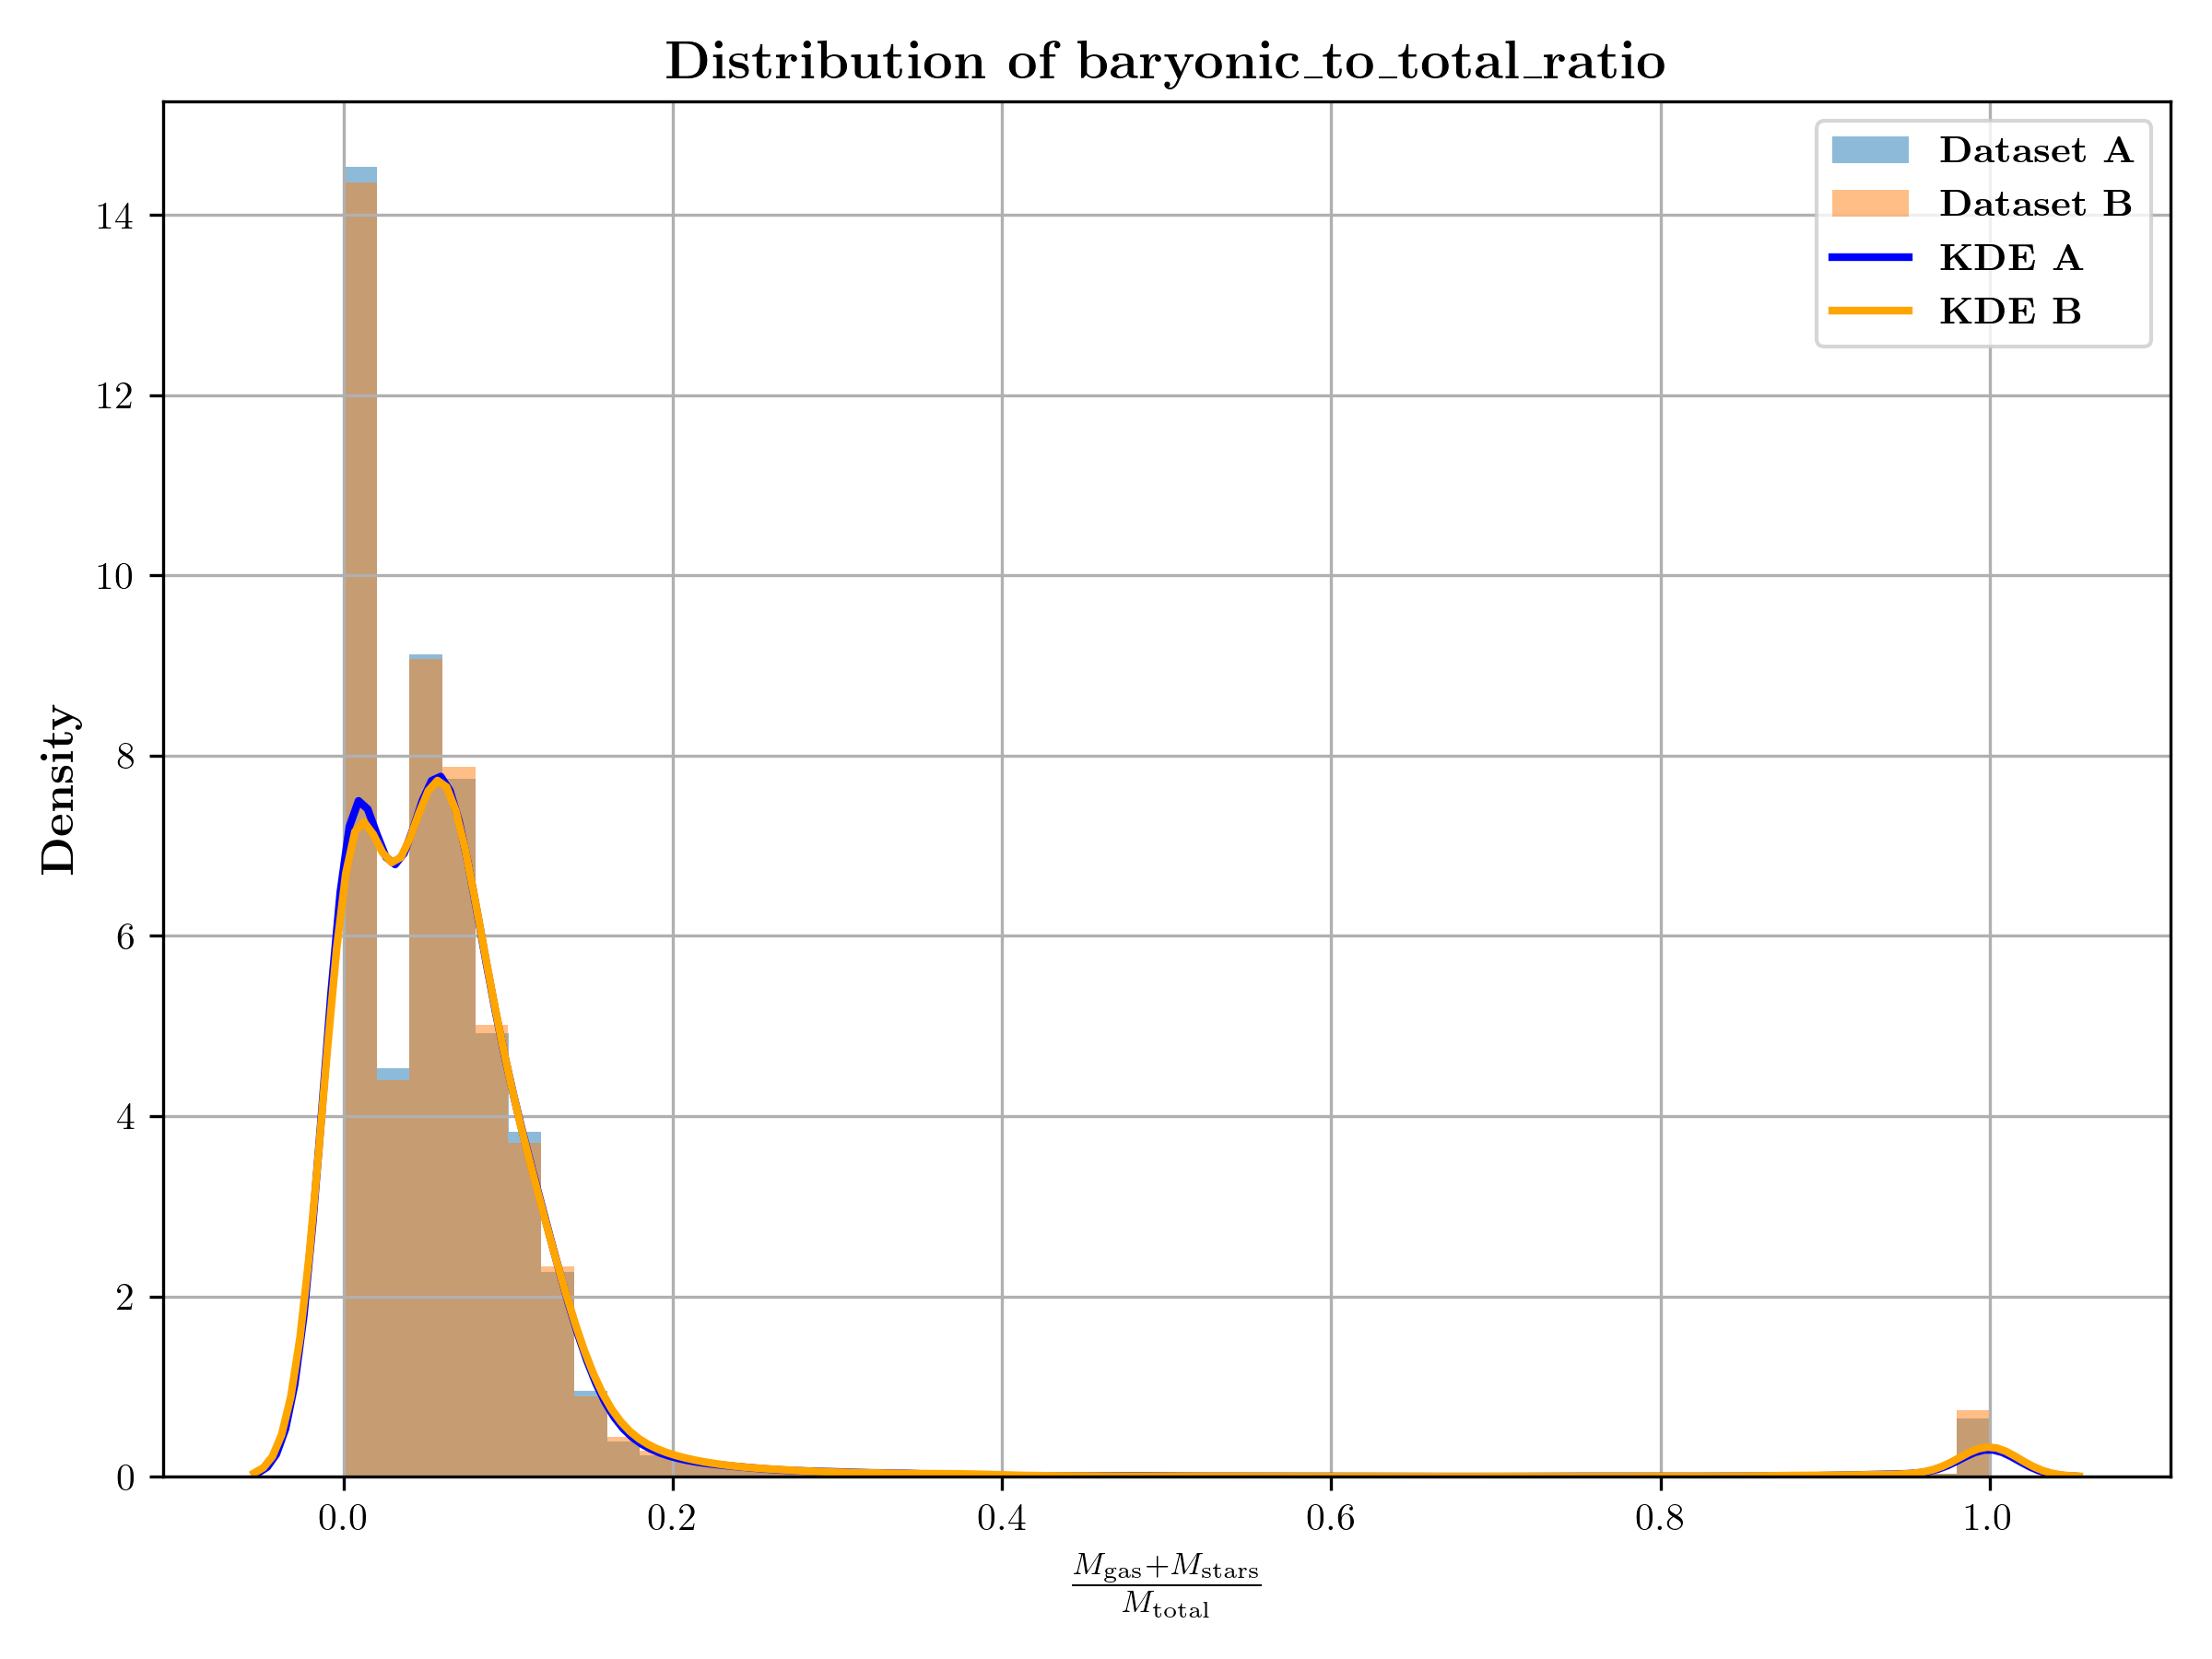

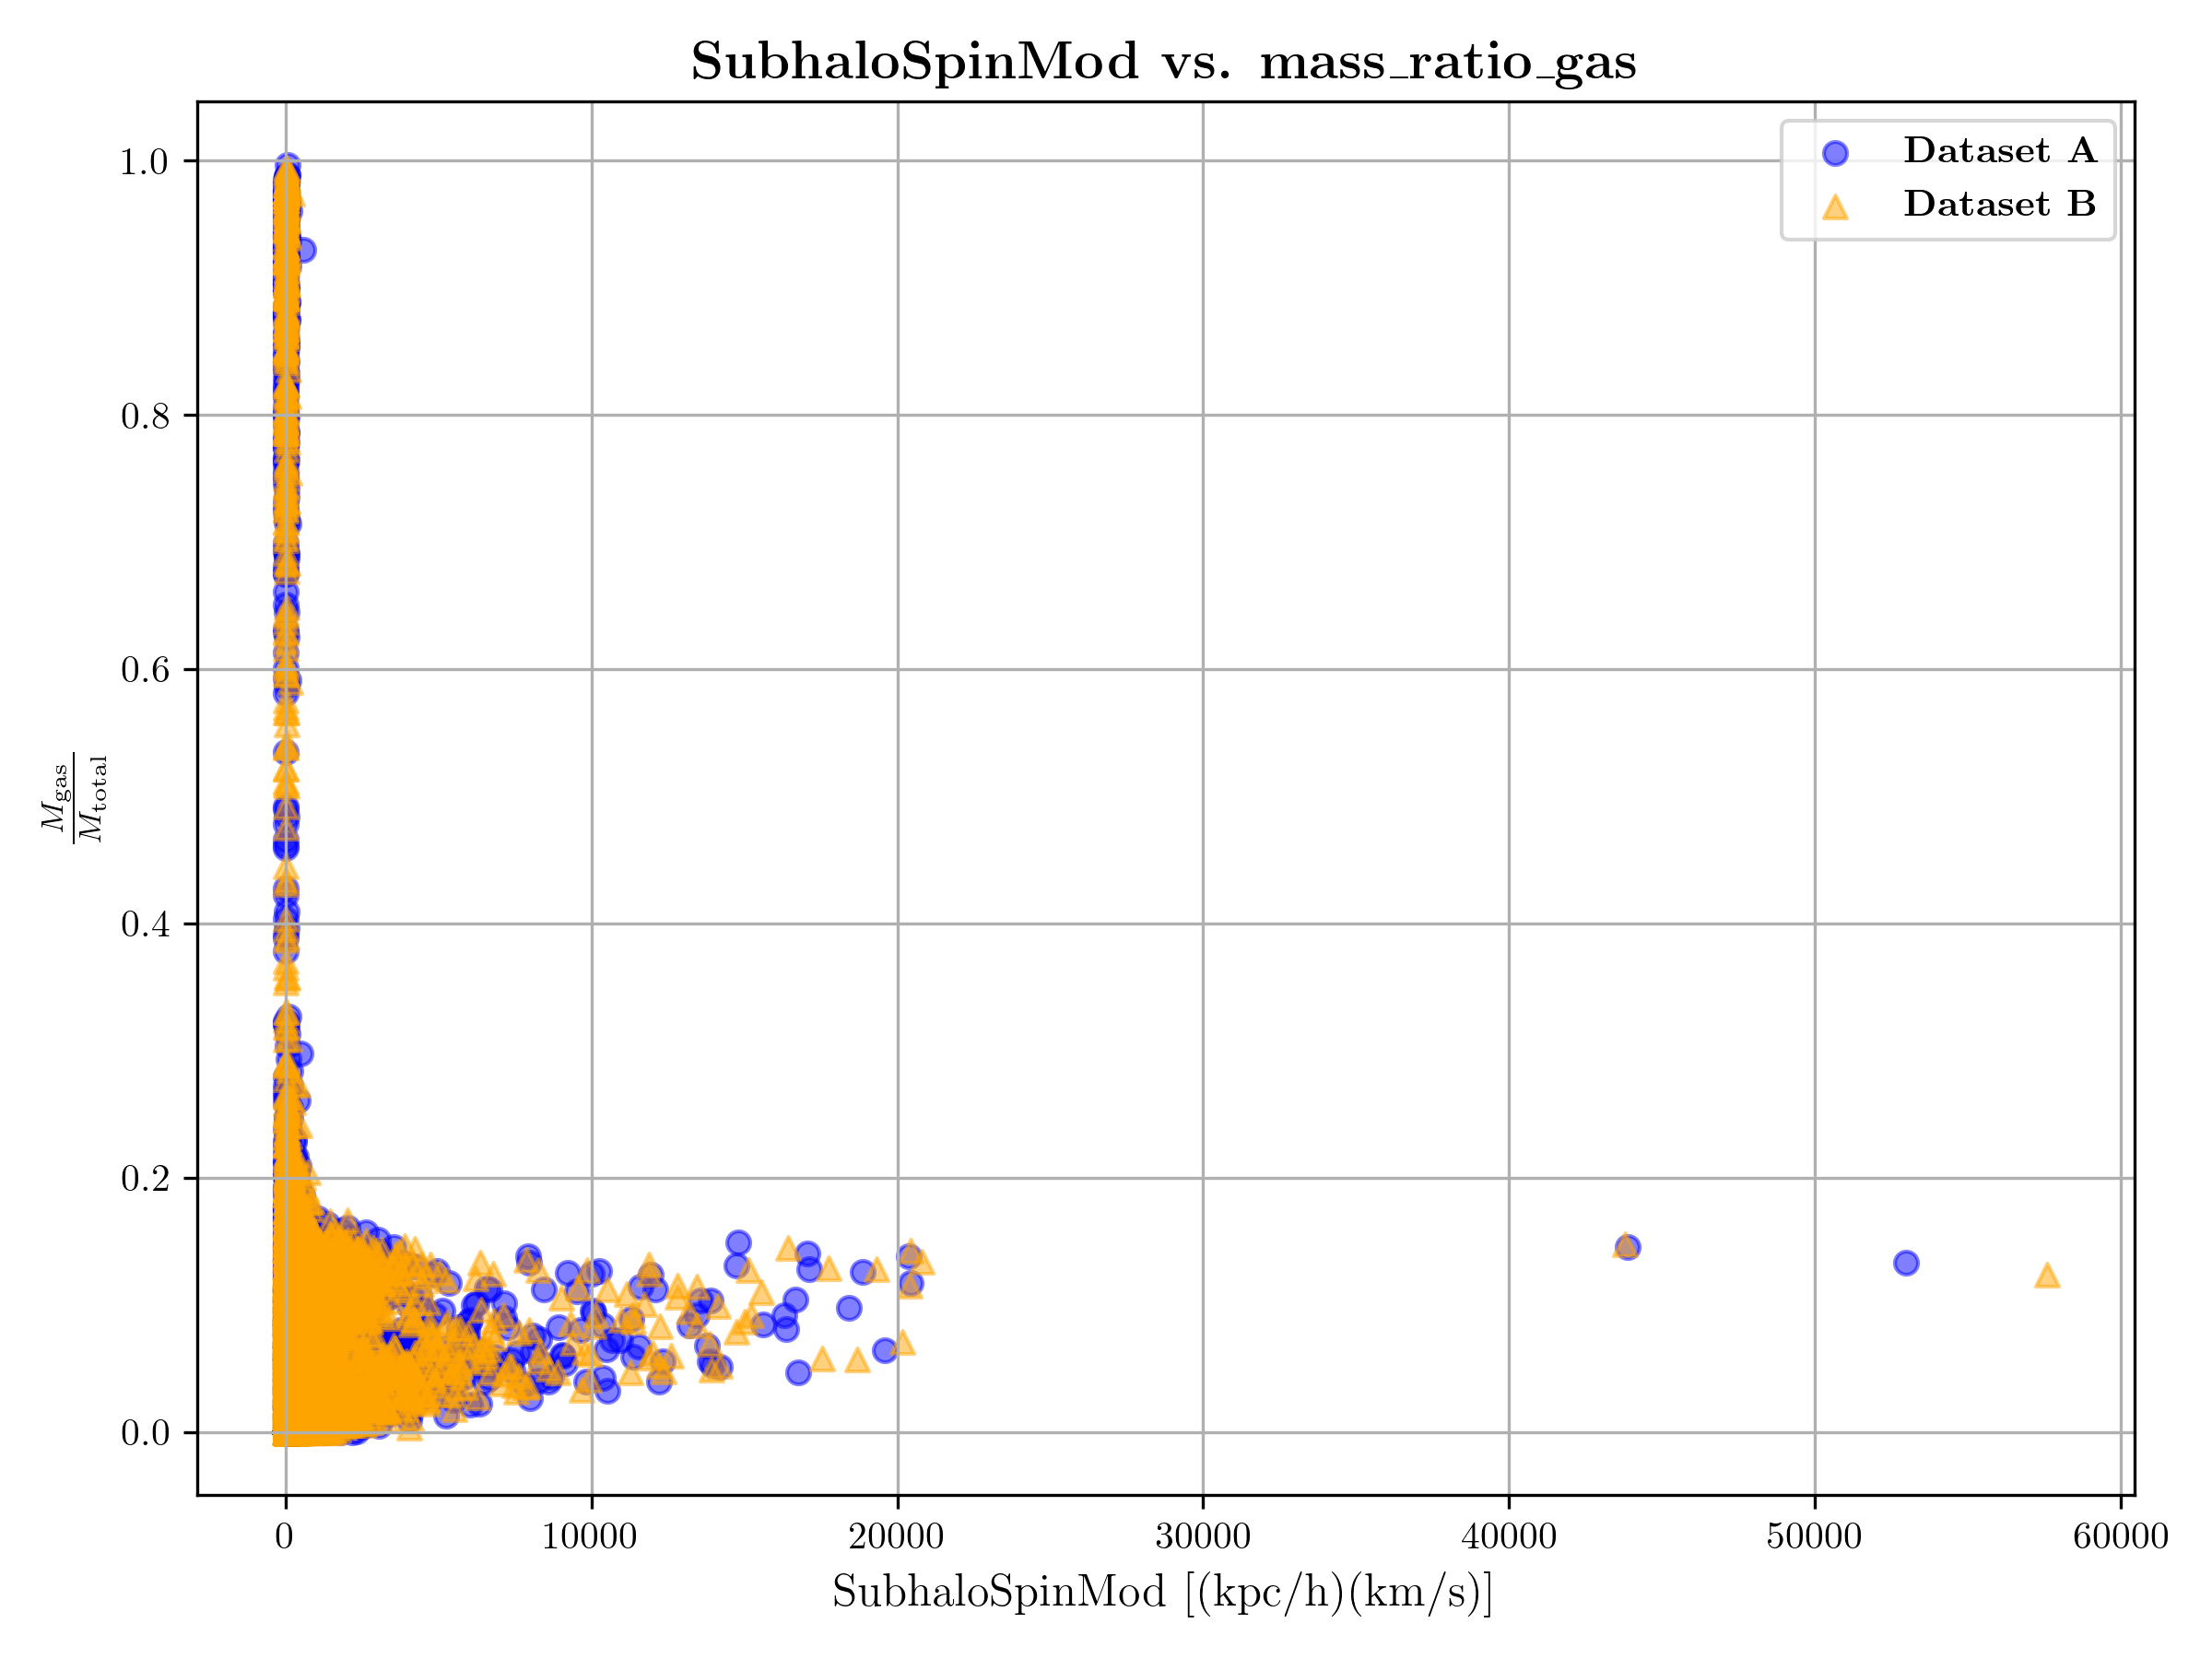

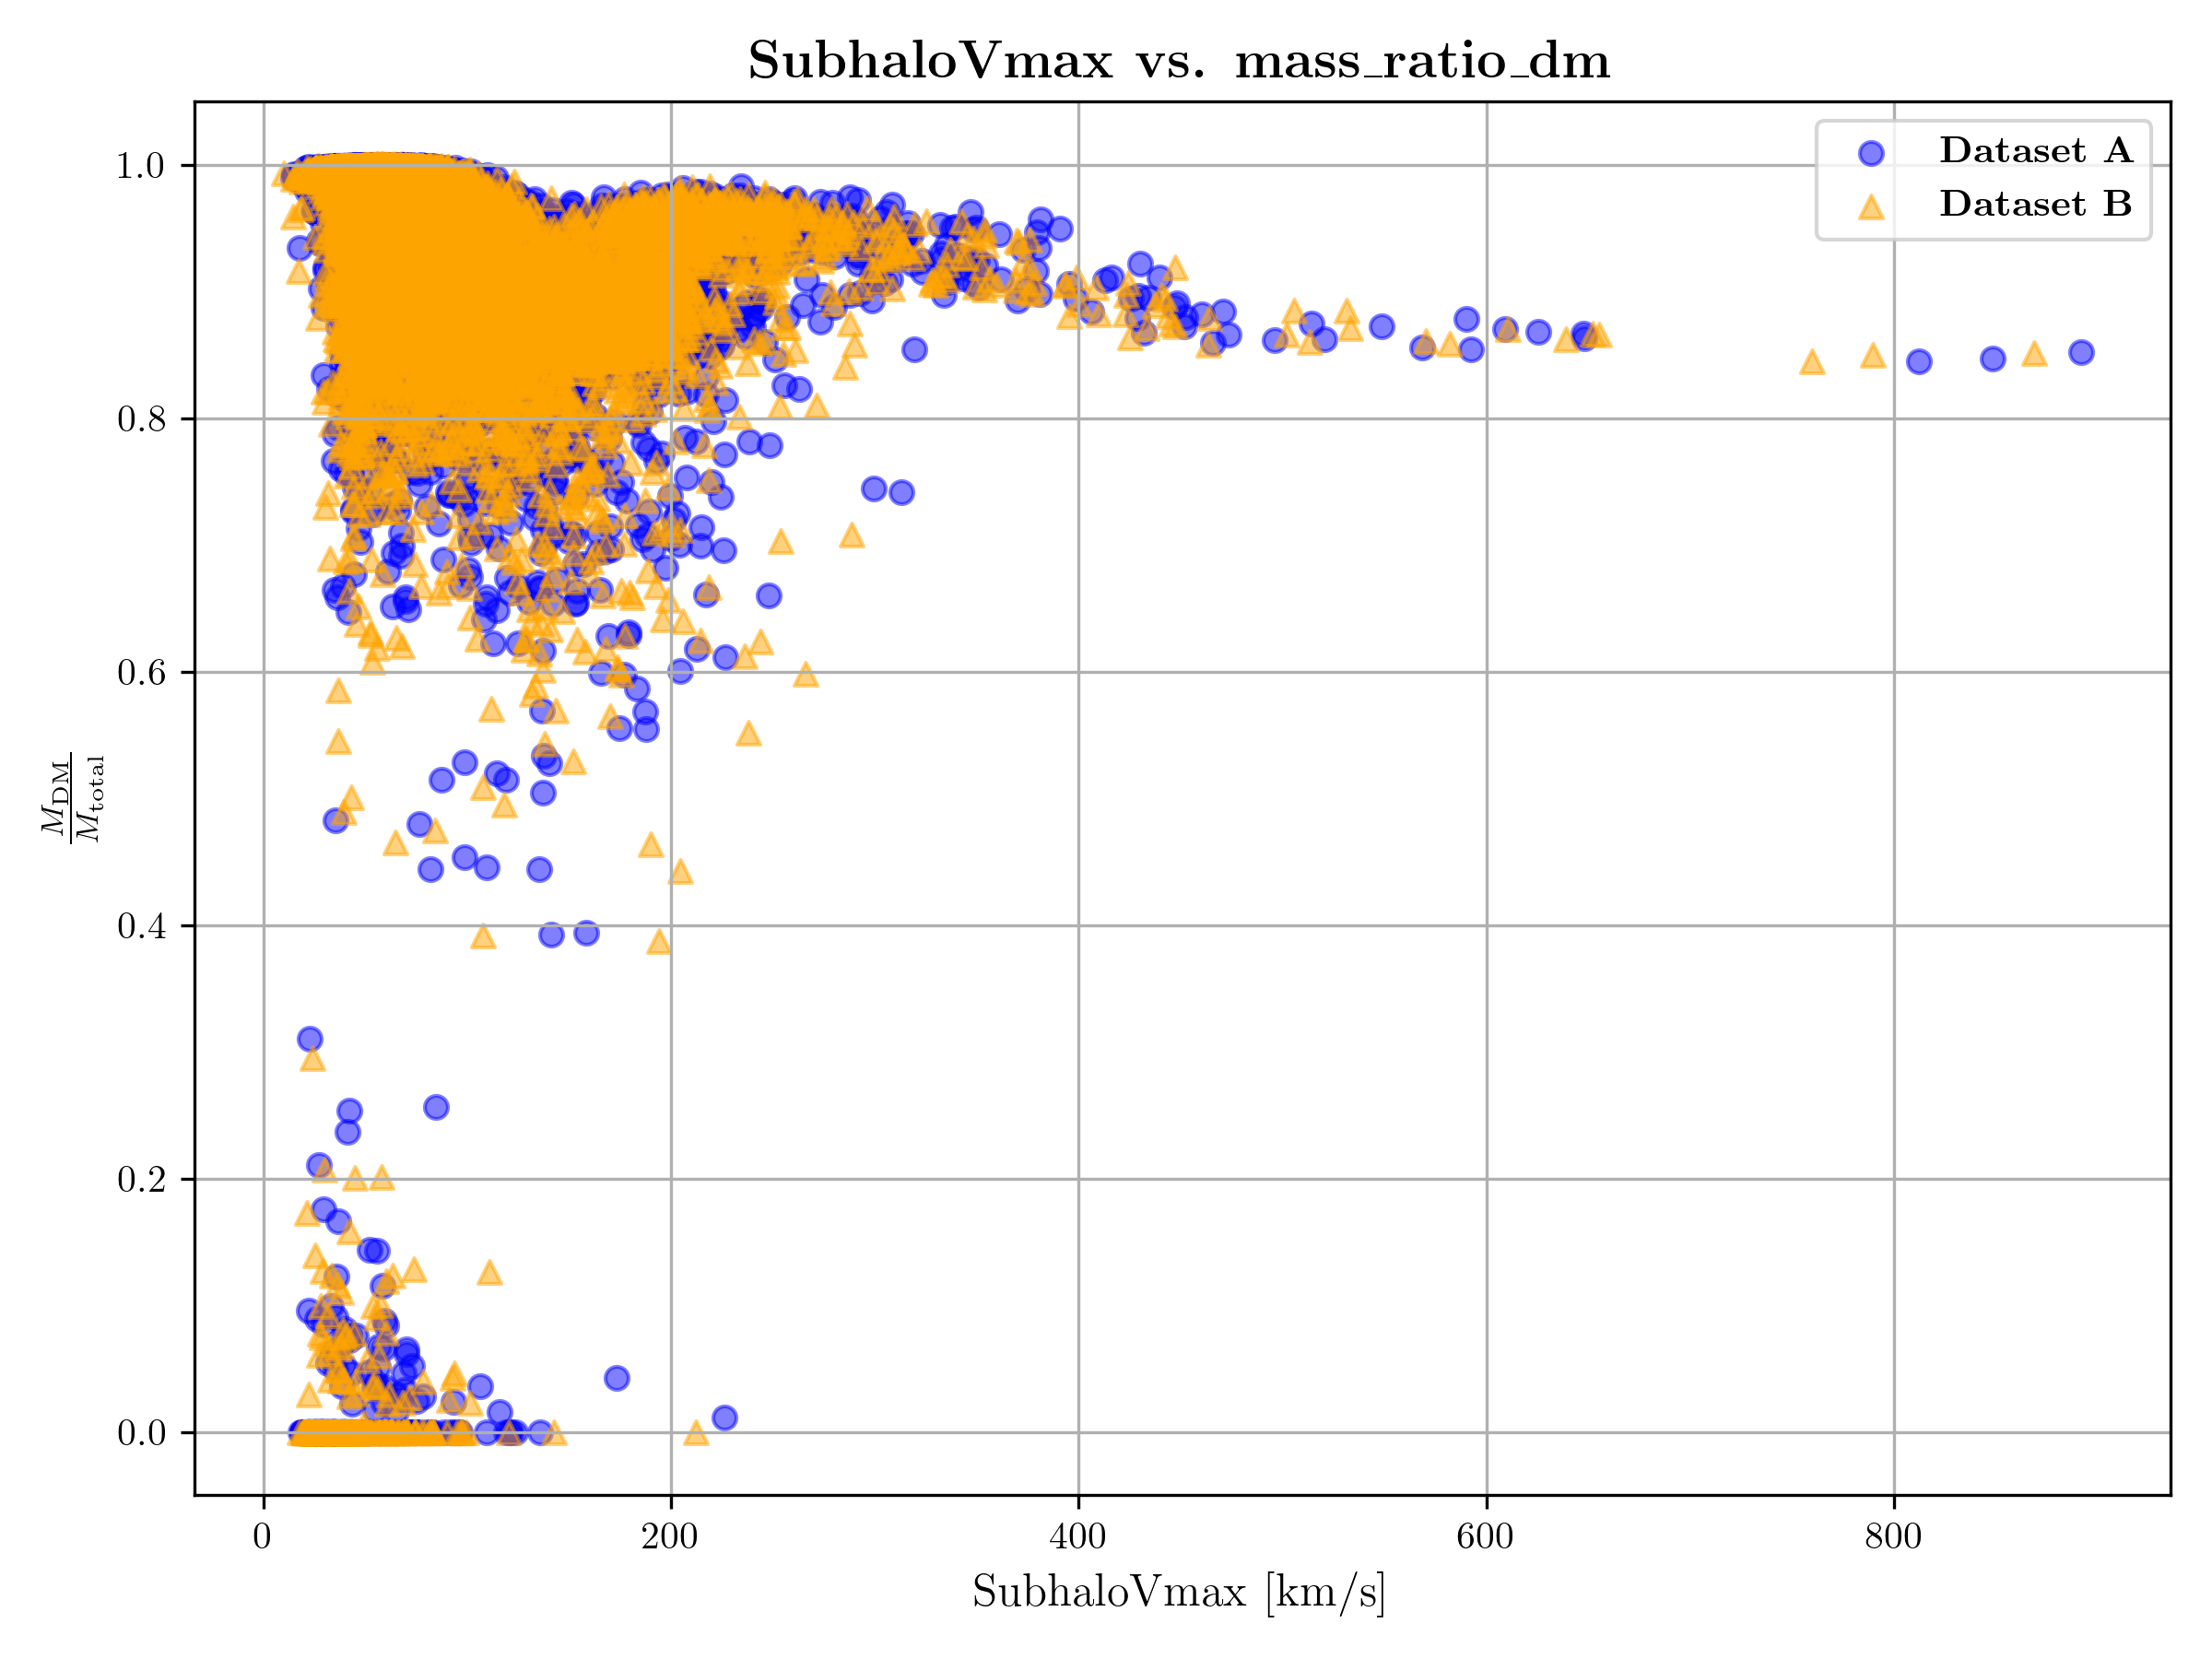

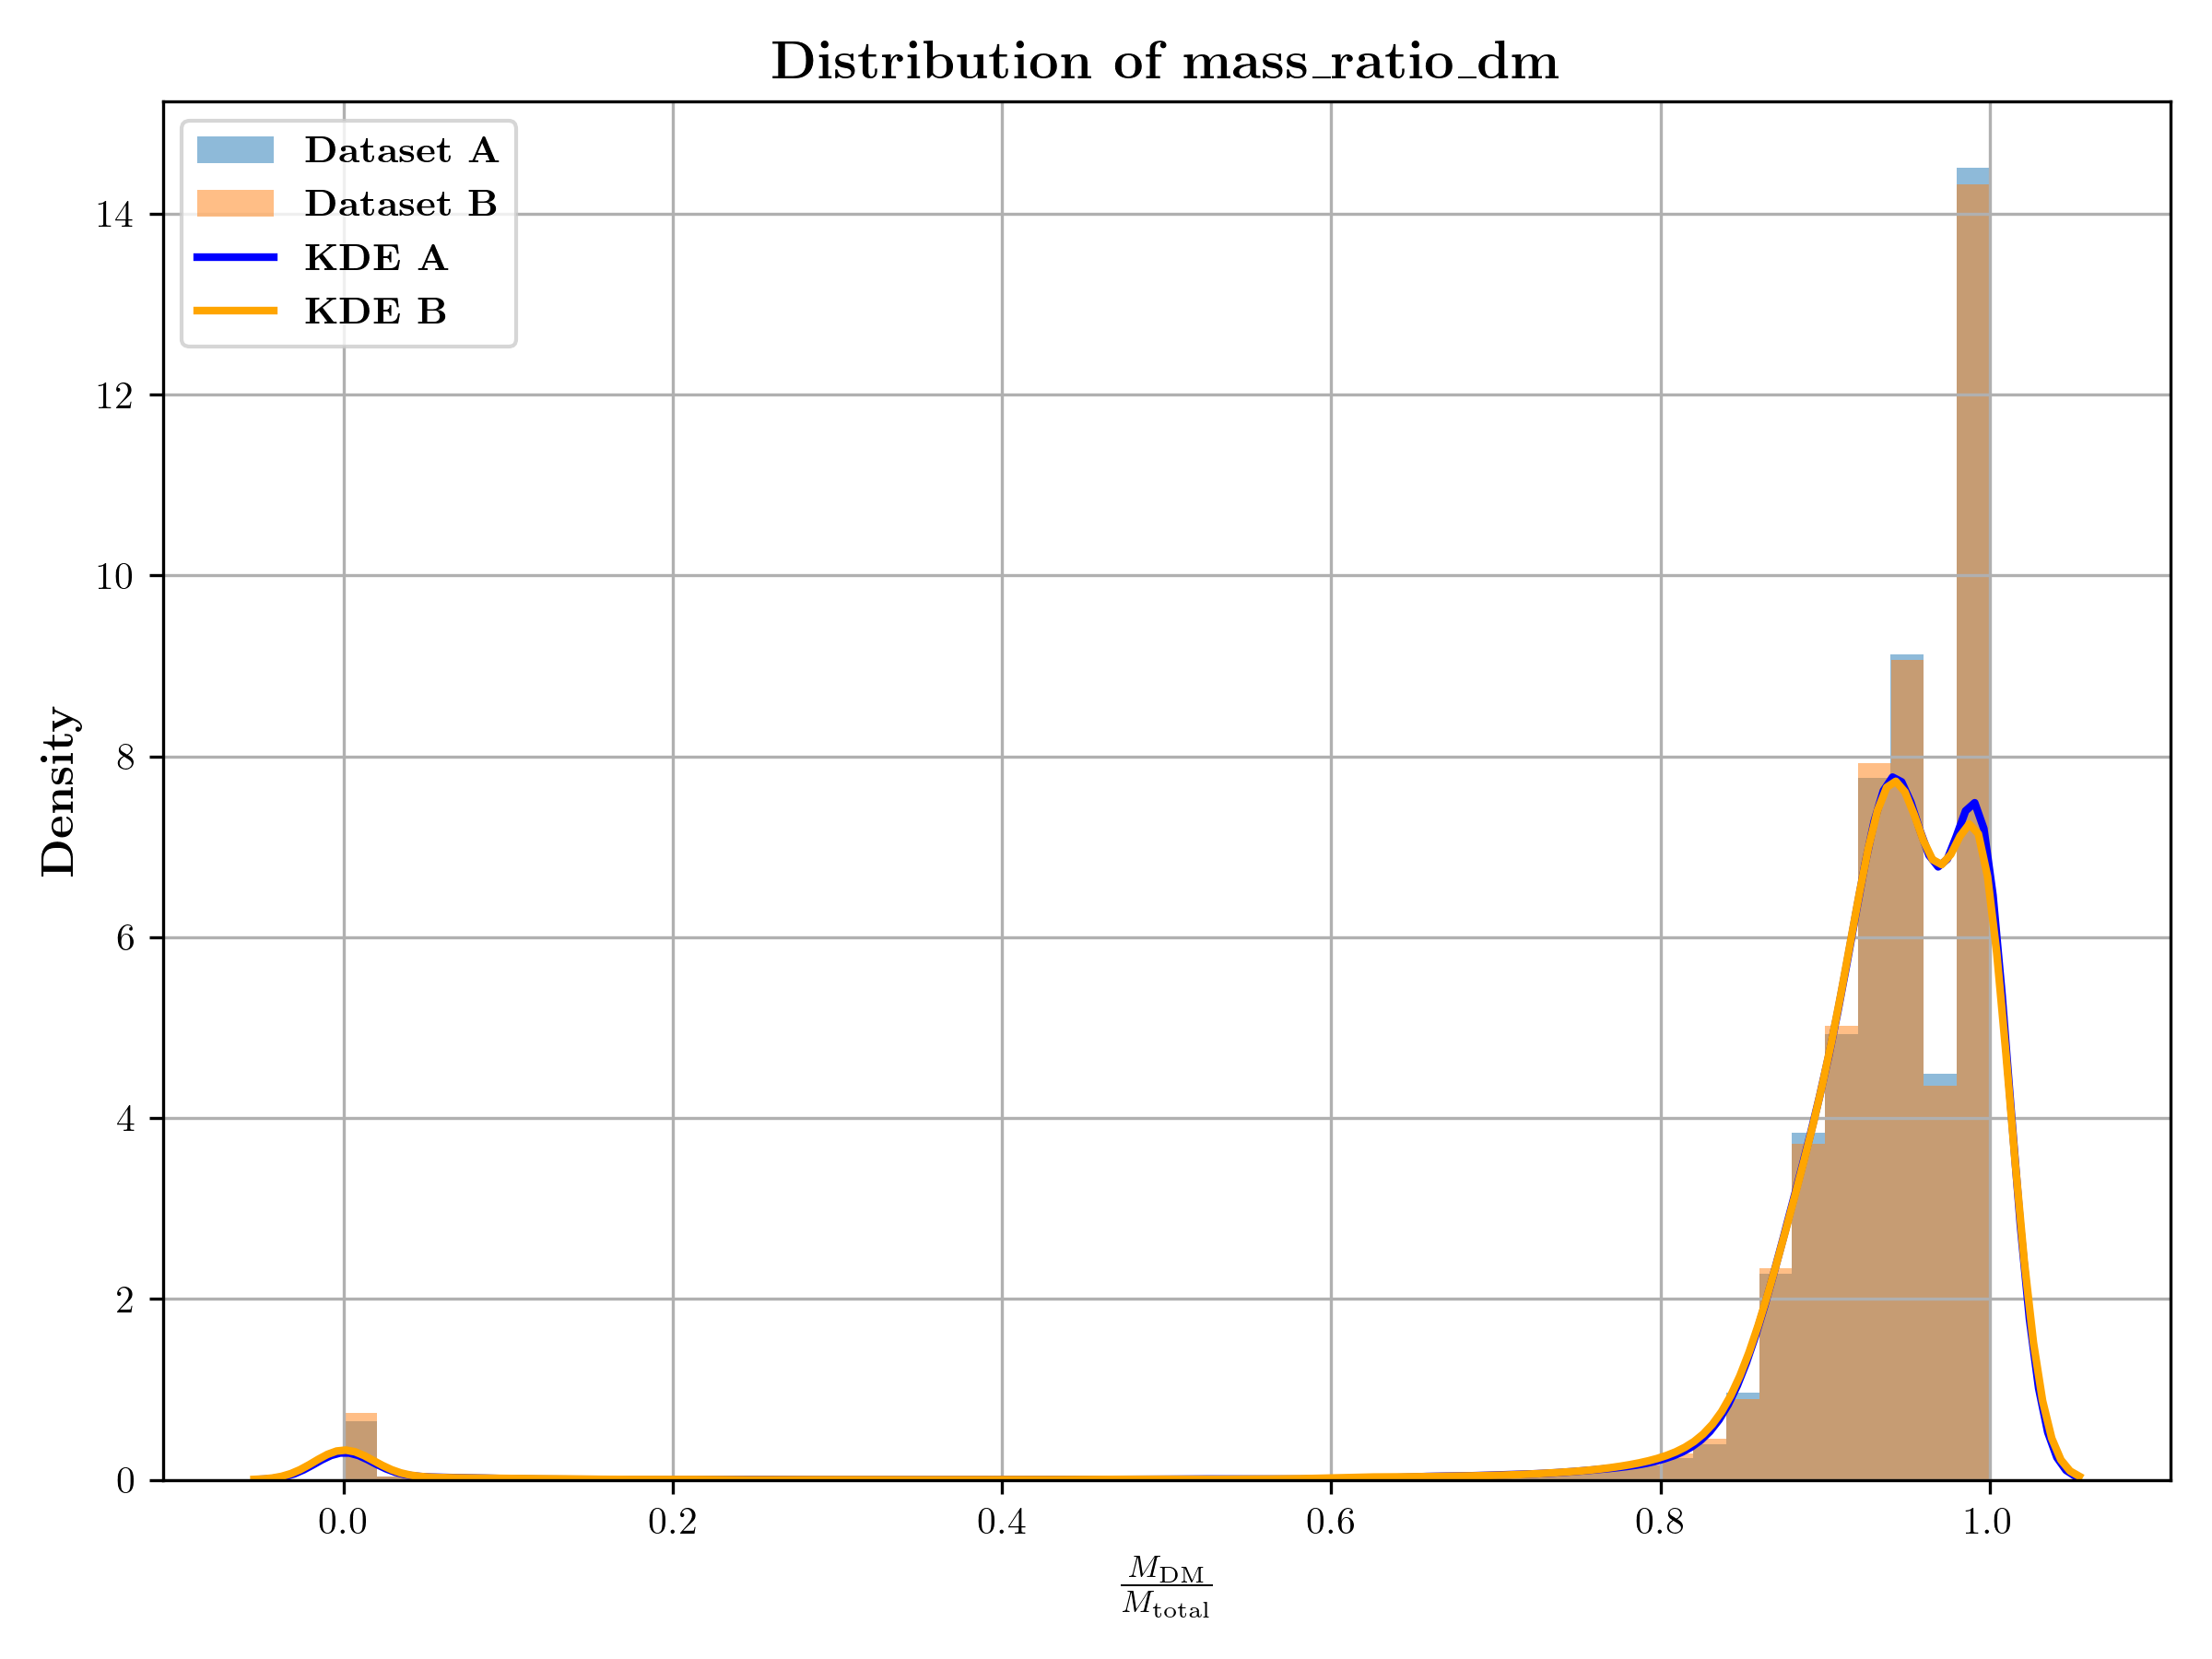

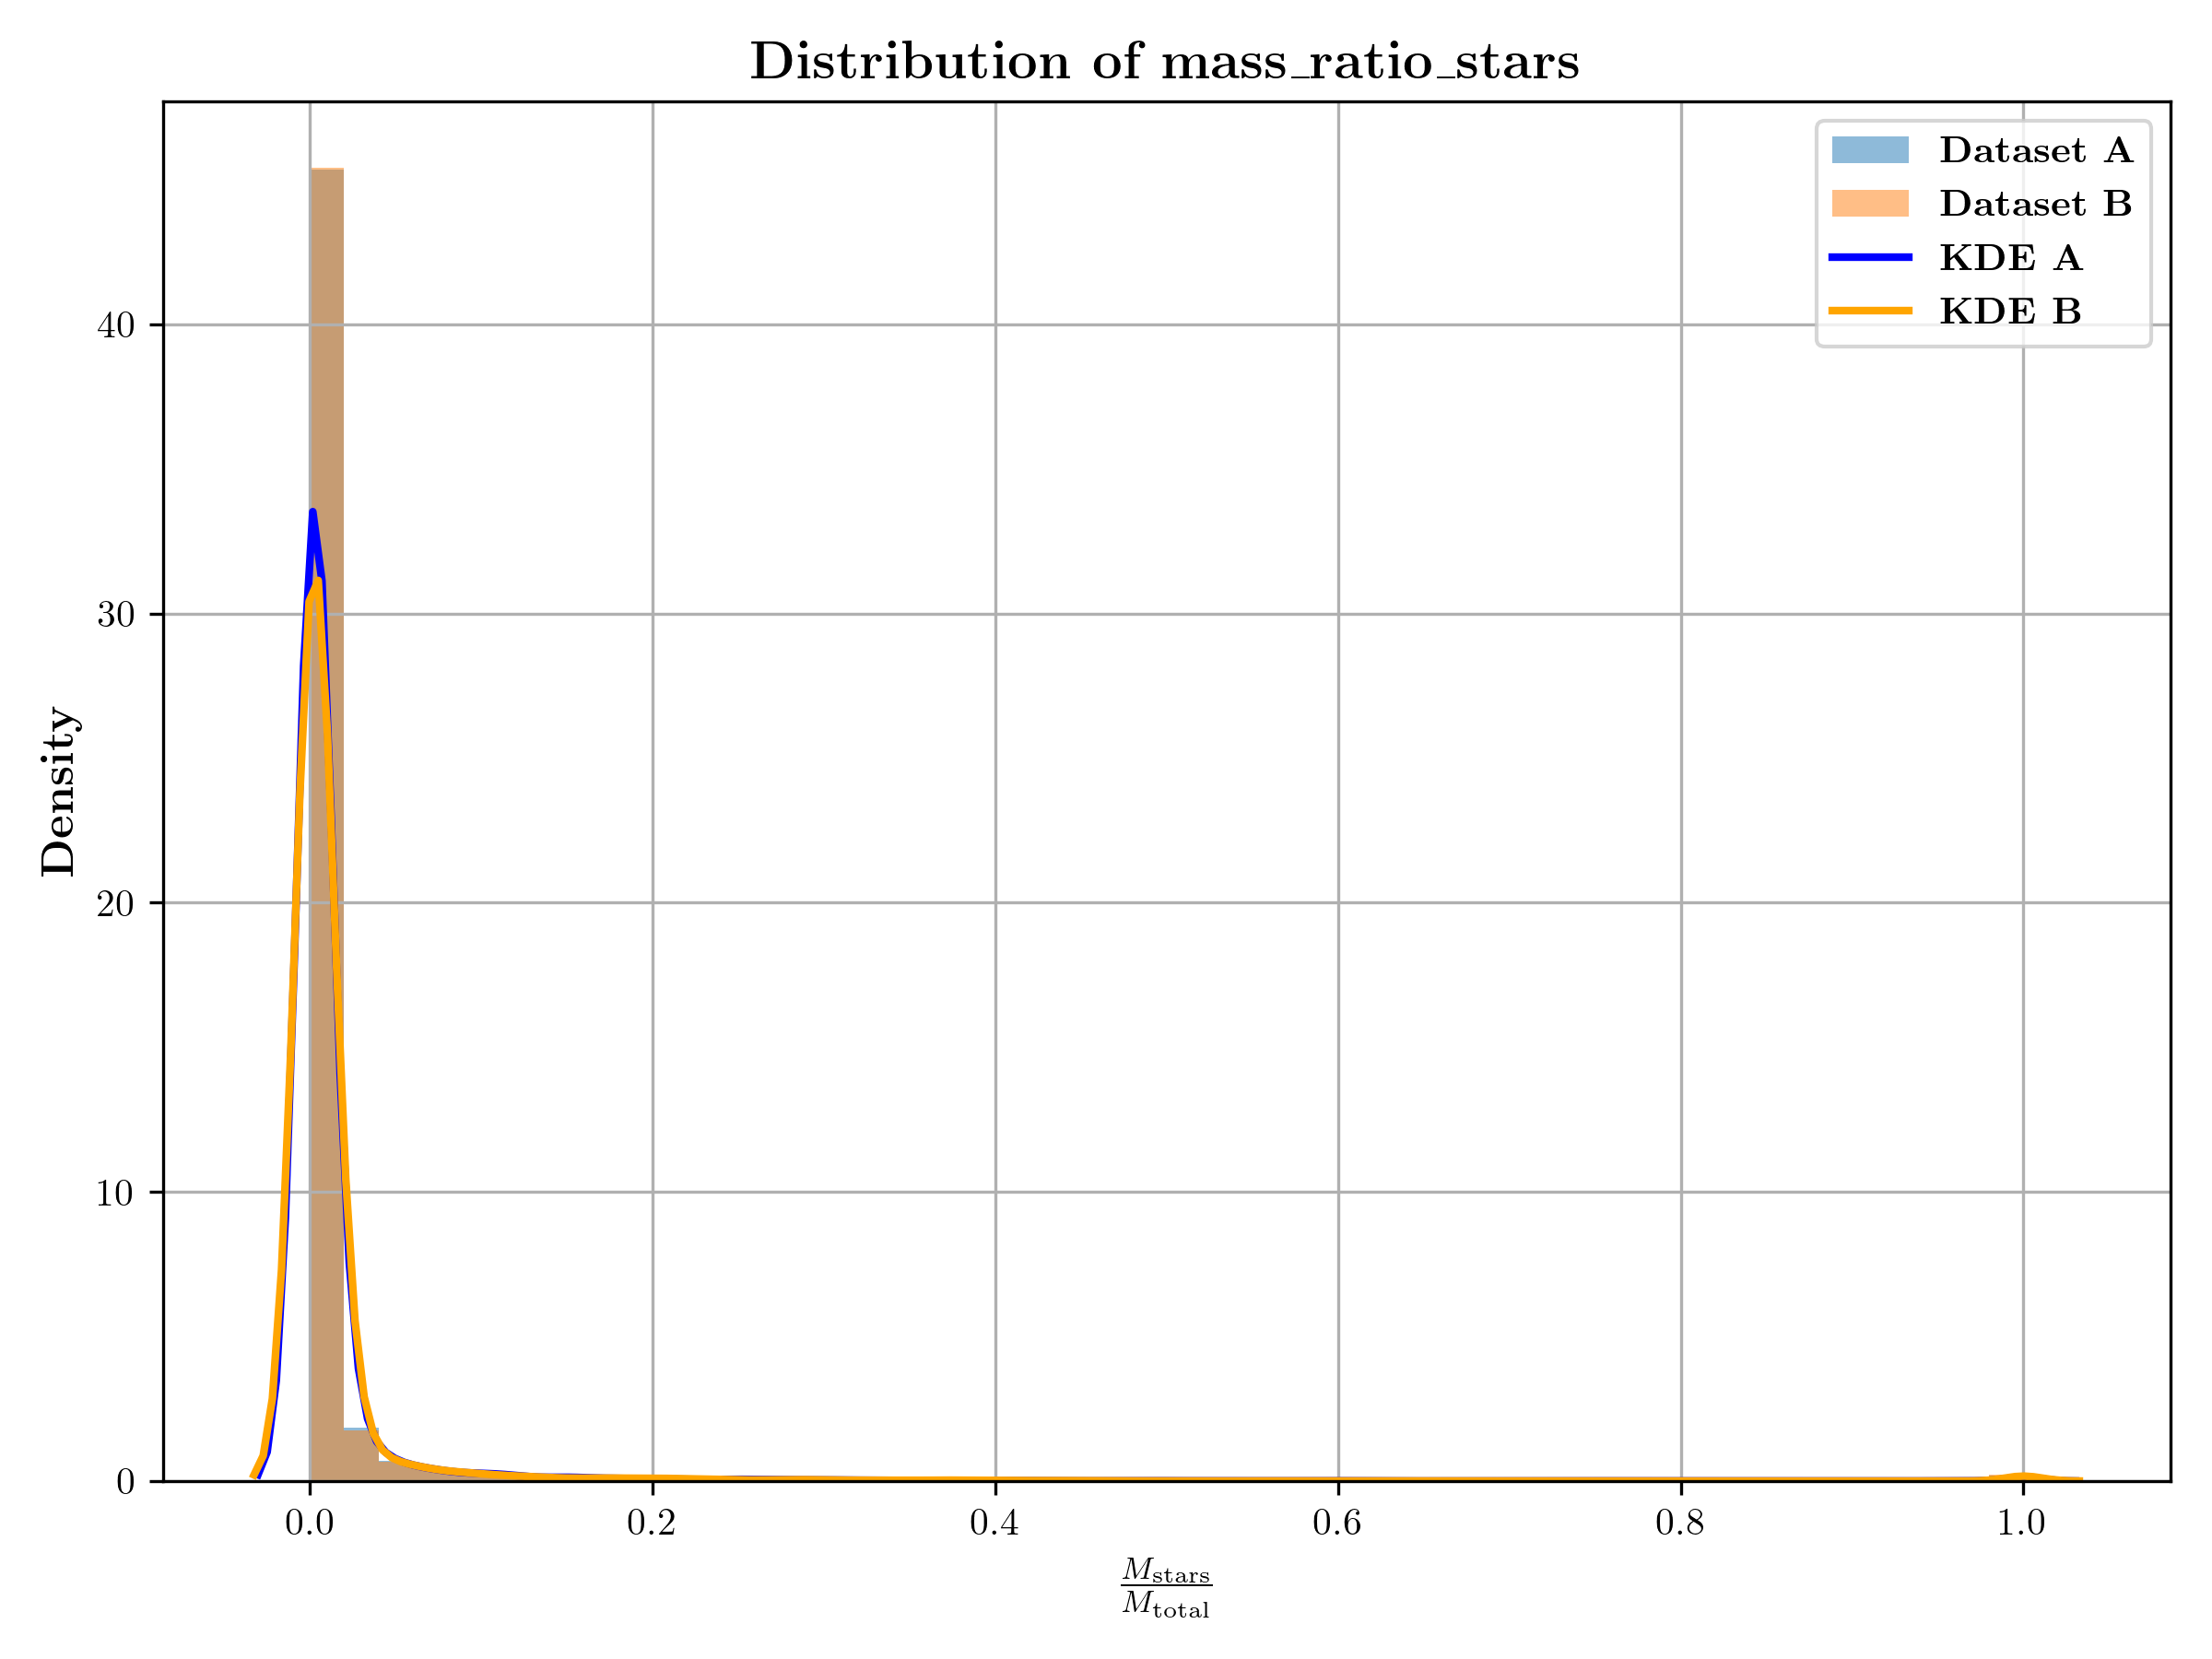

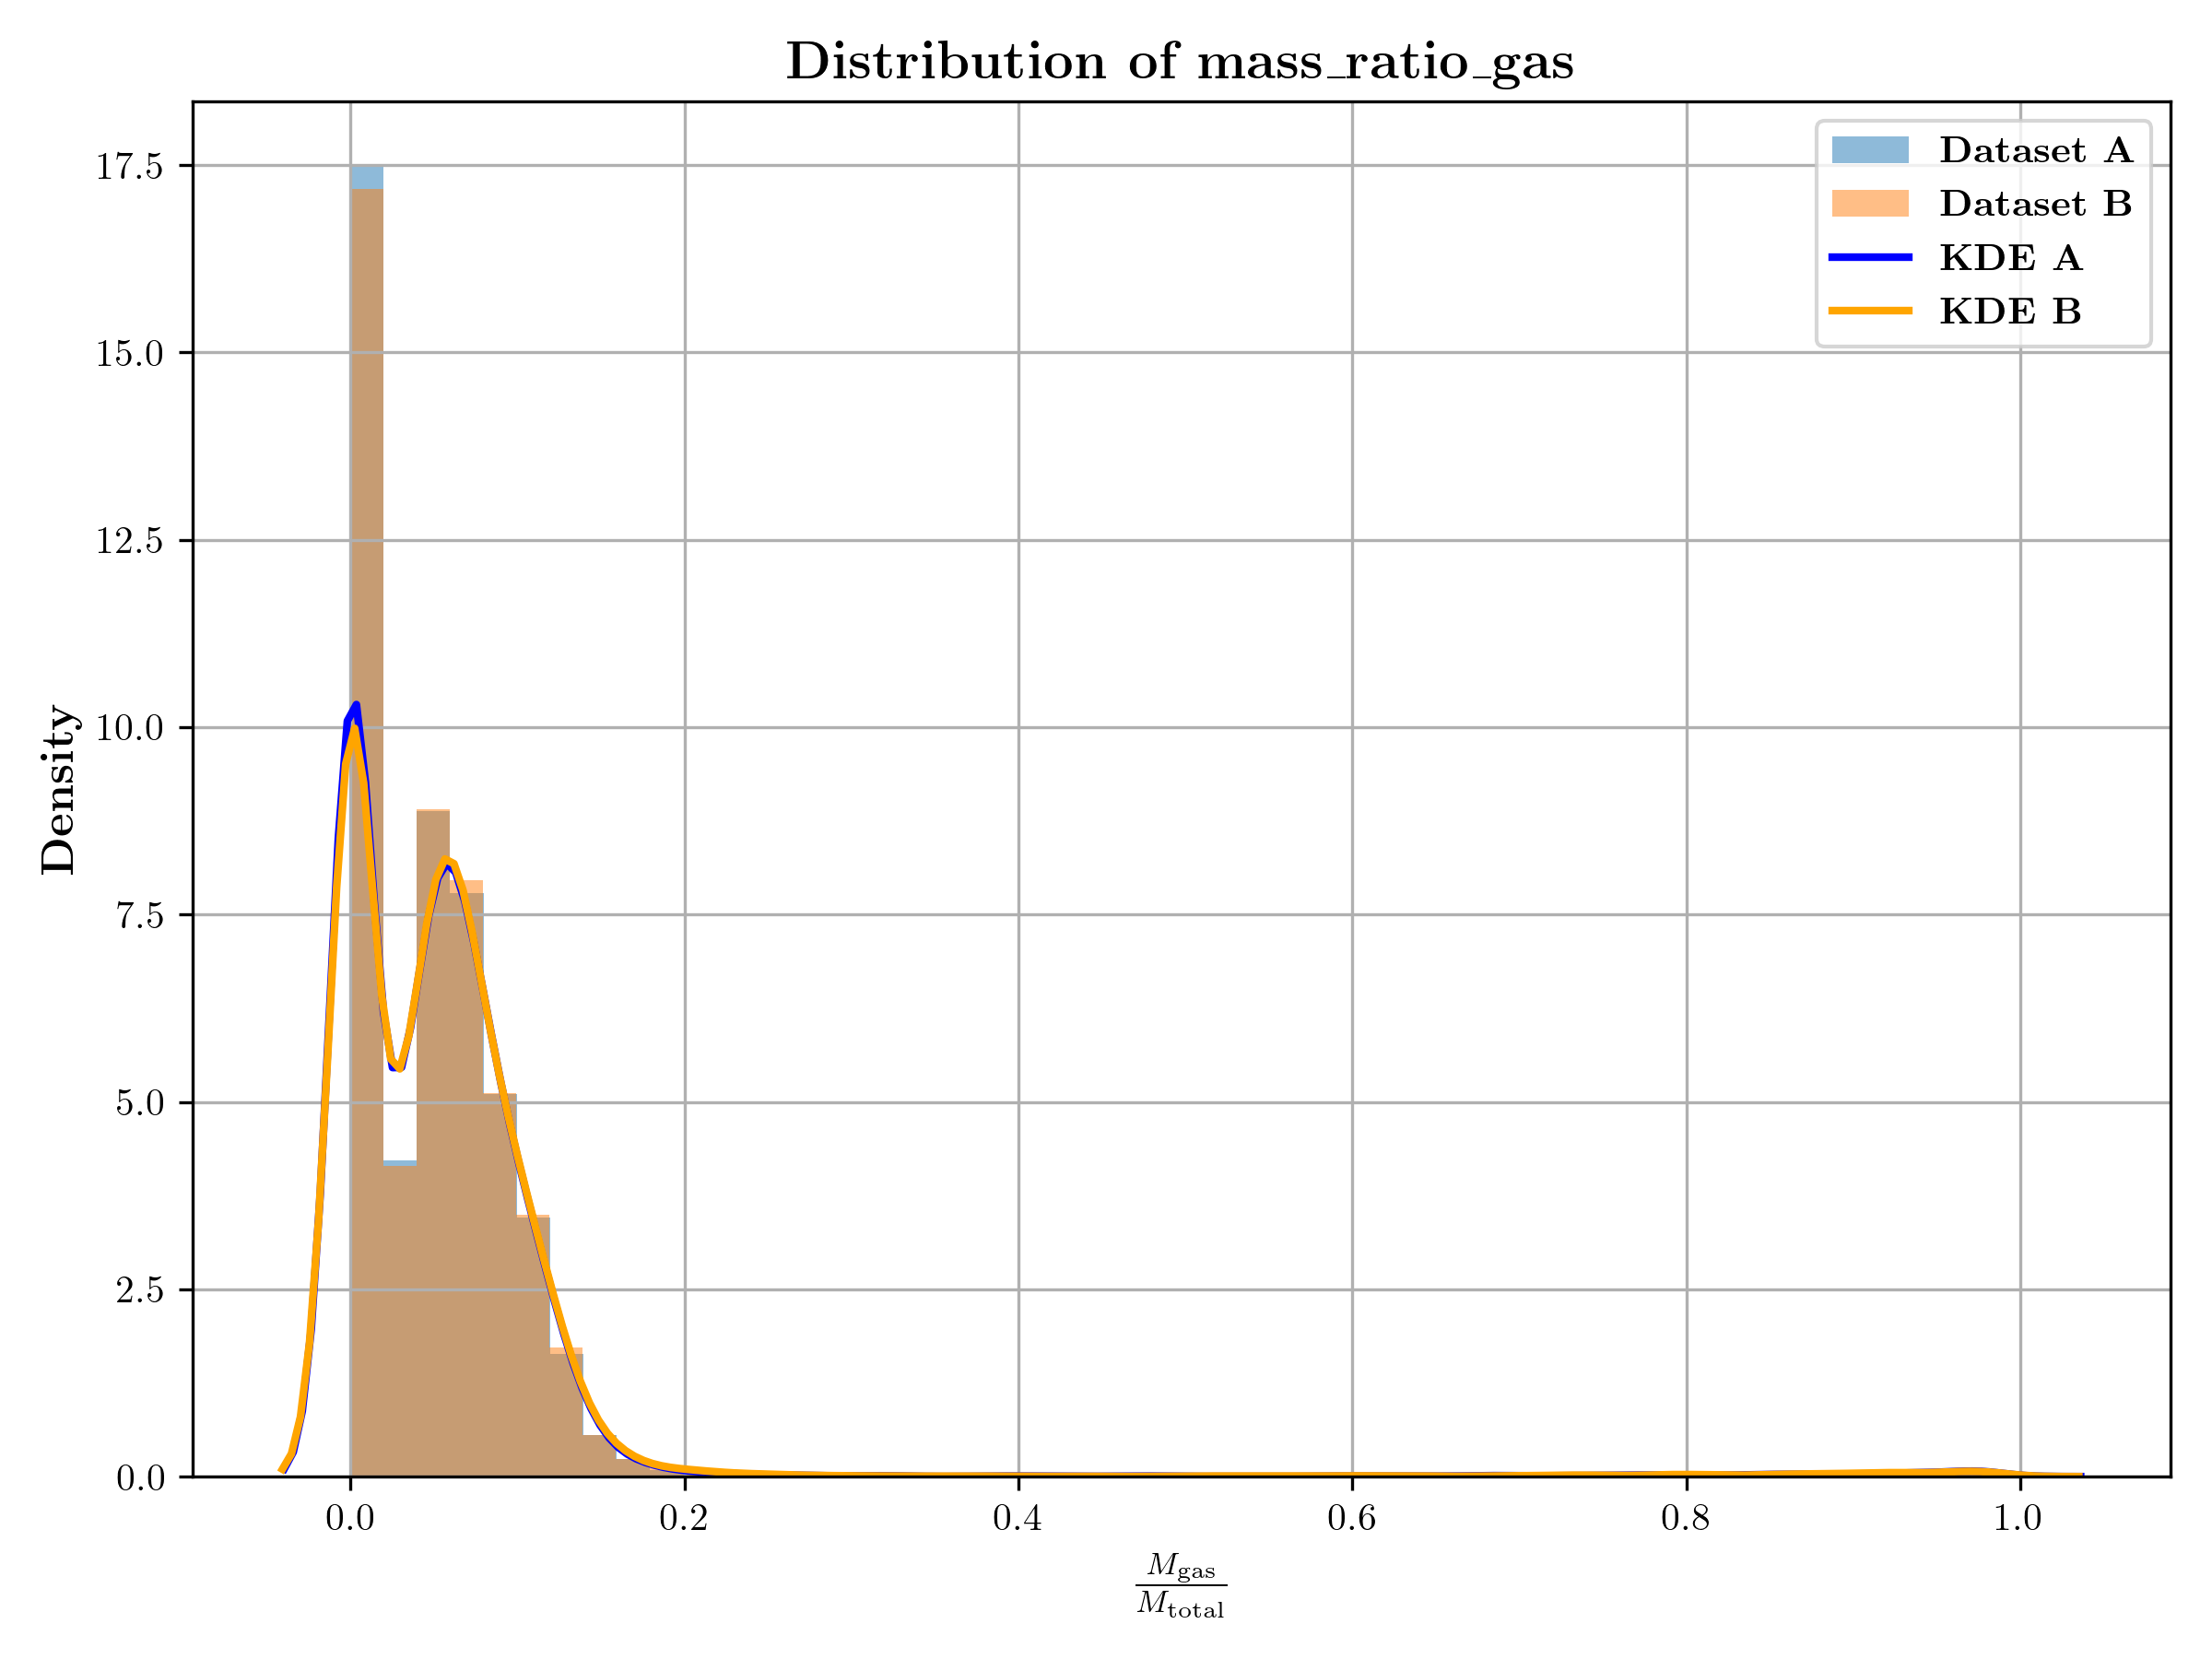

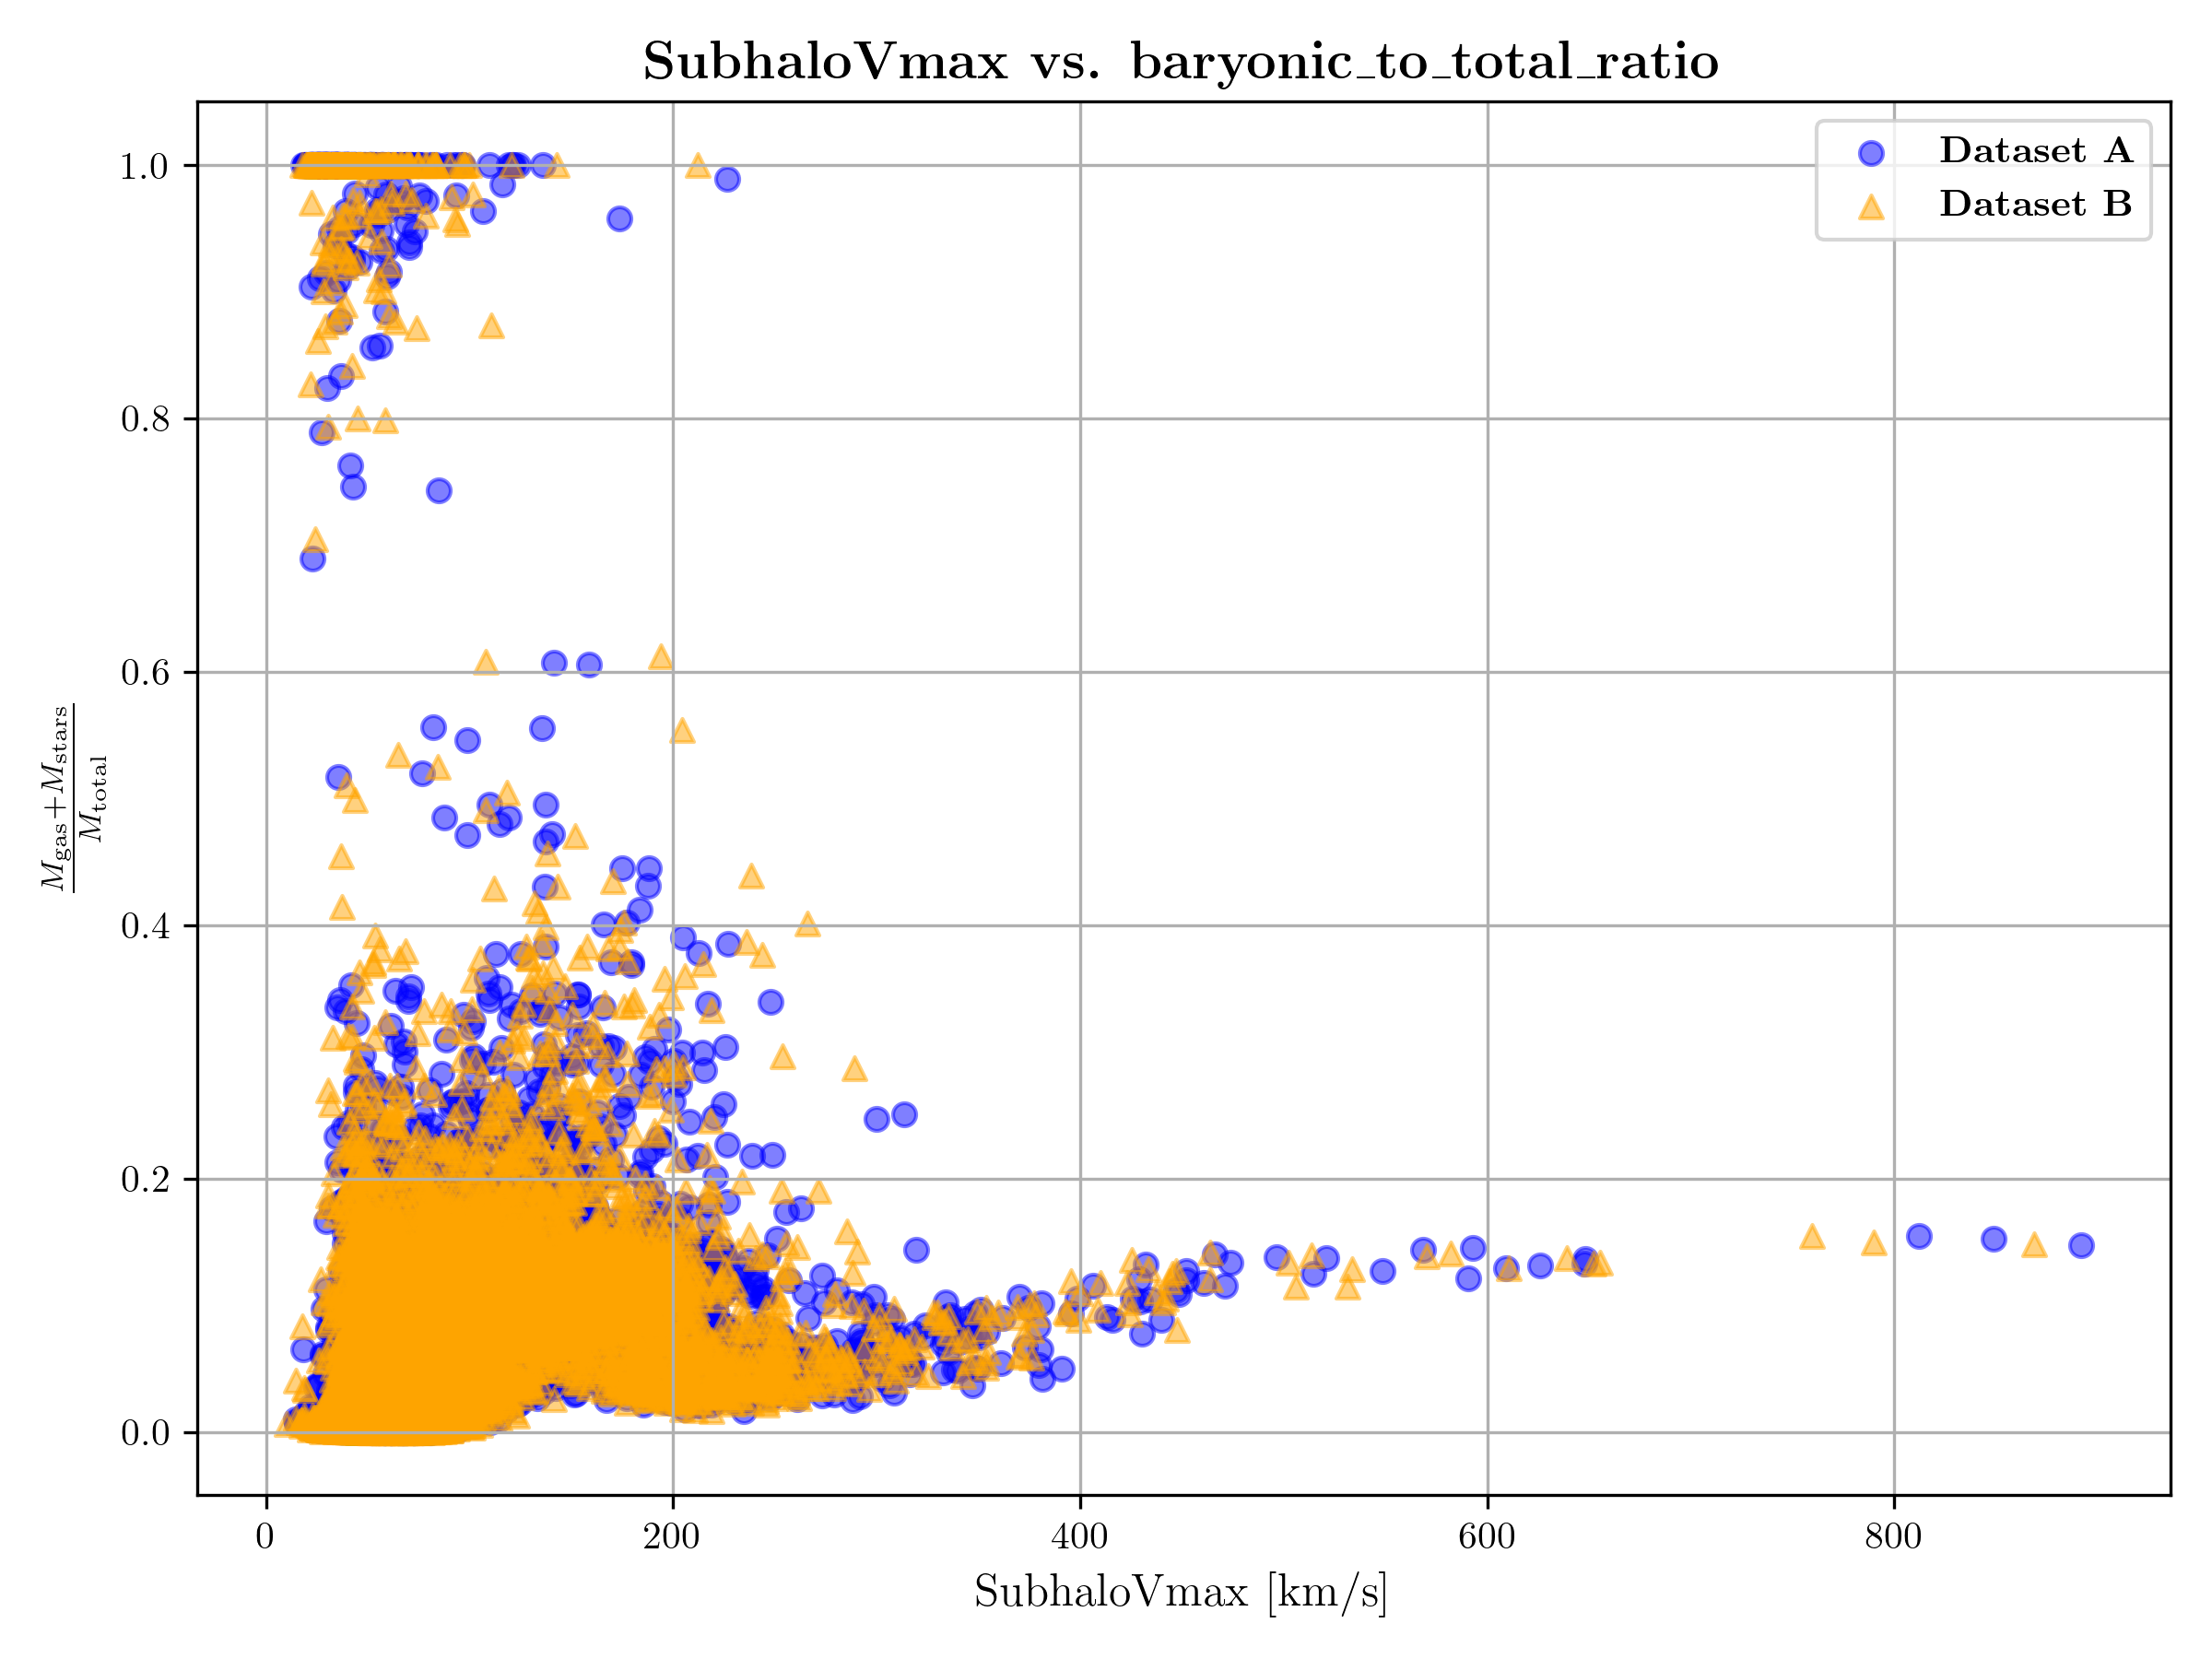


**Step number:** 2 out of 6.
 
**Sub-task:** Perform statistical analysis and visualize the distributions of mass ratios and baryonic properties.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Generate histograms and kernel density estimates (KDEs) for the gas, dark matter, and star mass ratios, as well as the baryonic-to-total mass ratio, for both datasets.
- Overlay the histograms or KDEs for datasets A and B to directly compare their distributions.
- Compute and display summary statistics (mean, median, standard deviation) for the mass ratios and baryonic properties in both datasets.
- Create scatter plots to explore relationships between mass ratios, baryonic properties, and other features like `SubhaloSpinMod` and `SubhaloVmax`.
- Save all plots and statistical summaries for interpretation.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 3 out of 6.
 
**Sub-task:** Analyze the differences in mass ratios, baryonic properties, and their relationships with other features.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Compare the distributions of gas, dark matter, and star mass ratios, as well as baryonic-to-total mass ratios, between datasets A and B.
- Analyze the statistical significance of the differences observed between datasets A and B using appropriate statistical tests (e.g., Kolmogorov-Smirnov test).
- Interpret the statistical differences in the mass ratios and baryonic properties, and their implications for the impact of primordial non-Gaussianity (fNL=200 vs. fNL=-200).
- Discuss the trends observed in scatter plots, particularly the relationships between mass ratios, baryonic properties, and features like `SubhaloSpinMod` and `SubhaloVmax`.
- Highlight any significant findings or anomalies.
 
**Status:** in progress ⏳
    


Calling researcher...



Message from researcher:




Forwarding content...



Calling researcher_response_formatter...



Message from researcher_response_formatter:

**Markdown:**

```markdown
<!-- filename: step3_analysis.md -->
### Step 3: Analysis of Differences and Relationships

#### 1. **Comparing Distributions**

- **Visual Comparison:**  
  Begin by closely examining the overlayed histograms and KDE plots generated in Step 2. Look for any shifts in the central tendency (medians), differences in spread (standard deviations), or any signs of skewness in the distributions for each of the following:
  - Gas mass ratio
  - Dark matter mass ratio
  - Star mass ratio
  - Baryonic-to-total mass ratio

  Pay special attention to any differences in the tails of these distributions (which may hint at rare but significant events or anomalies).

- **Descriptive Statistics:**  
  Use the summary statistics (mean, median, and standard deviation) as a starting point to quantify these observations. If the summary statistics for datasets A (fNL=200) and B (fNL=-200) are notably different, these differences can hel

Message from control:




**Step number:** 3 out of 6.
 
**Sub-task:** Analyze the differences in mass ratios, baryonic properties, and their relationships with other features.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Compare the distributions of gas, dark matter, and star mass ratios, as well as baryonic-to-total mass ratios, between datasets A and B.
- Analyze the statistical significance of the differences observed between datasets A and B using appropriate statistical tests (e.g., Kolmogorov-Smirnov test).
- Interpret the statistical differences in the mass ratios and baryonic properties, and their implications for the impact of primordial non-Gaussianity (fNL=200 vs. fNL=-200).
- Discuss the trends observed in scatter plots, particularly the relationships between mass ratios, baryonic properties, and features like `SubhaloSpinMod` and `SubhaloVmax`.
- Highlight any significant findings or anomalies.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 4 out of 6.
 
**Sub-task:** Investigate the correlation structure of mass ratios, baryonic properties, and other features, including metallicity.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Compute correlation matrices for the mass ratios, baryonic properties, and other subhalo features (e.g., `SubhaloSpinMod`, `SubhaloVmax`, `SubhaloVelDisp`, `SubhaloGasMetallicity`, `SubhaloStarMetallicity`).
- Visualize the correlations using heatmaps for both datasets.
- Identify and highlight strong correlations or notable differences between datasets A and B.
- Save the correlation matrices and heatmaps for interpretation.
 
**Status:** in progress ⏳
    


Calling engineer...



Message from engineer:




Forwarding content...



Calling engineer_response_formatter...



Message from engineer_response_formatter:



**Code Explanation:**

This script computes and visualizes the correlation matrices for mass ratios, baryonic properties, and other subhalo features from the processed CAMELS datasets. It generates annotated heatmaps and saves them along with the correlation matrices for further analysis.

**Python Code:**

```python
# filename: codebase/visualize_correlations.py
"""
This module investigates the correlation structure of mass ratios, baryonic properties,
and other subhalo features (including dynamical and metallicity properties) in the CAMELS datasets.

The script performs the following tasks:
  - Loads the processed subhalo datasets for Dataset A and Dataset B from CSV files.
  - Extracts key features:
      * Computed features: mass_ratio_gas, mass_ratio_dm, mass_ratio_stars, baryonic_to_total_ratio.
      * Original features: SubhaloSpinMod, SubhaloVmax, SubhaloVelDisp, SubhaloGasMetallicity, SubhaloStarMetallicity.
  - Computes correlation matrices for these features for both datasets.
  - Saves the correlation matrices as CSV files.
  - Visualizes the correlation matrices using annotated heatmaps.
  - Saves the heatmap plots in the "data/" folder with filenames containing the plot name, number, and timestamp.
  
Units:
  - Mass ratios and derived ratios are dimensionless.
  - Dynamical properties and metallicity are as provided in the dataset.

Dependencies:
  - pandas, numpy, matplotlib, seaborn, os, datetime.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import rcParams

# Enable LaTeX rendering and set the font family for plots
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

def get_timestamp():
    r"""
    Returns a timestamp string for file naming.
    
    Returns
    -------
    str
        A string formatted as YYYYMMDD_HHMMSS.
    """
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def plot_heatmap(corr_matrix, dataset_label, plot_name, plot_number):
    r"""
    Generates and saves a heatmap for a given correlation matrix.
    
    Parameters
    ----------
    corr_matrix : pandas.DataFrame
        The correlation matrix to visualize.
    dataset_label : str
        Label indicating the dataset (e.g., "Dataset A" or "Dataset B").
    plot_name : str
        The base name for the saved plot file.
    plot_number : int
        Identifier number for this plot.
    """
    timestamp = get_timestamp()
    output_dir = "data"
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    ax.set_title(r'\textbf{Correlation Matrix for ' + dataset_label + '}', fontsize=14)
    ax.relim()
    ax.autoscale_view()
    plt.tight_layout()
    
    filename = f"{plot_name}_{plot_number}_{timestamp}.png"
    file_path = os.path.join(output_dir, filename)
    plt.savefig(file_path, dpi=300)
    plt.close()
    print(f"Saved heatmap for {dataset_label} as {file_path}")

def main():
    # Define file paths for processed datasets from Step 1
    file_A = os.path.join("data", "processed_subhalos_A.csv")
    file_B = os.path.join("data", "processed_subhalos_B.csv")
    
    try:
        dfA = pd.read_csv(file_A)
        dfB = pd.read_csv(file_B)
        print("Processed datasets loaded successfully.")
    except Exception as e:
        print("Error loading processed datasets:", e)
        return
    
    # Define the list of columns to include in the correlation analysis
    columns_to_use = [
        "mass_ratio_gas",
        "mass_ratio_dm",
        "mass_ratio_stars",
        "baryonic_to_total_ratio",
        "SubhaloSpinMod",
        "SubhaloVmax",
        "SubhaloVelDisp",
        "SubhaloGasMetallicity",
        "SubhaloStarMetallicity"
    ]
    
    # Filter the DataFrames to contain only the selected columns (if they exist)
    available_columns_A = [col for col in columns_to_use if col in dfA.columns]
    available_columns_B = [col for col in columns_to_use if col in dfB.columns]
    
    dfA_subset = dfA[available_columns_A].copy()
    dfB_subset = dfB[available_columns_B].copy()
    
    # Compute correlation matrices (using Pearson correlation)
    corr_A = dfA_subset.corr()
    corr_B = dfB_subset.corr()
    
    # Save the correlation matrices as CSV files
    output_dir = "data"
    os.makedirs(output_dir, exist_ok=True)
    corr_A_file = os.path.join(output_dir, "correlation_matrix_A.csv")
    corr_B_file = os.path.join(output_dir, "correlation_matrix_B.csv")
    
    try:
        corr_A.to_csv(corr_A_file)
        corr_B.to_csv(corr_B_file)
        print(f"Saved correlation matrix for Dataset A to {corr_A_file}")
        print(f"Saved correlation matrix for Dataset B to {corr_B_file}")
    except Exception as e:
        print("Error saving correlation matrices:", e)
    
    # Print the correlation matrices to the console
    print("\nCorrelation Matrix for Dataset A:")
    print(corr_A)
    print("\nCorrelation Matrix for Dataset B:")
    print(corr_B)
    
    # Generate heatmaps for both correlation matrices
    plot_heatmap(corr_matrix=corr_A, dataset_label="Dataset A", plot_name="correlation_heatmap_A", plot_number=1)
    plot_heatmap(corr_matrix=corr_B, dataset_label="Dataset B", plot_name="correlation_heatmap_B", plot_number=2)

if __name__ == "__main__":
    main()
```


Calling executor...

Message from executor:

execution results:
Execution output: Processed datasets loaded successfully.
Saved correlation matrix for Dataset A to data/correlation_matrix_A.csv
Saved correlation matrix for Dataset B to data/correlation_matrix_B.csv

Correlation Matrix for Dataset A:
                         mass_ratio_gas  ...  SubhaloStarMetallicity
mass_ratio_gas                 1.000000  ...                0.176413
mass_ratio_dm                 -0.815484  ...               -0.391615
mass_ratio_stars               0.093229  ...                0.442396
baryonic_to_total_ratio        0.815598  ...                0.391423
SubhaloSpinMod                 0.061883  ...                0.391895
SubhaloVmax                    0.044443  ...                0.792000
SubhaloVelDisp                 0.035693  ...                0.752284
SubhaloGasMetallicity          0.323806  ...                0.711121
SubhaloStarMetallicity         0.176413  ...                1.000000

[9 rows

Message from control:



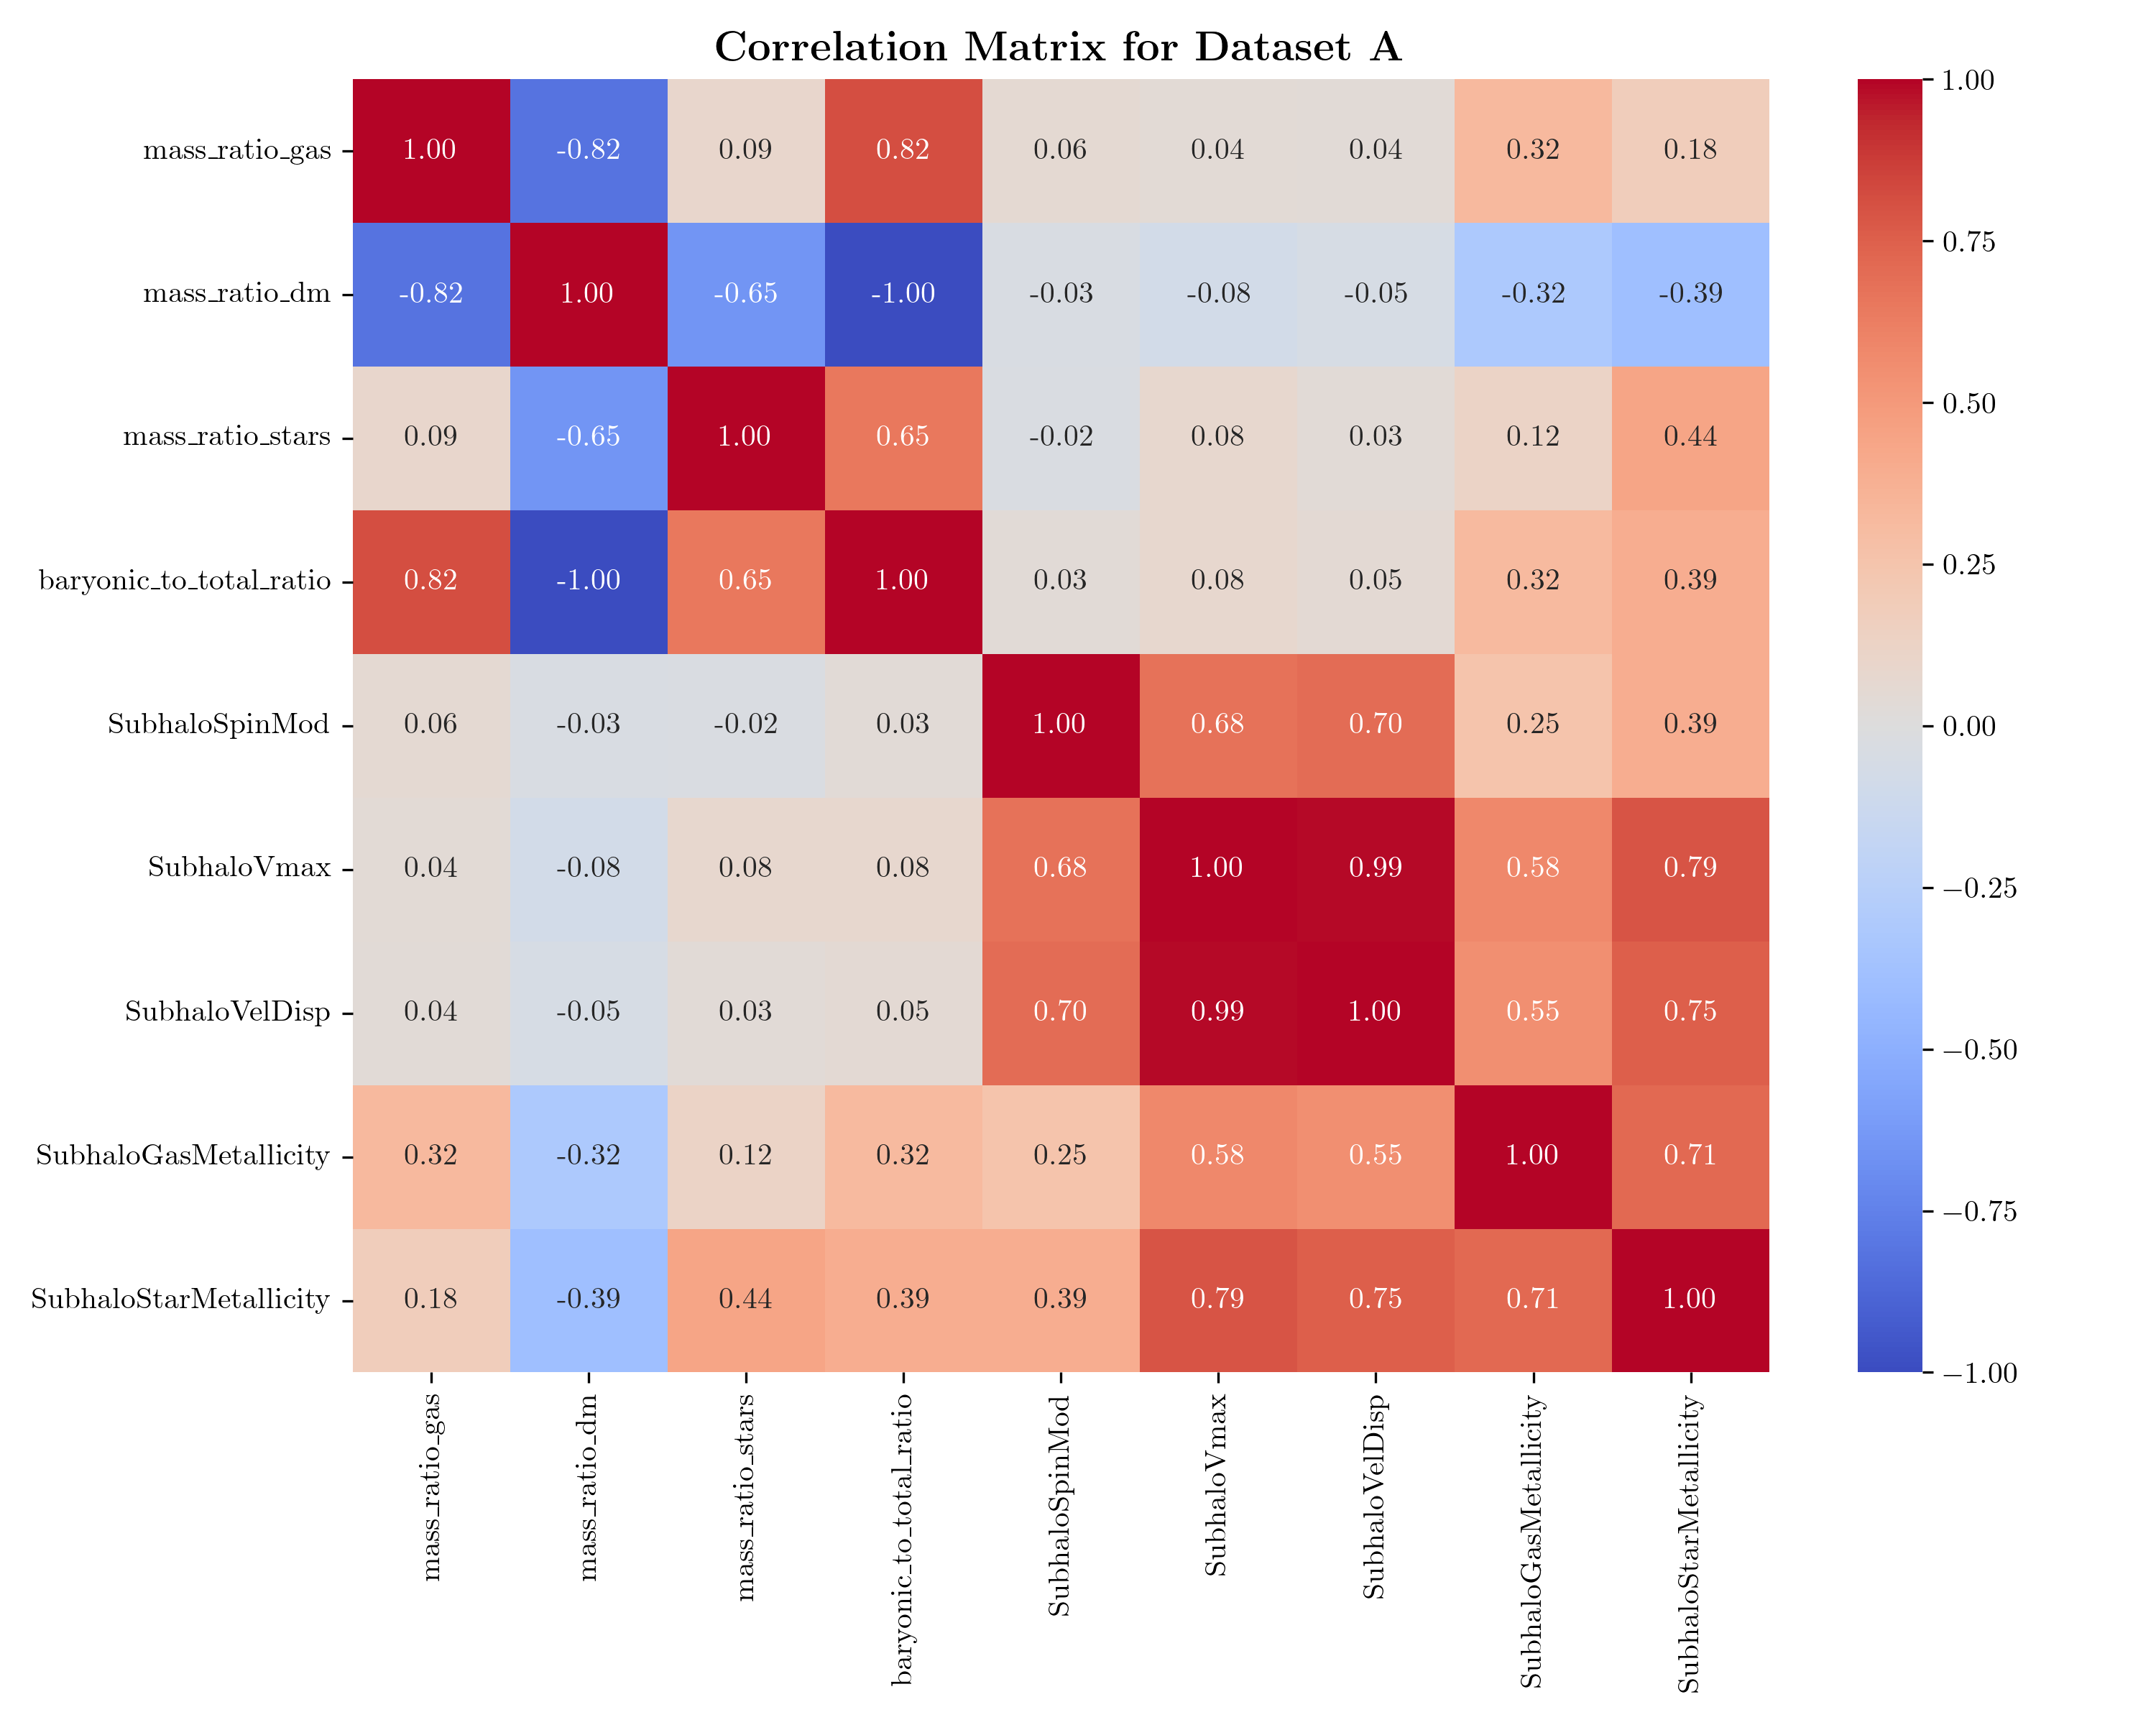

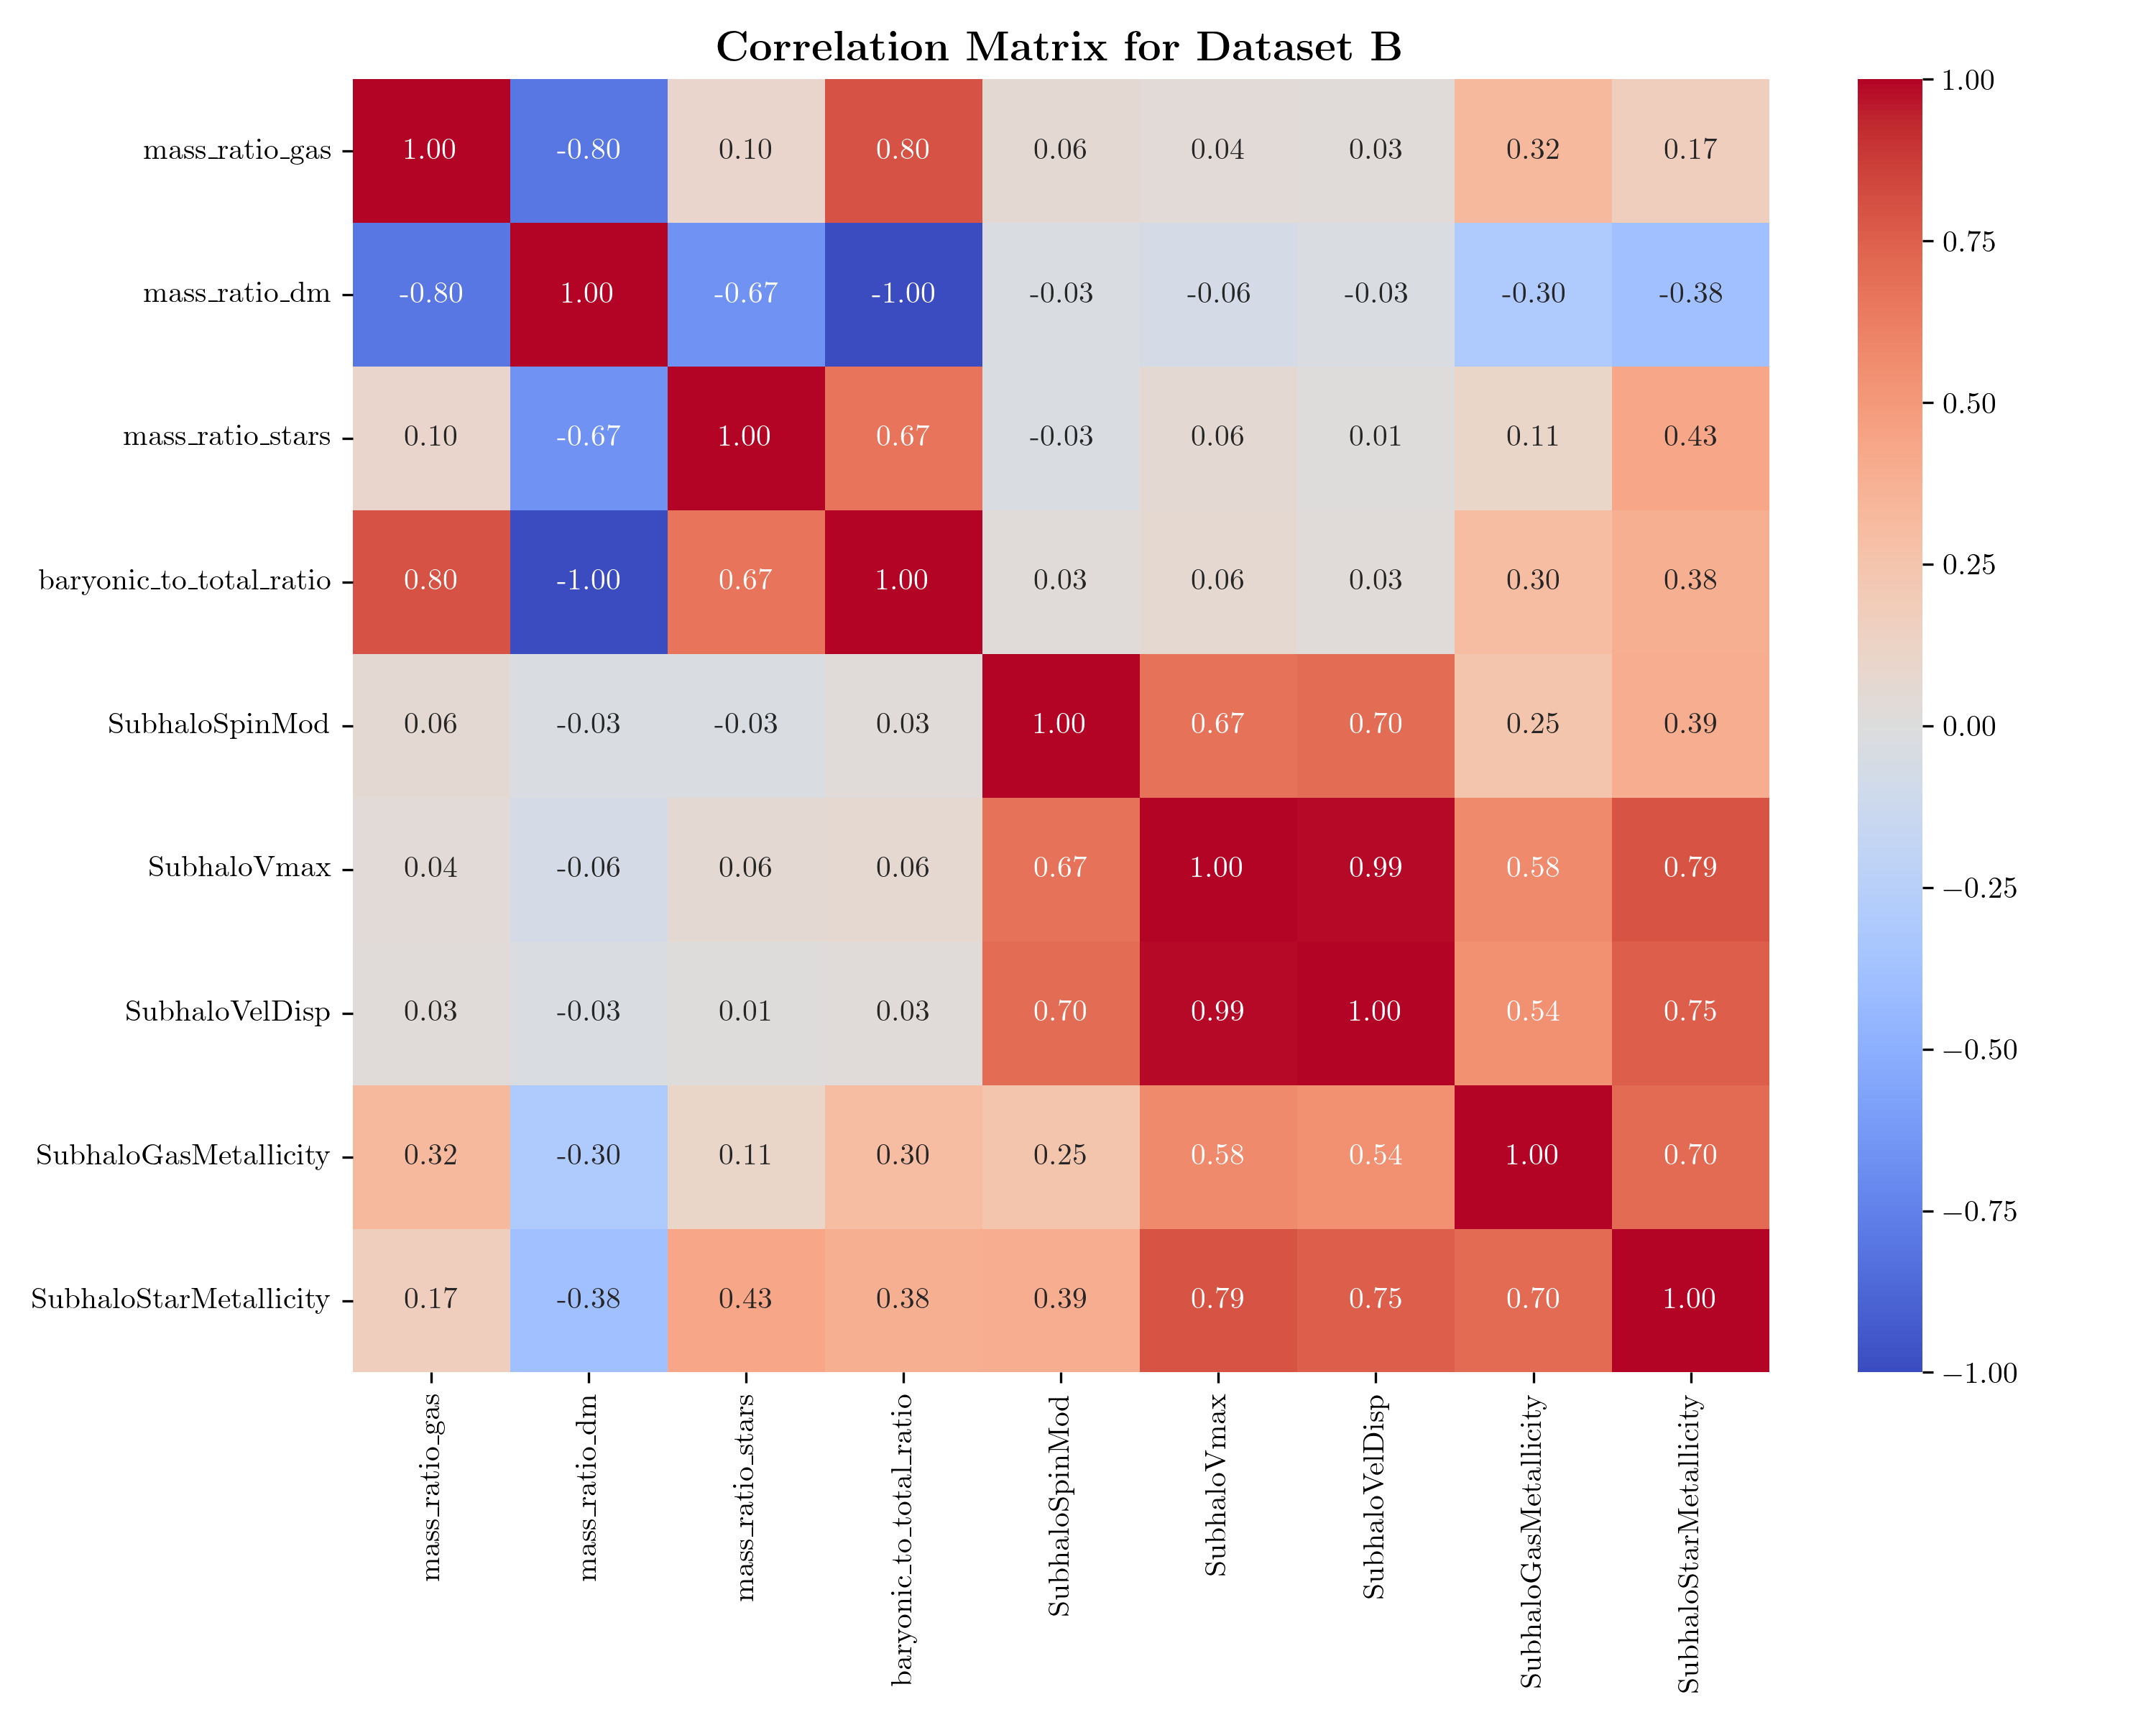


**Step number:** 4 out of 6.
 
**Sub-task:** Investigate the correlation structure of mass ratios, baryonic properties, and other features, including metallicity.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Compute correlation matrices for the mass ratios, baryonic properties, and other subhalo features (e.g., `SubhaloSpinMod`, `SubhaloVmax`, `SubhaloVelDisp`, `SubhaloGasMetallicity`, `SubhaloStarMetallicity`).
- Visualize the correlations using heatmaps for both datasets.
- Identify and highlight strong correlations or notable differences between datasets A and B.
- Save the correlation matrices and heatmaps for interpretation.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 5 out of 6.
 
**Sub-task:** Interpret the correlation results and their implications for mass assembly processes and structure formation.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Analyze the correlation matrices and heatmaps to identify key relationships between mass ratios, baryonic properties, metallicity features, and other subhalo properties.
- Discuss how the observed correlations differ between datasets A and B and what this reveals about the influence of primordial non-Gaussianity.
- Examine how the correlations between mass ratios and dynamical properties (like `SubhaloVmax` and `SubhaloSpinMod`) might reveal mechanisms through which primordial non-Gaussianity affects structure formation.
- Relate the findings to the broader context of mass assembly processes in halos and subhalos.
- Summarize the key insights and their implications for the project goals.
 
**Status:** in progress ⏳
    


Calling researcher...



Message from researcher:




Forwarding content...



Calling researcher_response_formatter...



Message from researcher_response_formatter:

**Markdown:**

```markdown
<!-- filename: step5_interpretation.md -->
### Step 5: Interpretation of Correlation Results and Their Implications

#### 1. Key Relationships from Correlation Matrices

- **Anticorrelation between Gas and Dark Matter Mass Ratios:**  
  In both datasets, there is a strong negative correlation between the gas mass ratio and the dark matter mass ratio (approximately -0.82 in Dataset A and -0.80 in Dataset B). This reflects that subhalos with a higher fraction of gas tend to have a proportionately lower dark matter fraction, consistent with the notion that, during assembly, baryonic processes (e.g., cooling and star formation) can alter the distribution of mass components.

- **Baryonic-to-Total Ratio Robustly Linked to Gas Content:**  
  The baryonic-to-total mass ratio shows a strong positive correlation with the gas mass ratio (around 0.82 in Dataset A and 0.80 in Dataset B). This suggests that gas retention is a k

Message from control:




**Step number:** 5 out of 6.
 
**Sub-task:** Interpret the correlation results and their implications for mass assembly processes and structure formation.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Analyze the correlation matrices and heatmaps to identify key relationships between mass ratios, baryonic properties, metallicity features, and other subhalo properties.
- Discuss how the observed correlations differ between datasets A and B and what this reveals about the influence of primordial non-Gaussianity.
- Examine how the correlations between mass ratios and dynamical properties (like `SubhaloVmax` and `SubhaloSpinMod`) might reveal mechanisms through which primordial non-Gaussianity affects structure formation.
- Relate the findings to the broader context of mass assembly processes in halos and subhalos.
- Summarize the key insights and their implications for the project goals.
 
**Status:** completed ✅
    


Calling control...



Message from control:




**Step number:** 6 out of 6.
 
**Sub-task:** Synthesize all findings and discuss potential observational signatures.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Combine the insights from the statistical analysis, visualizations, and correlation studies.
- Discuss the overall impact of primordial non-Gaussianity on mass ratios, baryonic properties, and assembly processes.
- Highlight the most significant differences between datasets A and B and their potential astrophysical implications.
- Discuss potential observational signatures that could be used to distinguish between different primordial non-Gaussianity scenarios based on the findings from this analysis.
- Provide recommendations for future research or additional analyses based on the findings.
 
**Status:** in progress ⏳
    


Calling researcher...



Message from researcher:




Forwarding content...



Calling researcher_response_formatter...



Message from researcher_response_formatter:

**Markdown:**

```markdown
<!-- filename: step6_synthesis.md -->
### Step 6: Synthesis of Findings and Discussion on Potential Observational Signatures

#### 1. Combining Insights from Previous Analyses

- **Overall Trends in Mass Assembly:**  
  The statistical analysis and visualizations consistently reveal that subhalo mass assembly is primarily governed by the interplay between gas, dark matter, and stellar components. Both datasets (fNL=200 and fNL=-200) exhibit robust patterns—for example, a strong anticorrelation between the gas and dark matter mass ratios and a very tight coupling between the gas content and the overall baryonic-to-total mass fraction.

- **Subtle Modulations by Primordial Non-Gaussianity:**  
  While the distributions of mass ratios (gas, dark matter, and stars) and the baryonic-to-total mass ratio are very similar between the two simulations, small but measurable differences are evident. Such differences—demonstrat

Message from control:




**Step number:** 6 out of 6.
 
**Sub-task:** Synthesize all findings and discuss potential observational signatures.
 
**Agent in charge of sub-task:** `researcher`
 
**Instructions:**
 
- Combine the insights from the statistical analysis, visualizations, and correlation studies.
- Discuss the overall impact of primordial non-Gaussianity on mass ratios, baryonic properties, and assembly processes.
- Highlight the most significant differences between datasets A and B and their potential astrophysical implications.
- Discuss potential observational signatures that could be used to distinguish between different primordial non-Gaussianity scenarios based on the findings from this analysis.
- Provide recommendations for future research or additional analyses based on the findings.
 
**Status:** completed ✅
    


Calling terminator...



Message from terminator:



Session terminated.

In [11]:
cmbagent = CMBAgent(
agent_llm_configs = {
                    'engineer': {
                        "model": "o3-mini-2025-01-31",
                        "reasoning_effort": "high",
                        "api_key": os.getenv("OPENAI_API_KEY"),
                        "api_type": "openai"},
                    'researcher': {
                        "model": "o3-mini-2025-01-31",
                        "reasoning_effort": "high",
                        "api_key": os.getenv("OPENAI_API_KEY"),
                        "api_type": "openai"},
})
   


cmbagent.solve(task,
               max_rounds=500,
               initial_agent="planner",
               shared_context = {'feedback_left': 1,
                                 'maximum_number_of_steps_in_plan': 6,
                                 'planner_append_instructions': planner_append_instructions,
                                 'engineer_append_instructions': engineer_append_instructions,
                                 'researcher_append_instructions': researcher_append_instructions,
                                 'plan_reviewer_append_instructions': plan_reviewer_append_instructions}
              )

### Result Collection

In [12]:
try:
    for obj in cmbagent.chat_result.chat_history[::-1]:
        if obj['name'] == 'researcher_response_formatter':
            result = obj['content']
            break
    cmbagent.task_result = result
except:
    cmbagent.task_result = None
    
extracted_results = re.findall(MD_CODE_BLOCK_PATTERN, cmbagent.task_result, flags=re.DOTALL)[0]
# print(extracted_methodology)
clean_results = re.sub(r'^<!--.*?-->\s*\n', '', extracted_results)
astro_pilot.input.results = clean_results
astro_pilot.input.plot_paths = cmbagent.final_context['displayed_images']

print(astro_pilot.input.results)
print(astro_pilot.input.plot_paths)

### Step 6: Synthesis of Findings and Discussion on Potential Observational Signatures

#### 1. Combining Insights from Previous Analyses

- **Overall Trends in Mass Assembly:**  
  The statistical analysis and visualizations consistently reveal that subhalo mass assembly is primarily governed by the interplay between gas, dark matter, and stellar components. Both datasets (fNL=200 and fNL=-200) exhibit robust patterns—for example, a strong anticorrelation between the gas and dark matter mass ratios and a very tight coupling between the gas content and the overall baryonic-to-total mass fraction.

- **Subtle Modulations by Primordial Non-Gaussianity:**  
  While the distributions of mass ratios (gas, dark matter, and stars) and the baryonic-to-total mass ratio are very similar between the two simulations, small but measurable differences are evident. Such differences—demonstrated by slightly varying correlation coefficients (e.g., the negative correlation between gas and dark matter ra

## Astropilot Input Attributes

In [13]:
print("\n\nCMBAGENT RUN DONE\n\n")
print("Idea:")
print('--------------------------------')
print(astro_pilot.input.idea)
print('--------------------------------')

print("Methodology:")
print('--------------------------------')
print(astro_pilot.input.methodology)
print('--------------------------------')

print("\n\nResults:")
print('--------------------------------')
print(astro_pilot.input.results)
print('--------------------------------')

print("\n\nPlots:")
print('--------------------------------')
print(astro_pilot.input.plot_paths)
print('--------------------------------')



print(astro_pilot.input.model_dump_json(indent=4))



CMBAGENT RUN DONE


Idea:
--------------------------------

Project Idea:
	* Decoding Primordial Non-Gaussianity: Insights from Mass Ratios in Halo and Subhalo Assembly Histories
		- This research investigates the impact of primordial non-Gaussianity on the mass assembly processes of halos and subhalos by analyzing mass ratios of gas, dark matter, and stars in two distinct cosmological simulations (fNL=200 and fNL=-200).
		- By isolating the effects of primordial non-Gaussianity from other cosmological parameters, this study aims to enhance our understanding of how early universe conditions shaped the formation and evolution of cosmic structures.
		- Providing critical insights into the physics of the early universe and its influence on large-scale structure formation.

        
--------------------------------
Methodology:
--------------------------------
### Synthesized Insights from the EDA

#### Quantifying Differences Between Datasets

- **Mass Ratios Overview:**
  - **Gas-to-To

## Export Astropilot Research Input to File

In [14]:
import json
import os
import shutil
from pathlib import Path

In [25]:

# === USER-SPECIFIED BASE PATH ===
path_to_astropilot_research_input = Path("/Users/boris/CMBAgents/astropilot_data/")  # <- change this!

# Ensure the directory and plots subfolder exist
json_output_path = path_to_astropilot_research_input
plots_output_path = json_output_path / "plots"
plots_output_path.mkdir(parents=True, exist_ok=True)


astro_pilot_data = astro_pilot.input.model_dump()
# Move the plots and update paths in the JSON
updated_plot_paths = []
for plot_path_str in astro_pilot_data["plot_paths"]:
    original_path = Path(plot_path_str).resolve()
    new_path = plots_output_path / original_path.name
    try:
        shutil.copy2(original_path, new_path)
        # Store the *relative path* from path_to_astropilot_research_input
        rel_path = new_path.relative_to(path_to_astropilot_research_input)
        updated_plot_paths.append(str(rel_path))
    except FileNotFoundError:
        print(f"Warning: Plot file not found and skipped: {original_path}")
        continue

astro_pilot_data["plot_paths"] = updated_plot_paths

# Write updated JSON to file
output_json_file = json_output_path / "cmbagent_astropilot_run.json"
with open(output_json_file, "w") as f:
    json.dump(astro_pilot_data, f, indent=4)

print(f"Saved JSON and copied plots to: {json_output_path}")

Saved JSON and copied plots to: /Users/boris/CMBAgents/astropilot_data
